In [1]:
import numpy as np
import pandas as pd

In [2]:
!activate tensorflow

In [3]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
!python --version

Python 3.5.3 :: Continuum Analytics, Inc.


In [5]:
!ls -la

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
!ls -la ./data/train-jpg/*.jpg | wc -l

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
df_labels = pd.read_csv('./data/train-csv/train.csv')
df_labels.head(10)

image_name                                         tags
0    train_0                                 haze primary
1    train_1              agriculture clear primary water
2    train_2                                clear primary
3    train_3                                clear primary
4    train_4    agriculture clear habitation primary road
5    train_5                           haze primary water
6    train_6  agriculture clear cultivation primary water
7    train_7                                 haze primary
8    train_8        agriculture clear cultivation primary
9    train_9   agriculture clear cultivation primary road

In [8]:
labels = df_labels.tags.values
labels

array(['haze primary', 'agriculture clear primary water', 'clear primary',
       ..., 'agriculture clear primary', 'agriculture clear primary road',
       'agriculture cultivation partly_cloudy primary'], dtype=object)

In [9]:
labels_list = []
for lbl in labels:
    labels_list.extend(lbl.split(' '))
labels_set = set(labels_list)
labels_set

{'agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'blow_down',
 'clear',
 'cloudy',
 'conventional_mine',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'slash_burn',
 'water'}

In [10]:
for i, label in enumerate(labels_set):
    print('label:%s  %d/%d' %(label, i+1, len(labels_set)))
    %time df_labels[label] = df_labels.tags.apply(lambda x : 1 if label in x.split(' ') else 0)


label:cultivation  1/17
Wall time: 37.1 ms
label:water  2/17
Wall time: 30 ms
label:slash_burn  3/17
Wall time: 30.1 ms
label:blooming  4/17
Wall time: 26.8 ms
label:agriculture  5/17
Wall time: 15.6 ms
label:blow_down  6/17
Wall time: 31.3 ms
label:conventional_mine  7/17
Wall time: 31.3 ms
label:cloudy  8/17
Wall time: 31.3 ms
label:artisinal_mine  9/17
Wall time: 33.5 ms
label:clear  10/17
Wall time: 23.1 ms
label:habitation  11/17
Wall time: 31.3 ms
label:primary  12/17
Wall time: 31.2 ms
label:road  13/17
Wall time: 15.6 ms
label:partly_cloudy  14/17
Wall time: 31.2 ms
label:bare_ground  15/17
Wall time: 31.3 ms
label:selective_logging  16/17
Wall time: 15.6 ms
label:haze  17/17
Wall time: 28.6 ms


In [11]:
df_labels

image_name                                               tags  \
0          train_0                                       haze primary   
1          train_1                    agriculture clear primary water   
2          train_2                                      clear primary   
3          train_3                                      clear primary   
4          train_4          agriculture clear habitation primary road   
5          train_5                                 haze primary water   
6          train_6        agriculture clear cultivation primary water   
7          train_7                                       haze primary   
8          train_8              agriculture clear cultivation primary   
9          train_9         agriculture clear cultivation primary road   
10        train_10         agriculture clear primary slash_burn water   
11        train_11                                clear primary water   
12        train_12                                             cloudy   
13        train_13                                      clear primary   
14        train_14                                             cloudy   
15        train_15                                      clear primary   
16        train_16                                      clear primary   
17        train_17                              partly_cloudy primary   
18        train_18                                      clear primary   
19        train_19                     agriculture clear primary road   
20        train_20                    agriculture clear primary water   
21        train_21                           clear primary road water   
22        train_22                              partly_cloudy primary   
23        train_23                     agriculture clear primary road   
24        train_24            conventional_mine partly_cloudy primary   
25        train_25                                      clear primary   
26        train_26                                             cloudy   
27        train_27            agriculture partly_cloudy primary water   
28        train_28                                      clear primary   
29        train_29                              partly_cloudy primary   
...            ...                                                ...   
40449  train_40449                                clear primary water   
40450  train_40450  agriculture cultivation partly_cloudy primary ...   
40451  train_40451                                      clear primary   
40452  train_40452                                      clear primary   
40453  train_40453                       artisinal_mine clear primary   
40454  train_40454                                      clear primary   
40455  train_40455  agriculture partly_cloudy primary road convent...   
40456  train_40456                                      clear primary   
40457  train_40457         clear primary road selective_logging water   
40458  train_40458                     agriculture clear primary road   
40459  train_40459                                clear primary water   
40460  train_40460                                      clear primary   
40461  train_40461                                             cloudy   
40462  train_40462                                      clear primary   
40463  train_40463                           agriculture haze primary   
40464  train_40464             agriculture partly_cloudy primary road   
40465  train_40465                            blow_down clear primary   
40466  train_40466                                      clear primary   
40467  train_40467                     agriculture clear primary road   
40468  train_40468                          agriculture clear primary   
40469  train_40469                                 haze primary water   
40470  train_40470                      clear habitation primary road   
40471  train_40471                                      clear prim

In [12]:
df = df_labels.tags.str.get_dummies(' ')
df.insert(0, 'image_name', df_labels.image_name)
df.head(10)

image_name  agriculture  artisinal_mine  bare_ground  blooming  blow_down  \
0    train_0            0               0            0         0          0   
1    train_1            1               0            0         0          0   
2    train_2            0               0            0         0          0   
3    train_3            0               0            0         0          0   
4    train_4            1               0            0         0          0   
5    train_5            0               0            0         0          0   
6    train_6            1               0            0         0          0   
7    train_7            0               0            0         0          0   
8    train_8            1               0            0         0          0   
9    train_9            1               0            0         0          0   

   clear  cloudy  conventional_mine  cultivation  habitation  haze  \
0      0       0                  0            0           0     1   
1      1       0                  0            0           0     0   
2      1       0                  0            0           0     0   
3      1       0                  0            0           0     0   
4      1       0                  0            0           1     0   
5      0       0                  0            0           0     1   
6      1       0                  0            1           0     0   
7      0       0                  0            0           0     1   
8      1       0                  0            1           0     0   
9      1       0                  0            1           0     0   

   partly_cloudy  primary  road  selective_logging  slash_burn  water  
0              0        1     0                  0           0      0  
1              0        1     0                  0           0      1  
2              0        1     0                  0           0      0  
3              0        1     0                  0           0      0  
4              0        1     1                  0           0      0  
5              0        1     0                  0           0      1  
6              0        1     0                  0           0      1  
7              0        1     0                  0           0      0  
8              0        1     0                  0           0      0  
9              0        1     1                  0           0      0

In [13]:
%matplotlib inline

In [14]:
df[list(labels_set)].sum().sort_values()

blow_down               98
conventional_mine      100
slash_burn             209
blooming               332
artisinal_mine         339
selective_logging      340
bare_ground            862
cloudy                2089
haze                  2697
habitation            3660
cultivation           4477
partly_cloudy         7261
water                 7411
road                  8071
agriculture          12315
clear                28431
primary              37513
dtype: int64

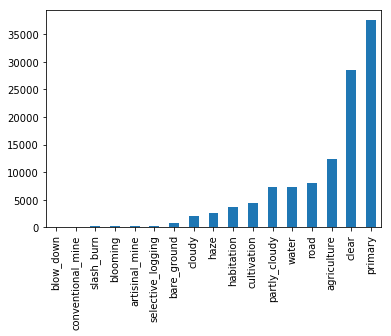

In [15]:
df[list(labels_set)].sum().sort_values().plot(kind='bar')

In [16]:
ordered_labels = df[list(labels_set)].sum().sort_values(ascending=False).index
type(ordered_labels)

pandas.core.indexes.base.Index

In [17]:
df[ordered_labels].corr()

primary     clear  agriculture      road     water  \
primary            1.000000  0.273743     0.115259  0.058937  0.032609   
clear              0.273743  1.000000     0.058765  0.084686  0.041464   
agriculture        0.115259  0.058765     1.000000  0.480930  0.063498   
road               0.058937  0.084686     0.480930  1.000000  0.103498   
water              0.032609  0.041464     0.063498  0.103498  1.000000   
partly_cloudy      0.110213 -0.718208     0.039743 -0.010596 -0.005721   
cultivation        0.092507  0.065897     0.344964  0.079122  0.009845   
habitation         0.025513  0.097849     0.303979  0.443341  0.054555   
haze               0.064862 -0.410428    -0.031978 -0.035642  0.030541   
cloudy            -0.829594 -0.358343    -0.154252 -0.116412 -0.110432   
bare_ground       -0.076070  0.052982    -0.013854  0.064728  0.021320   
selective_logging  0.025879  0.040967    -0.022616  0.056375 -0.009273   
artisinal_mine     0.010236  0.040851    -0.038379  0.028774  0.166084   
blooming           0.025570  0.046617    -0.041082 -0.038526 -0.031718   
slash_burn         0.020257  0.019757     0.041518 -0.004893 -0.012714   
conventional_mine  0.002535 -0.000257    -0.006948  0.048653  0.009898   
blow_down          0.013852  0.017776    -0.008538 -0.022068 -0.019422   

                   partly_cloudy  cultivation  habitation      haze    cloudy  \
primary                 0.110213     0.092507    0.025513  0.064862 -0.829594   
clear                  -0.718208     0.065897    0.097849 -0.410428 -0.358343   
agriculture             0.039743     0.344964    0.303979 -0.031978 -0.154252   
road                   -0.010596     0.079122    0.443341 -0.035642 -0.116412   
water                  -0.005721     0.009845    0.054555  0.030541 -0.110432   
partly_cloudy           1.000000    -0.011306   -0.048390 -0.124914 -0.109062   
cultivation            -0.011306     1.000000    0.134639 -0.030414 -0.082260   
habitation             -0.048390     0.134639    1.000000 -0.039675 -0.073547   
haze                   -0.124914    -0.030414   -0.039675  1.000000 -0.062324   
cloudy                 -0.109062    -0.082260   -0.073547 -0.062324  1.000000   
bare_ground            -0.035959    -0.003458    0.050756 -0.011276 -0.034409   
selective_logging      -0.023980     0.017603   -0.016747 -0.019162 -0.021469   
artisinal_mine         -0.023888    -0.016849   -0.001561 -0.019118 -0.021437   
blooming               -0.030380    -0.001502   -0.024851 -0.019903 -0.021213   
slash_burn             -0.004034     0.113073    0.026567 -0.015101 -0.016805   
conventional_mine       0.013052    -0.011202    0.046781 -0.009305 -0.011609   
blow_down              -0.005999    -0.004550   -0.010273 -0.013162 -0.011492   

                   bare_ground  selective_logging  artisinal_mine  blooming  \
primary              -0.076070           0.025879        0.010236  0.025570   
clear                 0.052982           0.040967        0.040851  0.046617   
agriculture          -0.013854          -0.022616       -0.038379 -0.041082   
road                  0.064728           0.056375        0.028774 -0.038526   
water                 0.021320          -0.009273        0.166084 -0.031718   
partly_cloudy        -0.035959          -0.023980       -0.023888 -0.030380   
cultivation          -0.003458           0.017603       -0.016849 -0.001502   
habitation            0.050756          -0.016747       -0.001561 -0.024851   
haze                 -0.011276          -0.019162       -0.019118 -0.019903   
cloudy               -0.034409          -0.021469       -0.021437 -0.021213   
bare_ground           1.000000           0.010800        0.061556 -0.007722   
selective_logging     0.010800           1.000000        0.009365  0.012640   
artisinal_mine        0.061556           0.009365        1.000000 -0.008357   
blooming             -0.007722           0.012640       -0.008357  1.000000   
slash_burn            0.013250           0.

In [18]:
import seaborn as sns

In [19]:
df_occurence = df[ordered_labels].T.dot(df[ordered_labels])
df_occurence

primary  clear  agriculture  road  water  partly_cloudy  \
primary              37513  27668        11972  7728   7001           7175   
clear                27668  28431         9150  6295   5502              0   
agriculture          11972   9150        12315  6034   2712           2493   
road                  7728   6295         6034  8071   2125           1382   
water                 7001   5502         2712  2125   7411           1295   
partly_cloudy         7175      0         2493  1382   1295           7261   
cultivation           4455   3527         3377  1294    868            748   
habitation            3469   3090         2737  2786    915            441   
haze                  2670      0          672   394    613              0   
cloudy                   0      0            0     0      0              0   
bare_ground            683    747          225   323    206             74   
selective_logging      340    308           65   151     49             27   
artisinal_mine         324    307           38   110    299             27   
blooming               332    311           32    10     16             17   
slash_burn             209    173          119    36     24             33   
conventional_mine       94     70           24    59     26             28   
blow_down               98     85           22     2      3             13   

                   cultivation  habitation  haze  cloudy  bare_ground  \
primary                   4455        3469  2670       0          683   
clear                     3527        3090     0       0          747   
agriculture               3377        2737   672       0          225   
road                      1294        2786   394       0          323   
water                      868         915   613       0          206   
partly_cloudy              748         441     0       0           74   
cultivation               4477         895   202       0           89   
habitation                 895        3660   129       0          163   
haze                       202         129  2697       0           41   
cloudy                       0           0     0    2089            0   
bare_ground                 89         163    41       0          862   
selective_logging           58          13     5       0           13   
artisinal_mine              18          29     5       0           40   
blooming                    35           4     4       0            3   
slash_burn                 126          41     3       0           10   
conventional_mine            4          36     2       0           10   
blow_down                    8           3     0       0            4   

                   selective_logging  artisinal_mine  blooming  slash_burn  \
primary                          340             324       332         209   
clear                            308             307       311         173   
agriculture                       65              38        32         119   
road                             151             110        10          36   
water                             49             299        16          24   
partly_cloudy                     27              27        17          33   
cultivation                       58              18        35         126   
habitation                        13              29         4          41   
haze                               5               5         4           3   
cloudy                             0               0         0           0   
bare_ground                       13              40         3          10   
selective_logging                340               6         7           2   
artisinal_mine                     6             339         0           0   
blooming                           7               0       332           2   
slash_burn                         2               0         2         209   
conventional_mine                  0               

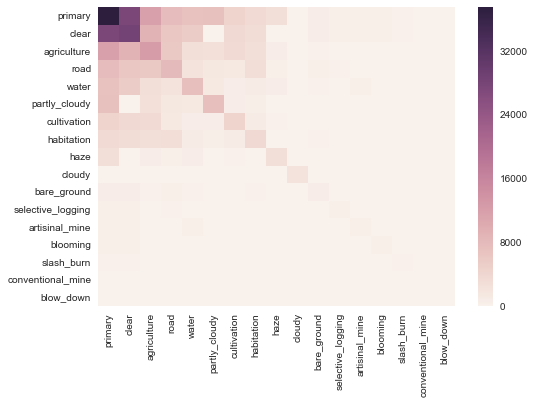

In [20]:
sns.heatmap(df_occurence)

In [21]:
df_percentage = df[ordered_labels].sum() / df[ordered_labels].count() * 100
df_percentage

primary              92.672744
clear                70.236419
agriculture          30.423182
road                 19.938734
water                18.308259
partly_cloudy        17.937696
cultivation          11.060056
habitation            9.041725
haze                  6.662714
cloudy                5.160701
bare_ground           2.129499
selective_logging     0.839942
artisinal_mine        0.837471
blooming              0.820178
slash_burn            0.516317
conventional_mine     0.247042
blow_down             0.242101
dtype: float64

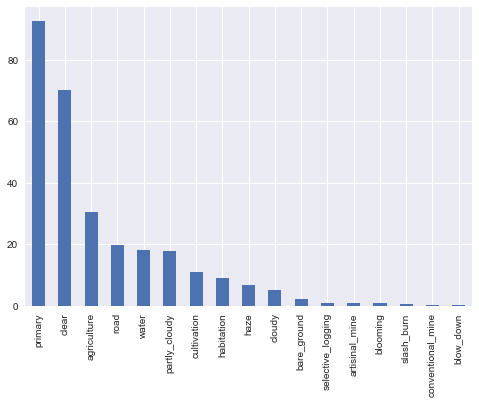

In [22]:
df_percentage.plot(kind='bar')

In [23]:
TRAIN_PATH = './data/train-jpg/'

In [24]:
import os

In [25]:
from PIL import Image
import random
import matplotlib.pyplot as plt

In [26]:
def plot_graph(label):

    images = df[df[label] == 1].image_name.values

    fig , ax = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
    ax = ax.flatten()

    for i in range(0,9):
        f = random.choice(images)
        img = Image.open(os.path.join(TRAIN_PATH, f + '.jpg'))
        ax[i].imshow(img)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_title("%s h:%s w:%s" % (f, img.height,img.width))
    plt.tight_layout()

Wall time: 3.06 s


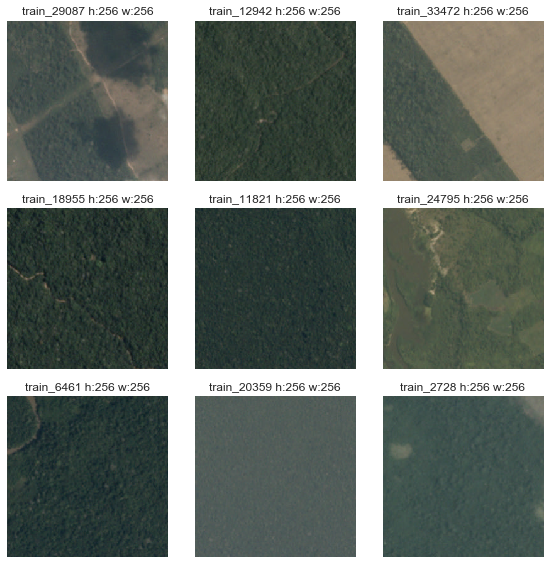

In [27]:
%time plot_graph('primary')

Wall time: 587 ms


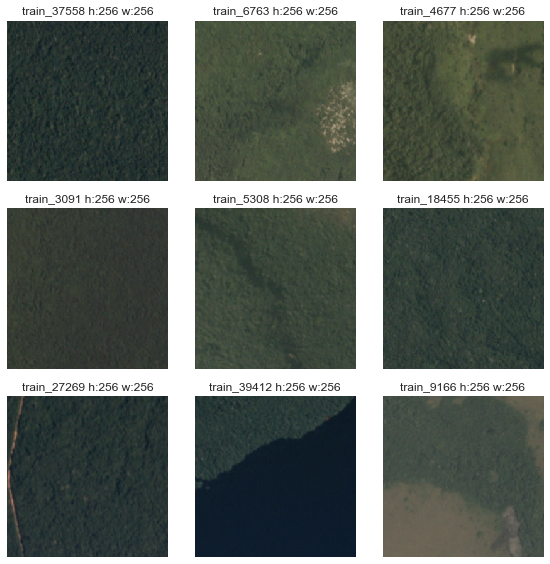

In [28]:
%time plot_graph('clear')

Wall time: 498 ms


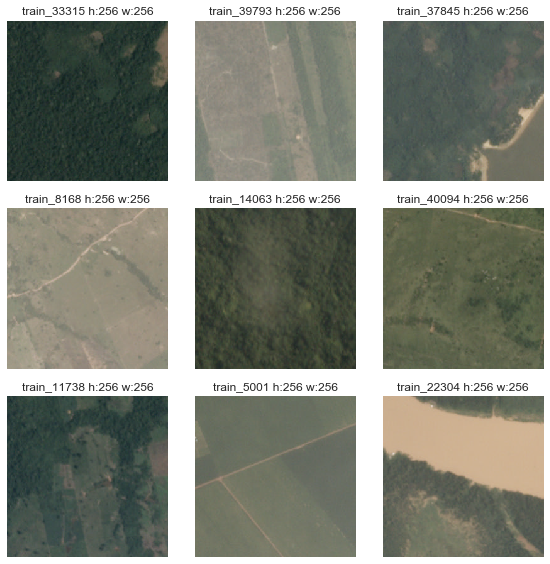

In [29]:
%time plot_graph('agriculture')

Wall time: 536 ms


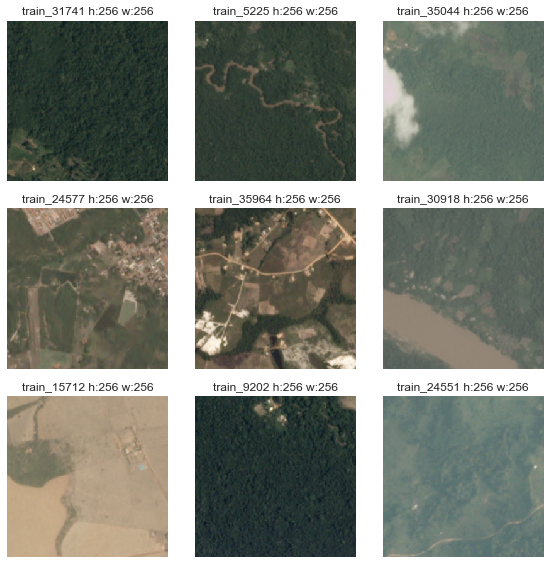

In [30]:
%time plot_graph('habitation')

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
df_train, df_test, df_y_train, df_y_test = train_test_split(df.image_name, df[ordered_labels], test_size=60, random_state=42)

In [33]:
df_train = pd.concat([df_train, df_y_train], axis = 1)

In [34]:
df_train.set_index(np.arange(df_train.shape[0]), inplace=True)

In [35]:
df_train = df_train.reindex(index=np.arange(df_train.shape[0]))

In [36]:
df_test = pd.concat([df_test, df_y_test], axis = 1)

In [37]:
df_test.set_index(np.arange(df_test.shape[0]), inplace=True)

In [38]:
%time df_train['image_name_w_ext'] = df_train['image_name'] + '.jpg'

Wall time: 6.01 ms


In [39]:
%time df_test['image_name_w_ext'] =  df_test['image_name'] + '.jpg'

Wall time: 0 ns


In [40]:
#if not 'image_name_w_ext' in df_train.columns:
#    %time df_train = df_train[['image_name', 'image_name_w_ext'] + list(df_train.columns.values[1:-1])]
#    %time df_test = df_test[['image_name', 'image_name_w_ext'] + list(df_test.columns.values[1:-1])]
#df_train.head(10)

In [41]:
#for f in df_train.image_name_w_ext:
#    if os.path.exists(os.path.join(TRAIN_PATH, f)) == False:
#        print("%s is missing" % image_name)

In [42]:
%time shapes = [Image.open(os.path.join(TRAIN_PATH, f)).size for f in df_train.image_name_w_ext[:1000]]

Wall time: 237 ms


In [43]:
%time pd.Series(shapes).value_counts()

Wall time: 1 ms


(256, 256)    1000
dtype: int64

In [44]:
MINI_BATCH_SIZE = 9
NB_MINI_BATCH = df_train.shape[0] / MINI_BATCH_SIZE
SHUFFLE = False
BATCH_SIZE = df_train.shape[0]
#NB_CATEGORIES = len(ordered_labels)

In [45]:
%time idx = np.random.permutation(len(df_train)) if SHUFFLE == True else np.arange(BATCH_SIZE)
idx

Wall time: 0 ns


array([    0,     1,     2, ..., 40416, 40417, 40418])

In [46]:
%time batches = np.array_split(idx, NB_MINI_BATCH)

Wall time: 6.01 ms


In [47]:
df_train

image_name  primary  clear  agriculture  road  water  partly_cloudy  \
0       train_9317        1      1            0     0      0              0   
1       train_5697        1      1            1     0      0              0   
2      train_27842        1      1            0     0      0              0   
3      train_36926        1      1            0     0      0              0   
4      train_40141        1      1            1     0      0              0   
5      train_34102        1      1            0     0      0              0   
6       train_5501        1      0            0     0      0              1   
7       train_4563        1      1            0     0      0              0   
8      train_11684        1      1            0     0      1              0   
9       train_4810        1      1            1     1      0              0   
10     train_13352        1      1            1     1      1              0   
11     train_22894        1      1            0     0      1              0   
12     train_12983        0      0            0     0      0              0   
13     train_23947        1      1            0     0      0              0   
14     train_34863        1      1            0     0      0              0   
15     train_16769        1      1            0     0      0              0   
16     train_25080        1      1            0     0      0              0   
17      train_2528        1      0            0     0      0              1   
18      train_4448        0      0            0     0      0              0   
19     train_24615        1      1            1     1      0              0   
20     train_28122        1      0            1     1      0              1   
21     train_24040        1      1            0     0      0              0   
22      train_5536        1      1            1     0      1              0   
23     train_27135        1      0            1     0      0              1   
24     train_37442        1      1            0     0      0              0   
25     train_17298        1      1            0     0      1              0   
26     train_24607        1      1            0     1      1              0   
27     train_40106        1      1            1     1      0              0   
28     train_14125        1      1            0     0      0              0   
29     train_39430        1      1            0     1      1              0   
...            ...      ...    ...          ...   ...    ...            ...   
40389  train_31551        1      1            0     0      0              0   
40390   train_1267        1      1            0     0      0              0   
40391   train_1899        1      1            0     0      0              0   
40392  train_35773        0      0            0     0      0              0   
40393  train_19118        1      1            1     1      0              0   
40394    train_189        1      1            0     1      1              0   
40395   train_2747        1      1            0     0      0              0   
40396  train_18431        1      0            1     0      0              1   
40397  train_18942        0      0            0     0      0              0   
40398  train_25658        1      1            0     0      0              0   
40399  train_27480        1      1            0     1      0              0   
40400   train_6396        1      1            0     0      0              0   
40401  train_28693        1      0            1     0      0              1   
40402  train_19769        1      1            0     0      0              0   
40403  train_17568        1      1            0     0      0              0   
40404  train_39188        1      0            1     0      1              0   
40405  train_37819        1      0            1     0      0              1   
40406   train_5311        1      1            1     1      0              0   
40407   train_2433        1      1            0     0     

## Build Graph

In [48]:
import tensorflow as tf
print(tf.__version__)

1.1.0


In [49]:
tf.reset_default_graph()

In [50]:
config = tf.ConfigProto()

In [51]:
config.log_device_placement = True

In [52]:
sess = tf.InteractiveSession(config=config)

In [53]:
X = tf.placeholder(dtype=tf.float32,shape=(None, 128,128,3), name="X")
y = tf.placeholder(dtype=tf.float32,shape=(None,17), name="y")

In [54]:
with tf.name_scope('CONV1'):
    W_conv1 = tf.get_variable(name="W_conv1", shape=[5,5,3,64], dtype=tf.float32, initializer= tf.contrib.layers.xavier_initializer())
    b_conv1 = tf.get_variable(name="b_conv1", shape=[64], dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
    
    conv1 = tf.nn.conv2d(
        input=X,
        filter=W_conv1,
        strides=[1,1,1,1],
        padding='SAME',
        name='conv1'
    ) #64 * 64 * 32

    relu1 = tf.nn.elu(
        features = conv1 + b_conv1,
        name='relu1'
    ) #64 * 64 * 32

    pool1 = tf.nn.max_pool(
        value = relu1,
        ksize=[1,2,2,1],
        strides=[1,2,2,1],
        padding='SAME',
        name='pool1'
    ) #32 * 32 * 32
    
    tf.summary.histogram('W_conv1', W_conv1)

In [55]:
with tf.name_scope('CONV2'):
    W_conv2 = tf.get_variable(name="W_conv2", shape=[5,5,64,64], dtype=tf.float32, initializer= tf.contrib.layers.xavier_initializer())
    b_conv2 = tf.get_variable(name="b_conv2", shape=[64], dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())

    conv2 = tf.nn.conv2d(
        input=pool1,
        filter=W_conv2,
        strides=[1,1,1,1],
        padding='SAME',
        name='conv2'
    ) #32 * 32 * 64

    relu2 = tf.nn.elu(
        features = conv2 + b_conv2,
        name='relu2'
    ) #32 * 32 *64

    pool2 = tf.nn.max_pool(
        value = relu2,
        ksize=[1,2,2,1],
        strides=[1,2,2,1],
        padding='SAME',
        name='pool2'
    ) #16 * 16 *64
    
            
    tf.summary.histogram('W_conv2', W_conv2)

In [56]:
with tf.name_scope('FC1'):
    W_fc1 = tf.get_variable(name="W_fc1", shape=[32*32*64,256], dtype=tf.float32, initializer= tf.contrib.layers.xavier_initializer())
    b_fc1 = tf.get_variable(name="b_fc1", shape=[256], dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())

    pool_2_flat = tf.reshape(
        tensor=pool2,
        shape=(-1,32*32*64),
        name='pool_2-flat'
    )

    fc1 = tf.nn.elu(tf.matmul(pool_2_flat,W_fc1) + b_fc1)
    
    tf.summary.histogram('W_fc1', W_fc1)

In [57]:
with tf.name_scope('DROPOUT'):
    keep_prob = tf.placeholder(dtype=tf.float32, name="keep_prob")
    
    dropout = tf.nn.dropout(
        x=fc1,
        keep_prob=keep_prob
    )

In [58]:
with tf.name_scope('FC2'):
    W_fc2 = tf.get_variable(name="W_fc2", shape=[256, 17], dtype=tf.float32, initializer= tf.contrib.layers.xavier_initializer())
    b_fc2 = tf.get_variable(name="b_fc2", shape=[17], dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
    
    fc2 = tf.matmul(dropout, W_fc2) + b_fc2 #1024 * 17
    
    probabilities = tf.nn.sigmoid(fc2)
    
    tf.summary.histogram('W_fc2', W_fc2)

## Feed data

In [59]:
with tf.name_scope('CROSS_ENTROPY'):
    cross_entropy =  tf.nn.sigmoid_cross_entropy_with_logits(labels = y, logits= fc2, name='cross_entropy')

In [60]:
train_step = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cross_entropy)

In [61]:
tf.add_to_collection(name='train_step', value=train_step)

In [62]:
f_beta_score = tf.Variable(0, name='f_beta_score', dtype=tf.float32)
test_accuracy =  tf.Variable(0, name='test_accuracy',dtype=tf.float32)
loss = tf.Variable(0, name='loss', dtype=tf.float32)

tf.summary.scalar('f_beta_score', f_beta_score)
tf.summary.scalar('test_accuracy', test_accuracy)
tf.summary.scalar('loss', loss)

<tf.Tensor 'loss_1:0' shape=() dtype=string>

In [63]:
import cv2

In [64]:
import datetime as dt
import os

In [65]:
from sklearn.metrics import fbeta_score

In [66]:
saver = tf.train.Saver()

In [67]:
%time sess.run(tf.global_variables_initializer())

Wall time: 830 ms


In [68]:
NB_EPOCHS = 1
THRESHOLD = 0.2
DROPOuT = 0.1

In [69]:
folder = dt.datetime.now().strftime('%Y%m%d_%H%M%S')
if not os.path.exists(folder):
    os.mkdir(folder)
    
merged_summary = tf.summary.merge_all()
train_writer = tf.summary.FileWriter(os.path.join('./logs',folder), graph=sess.graph)

In [70]:
%time sess.run(tf.global_variables_initializer())

Wall time: 176 ms


In [71]:
NB_EPOCHS = 1
THRESHOLD = 0.2
DROPOuT = 0.1

In [72]:
%time sess.run(tf.global_variables_initializer())

Wall time: 199 ms


In [73]:
df_submit = pd.read_csv('./data/submission/sample_submission_v2.csv')
df_submit.head(10)

image_name                                  tags
0     test_0  primary clear agriculture road water
1     test_1  primary clear agriculture road water
2     test_2  primary clear agriculture road water
3     test_3  primary clear agriculture road water
4     test_4  primary clear agriculture road water
5     test_5  primary clear agriculture road water
6     test_6  primary clear agriculture road water
7     test_7  primary clear agriculture road water
8     test_8  primary clear agriculture road water
9     test_9  primary clear agriculture road water

In [74]:
TEST_PATH = './data/test-jpg/'

In [75]:
df_submit['image_name'] = df_submit['image_name'] + '.jpg'
df_submit.head(10)

image_name                                  tags
0  test_0.jpg  primary clear agriculture road water
1  test_1.jpg  primary clear agriculture road water
2  test_2.jpg  primary clear agriculture road water
3  test_3.jpg  primary clear agriculture road water
4  test_4.jpg  primary clear agriculture road water
5  test_5.jpg  primary clear agriculture road water
6  test_6.jpg  primary clear agriculture road water
7  test_7.jpg  primary clear agriculture road water
8  test_8.jpg  primary clear agriculture road water
9  test_9.jpg  primary clear agriculture road water

In [76]:
training_start_time = dt.datetime.now()

print('Loading model....')
model_name = 'mymodel_' + dt.datetime.now().strftime('%Y%m%d') + '_final.ckpt'
%time saver = tf.train.import_meta_graph(meta_graph_or_file = os.path.join('./ckpt', model_name + '.meta'))
%time saver.restore(sess, os.path.join('./ckpt', model_name))
print('Loading model:Done')

print('Starting prediction....')
predictions_list = []
batches = np.array_split(np.arange(df_submit.shape[0]), 6799)

for step, batch in enumerate(batches):
   
    images_names = df_submit.loc[batch, :].image_name
    images_names = images_names.apply(lambda x : os.path.join(TEST_PATH, x))
    
    images_list= []
    for im in images_names:
        print('loading batch:%d image:%s' % (step,im))
        im = cv2.imread(im, cv2.IMREAD_COLOR)
        im = np.array(im, dtype=np.uint8)
        im[:, :, 0] = cv2.equalizeHist(im[:, :, 0])
        im[:, :, 1] = cv2.equalizeHist(im[:, :, 1])
        im[:, :, 2] = cv2.equalizeHist(im[:, :, 2])
        im = cv2.resize(im, dsize=(128,128),interpolation = cv2.INTER_CUBIC)
        im = im / 255
        images_list.append(im)
        
    images_array = np.asarray(images_list)
    
    #predictions = tf.round(probabilities)
    
    print('predictig batch:%d' % step)
    %time predictions_list.append(probabilities.eval(feed_dict={X: images_array, keep_prob: 1}))
        
predictions_array = np.array(predictions_list)
predictions_array = predictions_array > THRESHOLD
predictions_array = np.asarray(predictions_array, dtype=np.int8)

print('End of prediction: %s' % str(dt.datetime.now() - training_start_time))

Loading model....
Wall time: 9.41 s
INFO:tensorflow:Restoring parameters from ./ckpt\mymodel_20170612_final.ckpt
Wall time: 3.34 s
Loading model:Done
Starting prediction....
loading batch:0 image:./data/test-jpg/test_0.jpg
loading batch:0 image:./data/test-jpg/test_1.jpg
loading batch:0 image:./data/test-jpg/test_2.jpg
loading batch:0 image:./data/test-jpg/test_3.jpg
loading batch:0 image:./data/test-jpg/test_4.jpg
loading batch:0 image:./data/test-jpg/test_5.jpg
loading batch:0 image:./data/test-jpg/test_6.jpg
loading batch:0 image:./data/test-jpg/test_7.jpg
loading batch:0 image:./data/test-jpg/test_8.jpg
predictig batch:0
Wall time: 854 ms
loading batch:1 image:./data/test-jpg/test_9.jpg
loading batch:1 image:./data/test-jpg/test_10.jpg
loading batch:1 image:./data/test-jpg/test_11.jpg
loading batch:1 image:./data/test-jpg/test_12.jpg
loading batch:1 image:./data/test-jpg/test_13.jpg
loading batch:1 image:./data/test-jpg/test_14.jpg
loading batch:1 image:./data/test-jpg/test_15.jpg


loading batch:16 image:./data/test-jpg/test_147.jpg
loading batch:16 image:./data/test-jpg/test_148.jpg
loading batch:16 image:./data/test-jpg/test_149.jpg
loading batch:16 image:./data/test-jpg/test_150.jpg
loading batch:16 image:./data/test-jpg/test_151.jpg
loading batch:16 image:./data/test-jpg/test_152.jpg
predictig batch:16
Wall time: 26 ms
loading batch:17 image:./data/test-jpg/test_153.jpg
loading batch:17 image:./data/test-jpg/test_154.jpg
loading batch:17 image:./data/test-jpg/test_155.jpg
loading batch:17 image:./data/test-jpg/test_156.jpg
loading batch:17 image:./data/test-jpg/test_157.jpg
loading batch:17 image:./data/test-jpg/test_158.jpg
loading batch:17 image:./data/test-jpg/test_159.jpg
loading batch:17 image:./data/test-jpg/test_160.jpg
loading batch:17 image:./data/test-jpg/test_161.jpg
predictig batch:17
Wall time: 18.7 ms
loading batch:18 image:./data/test-jpg/test_162.jpg
loading batch:18 image:./data/test-jpg/test_163.jpg
loading batch:18 image:./data/test-jpg/tes

loading batch:36 image:./data/test-jpg/test_325.jpg
loading batch:36 image:./data/test-jpg/test_326.jpg
loading batch:36 image:./data/test-jpg/test_327.jpg
loading batch:36 image:./data/test-jpg/test_328.jpg
loading batch:36 image:./data/test-jpg/test_329.jpg
loading batch:36 image:./data/test-jpg/test_330.jpg
loading batch:36 image:./data/test-jpg/test_331.jpg
loading batch:36 image:./data/test-jpg/test_332.jpg
predictig batch:36
Wall time: 25 ms
loading batch:37 image:./data/test-jpg/test_333.jpg
loading batch:37 image:./data/test-jpg/test_334.jpg
loading batch:37 image:./data/test-jpg/test_335.jpg
loading batch:37 image:./data/test-jpg/test_336.jpg
loading batch:37 image:./data/test-jpg/test_337.jpg
loading batch:37 image:./data/test-jpg/test_338.jpg
loading batch:37 image:./data/test-jpg/test_339.jpg
loading batch:37 image:./data/test-jpg/test_340.jpg
loading batch:37 image:./data/test-jpg/test_341.jpg
predictig batch:37
Wall time: 17.7 ms
loading batch:38 image:./data/test-jpg/tes

loading batch:53 image:./data/test-jpg/test_483.jpg
loading batch:53 image:./data/test-jpg/test_484.jpg
loading batch:53 image:./data/test-jpg/test_485.jpg
predictig batch:53
Wall time: 27.1 ms
loading batch:54 image:./data/test-jpg/test_486.jpg
loading batch:54 image:./data/test-jpg/test_487.jpg
loading batch:54 image:./data/test-jpg/test_488.jpg
loading batch:54 image:./data/test-jpg/test_489.jpg
loading batch:54 image:./data/test-jpg/test_490.jpg
loading batch:54 image:./data/test-jpg/test_491.jpg
loading batch:54 image:./data/test-jpg/test_492.jpg
loading batch:54 image:./data/test-jpg/test_493.jpg
loading batch:54 image:./data/test-jpg/test_494.jpg
predictig batch:54
Wall time: 16.1 ms
loading batch:55 image:./data/test-jpg/test_495.jpg
loading batch:55 image:./data/test-jpg/test_496.jpg
loading batch:55 image:./data/test-jpg/test_497.jpg
loading batch:55 image:./data/test-jpg/test_498.jpg
loading batch:55 image:./data/test-jpg/test_499.jpg
loading batch:55 image:./data/test-jpg/t

loading batch:70 image:./data/test-jpg/test_634.jpg
loading batch:70 image:./data/test-jpg/test_635.jpg
loading batch:70 image:./data/test-jpg/test_636.jpg
loading batch:70 image:./data/test-jpg/test_637.jpg
loading batch:70 image:./data/test-jpg/test_638.jpg
predictig batch:70
Wall time: 27.1 ms
loading batch:71 image:./data/test-jpg/test_639.jpg
loading batch:71 image:./data/test-jpg/test_640.jpg
loading batch:71 image:./data/test-jpg/test_641.jpg
loading batch:71 image:./data/test-jpg/test_642.jpg
loading batch:71 image:./data/test-jpg/test_643.jpg
loading batch:71 image:./data/test-jpg/test_644.jpg
loading batch:71 image:./data/test-jpg/test_645.jpg
loading batch:71 image:./data/test-jpg/test_646.jpg
loading batch:71 image:./data/test-jpg/test_647.jpg
predictig batch:71
Wall time: 19.7 ms
loading batch:72 image:./data/test-jpg/test_648.jpg
loading batch:72 image:./data/test-jpg/test_649.jpg
loading batch:72 image:./data/test-jpg/test_650.jpg
loading batch:72 image:./data/test-jpg/t

Wall time: 36 ms
loading batch:87 image:./data/test-jpg/test_783.jpg
loading batch:87 image:./data/test-jpg/test_784.jpg
loading batch:87 image:./data/test-jpg/test_785.jpg
loading batch:87 image:./data/test-jpg/test_786.jpg
loading batch:87 image:./data/test-jpg/test_787.jpg
loading batch:87 image:./data/test-jpg/test_788.jpg
loading batch:87 image:./data/test-jpg/test_789.jpg
loading batch:87 image:./data/test-jpg/test_790.jpg
loading batch:87 image:./data/test-jpg/test_791.jpg
predictig batch:87
Wall time: 27.1 ms
loading batch:88 image:./data/test-jpg/test_792.jpg
loading batch:88 image:./data/test-jpg/test_793.jpg
loading batch:88 image:./data/test-jpg/test_794.jpg
loading batch:88 image:./data/test-jpg/test_795.jpg
loading batch:88 image:./data/test-jpg/test_796.jpg
loading batch:88 image:./data/test-jpg/test_797.jpg
loading batch:88 image:./data/test-jpg/test_798.jpg
loading batch:88 image:./data/test-jpg/test_799.jpg
loading batch:88 image:./data/test-jpg/test_800.jpg
predictig

loading batch:103 image:./data/test-jpg/test_928.jpg
loading batch:103 image:./data/test-jpg/test_929.jpg
loading batch:103 image:./data/test-jpg/test_930.jpg
loading batch:103 image:./data/test-jpg/test_931.jpg
loading batch:103 image:./data/test-jpg/test_932.jpg
loading batch:103 image:./data/test-jpg/test_933.jpg
loading batch:103 image:./data/test-jpg/test_934.jpg
loading batch:103 image:./data/test-jpg/test_935.jpg
predictig batch:103
Wall time: 28.1 ms
loading batch:104 image:./data/test-jpg/test_936.jpg
loading batch:104 image:./data/test-jpg/test_937.jpg
loading batch:104 image:./data/test-jpg/test_938.jpg
loading batch:104 image:./data/test-jpg/test_939.jpg
loading batch:104 image:./data/test-jpg/test_940.jpg
loading batch:104 image:./data/test-jpg/test_941.jpg
loading batch:104 image:./data/test-jpg/test_942.jpg
loading batch:104 image:./data/test-jpg/test_943.jpg
loading batch:104 image:./data/test-jpg/test_944.jpg
predictig batch:104
Wall time: 28.1 ms
loading batch:105 ima

Wall time: 29.1 ms
loading batch:119 image:./data/test-jpg/test_1071.jpg
loading batch:119 image:./data/test-jpg/test_1072.jpg
loading batch:119 image:./data/test-jpg/test_1073.jpg
loading batch:119 image:./data/test-jpg/test_1074.jpg
loading batch:119 image:./data/test-jpg/test_1075.jpg
loading batch:119 image:./data/test-jpg/test_1076.jpg
loading batch:119 image:./data/test-jpg/test_1077.jpg
loading batch:119 image:./data/test-jpg/test_1078.jpg
loading batch:119 image:./data/test-jpg/test_1079.jpg
predictig batch:119
Wall time: 28.1 ms
loading batch:120 image:./data/test-jpg/test_1080.jpg
loading batch:120 image:./data/test-jpg/test_1081.jpg
loading batch:120 image:./data/test-jpg/test_1082.jpg
loading batch:120 image:./data/test-jpg/test_1083.jpg
loading batch:120 image:./data/test-jpg/test_1084.jpg
loading batch:120 image:./data/test-jpg/test_1085.jpg
loading batch:120 image:./data/test-jpg/test_1086.jpg
loading batch:120 image:./data/test-jpg/test_1087.jpg
loading batch:120 image:

Wall time: 33.4 ms
loading batch:135 image:./data/test-jpg/test_1215.jpg
loading batch:135 image:./data/test-jpg/test_1216.jpg
loading batch:135 image:./data/test-jpg/test_1217.jpg
loading batch:135 image:./data/test-jpg/test_1218.jpg
loading batch:135 image:./data/test-jpg/test_1219.jpg
loading batch:135 image:./data/test-jpg/test_1220.jpg
loading batch:135 image:./data/test-jpg/test_1221.jpg
loading batch:135 image:./data/test-jpg/test_1222.jpg
loading batch:135 image:./data/test-jpg/test_1223.jpg
predictig batch:135
Wall time: 28.1 ms
loading batch:136 image:./data/test-jpg/test_1224.jpg
loading batch:136 image:./data/test-jpg/test_1225.jpg
loading batch:136 image:./data/test-jpg/test_1226.jpg
loading batch:136 image:./data/test-jpg/test_1227.jpg
loading batch:136 image:./data/test-jpg/test_1228.jpg
loading batch:136 image:./data/test-jpg/test_1229.jpg
loading batch:136 image:./data/test-jpg/test_1230.jpg
loading batch:136 image:./data/test-jpg/test_1231.jpg
loading batch:136 image:

Wall time: 15.6 ms
loading batch:151 image:./data/test-jpg/test_1359.jpg
loading batch:151 image:./data/test-jpg/test_1360.jpg
loading batch:151 image:./data/test-jpg/test_1361.jpg
loading batch:151 image:./data/test-jpg/test_1362.jpg
loading batch:151 image:./data/test-jpg/test_1363.jpg
loading batch:151 image:./data/test-jpg/test_1364.jpg
loading batch:151 image:./data/test-jpg/test_1365.jpg
loading batch:151 image:./data/test-jpg/test_1366.jpg
loading batch:151 image:./data/test-jpg/test_1367.jpg
predictig batch:151
Wall time: 28 ms
loading batch:152 image:./data/test-jpg/test_1368.jpg
loading batch:152 image:./data/test-jpg/test_1369.jpg
loading batch:152 image:./data/test-jpg/test_1370.jpg
loading batch:152 image:./data/test-jpg/test_1371.jpg
loading batch:152 image:./data/test-jpg/test_1372.jpg
loading batch:152 image:./data/test-jpg/test_1373.jpg
loading batch:152 image:./data/test-jpg/test_1374.jpg
loading batch:152 image:./data/test-jpg/test_1375.jpg
loading batch:152 image:./

predictig batch:166
Wall time: 28.1 ms
loading batch:167 image:./data/test-jpg/test_1503.jpg
loading batch:167 image:./data/test-jpg/test_1504.jpg
loading batch:167 image:./data/test-jpg/test_1505.jpg
loading batch:167 image:./data/test-jpg/test_1506.jpg
loading batch:167 image:./data/test-jpg/test_1507.jpg
loading batch:167 image:./data/test-jpg/test_1508.jpg
loading batch:167 image:./data/test-jpg/test_1509.jpg
loading batch:167 image:./data/test-jpg/test_1510.jpg
loading batch:167 image:./data/test-jpg/test_1511.jpg
predictig batch:167
Wall time: 27.7 ms
loading batch:168 image:./data/test-jpg/test_1512.jpg
loading batch:168 image:./data/test-jpg/test_1513.jpg
loading batch:168 image:./data/test-jpg/test_1514.jpg
loading batch:168 image:./data/test-jpg/test_1515.jpg
loading batch:168 image:./data/test-jpg/test_1516.jpg
loading batch:168 image:./data/test-jpg/test_1517.jpg
loading batch:168 image:./data/test-jpg/test_1518.jpg
loading batch:168 image:./data/test-jpg/test_1519.jpg
load

Wall time: 15.6 ms
loading batch:183 image:./data/test-jpg/test_1647.jpg
loading batch:183 image:./data/test-jpg/test_1648.jpg
loading batch:183 image:./data/test-jpg/test_1649.jpg
loading batch:183 image:./data/test-jpg/test_1650.jpg
loading batch:183 image:./data/test-jpg/test_1651.jpg
loading batch:183 image:./data/test-jpg/test_1652.jpg
loading batch:183 image:./data/test-jpg/test_1653.jpg
loading batch:183 image:./data/test-jpg/test_1654.jpg
loading batch:183 image:./data/test-jpg/test_1655.jpg
predictig batch:183
Wall time: 28.1 ms
loading batch:184 image:./data/test-jpg/test_1656.jpg
loading batch:184 image:./data/test-jpg/test_1657.jpg
loading batch:184 image:./data/test-jpg/test_1658.jpg
loading batch:184 image:./data/test-jpg/test_1659.jpg
loading batch:184 image:./data/test-jpg/test_1660.jpg
loading batch:184 image:./data/test-jpg/test_1661.jpg
loading batch:184 image:./data/test-jpg/test_1662.jpg
loading batch:184 image:./data/test-jpg/test_1663.jpg
loading batch:184 image:

loading batch:198 image:./data/test-jpg/test_1789.jpg
loading batch:198 image:./data/test-jpg/test_1790.jpg
predictig batch:198
Wall time: 28.1 ms
loading batch:199 image:./data/test-jpg/test_1791.jpg
loading batch:199 image:./data/test-jpg/test_1792.jpg
loading batch:199 image:./data/test-jpg/test_1793.jpg
loading batch:199 image:./data/test-jpg/test_1794.jpg
loading batch:199 image:./data/test-jpg/test_1795.jpg
loading batch:199 image:./data/test-jpg/test_1796.jpg
loading batch:199 image:./data/test-jpg/test_1797.jpg
loading batch:199 image:./data/test-jpg/test_1798.jpg
loading batch:199 image:./data/test-jpg/test_1799.jpg
predictig batch:199
Wall time: 14.1 ms
loading batch:200 image:./data/test-jpg/test_1800.jpg
loading batch:200 image:./data/test-jpg/test_1801.jpg
loading batch:200 image:./data/test-jpg/test_1802.jpg
loading batch:200 image:./data/test-jpg/test_1803.jpg
loading batch:200 image:./data/test-jpg/test_1804.jpg
loading batch:200 image:./data/test-jpg/test_1805.jpg
load

loading batch:218 image:./data/test-jpg/test_1964.jpg
loading batch:218 image:./data/test-jpg/test_1965.jpg
loading batch:218 image:./data/test-jpg/test_1966.jpg
loading batch:218 image:./data/test-jpg/test_1967.jpg
loading batch:218 image:./data/test-jpg/test_1968.jpg
loading batch:218 image:./data/test-jpg/test_1969.jpg
loading batch:218 image:./data/test-jpg/test_1970.jpg
predictig batch:218
Wall time: 27.1 ms
loading batch:219 image:./data/test-jpg/test_1971.jpg
loading batch:219 image:./data/test-jpg/test_1972.jpg
loading batch:219 image:./data/test-jpg/test_1973.jpg
loading batch:219 image:./data/test-jpg/test_1974.jpg
loading batch:219 image:./data/test-jpg/test_1975.jpg
loading batch:219 image:./data/test-jpg/test_1976.jpg
loading batch:219 image:./data/test-jpg/test_1977.jpg
loading batch:219 image:./data/test-jpg/test_1978.jpg
loading batch:219 image:./data/test-jpg/test_1979.jpg
predictig batch:219
Wall time: 15.7 ms
loading batch:220 image:./data/test-jpg/test_1980.jpg
load

loading batch:233 image:./data/test-jpg/test_2105.jpg
predictig batch:233
Wall time: 28.1 ms
loading batch:234 image:./data/test-jpg/test_2106.jpg
loading batch:234 image:./data/test-jpg/test_2107.jpg
loading batch:234 image:./data/test-jpg/test_2108.jpg
loading batch:234 image:./data/test-jpg/test_2109.jpg
loading batch:234 image:./data/test-jpg/test_2110.jpg
loading batch:234 image:./data/test-jpg/test_2111.jpg
loading batch:234 image:./data/test-jpg/test_2112.jpg
loading batch:234 image:./data/test-jpg/test_2113.jpg
loading batch:234 image:./data/test-jpg/test_2114.jpg
predictig batch:234
Wall time: 13.1 ms
loading batch:235 image:./data/test-jpg/test_2115.jpg
loading batch:235 image:./data/test-jpg/test_2116.jpg
loading batch:235 image:./data/test-jpg/test_2117.jpg
loading batch:235 image:./data/test-jpg/test_2118.jpg
loading batch:235 image:./data/test-jpg/test_2119.jpg
loading batch:235 image:./data/test-jpg/test_2120.jpg
loading batch:235 image:./data/test-jpg/test_2121.jpg
load

Wall time: 34.5 ms
loading batch:253 image:./data/test-jpg/test_2277.jpg
loading batch:253 image:./data/test-jpg/test_2278.jpg
loading batch:253 image:./data/test-jpg/test_2279.jpg
loading batch:253 image:./data/test-jpg/test_2280.jpg
loading batch:253 image:./data/test-jpg/test_2281.jpg
loading batch:253 image:./data/test-jpg/test_2282.jpg
loading batch:253 image:./data/test-jpg/test_2283.jpg
loading batch:253 image:./data/test-jpg/test_2284.jpg
loading batch:253 image:./data/test-jpg/test_2285.jpg
predictig batch:253
Wall time: 28.1 ms
loading batch:254 image:./data/test-jpg/test_2286.jpg
loading batch:254 image:./data/test-jpg/test_2287.jpg
loading batch:254 image:./data/test-jpg/test_2288.jpg
loading batch:254 image:./data/test-jpg/test_2289.jpg
loading batch:254 image:./data/test-jpg/test_2290.jpg
loading batch:254 image:./data/test-jpg/test_2291.jpg
loading batch:254 image:./data/test-jpg/test_2292.jpg
loading batch:254 image:./data/test-jpg/test_2293.jpg
loading batch:254 image:

Wall time: 32 ms
loading batch:272 image:./data/test-jpg/test_2448.jpg
loading batch:272 image:./data/test-jpg/test_2449.jpg
loading batch:272 image:./data/test-jpg/test_2450.jpg
loading batch:272 image:./data/test-jpg/test_2451.jpg
loading batch:272 image:./data/test-jpg/test_2452.jpg
loading batch:272 image:./data/test-jpg/test_2453.jpg
loading batch:272 image:./data/test-jpg/test_2454.jpg
loading batch:272 image:./data/test-jpg/test_2455.jpg
loading batch:272 image:./data/test-jpg/test_2456.jpg
predictig batch:272
Wall time: 27 ms
loading batch:273 image:./data/test-jpg/test_2457.jpg
loading batch:273 image:./data/test-jpg/test_2458.jpg
loading batch:273 image:./data/test-jpg/test_2459.jpg
loading batch:273 image:./data/test-jpg/test_2460.jpg
loading batch:273 image:./data/test-jpg/test_2461.jpg
loading batch:273 image:./data/test-jpg/test_2462.jpg
loading batch:273 image:./data/test-jpg/test_2463.jpg
loading batch:273 image:./data/test-jpg/test_2464.jpg
loading batch:273 image:./da

Wall time: 28 ms
loading batch:288 image:./data/test-jpg/test_2592.jpg
loading batch:288 image:./data/test-jpg/test_2593.jpg
loading batch:288 image:./data/test-jpg/test_2594.jpg
loading batch:288 image:./data/test-jpg/test_2595.jpg
loading batch:288 image:./data/test-jpg/test_2596.jpg
loading batch:288 image:./data/test-jpg/test_2597.jpg
loading batch:288 image:./data/test-jpg/test_2598.jpg
loading batch:288 image:./data/test-jpg/test_2599.jpg
loading batch:288 image:./data/test-jpg/test_2600.jpg
predictig batch:288
Wall time: 27.1 ms
loading batch:289 image:./data/test-jpg/test_2601.jpg
loading batch:289 image:./data/test-jpg/test_2602.jpg
loading batch:289 image:./data/test-jpg/test_2603.jpg
loading batch:289 image:./data/test-jpg/test_2604.jpg
loading batch:289 image:./data/test-jpg/test_2605.jpg
loading batch:289 image:./data/test-jpg/test_2606.jpg
loading batch:289 image:./data/test-jpg/test_2607.jpg
loading batch:289 image:./data/test-jpg/test_2608.jpg
loading batch:289 image:./

Wall time: 28.8 ms
loading batch:304 image:./data/test-jpg/test_2736.jpg
loading batch:304 image:./data/test-jpg/test_2737.jpg
loading batch:304 image:./data/test-jpg/test_2738.jpg
loading batch:304 image:./data/test-jpg/test_2739.jpg
loading batch:304 image:./data/test-jpg/test_2740.jpg
loading batch:304 image:./data/test-jpg/test_2741.jpg
loading batch:304 image:./data/test-jpg/test_2742.jpg
loading batch:304 image:./data/test-jpg/test_2743.jpg
loading batch:304 image:./data/test-jpg/test_2744.jpg
predictig batch:304
Wall time: 28.1 ms
loading batch:305 image:./data/test-jpg/test_2745.jpg
loading batch:305 image:./data/test-jpg/test_2746.jpg
loading batch:305 image:./data/test-jpg/test_2747.jpg
loading batch:305 image:./data/test-jpg/test_2748.jpg
loading batch:305 image:./data/test-jpg/test_2749.jpg
loading batch:305 image:./data/test-jpg/test_2750.jpg
loading batch:305 image:./data/test-jpg/test_2751.jpg
loading batch:305 image:./data/test-jpg/test_2752.jpg
loading batch:305 image:

predictig batch:319
Wall time: 27.1 ms
loading batch:320 image:./data/test-jpg/test_2880.jpg
loading batch:320 image:./data/test-jpg/test_2881.jpg
loading batch:320 image:./data/test-jpg/test_2882.jpg
loading batch:320 image:./data/test-jpg/test_2883.jpg
loading batch:320 image:./data/test-jpg/test_2884.jpg
loading batch:320 image:./data/test-jpg/test_2885.jpg
loading batch:320 image:./data/test-jpg/test_2886.jpg
loading batch:320 image:./data/test-jpg/test_2887.jpg
loading batch:320 image:./data/test-jpg/test_2888.jpg
predictig batch:320
Wall time: 28.1 ms
loading batch:321 image:./data/test-jpg/test_2889.jpg
loading batch:321 image:./data/test-jpg/test_2890.jpg
loading batch:321 image:./data/test-jpg/test_2891.jpg
loading batch:321 image:./data/test-jpg/test_2892.jpg
loading batch:321 image:./data/test-jpg/test_2893.jpg
loading batch:321 image:./data/test-jpg/test_2894.jpg
loading batch:321 image:./data/test-jpg/test_2895.jpg
loading batch:321 image:./data/test-jpg/test_2896.jpg
load

loading batch:339 image:./data/test-jpg/test_3055.jpg
loading batch:339 image:./data/test-jpg/test_3056.jpg
loading batch:339 image:./data/test-jpg/test_3057.jpg
loading batch:339 image:./data/test-jpg/test_3058.jpg
loading batch:339 image:./data/test-jpg/test_3059.jpg
predictig batch:339
Wall time: 28.1 ms
loading batch:340 image:./data/test-jpg/test_3060.jpg
loading batch:340 image:./data/test-jpg/test_3061.jpg
loading batch:340 image:./data/test-jpg/test_3062.jpg
loading batch:340 image:./data/test-jpg/test_3063.jpg
loading batch:340 image:./data/test-jpg/test_3064.jpg
loading batch:340 image:./data/test-jpg/test_3065.jpg
loading batch:340 image:./data/test-jpg/test_3066.jpg
loading batch:340 image:./data/test-jpg/test_3067.jpg
loading batch:340 image:./data/test-jpg/test_3068.jpg
predictig batch:340
Wall time: 15.7 ms
loading batch:341 image:./data/test-jpg/test_3069.jpg
loading batch:341 image:./data/test-jpg/test_3070.jpg
loading batch:341 image:./data/test-jpg/test_3071.jpg
load

Wall time: 33.7 ms
loading batch:356 image:./data/test-jpg/test_3204.jpg
loading batch:356 image:./data/test-jpg/test_3205.jpg
loading batch:356 image:./data/test-jpg/test_3206.jpg
loading batch:356 image:./data/test-jpg/test_3207.jpg
loading batch:356 image:./data/test-jpg/test_3208.jpg
loading batch:356 image:./data/test-jpg/test_3209.jpg
loading batch:356 image:./data/test-jpg/test_3210.jpg
loading batch:356 image:./data/test-jpg/test_3211.jpg
loading batch:356 image:./data/test-jpg/test_3212.jpg
predictig batch:356
Wall time: 29.1 ms
loading batch:357 image:./data/test-jpg/test_3213.jpg
loading batch:357 image:./data/test-jpg/test_3214.jpg
loading batch:357 image:./data/test-jpg/test_3215.jpg
loading batch:357 image:./data/test-jpg/test_3216.jpg
loading batch:357 image:./data/test-jpg/test_3217.jpg
loading batch:357 image:./data/test-jpg/test_3218.jpg
loading batch:357 image:./data/test-jpg/test_3219.jpg
loading batch:357 image:./data/test-jpg/test_3220.jpg
loading batch:357 image:

Wall time: 35.5 ms
loading batch:372 image:./data/test-jpg/test_3348.jpg
loading batch:372 image:./data/test-jpg/test_3349.jpg
loading batch:372 image:./data/test-jpg/test_3350.jpg
loading batch:372 image:./data/test-jpg/test_3351.jpg
loading batch:372 image:./data/test-jpg/test_3352.jpg
loading batch:372 image:./data/test-jpg/test_3353.jpg
loading batch:372 image:./data/test-jpg/test_3354.jpg
loading batch:372 image:./data/test-jpg/test_3355.jpg
loading batch:372 image:./data/test-jpg/test_3356.jpg
predictig batch:372
Wall time: 28.1 ms
loading batch:373 image:./data/test-jpg/test_3357.jpg
loading batch:373 image:./data/test-jpg/test_3358.jpg
loading batch:373 image:./data/test-jpg/test_3359.jpg
loading batch:373 image:./data/test-jpg/test_3360.jpg
loading batch:373 image:./data/test-jpg/test_3361.jpg
loading batch:373 image:./data/test-jpg/test_3362.jpg
loading batch:373 image:./data/test-jpg/test_3363.jpg
loading batch:373 image:./data/test-jpg/test_3364.jpg
loading batch:373 image:

Wall time: 28 ms
loading batch:388 image:./data/test-jpg/test_3492.jpg
loading batch:388 image:./data/test-jpg/test_3493.jpg
loading batch:388 image:./data/test-jpg/test_3494.jpg
loading batch:388 image:./data/test-jpg/test_3495.jpg
loading batch:388 image:./data/test-jpg/test_3496.jpg
loading batch:388 image:./data/test-jpg/test_3497.jpg
loading batch:388 image:./data/test-jpg/test_3498.jpg
loading batch:388 image:./data/test-jpg/test_3499.jpg
loading batch:388 image:./data/test-jpg/test_3500.jpg
predictig batch:388
Wall time: 28.1 ms
loading batch:389 image:./data/test-jpg/test_3501.jpg
loading batch:389 image:./data/test-jpg/test_3502.jpg
loading batch:389 image:./data/test-jpg/test_3503.jpg
loading batch:389 image:./data/test-jpg/test_3504.jpg
loading batch:389 image:./data/test-jpg/test_3505.jpg
loading batch:389 image:./data/test-jpg/test_3506.jpg
loading batch:389 image:./data/test-jpg/test_3507.jpg
loading batch:389 image:./data/test-jpg/test_3508.jpg
loading batch:389 image:./

Wall time: 38.3 ms
loading batch:404 image:./data/test-jpg/test_3636.jpg
loading batch:404 image:./data/test-jpg/test_3637.jpg
loading batch:404 image:./data/test-jpg/test_3638.jpg
loading batch:404 image:./data/test-jpg/test_3639.jpg
loading batch:404 image:./data/test-jpg/test_3640.jpg
loading batch:404 image:./data/test-jpg/test_3641.jpg
loading batch:404 image:./data/test-jpg/test_3642.jpg
loading batch:404 image:./data/test-jpg/test_3643.jpg
loading batch:404 image:./data/test-jpg/test_3644.jpg
predictig batch:404
Wall time: 28.1 ms
loading batch:405 image:./data/test-jpg/test_3645.jpg
loading batch:405 image:./data/test-jpg/test_3646.jpg
loading batch:405 image:./data/test-jpg/test_3647.jpg
loading batch:405 image:./data/test-jpg/test_3648.jpg
loading batch:405 image:./data/test-jpg/test_3649.jpg
loading batch:405 image:./data/test-jpg/test_3650.jpg
loading batch:405 image:./data/test-jpg/test_3651.jpg
loading batch:405 image:./data/test-jpg/test_3652.jpg
loading batch:405 image:

Wall time: 31.9 ms
loading batch:420 image:./data/test-jpg/test_3780.jpg
loading batch:420 image:./data/test-jpg/test_3781.jpg
loading batch:420 image:./data/test-jpg/test_3782.jpg
loading batch:420 image:./data/test-jpg/test_3783.jpg
loading batch:420 image:./data/test-jpg/test_3784.jpg
loading batch:420 image:./data/test-jpg/test_3785.jpg
loading batch:420 image:./data/test-jpg/test_3786.jpg
loading batch:420 image:./data/test-jpg/test_3787.jpg
loading batch:420 image:./data/test-jpg/test_3788.jpg
predictig batch:420
Wall time: 24.2 ms
loading batch:421 image:./data/test-jpg/test_3789.jpg
loading batch:421 image:./data/test-jpg/test_3790.jpg
loading batch:421 image:./data/test-jpg/test_3791.jpg
loading batch:421 image:./data/test-jpg/test_3792.jpg
loading batch:421 image:./data/test-jpg/test_3793.jpg
loading batch:421 image:./data/test-jpg/test_3794.jpg
loading batch:421 image:./data/test-jpg/test_3795.jpg
loading batch:421 image:./data/test-jpg/test_3796.jpg
loading batch:421 image:

Wall time: 15.6 ms
loading batch:436 image:./data/test-jpg/test_3924.jpg
loading batch:436 image:./data/test-jpg/test_3925.jpg
loading batch:436 image:./data/test-jpg/test_3926.jpg
loading batch:436 image:./data/test-jpg/test_3927.jpg
loading batch:436 image:./data/test-jpg/test_3928.jpg
loading batch:436 image:./data/test-jpg/test_3929.jpg
loading batch:436 image:./data/test-jpg/test_3930.jpg
loading batch:436 image:./data/test-jpg/test_3931.jpg
loading batch:436 image:./data/test-jpg/test_3932.jpg
predictig batch:436
Wall time: 28.1 ms
loading batch:437 image:./data/test-jpg/test_3933.jpg
loading batch:437 image:./data/test-jpg/test_3934.jpg
loading batch:437 image:./data/test-jpg/test_3935.jpg
loading batch:437 image:./data/test-jpg/test_3936.jpg
loading batch:437 image:./data/test-jpg/test_3937.jpg
loading batch:437 image:./data/test-jpg/test_3938.jpg
loading batch:437 image:./data/test-jpg/test_3939.jpg
loading batch:437 image:./data/test-jpg/test_3940.jpg
loading batch:437 image:

Wall time: 28.8 ms
loading batch:452 image:./data/test-jpg/test_4068.jpg
loading batch:452 image:./data/test-jpg/test_4069.jpg
loading batch:452 image:./data/test-jpg/test_4070.jpg
loading batch:452 image:./data/test-jpg/test_4071.jpg
loading batch:452 image:./data/test-jpg/test_4072.jpg
loading batch:452 image:./data/test-jpg/test_4073.jpg
loading batch:452 image:./data/test-jpg/test_4074.jpg
loading batch:452 image:./data/test-jpg/test_4075.jpg
loading batch:452 image:./data/test-jpg/test_4076.jpg
predictig batch:452
Wall time: 27.1 ms
loading batch:453 image:./data/test-jpg/test_4077.jpg
loading batch:453 image:./data/test-jpg/test_4078.jpg
loading batch:453 image:./data/test-jpg/test_4079.jpg
loading batch:453 image:./data/test-jpg/test_4080.jpg
loading batch:453 image:./data/test-jpg/test_4081.jpg
loading batch:453 image:./data/test-jpg/test_4082.jpg
loading batch:453 image:./data/test-jpg/test_4083.jpg
loading batch:453 image:./data/test-jpg/test_4084.jpg
loading batch:453 image:

Wall time: 29.8 ms
loading batch:468 image:./data/test-jpg/test_4212.jpg
loading batch:468 image:./data/test-jpg/test_4213.jpg
loading batch:468 image:./data/test-jpg/test_4214.jpg
loading batch:468 image:./data/test-jpg/test_4215.jpg
loading batch:468 image:./data/test-jpg/test_4216.jpg
loading batch:468 image:./data/test-jpg/test_4217.jpg
loading batch:468 image:./data/test-jpg/test_4218.jpg
loading batch:468 image:./data/test-jpg/test_4219.jpg
loading batch:468 image:./data/test-jpg/test_4220.jpg
predictig batch:468
Wall time: 28.1 ms
loading batch:469 image:./data/test-jpg/test_4221.jpg
loading batch:469 image:./data/test-jpg/test_4222.jpg
loading batch:469 image:./data/test-jpg/test_4223.jpg
loading batch:469 image:./data/test-jpg/test_4224.jpg
loading batch:469 image:./data/test-jpg/test_4225.jpg
loading batch:469 image:./data/test-jpg/test_4226.jpg
loading batch:469 image:./data/test-jpg/test_4227.jpg
loading batch:469 image:./data/test-jpg/test_4228.jpg
loading batch:469 image:

Wall time: 27.1 ms
loading batch:484 image:./data/test-jpg/test_4356.jpg
loading batch:484 image:./data/test-jpg/test_4357.jpg
loading batch:484 image:./data/test-jpg/test_4358.jpg
loading batch:484 image:./data/test-jpg/test_4359.jpg
loading batch:484 image:./data/test-jpg/test_4360.jpg
loading batch:484 image:./data/test-jpg/test_4361.jpg
loading batch:484 image:./data/test-jpg/test_4362.jpg
loading batch:484 image:./data/test-jpg/test_4363.jpg
loading batch:484 image:./data/test-jpg/test_4364.jpg
predictig batch:484
Wall time: 28.1 ms
loading batch:485 image:./data/test-jpg/test_4365.jpg
loading batch:485 image:./data/test-jpg/test_4366.jpg
loading batch:485 image:./data/test-jpg/test_4367.jpg
loading batch:485 image:./data/test-jpg/test_4368.jpg
loading batch:485 image:./data/test-jpg/test_4369.jpg
loading batch:485 image:./data/test-jpg/test_4370.jpg
loading batch:485 image:./data/test-jpg/test_4371.jpg
loading batch:485 image:./data/test-jpg/test_4372.jpg
loading batch:485 image:

Wall time: 15.6 ms
loading batch:500 image:./data/test-jpg/test_4500.jpg
loading batch:500 image:./data/test-jpg/test_4501.jpg
loading batch:500 image:./data/test-jpg/test_4502.jpg
loading batch:500 image:./data/test-jpg/test_4503.jpg
loading batch:500 image:./data/test-jpg/test_4504.jpg
loading batch:500 image:./data/test-jpg/test_4505.jpg
loading batch:500 image:./data/test-jpg/test_4506.jpg
loading batch:500 image:./data/test-jpg/test_4507.jpg
loading batch:500 image:./data/test-jpg/test_4508.jpg
predictig batch:500
Wall time: 28 ms
loading batch:501 image:./data/test-jpg/test_4509.jpg
loading batch:501 image:./data/test-jpg/test_4510.jpg
loading batch:501 image:./data/test-jpg/test_4511.jpg
loading batch:501 image:./data/test-jpg/test_4512.jpg
loading batch:501 image:./data/test-jpg/test_4513.jpg
loading batch:501 image:./data/test-jpg/test_4514.jpg
loading batch:501 image:./data/test-jpg/test_4515.jpg
loading batch:501 image:./data/test-jpg/test_4516.jpg
loading batch:501 image:./

loading batch:516 image:./data/test-jpg/test_4646.jpg
loading batch:516 image:./data/test-jpg/test_4647.jpg
loading batch:516 image:./data/test-jpg/test_4648.jpg
loading batch:516 image:./data/test-jpg/test_4649.jpg
loading batch:516 image:./data/test-jpg/test_4650.jpg
loading batch:516 image:./data/test-jpg/test_4651.jpg
loading batch:516 image:./data/test-jpg/test_4652.jpg
predictig batch:516
Wall time: 28.1 ms
loading batch:517 image:./data/test-jpg/test_4653.jpg
loading batch:517 image:./data/test-jpg/test_4654.jpg
loading batch:517 image:./data/test-jpg/test_4655.jpg
loading batch:517 image:./data/test-jpg/test_4656.jpg
loading batch:517 image:./data/test-jpg/test_4657.jpg
loading batch:517 image:./data/test-jpg/test_4658.jpg
loading batch:517 image:./data/test-jpg/test_4659.jpg
loading batch:517 image:./data/test-jpg/test_4660.jpg
loading batch:517 image:./data/test-jpg/test_4661.jpg
predictig batch:517
Wall time: 16.7 ms
loading batch:518 image:./data/test-jpg/test_4662.jpg
load

Wall time: 28.1 ms
loading batch:532 image:./data/test-jpg/test_4788.jpg
loading batch:532 image:./data/test-jpg/test_4789.jpg
loading batch:532 image:./data/test-jpg/test_4790.jpg
loading batch:532 image:./data/test-jpg/test_4791.jpg
loading batch:532 image:./data/test-jpg/test_4792.jpg
loading batch:532 image:./data/test-jpg/test_4793.jpg
loading batch:532 image:./data/test-jpg/test_4794.jpg
loading batch:532 image:./data/test-jpg/test_4795.jpg
loading batch:532 image:./data/test-jpg/test_4796.jpg
predictig batch:532
Wall time: 29.1 ms
loading batch:533 image:./data/test-jpg/test_4797.jpg
loading batch:533 image:./data/test-jpg/test_4798.jpg
loading batch:533 image:./data/test-jpg/test_4799.jpg
loading batch:533 image:./data/test-jpg/test_4800.jpg
loading batch:533 image:./data/test-jpg/test_4801.jpg
loading batch:533 image:./data/test-jpg/test_4802.jpg
loading batch:533 image:./data/test-jpg/test_4803.jpg
loading batch:533 image:./data/test-jpg/test_4804.jpg
loading batch:533 image:

Wall time: 26.6 ms
loading batch:548 image:./data/test-jpg/test_4932.jpg
loading batch:548 image:./data/test-jpg/test_4933.jpg
loading batch:548 image:./data/test-jpg/test_4934.jpg
loading batch:548 image:./data/test-jpg/test_4935.jpg
loading batch:548 image:./data/test-jpg/test_4936.jpg
loading batch:548 image:./data/test-jpg/test_4937.jpg
loading batch:548 image:./data/test-jpg/test_4938.jpg
loading batch:548 image:./data/test-jpg/test_4939.jpg
loading batch:548 image:./data/test-jpg/test_4940.jpg
predictig batch:548
Wall time: 27.1 ms
loading batch:549 image:./data/test-jpg/test_4941.jpg
loading batch:549 image:./data/test-jpg/test_4942.jpg
loading batch:549 image:./data/test-jpg/test_4943.jpg
loading batch:549 image:./data/test-jpg/test_4944.jpg
loading batch:549 image:./data/test-jpg/test_4945.jpg
loading batch:549 image:./data/test-jpg/test_4946.jpg
loading batch:549 image:./data/test-jpg/test_4947.jpg
loading batch:549 image:./data/test-jpg/test_4948.jpg
loading batch:549 image:

loading batch:564 image:./data/test-jpg/test_5079.jpg
loading batch:564 image:./data/test-jpg/test_5080.jpg
loading batch:564 image:./data/test-jpg/test_5081.jpg
loading batch:564 image:./data/test-jpg/test_5082.jpg
loading batch:564 image:./data/test-jpg/test_5083.jpg
loading batch:564 image:./data/test-jpg/test_5084.jpg
predictig batch:564
Wall time: 28.1 ms
loading batch:565 image:./data/test-jpg/test_5085.jpg
loading batch:565 image:./data/test-jpg/test_5086.jpg
loading batch:565 image:./data/test-jpg/test_5087.jpg
loading batch:565 image:./data/test-jpg/test_5088.jpg
loading batch:565 image:./data/test-jpg/test_5089.jpg
loading batch:565 image:./data/test-jpg/test_5090.jpg
loading batch:565 image:./data/test-jpg/test_5091.jpg
loading batch:565 image:./data/test-jpg/test_5092.jpg
loading batch:565 image:./data/test-jpg/test_5093.jpg
predictig batch:565
Wall time: 19.7 ms
loading batch:566 image:./data/test-jpg/test_5094.jpg
loading batch:566 image:./data/test-jpg/test_5095.jpg
load

Wall time: 35.1 ms
loading batch:581 image:./data/test-jpg/test_5229.jpg
loading batch:581 image:./data/test-jpg/test_5230.jpg
loading batch:581 image:./data/test-jpg/test_5231.jpg
loading batch:581 image:./data/test-jpg/test_5232.jpg
loading batch:581 image:./data/test-jpg/test_5233.jpg
loading batch:581 image:./data/test-jpg/test_5234.jpg
loading batch:581 image:./data/test-jpg/test_5235.jpg
loading batch:581 image:./data/test-jpg/test_5236.jpg
loading batch:581 image:./data/test-jpg/test_5237.jpg
predictig batch:581
Wall time: 28.1 ms
loading batch:582 image:./data/test-jpg/test_5238.jpg
loading batch:582 image:./data/test-jpg/test_5239.jpg
loading batch:582 image:./data/test-jpg/test_5240.jpg
loading batch:582 image:./data/test-jpg/test_5241.jpg
loading batch:582 image:./data/test-jpg/test_5242.jpg
loading batch:582 image:./data/test-jpg/test_5243.jpg
loading batch:582 image:./data/test-jpg/test_5244.jpg
loading batch:582 image:./data/test-jpg/test_5245.jpg
loading batch:582 image:

loading batch:597 image:./data/test-jpg/test_5378.jpg
loading batch:597 image:./data/test-jpg/test_5379.jpg
loading batch:597 image:./data/test-jpg/test_5380.jpg
loading batch:597 image:./data/test-jpg/test_5381.jpg
predictig batch:597
Wall time: 28 ms
loading batch:598 image:./data/test-jpg/test_5382.jpg
loading batch:598 image:./data/test-jpg/test_5383.jpg
loading batch:598 image:./data/test-jpg/test_5384.jpg
loading batch:598 image:./data/test-jpg/test_5385.jpg
loading batch:598 image:./data/test-jpg/test_5386.jpg
loading batch:598 image:./data/test-jpg/test_5387.jpg
loading batch:598 image:./data/test-jpg/test_5388.jpg
loading batch:598 image:./data/test-jpg/test_5389.jpg
loading batch:598 image:./data/test-jpg/test_5390.jpg
predictig batch:598
Wall time: 25.8 ms
loading batch:599 image:./data/test-jpg/test_5391.jpg
loading batch:599 image:./data/test-jpg/test_5392.jpg
loading batch:599 image:./data/test-jpg/test_5393.jpg
loading batch:599 image:./data/test-jpg/test_5394.jpg
loadin

loading batch:617 image:./data/test-jpg/test_5555.jpg
loading batch:617 image:./data/test-jpg/test_5556.jpg
loading batch:617 image:./data/test-jpg/test_5557.jpg
loading batch:617 image:./data/test-jpg/test_5558.jpg
loading batch:617 image:./data/test-jpg/test_5559.jpg
loading batch:617 image:./data/test-jpg/test_5560.jpg
loading batch:617 image:./data/test-jpg/test_5561.jpg
predictig batch:617
Wall time: 27 ms
loading batch:618 image:./data/test-jpg/test_5562.jpg
loading batch:618 image:./data/test-jpg/test_5563.jpg
loading batch:618 image:./data/test-jpg/test_5564.jpg
loading batch:618 image:./data/test-jpg/test_5565.jpg
loading batch:618 image:./data/test-jpg/test_5566.jpg
loading batch:618 image:./data/test-jpg/test_5567.jpg
loading batch:618 image:./data/test-jpg/test_5568.jpg
loading batch:618 image:./data/test-jpg/test_5569.jpg
loading batch:618 image:./data/test-jpg/test_5570.jpg
predictig batch:618
Wall time: 18.8 ms
loading batch:619 image:./data/test-jpg/test_5571.jpg
loadin

Wall time: 34.8 ms
loading batch:633 image:./data/test-jpg/test_5697.jpg
loading batch:633 image:./data/test-jpg/test_5698.jpg
loading batch:633 image:./data/test-jpg/test_5699.jpg
loading batch:633 image:./data/test-jpg/test_5700.jpg
loading batch:633 image:./data/test-jpg/test_5701.jpg
loading batch:633 image:./data/test-jpg/test_5702.jpg
loading batch:633 image:./data/test-jpg/test_5703.jpg
loading batch:633 image:./data/test-jpg/test_5704.jpg
loading batch:633 image:./data/test-jpg/test_5705.jpg
predictig batch:633
Wall time: 28.1 ms
loading batch:634 image:./data/test-jpg/test_5706.jpg
loading batch:634 image:./data/test-jpg/test_5707.jpg
loading batch:634 image:./data/test-jpg/test_5708.jpg
loading batch:634 image:./data/test-jpg/test_5709.jpg
loading batch:634 image:./data/test-jpg/test_5710.jpg
loading batch:634 image:./data/test-jpg/test_5711.jpg
loading batch:634 image:./data/test-jpg/test_5712.jpg
loading batch:634 image:./data/test-jpg/test_5713.jpg
loading batch:634 image:

loading batch:649 image:./data/test-jpg/test_5849.jpg
predictig batch:649
Wall time: 27 ms
loading batch:650 image:./data/test-jpg/test_5850.jpg
loading batch:650 image:./data/test-jpg/test_5851.jpg
loading batch:650 image:./data/test-jpg/test_5852.jpg
loading batch:650 image:./data/test-jpg/test_5853.jpg
loading batch:650 image:./data/test-jpg/test_5854.jpg
loading batch:650 image:./data/test-jpg/test_5855.jpg
loading batch:650 image:./data/test-jpg/test_5856.jpg
loading batch:650 image:./data/test-jpg/test_5857.jpg
loading batch:650 image:./data/test-jpg/test_5858.jpg
predictig batch:650
Wall time: 19.1 ms
loading batch:651 image:./data/test-jpg/test_5859.jpg
loading batch:651 image:./data/test-jpg/test_5860.jpg
loading batch:651 image:./data/test-jpg/test_5861.jpg
loading batch:651 image:./data/test-jpg/test_5862.jpg
loading batch:651 image:./data/test-jpg/test_5863.jpg
loading batch:651 image:./data/test-jpg/test_5864.jpg
loading batch:651 image:./data/test-jpg/test_5865.jpg
loadin

Wall time: 20.8 ms
loading batch:666 image:./data/test-jpg/test_5994.jpg
loading batch:666 image:./data/test-jpg/test_5995.jpg
loading batch:666 image:./data/test-jpg/test_5996.jpg
loading batch:666 image:./data/test-jpg/test_5997.jpg
loading batch:666 image:./data/test-jpg/test_5998.jpg
loading batch:666 image:./data/test-jpg/test_5999.jpg
loading batch:666 image:./data/test-jpg/test_6000.jpg
loading batch:666 image:./data/test-jpg/test_6001.jpg
loading batch:666 image:./data/test-jpg/test_6002.jpg
predictig batch:666
Wall time: 28 ms
loading batch:667 image:./data/test-jpg/test_6003.jpg
loading batch:667 image:./data/test-jpg/test_6004.jpg
loading batch:667 image:./data/test-jpg/test_6005.jpg
loading batch:667 image:./data/test-jpg/test_6006.jpg
loading batch:667 image:./data/test-jpg/test_6007.jpg
loading batch:667 image:./data/test-jpg/test_6008.jpg
loading batch:667 image:./data/test-jpg/test_6009.jpg
loading batch:667 image:./data/test-jpg/test_6010.jpg
loading batch:667 image:./

Wall time: 41.4 ms
loading batch:682 image:./data/test-jpg/test_6138.jpg
loading batch:682 image:./data/test-jpg/test_6139.jpg
loading batch:682 image:./data/test-jpg/test_6140.jpg
loading batch:682 image:./data/test-jpg/test_6141.jpg
loading batch:682 image:./data/test-jpg/test_6142.jpg
loading batch:682 image:./data/test-jpg/test_6143.jpg
loading batch:682 image:./data/test-jpg/test_6144.jpg
loading batch:682 image:./data/test-jpg/test_6145.jpg
loading batch:682 image:./data/test-jpg/test_6146.jpg
predictig batch:682
Wall time: 27 ms
loading batch:683 image:./data/test-jpg/test_6147.jpg
loading batch:683 image:./data/test-jpg/test_6148.jpg
loading batch:683 image:./data/test-jpg/test_6149.jpg
loading batch:683 image:./data/test-jpg/test_6150.jpg
loading batch:683 image:./data/test-jpg/test_6151.jpg
loading batch:683 image:./data/test-jpg/test_6152.jpg
loading batch:683 image:./data/test-jpg/test_6153.jpg
loading batch:683 image:./data/test-jpg/test_6154.jpg
loading batch:683 image:./

loading batch:701 image:./data/test-jpg/test_6315.jpg
loading batch:701 image:./data/test-jpg/test_6316.jpg
loading batch:701 image:./data/test-jpg/test_6317.jpg
predictig batch:701
Wall time: 28.1 ms
loading batch:702 image:./data/test-jpg/test_6318.jpg
loading batch:702 image:./data/test-jpg/test_6319.jpg
loading batch:702 image:./data/test-jpg/test_6320.jpg
loading batch:702 image:./data/test-jpg/test_6321.jpg
loading batch:702 image:./data/test-jpg/test_6322.jpg
loading batch:702 image:./data/test-jpg/test_6323.jpg
loading batch:702 image:./data/test-jpg/test_6324.jpg
loading batch:702 image:./data/test-jpg/test_6325.jpg
loading batch:702 image:./data/test-jpg/test_6326.jpg
predictig batch:702
Wall time: 13.1 ms
loading batch:703 image:./data/test-jpg/test_6327.jpg
loading batch:703 image:./data/test-jpg/test_6328.jpg
loading batch:703 image:./data/test-jpg/test_6329.jpg
loading batch:703 image:./data/test-jpg/test_6330.jpg
loading batch:703 image:./data/test-jpg/test_6331.jpg
load

Wall time: 38.4 ms
loading batch:721 image:./data/test-jpg/test_6489.jpg
loading batch:721 image:./data/test-jpg/test_6490.jpg
loading batch:721 image:./data/test-jpg/test_6491.jpg
loading batch:721 image:./data/test-jpg/test_6492.jpg
loading batch:721 image:./data/test-jpg/test_6493.jpg
loading batch:721 image:./data/test-jpg/test_6494.jpg
loading batch:721 image:./data/test-jpg/test_6495.jpg
loading batch:721 image:./data/test-jpg/test_6496.jpg
loading batch:721 image:./data/test-jpg/test_6497.jpg
predictig batch:721
Wall time: 28.1 ms
loading batch:722 image:./data/test-jpg/test_6498.jpg
loading batch:722 image:./data/test-jpg/test_6499.jpg
loading batch:722 image:./data/test-jpg/test_6500.jpg
loading batch:722 image:./data/test-jpg/test_6501.jpg
loading batch:722 image:./data/test-jpg/test_6502.jpg
loading batch:722 image:./data/test-jpg/test_6503.jpg
loading batch:722 image:./data/test-jpg/test_6504.jpg
loading batch:722 image:./data/test-jpg/test_6505.jpg
loading batch:722 image:

Wall time: 28.1 ms
loading batch:737 image:./data/test-jpg/test_6633.jpg
loading batch:737 image:./data/test-jpg/test_6634.jpg
loading batch:737 image:./data/test-jpg/test_6635.jpg
loading batch:737 image:./data/test-jpg/test_6636.jpg
loading batch:737 image:./data/test-jpg/test_6637.jpg
loading batch:737 image:./data/test-jpg/test_6638.jpg
loading batch:737 image:./data/test-jpg/test_6639.jpg
loading batch:737 image:./data/test-jpg/test_6640.jpg
loading batch:737 image:./data/test-jpg/test_6641.jpg
predictig batch:737
Wall time: 28.1 ms
loading batch:738 image:./data/test-jpg/test_6642.jpg
loading batch:738 image:./data/test-jpg/test_6643.jpg
loading batch:738 image:./data/test-jpg/test_6644.jpg
loading batch:738 image:./data/test-jpg/test_6645.jpg
loading batch:738 image:./data/test-jpg/test_6646.jpg
loading batch:738 image:./data/test-jpg/test_6647.jpg
loading batch:738 image:./data/test-jpg/test_6648.jpg
loading batch:738 image:./data/test-jpg/test_6649.jpg
loading batch:738 image:

Wall time: 31.2 ms
loading batch:753 image:./data/test-jpg/test_6777.jpg
loading batch:753 image:./data/test-jpg/test_6778.jpg
loading batch:753 image:./data/test-jpg/test_6779.jpg
loading batch:753 image:./data/test-jpg/test_6780.jpg
loading batch:753 image:./data/test-jpg/test_6781.jpg
loading batch:753 image:./data/test-jpg/test_6782.jpg
loading batch:753 image:./data/test-jpg/test_6783.jpg
loading batch:753 image:./data/test-jpg/test_6784.jpg
loading batch:753 image:./data/test-jpg/test_6785.jpg
predictig batch:753
Wall time: 28.1 ms
loading batch:754 image:./data/test-jpg/test_6786.jpg
loading batch:754 image:./data/test-jpg/test_6787.jpg
loading batch:754 image:./data/test-jpg/test_6788.jpg
loading batch:754 image:./data/test-jpg/test_6789.jpg
loading batch:754 image:./data/test-jpg/test_6790.jpg
loading batch:754 image:./data/test-jpg/test_6791.jpg
loading batch:754 image:./data/test-jpg/test_6792.jpg
loading batch:754 image:./data/test-jpg/test_6793.jpg
loading batch:754 image:

loading batch:769 image:./data/test-jpg/test_6928.jpg
loading batch:769 image:./data/test-jpg/test_6929.jpg
predictig batch:769
Wall time: 28.1 ms
loading batch:770 image:./data/test-jpg/test_6930.jpg
loading batch:770 image:./data/test-jpg/test_6931.jpg
loading batch:770 image:./data/test-jpg/test_6932.jpg
loading batch:770 image:./data/test-jpg/test_6933.jpg
loading batch:770 image:./data/test-jpg/test_6934.jpg
loading batch:770 image:./data/test-jpg/test_6935.jpg
loading batch:770 image:./data/test-jpg/test_6936.jpg
loading batch:770 image:./data/test-jpg/test_6937.jpg
loading batch:770 image:./data/test-jpg/test_6938.jpg
predictig batch:770
Wall time: 26.8 ms
loading batch:771 image:./data/test-jpg/test_6939.jpg
loading batch:771 image:./data/test-jpg/test_6940.jpg
loading batch:771 image:./data/test-jpg/test_6941.jpg
loading batch:771 image:./data/test-jpg/test_6942.jpg
loading batch:771 image:./data/test-jpg/test_6943.jpg
loading batch:771 image:./data/test-jpg/test_6944.jpg
load

Wall time: 31.2 ms
loading batch:786 image:./data/test-jpg/test_7074.jpg
loading batch:786 image:./data/test-jpg/test_7075.jpg
loading batch:786 image:./data/test-jpg/test_7076.jpg
loading batch:786 image:./data/test-jpg/test_7077.jpg
loading batch:786 image:./data/test-jpg/test_7078.jpg
loading batch:786 image:./data/test-jpg/test_7079.jpg
loading batch:786 image:./data/test-jpg/test_7080.jpg
loading batch:786 image:./data/test-jpg/test_7081.jpg
loading batch:786 image:./data/test-jpg/test_7082.jpg
predictig batch:786
Wall time: 28.1 ms
loading batch:787 image:./data/test-jpg/test_7083.jpg
loading batch:787 image:./data/test-jpg/test_7084.jpg
loading batch:787 image:./data/test-jpg/test_7085.jpg
loading batch:787 image:./data/test-jpg/test_7086.jpg
loading batch:787 image:./data/test-jpg/test_7087.jpg
loading batch:787 image:./data/test-jpg/test_7088.jpg
loading batch:787 image:./data/test-jpg/test_7089.jpg
loading batch:787 image:./data/test-jpg/test_7090.jpg
loading batch:787 image:

loading batch:802 image:./data/test-jpg/test_7221.jpg
loading batch:802 image:./data/test-jpg/test_7222.jpg
loading batch:802 image:./data/test-jpg/test_7223.jpg
loading batch:802 image:./data/test-jpg/test_7224.jpg
loading batch:802 image:./data/test-jpg/test_7225.jpg
loading batch:802 image:./data/test-jpg/test_7226.jpg
predictig batch:802
Wall time: 27.1 ms
loading batch:803 image:./data/test-jpg/test_7227.jpg
loading batch:803 image:./data/test-jpg/test_7228.jpg
loading batch:803 image:./data/test-jpg/test_7229.jpg
loading batch:803 image:./data/test-jpg/test_7230.jpg
loading batch:803 image:./data/test-jpg/test_7231.jpg
loading batch:803 image:./data/test-jpg/test_7232.jpg
loading batch:803 image:./data/test-jpg/test_7233.jpg
loading batch:803 image:./data/test-jpg/test_7234.jpg
loading batch:803 image:./data/test-jpg/test_7235.jpg
predictig batch:803
Wall time: 20.6 ms
loading batch:804 image:./data/test-jpg/test_7236.jpg
loading batch:804 image:./data/test-jpg/test_7237.jpg
load

Wall time: 31.2 ms
loading batch:818 image:./data/test-jpg/test_7362.jpg
loading batch:818 image:./data/test-jpg/test_7363.jpg
loading batch:818 image:./data/test-jpg/test_7364.jpg
loading batch:818 image:./data/test-jpg/test_7365.jpg
loading batch:818 image:./data/test-jpg/test_7366.jpg
loading batch:818 image:./data/test-jpg/test_7367.jpg
loading batch:818 image:./data/test-jpg/test_7368.jpg
loading batch:818 image:./data/test-jpg/test_7369.jpg
loading batch:818 image:./data/test-jpg/test_7370.jpg
predictig batch:818
Wall time: 28.1 ms
loading batch:819 image:./data/test-jpg/test_7371.jpg
loading batch:819 image:./data/test-jpg/test_7372.jpg
loading batch:819 image:./data/test-jpg/test_7373.jpg
loading batch:819 image:./data/test-jpg/test_7374.jpg
loading batch:819 image:./data/test-jpg/test_7375.jpg
loading batch:819 image:./data/test-jpg/test_7376.jpg
loading batch:819 image:./data/test-jpg/test_7377.jpg
loading batch:819 image:./data/test-jpg/test_7378.jpg
loading batch:819 image:

loading batch:834 image:./data/test-jpg/test_7510.jpg
loading batch:834 image:./data/test-jpg/test_7511.jpg
loading batch:834 image:./data/test-jpg/test_7512.jpg
loading batch:834 image:./data/test-jpg/test_7513.jpg
loading batch:834 image:./data/test-jpg/test_7514.jpg
predictig batch:834
Wall time: 28.1 ms
loading batch:835 image:./data/test-jpg/test_7515.jpg
loading batch:835 image:./data/test-jpg/test_7516.jpg
loading batch:835 image:./data/test-jpg/test_7517.jpg
loading batch:835 image:./data/test-jpg/test_7518.jpg
loading batch:835 image:./data/test-jpg/test_7519.jpg
loading batch:835 image:./data/test-jpg/test_7520.jpg
loading batch:835 image:./data/test-jpg/test_7521.jpg
loading batch:835 image:./data/test-jpg/test_7522.jpg
loading batch:835 image:./data/test-jpg/test_7523.jpg
predictig batch:835
Wall time: 15.7 ms
loading batch:836 image:./data/test-jpg/test_7524.jpg
loading batch:836 image:./data/test-jpg/test_7525.jpg
loading batch:836 image:./data/test-jpg/test_7526.jpg
load

Wall time: 36.7 ms
loading batch:854 image:./data/test-jpg/test_7686.jpg
loading batch:854 image:./data/test-jpg/test_7687.jpg
loading batch:854 image:./data/test-jpg/test_7688.jpg
loading batch:854 image:./data/test-jpg/test_7689.jpg
loading batch:854 image:./data/test-jpg/test_7690.jpg
loading batch:854 image:./data/test-jpg/test_7691.jpg
loading batch:854 image:./data/test-jpg/test_7692.jpg
loading batch:854 image:./data/test-jpg/test_7693.jpg
loading batch:854 image:./data/test-jpg/test_7694.jpg
predictig batch:854
Wall time: 29.1 ms
loading batch:855 image:./data/test-jpg/test_7695.jpg
loading batch:855 image:./data/test-jpg/test_7696.jpg
loading batch:855 image:./data/test-jpg/test_7697.jpg
loading batch:855 image:./data/test-jpg/test_7698.jpg
loading batch:855 image:./data/test-jpg/test_7699.jpg
loading batch:855 image:./data/test-jpg/test_7700.jpg
loading batch:855 image:./data/test-jpg/test_7701.jpg
loading batch:855 image:./data/test-jpg/test_7702.jpg
loading batch:855 image:

loading batch:869 image:./data/test-jpg/test_7827.jpg
loading batch:869 image:./data/test-jpg/test_7828.jpg
loading batch:869 image:./data/test-jpg/test_7829.jpg
predictig batch:869
Wall time: 28.1 ms
loading batch:870 image:./data/test-jpg/test_7830.jpg
loading batch:870 image:./data/test-jpg/test_7831.jpg
loading batch:870 image:./data/test-jpg/test_7832.jpg
loading batch:870 image:./data/test-jpg/test_7833.jpg
loading batch:870 image:./data/test-jpg/test_7834.jpg
loading batch:870 image:./data/test-jpg/test_7835.jpg
loading batch:870 image:./data/test-jpg/test_7836.jpg
loading batch:870 image:./data/test-jpg/test_7837.jpg
loading batch:870 image:./data/test-jpg/test_7838.jpg
predictig batch:870
Wall time: 14.1 ms
loading batch:871 image:./data/test-jpg/test_7839.jpg
loading batch:871 image:./data/test-jpg/test_7840.jpg
loading batch:871 image:./data/test-jpg/test_7841.jpg
loading batch:871 image:./data/test-jpg/test_7842.jpg
loading batch:871 image:./data/test-jpg/test_7843.jpg
load

Wall time: 15.6 ms
loading batch:886 image:./data/test-jpg/test_7974.jpg
loading batch:886 image:./data/test-jpg/test_7975.jpg
loading batch:886 image:./data/test-jpg/test_7976.jpg
loading batch:886 image:./data/test-jpg/test_7977.jpg
loading batch:886 image:./data/test-jpg/test_7978.jpg
loading batch:886 image:./data/test-jpg/test_7979.jpg
loading batch:886 image:./data/test-jpg/test_7980.jpg
loading batch:886 image:./data/test-jpg/test_7981.jpg
loading batch:886 image:./data/test-jpg/test_7982.jpg
predictig batch:886
Wall time: 28.1 ms
loading batch:887 image:./data/test-jpg/test_7983.jpg
loading batch:887 image:./data/test-jpg/test_7984.jpg
loading batch:887 image:./data/test-jpg/test_7985.jpg
loading batch:887 image:./data/test-jpg/test_7986.jpg
loading batch:887 image:./data/test-jpg/test_7987.jpg
loading batch:887 image:./data/test-jpg/test_7988.jpg
loading batch:887 image:./data/test-jpg/test_7989.jpg
loading batch:887 image:./data/test-jpg/test_7990.jpg
loading batch:887 image:

loading batch:902 image:./data/test-jpg/test_8124.jpg
loading batch:902 image:./data/test-jpg/test_8125.jpg
loading batch:902 image:./data/test-jpg/test_8126.jpg
predictig batch:902
Wall time: 28.1 ms
loading batch:903 image:./data/test-jpg/test_8127.jpg
loading batch:903 image:./data/test-jpg/test_8128.jpg
loading batch:903 image:./data/test-jpg/test_8129.jpg
loading batch:903 image:./data/test-jpg/test_8130.jpg
loading batch:903 image:./data/test-jpg/test_8131.jpg
loading batch:903 image:./data/test-jpg/test_8132.jpg
loading batch:903 image:./data/test-jpg/test_8133.jpg
loading batch:903 image:./data/test-jpg/test_8134.jpg
loading batch:903 image:./data/test-jpg/test_8135.jpg
predictig batch:903
Wall time: 13.1 ms
loading batch:904 image:./data/test-jpg/test_8136.jpg
loading batch:904 image:./data/test-jpg/test_8137.jpg
loading batch:904 image:./data/test-jpg/test_8138.jpg
loading batch:904 image:./data/test-jpg/test_8139.jpg
loading batch:904 image:./data/test-jpg/test_8140.jpg
load

Wall time: 34.3 ms
loading batch:919 image:./data/test-jpg/test_8271.jpg
loading batch:919 image:./data/test-jpg/test_8272.jpg
loading batch:919 image:./data/test-jpg/test_8273.jpg
loading batch:919 image:./data/test-jpg/test_8274.jpg
loading batch:919 image:./data/test-jpg/test_8275.jpg
loading batch:919 image:./data/test-jpg/test_8276.jpg
loading batch:919 image:./data/test-jpg/test_8277.jpg
loading batch:919 image:./data/test-jpg/test_8278.jpg
loading batch:919 image:./data/test-jpg/test_8279.jpg
predictig batch:919
Wall time: 27.1 ms
loading batch:920 image:./data/test-jpg/test_8280.jpg
loading batch:920 image:./data/test-jpg/test_8281.jpg
loading batch:920 image:./data/test-jpg/test_8282.jpg
loading batch:920 image:./data/test-jpg/test_8283.jpg
loading batch:920 image:./data/test-jpg/test_8284.jpg
loading batch:920 image:./data/test-jpg/test_8285.jpg
loading batch:920 image:./data/test-jpg/test_8286.jpg
loading batch:920 image:./data/test-jpg/test_8287.jpg
loading batch:920 image:

Wall time: 39.9 ms
loading batch:936 image:./data/test-jpg/test_8424.jpg
loading batch:936 image:./data/test-jpg/test_8425.jpg
loading batch:936 image:./data/test-jpg/test_8426.jpg
loading batch:936 image:./data/test-jpg/test_8427.jpg
loading batch:936 image:./data/test-jpg/test_8428.jpg
loading batch:936 image:./data/test-jpg/test_8429.jpg
loading batch:936 image:./data/test-jpg/test_8430.jpg
loading batch:936 image:./data/test-jpg/test_8431.jpg
loading batch:936 image:./data/test-jpg/test_8432.jpg
predictig batch:936
Wall time: 25.1 ms
loading batch:937 image:./data/test-jpg/test_8433.jpg
loading batch:937 image:./data/test-jpg/test_8434.jpg
loading batch:937 image:./data/test-jpg/test_8435.jpg
loading batch:937 image:./data/test-jpg/test_8436.jpg
loading batch:937 image:./data/test-jpg/test_8437.jpg
loading batch:937 image:./data/test-jpg/test_8438.jpg
loading batch:937 image:./data/test-jpg/test_8439.jpg
loading batch:937 image:./data/test-jpg/test_8440.jpg
loading batch:937 image:

Wall time: 31.3 ms
loading batch:952 image:./data/test-jpg/test_8568.jpg
loading batch:952 image:./data/test-jpg/test_8569.jpg
loading batch:952 image:./data/test-jpg/test_8570.jpg
loading batch:952 image:./data/test-jpg/test_8571.jpg
loading batch:952 image:./data/test-jpg/test_8572.jpg
loading batch:952 image:./data/test-jpg/test_8573.jpg
loading batch:952 image:./data/test-jpg/test_8574.jpg
loading batch:952 image:./data/test-jpg/test_8575.jpg
loading batch:952 image:./data/test-jpg/test_8576.jpg
predictig batch:952
Wall time: 30.1 ms
loading batch:953 image:./data/test-jpg/test_8577.jpg
loading batch:953 image:./data/test-jpg/test_8578.jpg
loading batch:953 image:./data/test-jpg/test_8579.jpg
loading batch:953 image:./data/test-jpg/test_8580.jpg
loading batch:953 image:./data/test-jpg/test_8581.jpg
loading batch:953 image:./data/test-jpg/test_8582.jpg
loading batch:953 image:./data/test-jpg/test_8583.jpg
loading batch:953 image:./data/test-jpg/test_8584.jpg
loading batch:953 image:

Wall time: 34.4 ms
loading batch:968 image:./data/test-jpg/test_8712.jpg
loading batch:968 image:./data/test-jpg/test_8713.jpg
loading batch:968 image:./data/test-jpg/test_8714.jpg
loading batch:968 image:./data/test-jpg/test_8715.jpg
loading batch:968 image:./data/test-jpg/test_8716.jpg
loading batch:968 image:./data/test-jpg/test_8717.jpg
loading batch:968 image:./data/test-jpg/test_8718.jpg
loading batch:968 image:./data/test-jpg/test_8719.jpg
loading batch:968 image:./data/test-jpg/test_8720.jpg
predictig batch:968
Wall time: 29.1 ms
loading batch:969 image:./data/test-jpg/test_8721.jpg
loading batch:969 image:./data/test-jpg/test_8722.jpg
loading batch:969 image:./data/test-jpg/test_8723.jpg
loading batch:969 image:./data/test-jpg/test_8724.jpg
loading batch:969 image:./data/test-jpg/test_8725.jpg
loading batch:969 image:./data/test-jpg/test_8726.jpg
loading batch:969 image:./data/test-jpg/test_8727.jpg
loading batch:969 image:./data/test-jpg/test_8728.jpg
loading batch:969 image:

Wall time: 33.6 ms
loading batch:984 image:./data/test-jpg/test_8856.jpg
loading batch:984 image:./data/test-jpg/test_8857.jpg
loading batch:984 image:./data/test-jpg/test_8858.jpg
loading batch:984 image:./data/test-jpg/test_8859.jpg
loading batch:984 image:./data/test-jpg/test_8860.jpg
loading batch:984 image:./data/test-jpg/test_8861.jpg
loading batch:984 image:./data/test-jpg/test_8862.jpg
loading batch:984 image:./data/test-jpg/test_8863.jpg
loading batch:984 image:./data/test-jpg/test_8864.jpg
predictig batch:984
Wall time: 29.1 ms
loading batch:985 image:./data/test-jpg/test_8865.jpg
loading batch:985 image:./data/test-jpg/test_8866.jpg
loading batch:985 image:./data/test-jpg/test_8867.jpg
loading batch:985 image:./data/test-jpg/test_8868.jpg
loading batch:985 image:./data/test-jpg/test_8869.jpg
loading batch:985 image:./data/test-jpg/test_8870.jpg
loading batch:985 image:./data/test-jpg/test_8871.jpg
loading batch:985 image:./data/test-jpg/test_8872.jpg
loading batch:985 image:

Wall time: 37.4 ms
loading batch:1000 image:./data/test-jpg/test_9000.jpg
loading batch:1000 image:./data/test-jpg/test_9001.jpg
loading batch:1000 image:./data/test-jpg/test_9002.jpg
loading batch:1000 image:./data/test-jpg/test_9003.jpg
loading batch:1000 image:./data/test-jpg/test_9004.jpg
loading batch:1000 image:./data/test-jpg/test_9005.jpg
loading batch:1000 image:./data/test-jpg/test_9006.jpg
loading batch:1000 image:./data/test-jpg/test_9007.jpg
loading batch:1000 image:./data/test-jpg/test_9008.jpg
predictig batch:1000
Wall time: 28.1 ms
loading batch:1001 image:./data/test-jpg/test_9009.jpg
loading batch:1001 image:./data/test-jpg/test_9010.jpg
loading batch:1001 image:./data/test-jpg/test_9011.jpg
loading batch:1001 image:./data/test-jpg/test_9012.jpg
loading batch:1001 image:./data/test-jpg/test_9013.jpg
loading batch:1001 image:./data/test-jpg/test_9014.jpg
loading batch:1001 image:./data/test-jpg/test_9015.jpg
loading batch:1001 image:./data/test-jpg/test_9016.jpg
loadin

Wall time: 31.2 ms
loading batch:1016 image:./data/test-jpg/test_9144.jpg
loading batch:1016 image:./data/test-jpg/test_9145.jpg
loading batch:1016 image:./data/test-jpg/test_9146.jpg
loading batch:1016 image:./data/test-jpg/test_9147.jpg
loading batch:1016 image:./data/test-jpg/test_9148.jpg
loading batch:1016 image:./data/test-jpg/test_9149.jpg
loading batch:1016 image:./data/test-jpg/test_9150.jpg
loading batch:1016 image:./data/test-jpg/test_9151.jpg
loading batch:1016 image:./data/test-jpg/test_9152.jpg
predictig batch:1016
Wall time: 29.1 ms
loading batch:1017 image:./data/test-jpg/test_9153.jpg
loading batch:1017 image:./data/test-jpg/test_9154.jpg
loading batch:1017 image:./data/test-jpg/test_9155.jpg
loading batch:1017 image:./data/test-jpg/test_9156.jpg
loading batch:1017 image:./data/test-jpg/test_9157.jpg
loading batch:1017 image:./data/test-jpg/test_9158.jpg
loading batch:1017 image:./data/test-jpg/test_9159.jpg
loading batch:1017 image:./data/test-jpg/test_9160.jpg
loadin

loading batch:1032 image:./data/test-jpg/test_9289.jpg
loading batch:1032 image:./data/test-jpg/test_9290.jpg
loading batch:1032 image:./data/test-jpg/test_9291.jpg
loading batch:1032 image:./data/test-jpg/test_9292.jpg
loading batch:1032 image:./data/test-jpg/test_9293.jpg
loading batch:1032 image:./data/test-jpg/test_9294.jpg
loading batch:1032 image:./data/test-jpg/test_9295.jpg
loading batch:1032 image:./data/test-jpg/test_9296.jpg
predictig batch:1032
Wall time: 28.1 ms
loading batch:1033 image:./data/test-jpg/test_9297.jpg
loading batch:1033 image:./data/test-jpg/test_9298.jpg
loading batch:1033 image:./data/test-jpg/test_9299.jpg
loading batch:1033 image:./data/test-jpg/test_9300.jpg
loading batch:1033 image:./data/test-jpg/test_9301.jpg
loading batch:1033 image:./data/test-jpg/test_9302.jpg
loading batch:1033 image:./data/test-jpg/test_9303.jpg
loading batch:1033 image:./data/test-jpg/test_9304.jpg
loading batch:1033 image:./data/test-jpg/test_9305.jpg
predictig batch:1033
Wall

Wall time: 40.4 ms
loading batch:1048 image:./data/test-jpg/test_9432.jpg
loading batch:1048 image:./data/test-jpg/test_9433.jpg
loading batch:1048 image:./data/test-jpg/test_9434.jpg
loading batch:1048 image:./data/test-jpg/test_9435.jpg
loading batch:1048 image:./data/test-jpg/test_9436.jpg
loading batch:1048 image:./data/test-jpg/test_9437.jpg
loading batch:1048 image:./data/test-jpg/test_9438.jpg
loading batch:1048 image:./data/test-jpg/test_9439.jpg
loading batch:1048 image:./data/test-jpg/test_9440.jpg
predictig batch:1048
Wall time: 27.1 ms
loading batch:1049 image:./data/test-jpg/test_9441.jpg
loading batch:1049 image:./data/test-jpg/test_9442.jpg
loading batch:1049 image:./data/test-jpg/test_9443.jpg
loading batch:1049 image:./data/test-jpg/test_9444.jpg
loading batch:1049 image:./data/test-jpg/test_9445.jpg
loading batch:1049 image:./data/test-jpg/test_9446.jpg
loading batch:1049 image:./data/test-jpg/test_9447.jpg
loading batch:1049 image:./data/test-jpg/test_9448.jpg
loadin

loading batch:1064 image:./data/test-jpg/test_9576.jpg
loading batch:1064 image:./data/test-jpg/test_9577.jpg
loading batch:1064 image:./data/test-jpg/test_9578.jpg
loading batch:1064 image:./data/test-jpg/test_9579.jpg
loading batch:1064 image:./data/test-jpg/test_9580.jpg
loading batch:1064 image:./data/test-jpg/test_9581.jpg
loading batch:1064 image:./data/test-jpg/test_9582.jpg
loading batch:1064 image:./data/test-jpg/test_9583.jpg
loading batch:1064 image:./data/test-jpg/test_9584.jpg
predictig batch:1064
Wall time: 28.1 ms
loading batch:1065 image:./data/test-jpg/test_9585.jpg
loading batch:1065 image:./data/test-jpg/test_9586.jpg
loading batch:1065 image:./data/test-jpg/test_9587.jpg
loading batch:1065 image:./data/test-jpg/test_9588.jpg
loading batch:1065 image:./data/test-jpg/test_9589.jpg
loading batch:1065 image:./data/test-jpg/test_9590.jpg
loading batch:1065 image:./data/test-jpg/test_9591.jpg
loading batch:1065 image:./data/test-jpg/test_9592.jpg
loading batch:1065 image:

Wall time: 31.3 ms
loading batch:1080 image:./data/test-jpg/test_9720.jpg
loading batch:1080 image:./data/test-jpg/test_9721.jpg
loading batch:1080 image:./data/test-jpg/test_9722.jpg
loading batch:1080 image:./data/test-jpg/test_9723.jpg
loading batch:1080 image:./data/test-jpg/test_9724.jpg
loading batch:1080 image:./data/test-jpg/test_9725.jpg
loading batch:1080 image:./data/test-jpg/test_9726.jpg
loading batch:1080 image:./data/test-jpg/test_9727.jpg
loading batch:1080 image:./data/test-jpg/test_9728.jpg
predictig batch:1080
Wall time: 29.1 ms
loading batch:1081 image:./data/test-jpg/test_9729.jpg
loading batch:1081 image:./data/test-jpg/test_9730.jpg
loading batch:1081 image:./data/test-jpg/test_9731.jpg
loading batch:1081 image:./data/test-jpg/test_9732.jpg
loading batch:1081 image:./data/test-jpg/test_9733.jpg
loading batch:1081 image:./data/test-jpg/test_9734.jpg
loading batch:1081 image:./data/test-jpg/test_9735.jpg
loading batch:1081 image:./data/test-jpg/test_9736.jpg
loadin

loading batch:1096 image:./data/test-jpg/test_9867.jpg
loading batch:1096 image:./data/test-jpg/test_9868.jpg
loading batch:1096 image:./data/test-jpg/test_9869.jpg
loading batch:1096 image:./data/test-jpg/test_9870.jpg
loading batch:1096 image:./data/test-jpg/test_9871.jpg
loading batch:1096 image:./data/test-jpg/test_9872.jpg
predictig batch:1096
Wall time: 27 ms
loading batch:1097 image:./data/test-jpg/test_9873.jpg
loading batch:1097 image:./data/test-jpg/test_9874.jpg
loading batch:1097 image:./data/test-jpg/test_9875.jpg
loading batch:1097 image:./data/test-jpg/test_9876.jpg
loading batch:1097 image:./data/test-jpg/test_9877.jpg
loading batch:1097 image:./data/test-jpg/test_9878.jpg
loading batch:1097 image:./data/test-jpg/test_9879.jpg
loading batch:1097 image:./data/test-jpg/test_9880.jpg
loading batch:1097 image:./data/test-jpg/test_9881.jpg
predictig batch:1097
Wall time: 19.7 ms
loading batch:1098 image:./data/test-jpg/test_9882.jpg
loading batch:1098 image:./data/test-jpg/t

Wall time: 27.1 ms
loading batch:1112 image:./data/test-jpg/test_10008.jpg
loading batch:1112 image:./data/test-jpg/test_10009.jpg
loading batch:1112 image:./data/test-jpg/test_10010.jpg
loading batch:1112 image:./data/test-jpg/test_10011.jpg
loading batch:1112 image:./data/test-jpg/test_10012.jpg
loading batch:1112 image:./data/test-jpg/test_10013.jpg
loading batch:1112 image:./data/test-jpg/test_10014.jpg
loading batch:1112 image:./data/test-jpg/test_10015.jpg
loading batch:1112 image:./data/test-jpg/test_10016.jpg
predictig batch:1112
Wall time: 27 ms
loading batch:1113 image:./data/test-jpg/test_10017.jpg
loading batch:1113 image:./data/test-jpg/test_10018.jpg
loading batch:1113 image:./data/test-jpg/test_10019.jpg
loading batch:1113 image:./data/test-jpg/test_10020.jpg
loading batch:1113 image:./data/test-jpg/test_10021.jpg
loading batch:1113 image:./data/test-jpg/test_10022.jpg
loading batch:1113 image:./data/test-jpg/test_10023.jpg
loading batch:1113 image:./data/test-jpg/test_1

loading batch:1128 image:./data/test-jpg/test_10155.jpg
loading batch:1128 image:./data/test-jpg/test_10156.jpg
loading batch:1128 image:./data/test-jpg/test_10157.jpg
loading batch:1128 image:./data/test-jpg/test_10158.jpg
loading batch:1128 image:./data/test-jpg/test_10159.jpg
loading batch:1128 image:./data/test-jpg/test_10160.jpg
predictig batch:1128
Wall time: 28.1 ms
loading batch:1129 image:./data/test-jpg/test_10161.jpg
loading batch:1129 image:./data/test-jpg/test_10162.jpg
loading batch:1129 image:./data/test-jpg/test_10163.jpg
loading batch:1129 image:./data/test-jpg/test_10164.jpg
loading batch:1129 image:./data/test-jpg/test_10165.jpg
loading batch:1129 image:./data/test-jpg/test_10166.jpg
loading batch:1129 image:./data/test-jpg/test_10167.jpg
loading batch:1129 image:./data/test-jpg/test_10168.jpg
loading batch:1129 image:./data/test-jpg/test_10169.jpg
predictig batch:1129
Wall time: 21.8 ms
loading batch:1130 image:./data/test-jpg/test_10170.jpg
loading batch:1130 image

Wall time: 31.3 ms
loading batch:1144 image:./data/test-jpg/test_10296.jpg
loading batch:1144 image:./data/test-jpg/test_10297.jpg
loading batch:1144 image:./data/test-jpg/test_10298.jpg
loading batch:1144 image:./data/test-jpg/test_10299.jpg
loading batch:1144 image:./data/test-jpg/test_10300.jpg
loading batch:1144 image:./data/test-jpg/test_10301.jpg
loading batch:1144 image:./data/test-jpg/test_10302.jpg
loading batch:1144 image:./data/test-jpg/test_10303.jpg
loading batch:1144 image:./data/test-jpg/test_10304.jpg
predictig batch:1144
Wall time: 28.1 ms
loading batch:1145 image:./data/test-jpg/test_10305.jpg
loading batch:1145 image:./data/test-jpg/test_10306.jpg
loading batch:1145 image:./data/test-jpg/test_10307.jpg
loading batch:1145 image:./data/test-jpg/test_10308.jpg
loading batch:1145 image:./data/test-jpg/test_10309.jpg
loading batch:1145 image:./data/test-jpg/test_10310.jpg
loading batch:1145 image:./data/test-jpg/test_10311.jpg
loading batch:1145 image:./data/test-jpg/test

Wall time: 15.6 ms
loading batch:1160 image:./data/test-jpg/test_10440.jpg
loading batch:1160 image:./data/test-jpg/test_10441.jpg
loading batch:1160 image:./data/test-jpg/test_10442.jpg
loading batch:1160 image:./data/test-jpg/test_10443.jpg
loading batch:1160 image:./data/test-jpg/test_10444.jpg
loading batch:1160 image:./data/test-jpg/test_10445.jpg
loading batch:1160 image:./data/test-jpg/test_10446.jpg
loading batch:1160 image:./data/test-jpg/test_10447.jpg
loading batch:1160 image:./data/test-jpg/test_10448.jpg
predictig batch:1160
Wall time: 28.1 ms
loading batch:1161 image:./data/test-jpg/test_10449.jpg
loading batch:1161 image:./data/test-jpg/test_10450.jpg
loading batch:1161 image:./data/test-jpg/test_10451.jpg
loading batch:1161 image:./data/test-jpg/test_10452.jpg
loading batch:1161 image:./data/test-jpg/test_10453.jpg
loading batch:1161 image:./data/test-jpg/test_10454.jpg
loading batch:1161 image:./data/test-jpg/test_10455.jpg
loading batch:1161 image:./data/test-jpg/test

loading batch:1176 image:./data/test-jpg/test_10590.jpg
loading batch:1176 image:./data/test-jpg/test_10591.jpg
loading batch:1176 image:./data/test-jpg/test_10592.jpg
predictig batch:1176
Wall time: 29.1 ms
loading batch:1177 image:./data/test-jpg/test_10593.jpg
loading batch:1177 image:./data/test-jpg/test_10594.jpg
loading batch:1177 image:./data/test-jpg/test_10595.jpg
loading batch:1177 image:./data/test-jpg/test_10596.jpg
loading batch:1177 image:./data/test-jpg/test_10597.jpg
loading batch:1177 image:./data/test-jpg/test_10598.jpg
loading batch:1177 image:./data/test-jpg/test_10599.jpg
loading batch:1177 image:./data/test-jpg/test_10600.jpg
loading batch:1177 image:./data/test-jpg/test_10601.jpg
predictig batch:1177
Wall time: 24.7 ms
loading batch:1178 image:./data/test-jpg/test_10602.jpg
loading batch:1178 image:./data/test-jpg/test_10603.jpg
loading batch:1178 image:./data/test-jpg/test_10604.jpg
loading batch:1178 image:./data/test-jpg/test_10605.jpg
loading batch:1178 image

loading batch:1193 image:./data/test-jpg/test_10738.jpg
loading batch:1193 image:./data/test-jpg/test_10739.jpg
loading batch:1193 image:./data/test-jpg/test_10740.jpg
loading batch:1193 image:./data/test-jpg/test_10741.jpg
loading batch:1193 image:./data/test-jpg/test_10742.jpg
loading batch:1193 image:./data/test-jpg/test_10743.jpg
loading batch:1193 image:./data/test-jpg/test_10744.jpg
loading batch:1193 image:./data/test-jpg/test_10745.jpg
predictig batch:1193
Wall time: 27.1 ms
loading batch:1194 image:./data/test-jpg/test_10746.jpg
loading batch:1194 image:./data/test-jpg/test_10747.jpg
loading batch:1194 image:./data/test-jpg/test_10748.jpg
loading batch:1194 image:./data/test-jpg/test_10749.jpg
loading batch:1194 image:./data/test-jpg/test_10750.jpg
loading batch:1194 image:./data/test-jpg/test_10751.jpg
loading batch:1194 image:./data/test-jpg/test_10752.jpg
loading batch:1194 image:./data/test-jpg/test_10753.jpg
loading batch:1194 image:./data/test-jpg/test_10754.jpg
predicti

loading batch:1209 image:./data/test-jpg/test_10883.jpg
loading batch:1209 image:./data/test-jpg/test_10884.jpg
loading batch:1209 image:./data/test-jpg/test_10885.jpg
loading batch:1209 image:./data/test-jpg/test_10886.jpg
loading batch:1209 image:./data/test-jpg/test_10887.jpg
loading batch:1209 image:./data/test-jpg/test_10888.jpg
loading batch:1209 image:./data/test-jpg/test_10889.jpg
predictig batch:1209
Wall time: 27.1 ms
loading batch:1210 image:./data/test-jpg/test_10890.jpg
loading batch:1210 image:./data/test-jpg/test_10891.jpg
loading batch:1210 image:./data/test-jpg/test_10892.jpg
loading batch:1210 image:./data/test-jpg/test_10893.jpg
loading batch:1210 image:./data/test-jpg/test_10894.jpg
loading batch:1210 image:./data/test-jpg/test_10895.jpg
loading batch:1210 image:./data/test-jpg/test_10896.jpg
loading batch:1210 image:./data/test-jpg/test_10897.jpg
loading batch:1210 image:./data/test-jpg/test_10898.jpg
predictig batch:1210
Wall time: 19.8 ms
loading batch:1211 image

Wall time: 28 ms
loading batch:1225 image:./data/test-jpg/test_11025.jpg
loading batch:1225 image:./data/test-jpg/test_11026.jpg
loading batch:1225 image:./data/test-jpg/test_11027.jpg
loading batch:1225 image:./data/test-jpg/test_11028.jpg
loading batch:1225 image:./data/test-jpg/test_11029.jpg
loading batch:1225 image:./data/test-jpg/test_11030.jpg
loading batch:1225 image:./data/test-jpg/test_11031.jpg
loading batch:1225 image:./data/test-jpg/test_11032.jpg
loading batch:1225 image:./data/test-jpg/test_11033.jpg
predictig batch:1225
Wall time: 28.1 ms
loading batch:1226 image:./data/test-jpg/test_11034.jpg
loading batch:1226 image:./data/test-jpg/test_11035.jpg
loading batch:1226 image:./data/test-jpg/test_11036.jpg
loading batch:1226 image:./data/test-jpg/test_11037.jpg
loading batch:1226 image:./data/test-jpg/test_11038.jpg
loading batch:1226 image:./data/test-jpg/test_11039.jpg
loading batch:1226 image:./data/test-jpg/test_11040.jpg
loading batch:1226 image:./data/test-jpg/test_1

loading batch:1241 image:./data/test-jpg/test_11170.jpg
loading batch:1241 image:./data/test-jpg/test_11171.jpg
loading batch:1241 image:./data/test-jpg/test_11172.jpg
loading batch:1241 image:./data/test-jpg/test_11173.jpg
loading batch:1241 image:./data/test-jpg/test_11174.jpg
loading batch:1241 image:./data/test-jpg/test_11175.jpg
loading batch:1241 image:./data/test-jpg/test_11176.jpg
loading batch:1241 image:./data/test-jpg/test_11177.jpg
predictig batch:1241
Wall time: 28.1 ms
loading batch:1242 image:./data/test-jpg/test_11178.jpg
loading batch:1242 image:./data/test-jpg/test_11179.jpg
loading batch:1242 image:./data/test-jpg/test_11180.jpg
loading batch:1242 image:./data/test-jpg/test_11181.jpg
loading batch:1242 image:./data/test-jpg/test_11182.jpg
loading batch:1242 image:./data/test-jpg/test_11183.jpg
loading batch:1242 image:./data/test-jpg/test_11184.jpg
loading batch:1242 image:./data/test-jpg/test_11185.jpg
loading batch:1242 image:./data/test-jpg/test_11186.jpg
predicti

Wall time: 39.8 ms
loading batch:1257 image:./data/test-jpg/test_11313.jpg
loading batch:1257 image:./data/test-jpg/test_11314.jpg
loading batch:1257 image:./data/test-jpg/test_11315.jpg
loading batch:1257 image:./data/test-jpg/test_11316.jpg
loading batch:1257 image:./data/test-jpg/test_11317.jpg
loading batch:1257 image:./data/test-jpg/test_11318.jpg
loading batch:1257 image:./data/test-jpg/test_11319.jpg
loading batch:1257 image:./data/test-jpg/test_11320.jpg
loading batch:1257 image:./data/test-jpg/test_11321.jpg
predictig batch:1257
Wall time: 17.1 ms
loading batch:1258 image:./data/test-jpg/test_11322.jpg
loading batch:1258 image:./data/test-jpg/test_11323.jpg
loading batch:1258 image:./data/test-jpg/test_11324.jpg
loading batch:1258 image:./data/test-jpg/test_11325.jpg
loading batch:1258 image:./data/test-jpg/test_11326.jpg
loading batch:1258 image:./data/test-jpg/test_11327.jpg
loading batch:1258 image:./data/test-jpg/test_11328.jpg
loading batch:1258 image:./data/test-jpg/test

loading batch:1273 image:./data/test-jpg/test_11459.jpg
loading batch:1273 image:./data/test-jpg/test_11460.jpg
loading batch:1273 image:./data/test-jpg/test_11461.jpg
loading batch:1273 image:./data/test-jpg/test_11462.jpg
loading batch:1273 image:./data/test-jpg/test_11463.jpg
loading batch:1273 image:./data/test-jpg/test_11464.jpg
loading batch:1273 image:./data/test-jpg/test_11465.jpg
predictig batch:1273
Wall time: 27.1 ms
loading batch:1274 image:./data/test-jpg/test_11466.jpg
loading batch:1274 image:./data/test-jpg/test_11467.jpg
loading batch:1274 image:./data/test-jpg/test_11468.jpg
loading batch:1274 image:./data/test-jpg/test_11469.jpg
loading batch:1274 image:./data/test-jpg/test_11470.jpg
loading batch:1274 image:./data/test-jpg/test_11471.jpg
loading batch:1274 image:./data/test-jpg/test_11472.jpg
loading batch:1274 image:./data/test-jpg/test_11473.jpg
loading batch:1274 image:./data/test-jpg/test_11474.jpg
predictig batch:1274
Wall time: 20.7 ms
loading batch:1275 image

loading batch:1289 image:./data/test-jpg/test_11602.jpg
loading batch:1289 image:./data/test-jpg/test_11603.jpg
loading batch:1289 image:./data/test-jpg/test_11604.jpg
loading batch:1289 image:./data/test-jpg/test_11605.jpg
loading batch:1289 image:./data/test-jpg/test_11606.jpg
loading batch:1289 image:./data/test-jpg/test_11607.jpg
loading batch:1289 image:./data/test-jpg/test_11608.jpg
loading batch:1289 image:./data/test-jpg/test_11609.jpg
predictig batch:1289
Wall time: 27.1 ms
loading batch:1290 image:./data/test-jpg/test_11610.jpg
loading batch:1290 image:./data/test-jpg/test_11611.jpg
loading batch:1290 image:./data/test-jpg/test_11612.jpg
loading batch:1290 image:./data/test-jpg/test_11613.jpg
loading batch:1290 image:./data/test-jpg/test_11614.jpg
loading batch:1290 image:./data/test-jpg/test_11615.jpg
loading batch:1290 image:./data/test-jpg/test_11616.jpg
loading batch:1290 image:./data/test-jpg/test_11617.jpg
loading batch:1290 image:./data/test-jpg/test_11618.jpg
predicti

loading batch:1305 image:./data/test-jpg/test_11746.jpg
loading batch:1305 image:./data/test-jpg/test_11747.jpg
loading batch:1305 image:./data/test-jpg/test_11748.jpg
loading batch:1305 image:./data/test-jpg/test_11749.jpg
loading batch:1305 image:./data/test-jpg/test_11750.jpg
loading batch:1305 image:./data/test-jpg/test_11751.jpg
loading batch:1305 image:./data/test-jpg/test_11752.jpg
loading batch:1305 image:./data/test-jpg/test_11753.jpg
predictig batch:1305
Wall time: 28.1 ms
loading batch:1306 image:./data/test-jpg/test_11754.jpg
loading batch:1306 image:./data/test-jpg/test_11755.jpg
loading batch:1306 image:./data/test-jpg/test_11756.jpg
loading batch:1306 image:./data/test-jpg/test_11757.jpg
loading batch:1306 image:./data/test-jpg/test_11758.jpg
loading batch:1306 image:./data/test-jpg/test_11759.jpg
loading batch:1306 image:./data/test-jpg/test_11760.jpg
loading batch:1306 image:./data/test-jpg/test_11761.jpg
loading batch:1306 image:./data/test-jpg/test_11762.jpg
predicti

Wall time: 15.6 ms
loading batch:1321 image:./data/test-jpg/test_11889.jpg
loading batch:1321 image:./data/test-jpg/test_11890.jpg
loading batch:1321 image:./data/test-jpg/test_11891.jpg
loading batch:1321 image:./data/test-jpg/test_11892.jpg
loading batch:1321 image:./data/test-jpg/test_11893.jpg
loading batch:1321 image:./data/test-jpg/test_11894.jpg
loading batch:1321 image:./data/test-jpg/test_11895.jpg
loading batch:1321 image:./data/test-jpg/test_11896.jpg
loading batch:1321 image:./data/test-jpg/test_11897.jpg
predictig batch:1321
Wall time: 28.1 ms
loading batch:1322 image:./data/test-jpg/test_11898.jpg
loading batch:1322 image:./data/test-jpg/test_11899.jpg
loading batch:1322 image:./data/test-jpg/test_11900.jpg
loading batch:1322 image:./data/test-jpg/test_11901.jpg
loading batch:1322 image:./data/test-jpg/test_11902.jpg
loading batch:1322 image:./data/test-jpg/test_11903.jpg
loading batch:1322 image:./data/test-jpg/test_11904.jpg
loading batch:1322 image:./data/test-jpg/test

loading batch:1337 image:./data/test-jpg/test_12039.jpg
loading batch:1337 image:./data/test-jpg/test_12040.jpg
loading batch:1337 image:./data/test-jpg/test_12041.jpg
predictig batch:1337
Wall time: 28.1 ms
loading batch:1338 image:./data/test-jpg/test_12042.jpg
loading batch:1338 image:./data/test-jpg/test_12043.jpg
loading batch:1338 image:./data/test-jpg/test_12044.jpg
loading batch:1338 image:./data/test-jpg/test_12045.jpg
loading batch:1338 image:./data/test-jpg/test_12046.jpg
loading batch:1338 image:./data/test-jpg/test_12047.jpg
loading batch:1338 image:./data/test-jpg/test_12048.jpg
loading batch:1338 image:./data/test-jpg/test_12049.jpg
loading batch:1338 image:./data/test-jpg/test_12050.jpg
predictig batch:1338
Wall time: 13.1 ms
loading batch:1339 image:./data/test-jpg/test_12051.jpg
loading batch:1339 image:./data/test-jpg/test_12052.jpg
loading batch:1339 image:./data/test-jpg/test_12053.jpg
loading batch:1339 image:./data/test-jpg/test_12054.jpg
loading batch:1339 image

loading batch:1353 image:./data/test-jpg/test_12182.jpg
loading batch:1353 image:./data/test-jpg/test_12183.jpg
loading batch:1353 image:./data/test-jpg/test_12184.jpg
loading batch:1353 image:./data/test-jpg/test_12185.jpg
predictig batch:1353
Wall time: 27.1 ms
loading batch:1354 image:./data/test-jpg/test_12186.jpg
loading batch:1354 image:./data/test-jpg/test_12187.jpg
loading batch:1354 image:./data/test-jpg/test_12188.jpg
loading batch:1354 image:./data/test-jpg/test_12189.jpg
loading batch:1354 image:./data/test-jpg/test_12190.jpg
loading batch:1354 image:./data/test-jpg/test_12191.jpg
loading batch:1354 image:./data/test-jpg/test_12192.jpg
loading batch:1354 image:./data/test-jpg/test_12193.jpg
loading batch:1354 image:./data/test-jpg/test_12194.jpg
predictig batch:1354
Wall time: 25.7 ms
loading batch:1355 image:./data/test-jpg/test_12195.jpg
loading batch:1355 image:./data/test-jpg/test_12196.jpg
loading batch:1355 image:./data/test-jpg/test_12197.jpg
loading batch:1355 image

Wall time: 34.7 ms
loading batch:1369 image:./data/test-jpg/test_12321.jpg
loading batch:1369 image:./data/test-jpg/test_12322.jpg
loading batch:1369 image:./data/test-jpg/test_12323.jpg
loading batch:1369 image:./data/test-jpg/test_12324.jpg
loading batch:1369 image:./data/test-jpg/test_12325.jpg
loading batch:1369 image:./data/test-jpg/test_12326.jpg
loading batch:1369 image:./data/test-jpg/test_12327.jpg
loading batch:1369 image:./data/test-jpg/test_12328.jpg
loading batch:1369 image:./data/test-jpg/test_12329.jpg
predictig batch:1369
Wall time: 27.1 ms
loading batch:1370 image:./data/test-jpg/test_12330.jpg
loading batch:1370 image:./data/test-jpg/test_12331.jpg
loading batch:1370 image:./data/test-jpg/test_12332.jpg
loading batch:1370 image:./data/test-jpg/test_12333.jpg
loading batch:1370 image:./data/test-jpg/test_12334.jpg
loading batch:1370 image:./data/test-jpg/test_12335.jpg
loading batch:1370 image:./data/test-jpg/test_12336.jpg
loading batch:1370 image:./data/test-jpg/test

loading batch:1385 image:./data/test-jpg/test_12467.jpg
loading batch:1385 image:./data/test-jpg/test_12468.jpg
loading batch:1385 image:./data/test-jpg/test_12469.jpg
loading batch:1385 image:./data/test-jpg/test_12470.jpg
loading batch:1385 image:./data/test-jpg/test_12471.jpg
loading batch:1385 image:./data/test-jpg/test_12472.jpg
loading batch:1385 image:./data/test-jpg/test_12473.jpg
predictig batch:1385
Wall time: 28 ms
loading batch:1386 image:./data/test-jpg/test_12474.jpg
loading batch:1386 image:./data/test-jpg/test_12475.jpg
loading batch:1386 image:./data/test-jpg/test_12476.jpg
loading batch:1386 image:./data/test-jpg/test_12477.jpg
loading batch:1386 image:./data/test-jpg/test_12478.jpg
loading batch:1386 image:./data/test-jpg/test_12479.jpg
loading batch:1386 image:./data/test-jpg/test_12480.jpg
loading batch:1386 image:./data/test-jpg/test_12481.jpg
loading batch:1386 image:./data/test-jpg/test_12482.jpg
predictig batch:1386
Wall time: 15.6 ms
loading batch:1387 image:.

loading batch:1401 image:./data/test-jpg/test_12613.jpg
loading batch:1401 image:./data/test-jpg/test_12614.jpg
loading batch:1401 image:./data/test-jpg/test_12615.jpg
loading batch:1401 image:./data/test-jpg/test_12616.jpg
loading batch:1401 image:./data/test-jpg/test_12617.jpg
predictig batch:1401
Wall time: 28.1 ms
loading batch:1402 image:./data/test-jpg/test_12618.jpg
loading batch:1402 image:./data/test-jpg/test_12619.jpg
loading batch:1402 image:./data/test-jpg/test_12620.jpg
loading batch:1402 image:./data/test-jpg/test_12621.jpg
loading batch:1402 image:./data/test-jpg/test_12622.jpg
loading batch:1402 image:./data/test-jpg/test_12623.jpg
loading batch:1402 image:./data/test-jpg/test_12624.jpg
loading batch:1402 image:./data/test-jpg/test_12625.jpg
loading batch:1402 image:./data/test-jpg/test_12626.jpg
predictig batch:1402
Wall time: 25.7 ms
loading batch:1403 image:./data/test-jpg/test_12627.jpg
loading batch:1403 image:./data/test-jpg/test_12628.jpg
loading batch:1403 image

Wall time: 42.8 ms
loading batch:1418 image:./data/test-jpg/test_12762.jpg
loading batch:1418 image:./data/test-jpg/test_12763.jpg
loading batch:1418 image:./data/test-jpg/test_12764.jpg
loading batch:1418 image:./data/test-jpg/test_12765.jpg
loading batch:1418 image:./data/test-jpg/test_12766.jpg
loading batch:1418 image:./data/test-jpg/test_12767.jpg
loading batch:1418 image:./data/test-jpg/test_12768.jpg
loading batch:1418 image:./data/test-jpg/test_12769.jpg
loading batch:1418 image:./data/test-jpg/test_12770.jpg
predictig batch:1418
Wall time: 28.1 ms
loading batch:1419 image:./data/test-jpg/test_12771.jpg
loading batch:1419 image:./data/test-jpg/test_12772.jpg
loading batch:1419 image:./data/test-jpg/test_12773.jpg
loading batch:1419 image:./data/test-jpg/test_12774.jpg
loading batch:1419 image:./data/test-jpg/test_12775.jpg
loading batch:1419 image:./data/test-jpg/test_12776.jpg
loading batch:1419 image:./data/test-jpg/test_12777.jpg
loading batch:1419 image:./data/test-jpg/test

loading batch:1434 image:./data/test-jpg/test_12907.jpg
loading batch:1434 image:./data/test-jpg/test_12908.jpg
loading batch:1434 image:./data/test-jpg/test_12909.jpg
loading batch:1434 image:./data/test-jpg/test_12910.jpg
loading batch:1434 image:./data/test-jpg/test_12911.jpg
loading batch:1434 image:./data/test-jpg/test_12912.jpg
loading batch:1434 image:./data/test-jpg/test_12913.jpg
loading batch:1434 image:./data/test-jpg/test_12914.jpg
predictig batch:1434
Wall time: 28.1 ms
loading batch:1435 image:./data/test-jpg/test_12915.jpg
loading batch:1435 image:./data/test-jpg/test_12916.jpg
loading batch:1435 image:./data/test-jpg/test_12917.jpg
loading batch:1435 image:./data/test-jpg/test_12918.jpg
loading batch:1435 image:./data/test-jpg/test_12919.jpg
loading batch:1435 image:./data/test-jpg/test_12920.jpg
loading batch:1435 image:./data/test-jpg/test_12921.jpg
loading batch:1435 image:./data/test-jpg/test_12922.jpg
loading batch:1435 image:./data/test-jpg/test_12923.jpg
predicti

loading batch:1450 image:./data/test-jpg/test_13055.jpg
loading batch:1450 image:./data/test-jpg/test_13056.jpg
loading batch:1450 image:./data/test-jpg/test_13057.jpg
loading batch:1450 image:./data/test-jpg/test_13058.jpg
predictig batch:1450
Wall time: 28.1 ms
loading batch:1451 image:./data/test-jpg/test_13059.jpg
loading batch:1451 image:./data/test-jpg/test_13060.jpg
loading batch:1451 image:./data/test-jpg/test_13061.jpg
loading batch:1451 image:./data/test-jpg/test_13062.jpg
loading batch:1451 image:./data/test-jpg/test_13063.jpg
loading batch:1451 image:./data/test-jpg/test_13064.jpg
loading batch:1451 image:./data/test-jpg/test_13065.jpg
loading batch:1451 image:./data/test-jpg/test_13066.jpg
loading batch:1451 image:./data/test-jpg/test_13067.jpg
predictig batch:1451
Wall time: 26.8 ms
loading batch:1452 image:./data/test-jpg/test_13068.jpg
loading batch:1452 image:./data/test-jpg/test_13069.jpg
loading batch:1452 image:./data/test-jpg/test_13070.jpg
loading batch:1452 image

Wall time: 27 ms
loading batch:1466 image:./data/test-jpg/test_13194.jpg
loading batch:1466 image:./data/test-jpg/test_13195.jpg
loading batch:1466 image:./data/test-jpg/test_13196.jpg
loading batch:1466 image:./data/test-jpg/test_13197.jpg
loading batch:1466 image:./data/test-jpg/test_13198.jpg
loading batch:1466 image:./data/test-jpg/test_13199.jpg
loading batch:1466 image:./data/test-jpg/test_13200.jpg
loading batch:1466 image:./data/test-jpg/test_13201.jpg
loading batch:1466 image:./data/test-jpg/test_13202.jpg
predictig batch:1466
Wall time: 15.6 ms
loading batch:1467 image:./data/test-jpg/test_13203.jpg
loading batch:1467 image:./data/test-jpg/test_13204.jpg
loading batch:1467 image:./data/test-jpg/test_13205.jpg
loading batch:1467 image:./data/test-jpg/test_13206.jpg
loading batch:1467 image:./data/test-jpg/test_13207.jpg
loading batch:1467 image:./data/test-jpg/test_13208.jpg
loading batch:1467 image:./data/test-jpg/test_13209.jpg
loading batch:1467 image:./data/test-jpg/test_1

loading batch:1481 image:./data/test-jpg/test_13331.jpg
loading batch:1481 image:./data/test-jpg/test_13332.jpg
loading batch:1481 image:./data/test-jpg/test_13333.jpg
loading batch:1481 image:./data/test-jpg/test_13334.jpg
loading batch:1481 image:./data/test-jpg/test_13335.jpg
loading batch:1481 image:./data/test-jpg/test_13336.jpg
loading batch:1481 image:./data/test-jpg/test_13337.jpg
predictig batch:1481
Wall time: 33.4 ms
loading batch:1482 image:./data/test-jpg/test_13338.jpg
loading batch:1482 image:./data/test-jpg/test_13339.jpg
loading batch:1482 image:./data/test-jpg/test_13340.jpg
loading batch:1482 image:./data/test-jpg/test_13341.jpg
loading batch:1482 image:./data/test-jpg/test_13342.jpg
loading batch:1482 image:./data/test-jpg/test_13343.jpg
loading batch:1482 image:./data/test-jpg/test_13344.jpg
loading batch:1482 image:./data/test-jpg/test_13345.jpg
loading batch:1482 image:./data/test-jpg/test_13346.jpg
predictig batch:1482
Wall time: 42.3 ms
loading batch:1483 image

predictig batch:1496
Wall time: 28.1 ms
loading batch:1497 image:./data/test-jpg/test_13473.jpg
loading batch:1497 image:./data/test-jpg/test_13474.jpg
loading batch:1497 image:./data/test-jpg/test_13475.jpg
loading batch:1497 image:./data/test-jpg/test_13476.jpg
loading batch:1497 image:./data/test-jpg/test_13477.jpg
loading batch:1497 image:./data/test-jpg/test_13478.jpg
loading batch:1497 image:./data/test-jpg/test_13479.jpg
loading batch:1497 image:./data/test-jpg/test_13480.jpg
loading batch:1497 image:./data/test-jpg/test_13481.jpg
predictig batch:1497
Wall time: 31.1 ms
loading batch:1498 image:./data/test-jpg/test_13482.jpg
loading batch:1498 image:./data/test-jpg/test_13483.jpg
loading batch:1498 image:./data/test-jpg/test_13484.jpg
loading batch:1498 image:./data/test-jpg/test_13485.jpg
loading batch:1498 image:./data/test-jpg/test_13486.jpg
loading batch:1498 image:./data/test-jpg/test_13487.jpg
loading batch:1498 image:./data/test-jpg/test_13488.jpg
loading batch:1498 image

loading batch:1512 image:./data/test-jpg/test_13611.jpg
loading batch:1512 image:./data/test-jpg/test_13612.jpg
loading batch:1512 image:./data/test-jpg/test_13613.jpg
loading batch:1512 image:./data/test-jpg/test_13614.jpg
loading batch:1512 image:./data/test-jpg/test_13615.jpg
loading batch:1512 image:./data/test-jpg/test_13616.jpg
predictig batch:1512
Wall time: 31.1 ms
loading batch:1513 image:./data/test-jpg/test_13617.jpg
loading batch:1513 image:./data/test-jpg/test_13618.jpg
loading batch:1513 image:./data/test-jpg/test_13619.jpg
loading batch:1513 image:./data/test-jpg/test_13620.jpg
loading batch:1513 image:./data/test-jpg/test_13621.jpg
loading batch:1513 image:./data/test-jpg/test_13622.jpg
loading batch:1513 image:./data/test-jpg/test_13623.jpg
loading batch:1513 image:./data/test-jpg/test_13624.jpg
loading batch:1513 image:./data/test-jpg/test_13625.jpg
predictig batch:1513
Wall time: 28.4 ms
loading batch:1514 image:./data/test-jpg/test_13626.jpg
loading batch:1514 image

loading batch:1528 image:./data/test-jpg/test_13756.jpg
loading batch:1528 image:./data/test-jpg/test_13757.jpg
loading batch:1528 image:./data/test-jpg/test_13758.jpg
loading batch:1528 image:./data/test-jpg/test_13759.jpg
loading batch:1528 image:./data/test-jpg/test_13760.jpg
predictig batch:1528
Wall time: 31.3 ms
loading batch:1529 image:./data/test-jpg/test_13761.jpg
loading batch:1529 image:./data/test-jpg/test_13762.jpg
loading batch:1529 image:./data/test-jpg/test_13763.jpg
loading batch:1529 image:./data/test-jpg/test_13764.jpg
loading batch:1529 image:./data/test-jpg/test_13765.jpg
loading batch:1529 image:./data/test-jpg/test_13766.jpg
loading batch:1529 image:./data/test-jpg/test_13767.jpg
loading batch:1529 image:./data/test-jpg/test_13768.jpg
loading batch:1529 image:./data/test-jpg/test_13769.jpg
predictig batch:1529
Wall time: 27.1 ms
loading batch:1530 image:./data/test-jpg/test_13770.jpg
loading batch:1530 image:./data/test-jpg/test_13771.jpg
loading batch:1530 image

loading batch:1544 image:./data/test-jpg/test_13899.jpg
loading batch:1544 image:./data/test-jpg/test_13900.jpg
loading batch:1544 image:./data/test-jpg/test_13901.jpg
loading batch:1544 image:./data/test-jpg/test_13902.jpg
loading batch:1544 image:./data/test-jpg/test_13903.jpg
loading batch:1544 image:./data/test-jpg/test_13904.jpg
predictig batch:1544
Wall time: 31.3 ms
loading batch:1545 image:./data/test-jpg/test_13905.jpg
loading batch:1545 image:./data/test-jpg/test_13906.jpg
loading batch:1545 image:./data/test-jpg/test_13907.jpg
loading batch:1545 image:./data/test-jpg/test_13908.jpg
loading batch:1545 image:./data/test-jpg/test_13909.jpg
loading batch:1545 image:./data/test-jpg/test_13910.jpg
loading batch:1545 image:./data/test-jpg/test_13911.jpg
loading batch:1545 image:./data/test-jpg/test_13912.jpg
loading batch:1545 image:./data/test-jpg/test_13913.jpg
predictig batch:1545
Wall time: 30.6 ms
loading batch:1546 image:./data/test-jpg/test_13914.jpg
loading batch:1546 image

loading batch:1559 image:./data/test-jpg/test_14037.jpg
loading batch:1559 image:./data/test-jpg/test_14038.jpg
loading batch:1559 image:./data/test-jpg/test_14039.jpg
predictig batch:1559
Wall time: 31.3 ms
loading batch:1560 image:./data/test-jpg/test_14040.jpg
loading batch:1560 image:./data/test-jpg/test_14041.jpg
loading batch:1560 image:./data/test-jpg/test_14042.jpg
loading batch:1560 image:./data/test-jpg/test_14043.jpg
loading batch:1560 image:./data/test-jpg/test_14044.jpg
loading batch:1560 image:./data/test-jpg/test_14045.jpg
loading batch:1560 image:./data/test-jpg/test_14046.jpg
loading batch:1560 image:./data/test-jpg/test_14047.jpg
loading batch:1560 image:./data/test-jpg/test_14048.jpg
predictig batch:1560
Wall time: 31.2 ms
loading batch:1561 image:./data/test-jpg/test_14049.jpg
loading batch:1561 image:./data/test-jpg/test_14050.jpg
loading batch:1561 image:./data/test-jpg/test_14051.jpg
loading batch:1561 image:./data/test-jpg/test_14052.jpg
loading batch:1561 image

loading batch:1575 image:./data/test-jpg/test_14177.jpg
loading batch:1575 image:./data/test-jpg/test_14178.jpg
loading batch:1575 image:./data/test-jpg/test_14179.jpg
loading batch:1575 image:./data/test-jpg/test_14180.jpg
loading batch:1575 image:./data/test-jpg/test_14181.jpg
loading batch:1575 image:./data/test-jpg/test_14182.jpg
loading batch:1575 image:./data/test-jpg/test_14183.jpg
predictig batch:1575
Wall time: 38.5 ms
loading batch:1576 image:./data/test-jpg/test_14184.jpg
loading batch:1576 image:./data/test-jpg/test_14185.jpg
loading batch:1576 image:./data/test-jpg/test_14186.jpg
loading batch:1576 image:./data/test-jpg/test_14187.jpg
loading batch:1576 image:./data/test-jpg/test_14188.jpg
loading batch:1576 image:./data/test-jpg/test_14189.jpg
loading batch:1576 image:./data/test-jpg/test_14190.jpg
loading batch:1576 image:./data/test-jpg/test_14191.jpg
loading batch:1576 image:./data/test-jpg/test_14192.jpg
predictig batch:1576
Wall time: 31.1 ms
loading batch:1577 image

loading batch:1590 image:./data/test-jpg/test_14314.jpg
loading batch:1590 image:./data/test-jpg/test_14315.jpg
loading batch:1590 image:./data/test-jpg/test_14316.jpg
loading batch:1590 image:./data/test-jpg/test_14317.jpg
loading batch:1590 image:./data/test-jpg/test_14318.jpg
predictig batch:1590
Wall time: 31.3 ms
loading batch:1591 image:./data/test-jpg/test_14319.jpg
loading batch:1591 image:./data/test-jpg/test_14320.jpg
loading batch:1591 image:./data/test-jpg/test_14321.jpg
loading batch:1591 image:./data/test-jpg/test_14322.jpg
loading batch:1591 image:./data/test-jpg/test_14323.jpg
loading batch:1591 image:./data/test-jpg/test_14324.jpg
loading batch:1591 image:./data/test-jpg/test_14325.jpg
loading batch:1591 image:./data/test-jpg/test_14326.jpg
loading batch:1591 image:./data/test-jpg/test_14327.jpg
predictig batch:1591
Wall time: 25.2 ms
loading batch:1592 image:./data/test-jpg/test_14328.jpg
loading batch:1592 image:./data/test-jpg/test_14329.jpg
loading batch:1592 image

loading batch:1605 image:./data/test-jpg/test_14452.jpg
loading batch:1605 image:./data/test-jpg/test_14453.jpg
predictig batch:1605
Wall time: 27.1 ms
loading batch:1606 image:./data/test-jpg/test_14454.jpg
loading batch:1606 image:./data/test-jpg/test_14455.jpg
loading batch:1606 image:./data/test-jpg/test_14456.jpg
loading batch:1606 image:./data/test-jpg/test_14457.jpg
loading batch:1606 image:./data/test-jpg/test_14458.jpg
loading batch:1606 image:./data/test-jpg/test_14459.jpg
loading batch:1606 image:./data/test-jpg/test_14460.jpg
loading batch:1606 image:./data/test-jpg/test_14461.jpg
loading batch:1606 image:./data/test-jpg/test_14462.jpg
predictig batch:1606
Wall time: 33.2 ms
loading batch:1607 image:./data/test-jpg/test_14463.jpg
loading batch:1607 image:./data/test-jpg/test_14464.jpg
loading batch:1607 image:./data/test-jpg/test_14465.jpg
loading batch:1607 image:./data/test-jpg/test_14466.jpg
loading batch:1607 image:./data/test-jpg/test_14467.jpg
loading batch:1607 image

loading batch:1621 image:./data/test-jpg/test_14596.jpg
loading batch:1621 image:./data/test-jpg/test_14597.jpg
predictig batch:1621
Wall time: 16.1 ms
loading batch:1622 image:./data/test-jpg/test_14598.jpg
loading batch:1622 image:./data/test-jpg/test_14599.jpg
loading batch:1622 image:./data/test-jpg/test_14600.jpg
loading batch:1622 image:./data/test-jpg/test_14601.jpg
loading batch:1622 image:./data/test-jpg/test_14602.jpg
loading batch:1622 image:./data/test-jpg/test_14603.jpg
loading batch:1622 image:./data/test-jpg/test_14604.jpg
loading batch:1622 image:./data/test-jpg/test_14605.jpg
loading batch:1622 image:./data/test-jpg/test_14606.jpg
predictig batch:1622
Wall time: 41.4 ms
loading batch:1623 image:./data/test-jpg/test_14607.jpg
loading batch:1623 image:./data/test-jpg/test_14608.jpg
loading batch:1623 image:./data/test-jpg/test_14609.jpg
loading batch:1623 image:./data/test-jpg/test_14610.jpg
loading batch:1623 image:./data/test-jpg/test_14611.jpg
loading batch:1623 image

loading batch:1637 image:./data/test-jpg/test_14736.jpg
loading batch:1637 image:./data/test-jpg/test_14737.jpg
loading batch:1637 image:./data/test-jpg/test_14738.jpg
loading batch:1637 image:./data/test-jpg/test_14739.jpg
loading batch:1637 image:./data/test-jpg/test_14740.jpg
loading batch:1637 image:./data/test-jpg/test_14741.jpg
predictig batch:1637
Wall time: 15.6 ms
loading batch:1638 image:./data/test-jpg/test_14742.jpg
loading batch:1638 image:./data/test-jpg/test_14743.jpg
loading batch:1638 image:./data/test-jpg/test_14744.jpg
loading batch:1638 image:./data/test-jpg/test_14745.jpg
loading batch:1638 image:./data/test-jpg/test_14746.jpg
loading batch:1638 image:./data/test-jpg/test_14747.jpg
loading batch:1638 image:./data/test-jpg/test_14748.jpg
loading batch:1638 image:./data/test-jpg/test_14749.jpg
loading batch:1638 image:./data/test-jpg/test_14750.jpg
predictig batch:1638
Wall time: 28.1 ms
loading batch:1639 image:./data/test-jpg/test_14751.jpg
loading batch:1639 image

predictig batch:1652
Wall time: 28.1 ms
loading batch:1653 image:./data/test-jpg/test_14877.jpg
loading batch:1653 image:./data/test-jpg/test_14878.jpg
loading batch:1653 image:./data/test-jpg/test_14879.jpg
loading batch:1653 image:./data/test-jpg/test_14880.jpg
loading batch:1653 image:./data/test-jpg/test_14881.jpg
loading batch:1653 image:./data/test-jpg/test_14882.jpg
loading batch:1653 image:./data/test-jpg/test_14883.jpg
loading batch:1653 image:./data/test-jpg/test_14884.jpg
loading batch:1653 image:./data/test-jpg/test_14885.jpg
predictig batch:1653
Wall time: 15.6 ms
loading batch:1654 image:./data/test-jpg/test_14886.jpg
loading batch:1654 image:./data/test-jpg/test_14887.jpg
loading batch:1654 image:./data/test-jpg/test_14888.jpg
loading batch:1654 image:./data/test-jpg/test_14889.jpg
loading batch:1654 image:./data/test-jpg/test_14890.jpg
loading batch:1654 image:./data/test-jpg/test_14891.jpg
loading batch:1654 image:./data/test-jpg/test_14892.jpg
loading batch:1654 image

loading batch:1668 image:./data/test-jpg/test_15015.jpg
loading batch:1668 image:./data/test-jpg/test_15016.jpg
loading batch:1668 image:./data/test-jpg/test_15017.jpg
loading batch:1668 image:./data/test-jpg/test_15018.jpg
loading batch:1668 image:./data/test-jpg/test_15019.jpg
loading batch:1668 image:./data/test-jpg/test_15020.jpg
predictig batch:1668
Wall time: 31.1 ms
loading batch:1669 image:./data/test-jpg/test_15021.jpg
loading batch:1669 image:./data/test-jpg/test_15022.jpg
loading batch:1669 image:./data/test-jpg/test_15023.jpg
loading batch:1669 image:./data/test-jpg/test_15024.jpg
loading batch:1669 image:./data/test-jpg/test_15025.jpg
loading batch:1669 image:./data/test-jpg/test_15026.jpg
loading batch:1669 image:./data/test-jpg/test_15027.jpg
loading batch:1669 image:./data/test-jpg/test_15028.jpg
loading batch:1669 image:./data/test-jpg/test_15029.jpg
predictig batch:1669
Wall time: 28.1 ms
loading batch:1670 image:./data/test-jpg/test_15030.jpg
loading batch:1670 image

predictig batch:1683
Wall time: 28.1 ms
loading batch:1684 image:./data/test-jpg/test_15156.jpg
loading batch:1684 image:./data/test-jpg/test_15157.jpg
loading batch:1684 image:./data/test-jpg/test_15158.jpg
loading batch:1684 image:./data/test-jpg/test_15159.jpg
loading batch:1684 image:./data/test-jpg/test_15160.jpg
loading batch:1684 image:./data/test-jpg/test_15161.jpg
loading batch:1684 image:./data/test-jpg/test_15162.jpg
loading batch:1684 image:./data/test-jpg/test_15163.jpg
loading batch:1684 image:./data/test-jpg/test_15164.jpg
predictig batch:1684
Wall time: 28.1 ms
loading batch:1685 image:./data/test-jpg/test_15165.jpg
loading batch:1685 image:./data/test-jpg/test_15166.jpg
loading batch:1685 image:./data/test-jpg/test_15167.jpg
loading batch:1685 image:./data/test-jpg/test_15168.jpg
loading batch:1685 image:./data/test-jpg/test_15169.jpg
loading batch:1685 image:./data/test-jpg/test_15170.jpg
loading batch:1685 image:./data/test-jpg/test_15171.jpg
loading batch:1685 image

loading batch:1700 image:./data/test-jpg/test_15302.jpg
loading batch:1700 image:./data/test-jpg/test_15303.jpg
loading batch:1700 image:./data/test-jpg/test_15304.jpg
loading batch:1700 image:./data/test-jpg/test_15305.jpg
loading batch:1700 image:./data/test-jpg/test_15306.jpg
loading batch:1700 image:./data/test-jpg/test_15307.jpg
loading batch:1700 image:./data/test-jpg/test_15308.jpg
predictig batch:1700
Wall time: 31.1 ms
loading batch:1701 image:./data/test-jpg/test_15309.jpg
loading batch:1701 image:./data/test-jpg/test_15310.jpg
loading batch:1701 image:./data/test-jpg/test_15311.jpg
loading batch:1701 image:./data/test-jpg/test_15312.jpg
loading batch:1701 image:./data/test-jpg/test_15313.jpg
loading batch:1701 image:./data/test-jpg/test_15314.jpg
loading batch:1701 image:./data/test-jpg/test_15315.jpg
loading batch:1701 image:./data/test-jpg/test_15316.jpg
loading batch:1701 image:./data/test-jpg/test_15317.jpg
predictig batch:1701
Wall time: 26.7 ms
loading batch:1702 image

loading batch:1715 image:./data/test-jpg/test_15443.jpg
predictig batch:1715
Wall time: 28.1 ms
loading batch:1716 image:./data/test-jpg/test_15444.jpg
loading batch:1716 image:./data/test-jpg/test_15445.jpg
loading batch:1716 image:./data/test-jpg/test_15446.jpg
loading batch:1716 image:./data/test-jpg/test_15447.jpg
loading batch:1716 image:./data/test-jpg/test_15448.jpg
loading batch:1716 image:./data/test-jpg/test_15449.jpg
loading batch:1716 image:./data/test-jpg/test_15450.jpg
loading batch:1716 image:./data/test-jpg/test_15451.jpg
loading batch:1716 image:./data/test-jpg/test_15452.jpg
predictig batch:1716
Wall time: 21.7 ms
loading batch:1717 image:./data/test-jpg/test_15453.jpg
loading batch:1717 image:./data/test-jpg/test_15454.jpg
loading batch:1717 image:./data/test-jpg/test_15455.jpg
loading batch:1717 image:./data/test-jpg/test_15456.jpg
loading batch:1717 image:./data/test-jpg/test_15457.jpg
loading batch:1717 image:./data/test-jpg/test_15458.jpg
loading batch:1717 image

loading batch:1731 image:./data/test-jpg/test_15582.jpg
loading batch:1731 image:./data/test-jpg/test_15583.jpg
loading batch:1731 image:./data/test-jpg/test_15584.jpg
loading batch:1731 image:./data/test-jpg/test_15585.jpg
loading batch:1731 image:./data/test-jpg/test_15586.jpg
loading batch:1731 image:./data/test-jpg/test_15587.jpg
predictig batch:1731
Wall time: 31.3 ms
loading batch:1732 image:./data/test-jpg/test_15588.jpg
loading batch:1732 image:./data/test-jpg/test_15589.jpg
loading batch:1732 image:./data/test-jpg/test_15590.jpg
loading batch:1732 image:./data/test-jpg/test_15591.jpg
loading batch:1732 image:./data/test-jpg/test_15592.jpg
loading batch:1732 image:./data/test-jpg/test_15593.jpg
loading batch:1732 image:./data/test-jpg/test_15594.jpg
loading batch:1732 image:./data/test-jpg/test_15595.jpg
loading batch:1732 image:./data/test-jpg/test_15596.jpg
predictig batch:1732
Wall time: 15.6 ms
loading batch:1733 image:./data/test-jpg/test_15597.jpg
loading batch:1733 image

loading batch:1746 image:./data/test-jpg/test_15722.jpg
predictig batch:1746
Wall time: 25.8 ms
loading batch:1747 image:./data/test-jpg/test_15723.jpg
loading batch:1747 image:./data/test-jpg/test_15724.jpg
loading batch:1747 image:./data/test-jpg/test_15725.jpg
loading batch:1747 image:./data/test-jpg/test_15726.jpg
loading batch:1747 image:./data/test-jpg/test_15727.jpg
loading batch:1747 image:./data/test-jpg/test_15728.jpg
loading batch:1747 image:./data/test-jpg/test_15729.jpg
loading batch:1747 image:./data/test-jpg/test_15730.jpg
loading batch:1747 image:./data/test-jpg/test_15731.jpg
predictig batch:1747
Wall time: 31.1 ms
loading batch:1748 image:./data/test-jpg/test_15732.jpg
loading batch:1748 image:./data/test-jpg/test_15733.jpg
loading batch:1748 image:./data/test-jpg/test_15734.jpg
loading batch:1748 image:./data/test-jpg/test_15735.jpg
loading batch:1748 image:./data/test-jpg/test_15736.jpg
loading batch:1748 image:./data/test-jpg/test_15737.jpg
loading batch:1748 image

loading batch:1762 image:./data/test-jpg/test_15862.jpg
loading batch:1762 image:./data/test-jpg/test_15863.jpg
loading batch:1762 image:./data/test-jpg/test_15864.jpg
loading batch:1762 image:./data/test-jpg/test_15865.jpg
loading batch:1762 image:./data/test-jpg/test_15866.jpg
predictig batch:1762
Wall time: 31.1 ms
loading batch:1763 image:./data/test-jpg/test_15867.jpg
loading batch:1763 image:./data/test-jpg/test_15868.jpg
loading batch:1763 image:./data/test-jpg/test_15869.jpg
loading batch:1763 image:./data/test-jpg/test_15870.jpg
loading batch:1763 image:./data/test-jpg/test_15871.jpg
loading batch:1763 image:./data/test-jpg/test_15872.jpg
loading batch:1763 image:./data/test-jpg/test_15873.jpg
loading batch:1763 image:./data/test-jpg/test_15874.jpg
loading batch:1763 image:./data/test-jpg/test_15875.jpg
predictig batch:1763
Wall time: 31.2 ms
loading batch:1764 image:./data/test-jpg/test_15876.jpg
loading batch:1764 image:./data/test-jpg/test_15877.jpg
loading batch:1764 image

loading batch:1777 image:./data/test-jpg/test_15999.jpg
loading batch:1777 image:./data/test-jpg/test_16000.jpg
loading batch:1777 image:./data/test-jpg/test_16001.jpg
predictig batch:1777
Wall time: 28.1 ms
loading batch:1778 image:./data/test-jpg/test_16002.jpg
loading batch:1778 image:./data/test-jpg/test_16003.jpg
loading batch:1778 image:./data/test-jpg/test_16004.jpg
loading batch:1778 image:./data/test-jpg/test_16005.jpg
loading batch:1778 image:./data/test-jpg/test_16006.jpg
loading batch:1778 image:./data/test-jpg/test_16007.jpg
loading batch:1778 image:./data/test-jpg/test_16008.jpg
loading batch:1778 image:./data/test-jpg/test_16009.jpg
loading batch:1778 image:./data/test-jpg/test_16010.jpg
predictig batch:1778
Wall time: 28.1 ms
loading batch:1779 image:./data/test-jpg/test_16011.jpg
loading batch:1779 image:./data/test-jpg/test_16012.jpg
loading batch:1779 image:./data/test-jpg/test_16013.jpg
loading batch:1779 image:./data/test-jpg/test_16014.jpg
loading batch:1779 image

loading batch:1793 image:./data/test-jpg/test_16141.jpg
loading batch:1793 image:./data/test-jpg/test_16142.jpg
loading batch:1793 image:./data/test-jpg/test_16143.jpg
loading batch:1793 image:./data/test-jpg/test_16144.jpg
loading batch:1793 image:./data/test-jpg/test_16145.jpg
predictig batch:1793
Wall time: 28.1 ms
loading batch:1794 image:./data/test-jpg/test_16146.jpg
loading batch:1794 image:./data/test-jpg/test_16147.jpg
loading batch:1794 image:./data/test-jpg/test_16148.jpg
loading batch:1794 image:./data/test-jpg/test_16149.jpg
loading batch:1794 image:./data/test-jpg/test_16150.jpg
loading batch:1794 image:./data/test-jpg/test_16151.jpg
loading batch:1794 image:./data/test-jpg/test_16152.jpg
loading batch:1794 image:./data/test-jpg/test_16153.jpg
loading batch:1794 image:./data/test-jpg/test_16154.jpg
predictig batch:1794
Wall time: 31.1 ms
loading batch:1795 image:./data/test-jpg/test_16155.jpg
loading batch:1795 image:./data/test-jpg/test_16156.jpg
loading batch:1795 image

loading batch:1809 image:./data/test-jpg/test_16284.jpg
loading batch:1809 image:./data/test-jpg/test_16285.jpg
loading batch:1809 image:./data/test-jpg/test_16286.jpg
loading batch:1809 image:./data/test-jpg/test_16287.jpg
loading batch:1809 image:./data/test-jpg/test_16288.jpg
loading batch:1809 image:./data/test-jpg/test_16289.jpg
predictig batch:1809
Wall time: 31.1 ms
loading batch:1810 image:./data/test-jpg/test_16290.jpg
loading batch:1810 image:./data/test-jpg/test_16291.jpg
loading batch:1810 image:./data/test-jpg/test_16292.jpg
loading batch:1810 image:./data/test-jpg/test_16293.jpg
loading batch:1810 image:./data/test-jpg/test_16294.jpg
loading batch:1810 image:./data/test-jpg/test_16295.jpg
loading batch:1810 image:./data/test-jpg/test_16296.jpg
loading batch:1810 image:./data/test-jpg/test_16297.jpg
loading batch:1810 image:./data/test-jpg/test_16298.jpg
predictig batch:1810
Wall time: 31.3 ms
loading batch:1811 image:./data/test-jpg/test_16299.jpg
loading batch:1811 image

loading batch:1824 image:./data/test-jpg/test_16423.jpg
loading batch:1824 image:./data/test-jpg/test_16424.jpg
predictig batch:1824
Wall time: 28.1 ms
loading batch:1825 image:./data/test-jpg/test_16425.jpg
loading batch:1825 image:./data/test-jpg/test_16426.jpg
loading batch:1825 image:./data/test-jpg/test_16427.jpg
loading batch:1825 image:./data/test-jpg/test_16428.jpg
loading batch:1825 image:./data/test-jpg/test_16429.jpg
loading batch:1825 image:./data/test-jpg/test_16430.jpg
loading batch:1825 image:./data/test-jpg/test_16431.jpg
loading batch:1825 image:./data/test-jpg/test_16432.jpg
loading batch:1825 image:./data/test-jpg/test_16433.jpg
predictig batch:1825
Wall time: 28.1 ms
loading batch:1826 image:./data/test-jpg/test_16434.jpg
loading batch:1826 image:./data/test-jpg/test_16435.jpg
loading batch:1826 image:./data/test-jpg/test_16436.jpg
loading batch:1826 image:./data/test-jpg/test_16437.jpg
loading batch:1826 image:./data/test-jpg/test_16438.jpg
loading batch:1826 image

loading batch:1840 image:./data/test-jpg/test_16563.jpg
loading batch:1840 image:./data/test-jpg/test_16564.jpg
loading batch:1840 image:./data/test-jpg/test_16565.jpg
loading batch:1840 image:./data/test-jpg/test_16566.jpg
loading batch:1840 image:./data/test-jpg/test_16567.jpg
loading batch:1840 image:./data/test-jpg/test_16568.jpg
predictig batch:1840
Wall time: 31.3 ms
loading batch:1841 image:./data/test-jpg/test_16569.jpg
loading batch:1841 image:./data/test-jpg/test_16570.jpg
loading batch:1841 image:./data/test-jpg/test_16571.jpg
loading batch:1841 image:./data/test-jpg/test_16572.jpg
loading batch:1841 image:./data/test-jpg/test_16573.jpg
loading batch:1841 image:./data/test-jpg/test_16574.jpg
loading batch:1841 image:./data/test-jpg/test_16575.jpg
loading batch:1841 image:./data/test-jpg/test_16576.jpg
loading batch:1841 image:./data/test-jpg/test_16577.jpg
predictig batch:1841
Wall time: 31.3 ms
loading batch:1842 image:./data/test-jpg/test_16578.jpg
loading batch:1842 image

loading batch:1856 image:./data/test-jpg/test_16709.jpg
loading batch:1856 image:./data/test-jpg/test_16710.jpg
loading batch:1856 image:./data/test-jpg/test_16711.jpg
loading batch:1856 image:./data/test-jpg/test_16712.jpg
predictig batch:1856
Wall time: 15.6 ms
loading batch:1857 image:./data/test-jpg/test_16713.jpg
loading batch:1857 image:./data/test-jpg/test_16714.jpg
loading batch:1857 image:./data/test-jpg/test_16715.jpg
loading batch:1857 image:./data/test-jpg/test_16716.jpg
loading batch:1857 image:./data/test-jpg/test_16717.jpg
loading batch:1857 image:./data/test-jpg/test_16718.jpg
loading batch:1857 image:./data/test-jpg/test_16719.jpg
loading batch:1857 image:./data/test-jpg/test_16720.jpg
loading batch:1857 image:./data/test-jpg/test_16721.jpg
predictig batch:1857
Wall time: 28.1 ms
loading batch:1858 image:./data/test-jpg/test_16722.jpg
loading batch:1858 image:./data/test-jpg/test_16723.jpg
loading batch:1858 image:./data/test-jpg/test_16724.jpg
loading batch:1858 image

loading batch:1871 image:./data/test-jpg/test_16847.jpg
predictig batch:1871
Wall time: 28.1 ms
loading batch:1872 image:./data/test-jpg/test_16848.jpg
loading batch:1872 image:./data/test-jpg/test_16849.jpg
loading batch:1872 image:./data/test-jpg/test_16850.jpg
loading batch:1872 image:./data/test-jpg/test_16851.jpg
loading batch:1872 image:./data/test-jpg/test_16852.jpg
loading batch:1872 image:./data/test-jpg/test_16853.jpg
loading batch:1872 image:./data/test-jpg/test_16854.jpg
loading batch:1872 image:./data/test-jpg/test_16855.jpg
loading batch:1872 image:./data/test-jpg/test_16856.jpg
predictig batch:1872
Wall time: 39.3 ms
loading batch:1873 image:./data/test-jpg/test_16857.jpg
loading batch:1873 image:./data/test-jpg/test_16858.jpg
loading batch:1873 image:./data/test-jpg/test_16859.jpg
loading batch:1873 image:./data/test-jpg/test_16860.jpg
loading batch:1873 image:./data/test-jpg/test_16861.jpg
loading batch:1873 image:./data/test-jpg/test_16862.jpg
loading batch:1873 image

loading batch:1887 image:./data/test-jpg/test_16991.jpg
predictig batch:1887
Wall time: 28 ms
loading batch:1888 image:./data/test-jpg/test_16992.jpg
loading batch:1888 image:./data/test-jpg/test_16993.jpg
loading batch:1888 image:./data/test-jpg/test_16994.jpg
loading batch:1888 image:./data/test-jpg/test_16995.jpg
loading batch:1888 image:./data/test-jpg/test_16996.jpg
loading batch:1888 image:./data/test-jpg/test_16997.jpg
loading batch:1888 image:./data/test-jpg/test_16998.jpg
loading batch:1888 image:./data/test-jpg/test_16999.jpg
loading batch:1888 image:./data/test-jpg/test_17000.jpg
predictig batch:1888
Wall time: 31.2 ms
loading batch:1889 image:./data/test-jpg/test_17001.jpg
loading batch:1889 image:./data/test-jpg/test_17002.jpg
loading batch:1889 image:./data/test-jpg/test_17003.jpg
loading batch:1889 image:./data/test-jpg/test_17004.jpg
loading batch:1889 image:./data/test-jpg/test_17005.jpg
loading batch:1889 image:./data/test-jpg/test_17006.jpg
loading batch:1889 image:.

loading batch:1904 image:./data/test-jpg/test_17137.jpg
loading batch:1904 image:./data/test-jpg/test_17138.jpg
loading batch:1904 image:./data/test-jpg/test_17139.jpg
loading batch:1904 image:./data/test-jpg/test_17140.jpg
loading batch:1904 image:./data/test-jpg/test_17141.jpg
loading batch:1904 image:./data/test-jpg/test_17142.jpg
loading batch:1904 image:./data/test-jpg/test_17143.jpg
loading batch:1904 image:./data/test-jpg/test_17144.jpg
predictig batch:1904
Wall time: 31.3 ms
loading batch:1905 image:./data/test-jpg/test_17145.jpg
loading batch:1905 image:./data/test-jpg/test_17146.jpg
loading batch:1905 image:./data/test-jpg/test_17147.jpg
loading batch:1905 image:./data/test-jpg/test_17148.jpg
loading batch:1905 image:./data/test-jpg/test_17149.jpg
loading batch:1905 image:./data/test-jpg/test_17150.jpg
loading batch:1905 image:./data/test-jpg/test_17151.jpg
loading batch:1905 image:./data/test-jpg/test_17152.jpg
loading batch:1905 image:./data/test-jpg/test_17153.jpg
predicti

loading batch:1919 image:./data/test-jpg/test_17276.jpg
loading batch:1919 image:./data/test-jpg/test_17277.jpg
loading batch:1919 image:./data/test-jpg/test_17278.jpg
loading batch:1919 image:./data/test-jpg/test_17279.jpg
predictig batch:1919
Wall time: 31.3 ms
loading batch:1920 image:./data/test-jpg/test_17280.jpg
loading batch:1920 image:./data/test-jpg/test_17281.jpg
loading batch:1920 image:./data/test-jpg/test_17282.jpg
loading batch:1920 image:./data/test-jpg/test_17283.jpg
loading batch:1920 image:./data/test-jpg/test_17284.jpg
loading batch:1920 image:./data/test-jpg/test_17285.jpg
loading batch:1920 image:./data/test-jpg/test_17286.jpg
loading batch:1920 image:./data/test-jpg/test_17287.jpg
loading batch:1920 image:./data/test-jpg/test_17288.jpg
predictig batch:1920
Wall time: 31.1 ms
loading batch:1921 image:./data/test-jpg/test_17289.jpg
loading batch:1921 image:./data/test-jpg/test_17290.jpg
loading batch:1921 image:./data/test-jpg/test_17291.jpg
loading batch:1921 image

loading batch:1935 image:./data/test-jpg/test_17418.jpg
loading batch:1935 image:./data/test-jpg/test_17419.jpg
loading batch:1935 image:./data/test-jpg/test_17420.jpg
loading batch:1935 image:./data/test-jpg/test_17421.jpg
loading batch:1935 image:./data/test-jpg/test_17422.jpg
loading batch:1935 image:./data/test-jpg/test_17423.jpg
predictig batch:1935
Wall time: 31.1 ms
loading batch:1936 image:./data/test-jpg/test_17424.jpg
loading batch:1936 image:./data/test-jpg/test_17425.jpg
loading batch:1936 image:./data/test-jpg/test_17426.jpg
loading batch:1936 image:./data/test-jpg/test_17427.jpg
loading batch:1936 image:./data/test-jpg/test_17428.jpg
loading batch:1936 image:./data/test-jpg/test_17429.jpg
loading batch:1936 image:./data/test-jpg/test_17430.jpg
loading batch:1936 image:./data/test-jpg/test_17431.jpg
loading batch:1936 image:./data/test-jpg/test_17432.jpg
predictig batch:1936
Wall time: 31.1 ms
loading batch:1937 image:./data/test-jpg/test_17433.jpg
loading batch:1937 image

loading batch:1951 image:./data/test-jpg/test_17560.jpg
loading batch:1951 image:./data/test-jpg/test_17561.jpg
loading batch:1951 image:./data/test-jpg/test_17562.jpg
loading batch:1951 image:./data/test-jpg/test_17563.jpg
loading batch:1951 image:./data/test-jpg/test_17564.jpg
loading batch:1951 image:./data/test-jpg/test_17565.jpg
loading batch:1951 image:./data/test-jpg/test_17566.jpg
loading batch:1951 image:./data/test-jpg/test_17567.jpg
predictig batch:1951
Wall time: 31.1 ms
loading batch:1952 image:./data/test-jpg/test_17568.jpg
loading batch:1952 image:./data/test-jpg/test_17569.jpg
loading batch:1952 image:./data/test-jpg/test_17570.jpg
loading batch:1952 image:./data/test-jpg/test_17571.jpg
loading batch:1952 image:./data/test-jpg/test_17572.jpg
loading batch:1952 image:./data/test-jpg/test_17573.jpg
loading batch:1952 image:./data/test-jpg/test_17574.jpg
loading batch:1952 image:./data/test-jpg/test_17575.jpg
loading batch:1952 image:./data/test-jpg/test_17576.jpg
predicti

loading batch:1967 image:./data/test-jpg/test_17711.jpg
predictig batch:1967
Wall time: 28.1 ms
loading batch:1968 image:./data/test-jpg/test_17712.jpg
loading batch:1968 image:./data/test-jpg/test_17713.jpg
loading batch:1968 image:./data/test-jpg/test_17714.jpg
loading batch:1968 image:./data/test-jpg/test_17715.jpg
loading batch:1968 image:./data/test-jpg/test_17716.jpg
loading batch:1968 image:./data/test-jpg/test_17717.jpg
loading batch:1968 image:./data/test-jpg/test_17718.jpg
loading batch:1968 image:./data/test-jpg/test_17719.jpg
loading batch:1968 image:./data/test-jpg/test_17720.jpg
predictig batch:1968
Wall time: 31.3 ms
loading batch:1969 image:./data/test-jpg/test_17721.jpg
loading batch:1969 image:./data/test-jpg/test_17722.jpg
loading batch:1969 image:./data/test-jpg/test_17723.jpg
loading batch:1969 image:./data/test-jpg/test_17724.jpg
loading batch:1969 image:./data/test-jpg/test_17725.jpg
loading batch:1969 image:./data/test-jpg/test_17726.jpg
loading batch:1969 image

predictig batch:1983
Wall time: 29.1 ms
loading batch:1984 image:./data/test-jpg/test_17856.jpg
loading batch:1984 image:./data/test-jpg/test_17857.jpg
loading batch:1984 image:./data/test-jpg/test_17858.jpg
loading batch:1984 image:./data/test-jpg/test_17859.jpg
loading batch:1984 image:./data/test-jpg/test_17860.jpg
loading batch:1984 image:./data/test-jpg/test_17861.jpg
loading batch:1984 image:./data/test-jpg/test_17862.jpg
loading batch:1984 image:./data/test-jpg/test_17863.jpg
loading batch:1984 image:./data/test-jpg/test_17864.jpg
predictig batch:1984
Wall time: 31.3 ms
loading batch:1985 image:./data/test-jpg/test_17865.jpg
loading batch:1985 image:./data/test-jpg/test_17866.jpg
loading batch:1985 image:./data/test-jpg/test_17867.jpg
loading batch:1985 image:./data/test-jpg/test_17868.jpg
loading batch:1985 image:./data/test-jpg/test_17869.jpg
loading batch:1985 image:./data/test-jpg/test_17870.jpg
loading batch:1985 image:./data/test-jpg/test_17871.jpg
loading batch:1985 image

Wall time: 40 ms
loading batch:2000 image:./data/test-jpg/test_18000.jpg
loading batch:2000 image:./data/test-jpg/test_18001.jpg
loading batch:2000 image:./data/test-jpg/test_18002.jpg
loading batch:2000 image:./data/test-jpg/test_18003.jpg
loading batch:2000 image:./data/test-jpg/test_18004.jpg
loading batch:2000 image:./data/test-jpg/test_18005.jpg
loading batch:2000 image:./data/test-jpg/test_18006.jpg
loading batch:2000 image:./data/test-jpg/test_18007.jpg
loading batch:2000 image:./data/test-jpg/test_18008.jpg
predictig batch:2000
Wall time: 31.2 ms
loading batch:2001 image:./data/test-jpg/test_18009.jpg
loading batch:2001 image:./data/test-jpg/test_18010.jpg
loading batch:2001 image:./data/test-jpg/test_18011.jpg
loading batch:2001 image:./data/test-jpg/test_18012.jpg
loading batch:2001 image:./data/test-jpg/test_18013.jpg
loading batch:2001 image:./data/test-jpg/test_18014.jpg
loading batch:2001 image:./data/test-jpg/test_18015.jpg
loading batch:2001 image:./data/test-jpg/test_1

loading batch:2016 image:./data/test-jpg/test_18146.jpg
loading batch:2016 image:./data/test-jpg/test_18147.jpg
loading batch:2016 image:./data/test-jpg/test_18148.jpg
loading batch:2016 image:./data/test-jpg/test_18149.jpg
loading batch:2016 image:./data/test-jpg/test_18150.jpg
loading batch:2016 image:./data/test-jpg/test_18151.jpg
loading batch:2016 image:./data/test-jpg/test_18152.jpg
predictig batch:2016
Wall time: 15.6 ms
loading batch:2017 image:./data/test-jpg/test_18153.jpg
loading batch:2017 image:./data/test-jpg/test_18154.jpg
loading batch:2017 image:./data/test-jpg/test_18155.jpg
loading batch:2017 image:./data/test-jpg/test_18156.jpg
loading batch:2017 image:./data/test-jpg/test_18157.jpg
loading batch:2017 image:./data/test-jpg/test_18158.jpg
loading batch:2017 image:./data/test-jpg/test_18159.jpg
loading batch:2017 image:./data/test-jpg/test_18160.jpg
loading batch:2017 image:./data/test-jpg/test_18161.jpg
predictig batch:2017
Wall time: 24.1 ms
loading batch:2018 image

loading batch:2031 image:./data/test-jpg/test_18282.jpg
loading batch:2031 image:./data/test-jpg/test_18283.jpg
loading batch:2031 image:./data/test-jpg/test_18284.jpg
loading batch:2031 image:./data/test-jpg/test_18285.jpg
loading batch:2031 image:./data/test-jpg/test_18286.jpg
loading batch:2031 image:./data/test-jpg/test_18287.jpg
predictig batch:2031
Wall time: 31.3 ms
loading batch:2032 image:./data/test-jpg/test_18288.jpg
loading batch:2032 image:./data/test-jpg/test_18289.jpg
loading batch:2032 image:./data/test-jpg/test_18290.jpg
loading batch:2032 image:./data/test-jpg/test_18291.jpg
loading batch:2032 image:./data/test-jpg/test_18292.jpg
loading batch:2032 image:./data/test-jpg/test_18293.jpg
loading batch:2032 image:./data/test-jpg/test_18294.jpg
loading batch:2032 image:./data/test-jpg/test_18295.jpg
loading batch:2032 image:./data/test-jpg/test_18296.jpg
predictig batch:2032
Wall time: 23.1 ms
loading batch:2033 image:./data/test-jpg/test_18297.jpg
loading batch:2033 image

loading batch:2046 image:./data/test-jpg/test_18421.jpg
loading batch:2046 image:./data/test-jpg/test_18422.jpg
predictig batch:2046
Wall time: 24.1 ms
loading batch:2047 image:./data/test-jpg/test_18423.jpg
loading batch:2047 image:./data/test-jpg/test_18424.jpg
loading batch:2047 image:./data/test-jpg/test_18425.jpg
loading batch:2047 image:./data/test-jpg/test_18426.jpg
loading batch:2047 image:./data/test-jpg/test_18427.jpg
loading batch:2047 image:./data/test-jpg/test_18428.jpg
loading batch:2047 image:./data/test-jpg/test_18429.jpg
loading batch:2047 image:./data/test-jpg/test_18430.jpg
loading batch:2047 image:./data/test-jpg/test_18431.jpg
predictig batch:2047
Wall time: 33.3 ms
loading batch:2048 image:./data/test-jpg/test_18432.jpg
loading batch:2048 image:./data/test-jpg/test_18433.jpg
loading batch:2048 image:./data/test-jpg/test_18434.jpg
loading batch:2048 image:./data/test-jpg/test_18435.jpg
loading batch:2048 image:./data/test-jpg/test_18436.jpg
loading batch:2048 image

loading batch:2062 image:./data/test-jpg/test_18561.jpg
loading batch:2062 image:./data/test-jpg/test_18562.jpg
loading batch:2062 image:./data/test-jpg/test_18563.jpg
loading batch:2062 image:./data/test-jpg/test_18564.jpg
loading batch:2062 image:./data/test-jpg/test_18565.jpg
loading batch:2062 image:./data/test-jpg/test_18566.jpg
predictig batch:2062
Wall time: 31.3 ms
loading batch:2063 image:./data/test-jpg/test_18567.jpg
loading batch:2063 image:./data/test-jpg/test_18568.jpg
loading batch:2063 image:./data/test-jpg/test_18569.jpg
loading batch:2063 image:./data/test-jpg/test_18570.jpg
loading batch:2063 image:./data/test-jpg/test_18571.jpg
loading batch:2063 image:./data/test-jpg/test_18572.jpg
loading batch:2063 image:./data/test-jpg/test_18573.jpg
loading batch:2063 image:./data/test-jpg/test_18574.jpg
loading batch:2063 image:./data/test-jpg/test_18575.jpg
predictig batch:2063
Wall time: 19.7 ms
loading batch:2064 image:./data/test-jpg/test_18576.jpg
loading batch:2064 image

loading batch:2077 image:./data/test-jpg/test_18700.jpg
loading batch:2077 image:./data/test-jpg/test_18701.jpg
predictig batch:2077
Wall time: 22.1 ms
loading batch:2078 image:./data/test-jpg/test_18702.jpg
loading batch:2078 image:./data/test-jpg/test_18703.jpg
loading batch:2078 image:./data/test-jpg/test_18704.jpg
loading batch:2078 image:./data/test-jpg/test_18705.jpg
loading batch:2078 image:./data/test-jpg/test_18706.jpg
loading batch:2078 image:./data/test-jpg/test_18707.jpg
loading batch:2078 image:./data/test-jpg/test_18708.jpg
loading batch:2078 image:./data/test-jpg/test_18709.jpg
loading batch:2078 image:./data/test-jpg/test_18710.jpg
predictig batch:2078
Wall time: 28 ms
loading batch:2079 image:./data/test-jpg/test_18711.jpg
loading batch:2079 image:./data/test-jpg/test_18712.jpg
loading batch:2079 image:./data/test-jpg/test_18713.jpg
loading batch:2079 image:./data/test-jpg/test_18714.jpg
loading batch:2079 image:./data/test-jpg/test_18715.jpg
loading batch:2079 image:.

Wall time: 36.8 ms
loading batch:2094 image:./data/test-jpg/test_18846.jpg
loading batch:2094 image:./data/test-jpg/test_18847.jpg
loading batch:2094 image:./data/test-jpg/test_18848.jpg
loading batch:2094 image:./data/test-jpg/test_18849.jpg
loading batch:2094 image:./data/test-jpg/test_18850.jpg
loading batch:2094 image:./data/test-jpg/test_18851.jpg
loading batch:2094 image:./data/test-jpg/test_18852.jpg
loading batch:2094 image:./data/test-jpg/test_18853.jpg
loading batch:2094 image:./data/test-jpg/test_18854.jpg
predictig batch:2094
Wall time: 31.2 ms
loading batch:2095 image:./data/test-jpg/test_18855.jpg
loading batch:2095 image:./data/test-jpg/test_18856.jpg
loading batch:2095 image:./data/test-jpg/test_18857.jpg
loading batch:2095 image:./data/test-jpg/test_18858.jpg
loading batch:2095 image:./data/test-jpg/test_18859.jpg
loading batch:2095 image:./data/test-jpg/test_18860.jpg
loading batch:2095 image:./data/test-jpg/test_18861.jpg
loading batch:2095 image:./data/test-jpg/test

Wall time: 37.6 ms
loading batch:2110 image:./data/test-jpg/test_18990.jpg
loading batch:2110 image:./data/test-jpg/test_18991.jpg
loading batch:2110 image:./data/test-jpg/test_18992.jpg
loading batch:2110 image:./data/test-jpg/test_18993.jpg
loading batch:2110 image:./data/test-jpg/test_18994.jpg
loading batch:2110 image:./data/test-jpg/test_18995.jpg
loading batch:2110 image:./data/test-jpg/test_18996.jpg
loading batch:2110 image:./data/test-jpg/test_18997.jpg
loading batch:2110 image:./data/test-jpg/test_18998.jpg
predictig batch:2110
Wall time: 31.2 ms
loading batch:2111 image:./data/test-jpg/test_18999.jpg
loading batch:2111 image:./data/test-jpg/test_19000.jpg
loading batch:2111 image:./data/test-jpg/test_19001.jpg
loading batch:2111 image:./data/test-jpg/test_19002.jpg
loading batch:2111 image:./data/test-jpg/test_19003.jpg
loading batch:2111 image:./data/test-jpg/test_19004.jpg
loading batch:2111 image:./data/test-jpg/test_19005.jpg
loading batch:2111 image:./data/test-jpg/test

loading batch:2126 image:./data/test-jpg/test_19135.jpg
loading batch:2126 image:./data/test-jpg/test_19136.jpg
loading batch:2126 image:./data/test-jpg/test_19137.jpg
loading batch:2126 image:./data/test-jpg/test_19138.jpg
loading batch:2126 image:./data/test-jpg/test_19139.jpg
loading batch:2126 image:./data/test-jpg/test_19140.jpg
loading batch:2126 image:./data/test-jpg/test_19141.jpg
loading batch:2126 image:./data/test-jpg/test_19142.jpg
predictig batch:2126
Wall time: 31.3 ms
loading batch:2127 image:./data/test-jpg/test_19143.jpg
loading batch:2127 image:./data/test-jpg/test_19144.jpg
loading batch:2127 image:./data/test-jpg/test_19145.jpg
loading batch:2127 image:./data/test-jpg/test_19146.jpg
loading batch:2127 image:./data/test-jpg/test_19147.jpg
loading batch:2127 image:./data/test-jpg/test_19148.jpg
loading batch:2127 image:./data/test-jpg/test_19149.jpg
loading batch:2127 image:./data/test-jpg/test_19150.jpg
loading batch:2127 image:./data/test-jpg/test_19151.jpg
predicti

loading batch:2141 image:./data/test-jpg/test_19271.jpg
loading batch:2141 image:./data/test-jpg/test_19272.jpg
loading batch:2141 image:./data/test-jpg/test_19273.jpg
loading batch:2141 image:./data/test-jpg/test_19274.jpg
loading batch:2141 image:./data/test-jpg/test_19275.jpg
loading batch:2141 image:./data/test-jpg/test_19276.jpg
loading batch:2141 image:./data/test-jpg/test_19277.jpg
predictig batch:2141
Wall time: 31.2 ms
loading batch:2142 image:./data/test-jpg/test_19278.jpg
loading batch:2142 image:./data/test-jpg/test_19279.jpg
loading batch:2142 image:./data/test-jpg/test_19280.jpg
loading batch:2142 image:./data/test-jpg/test_19281.jpg
loading batch:2142 image:./data/test-jpg/test_19282.jpg
loading batch:2142 image:./data/test-jpg/test_19283.jpg
loading batch:2142 image:./data/test-jpg/test_19284.jpg
loading batch:2142 image:./data/test-jpg/test_19285.jpg
loading batch:2142 image:./data/test-jpg/test_19286.jpg
predictig batch:2142
Wall time: 26.7 ms
loading batch:2143 image

loading batch:2157 image:./data/test-jpg/test_19420.jpg
loading batch:2157 image:./data/test-jpg/test_19421.jpg
predictig batch:2157
Wall time: 28 ms
loading batch:2158 image:./data/test-jpg/test_19422.jpg
loading batch:2158 image:./data/test-jpg/test_19423.jpg
loading batch:2158 image:./data/test-jpg/test_19424.jpg
loading batch:2158 image:./data/test-jpg/test_19425.jpg
loading batch:2158 image:./data/test-jpg/test_19426.jpg
loading batch:2158 image:./data/test-jpg/test_19427.jpg
loading batch:2158 image:./data/test-jpg/test_19428.jpg
loading batch:2158 image:./data/test-jpg/test_19429.jpg
loading batch:2158 image:./data/test-jpg/test_19430.jpg
predictig batch:2158
Wall time: 31.1 ms
loading batch:2159 image:./data/test-jpg/test_19431.jpg
loading batch:2159 image:./data/test-jpg/test_19432.jpg
loading batch:2159 image:./data/test-jpg/test_19433.jpg
loading batch:2159 image:./data/test-jpg/test_19434.jpg
loading batch:2159 image:./data/test-jpg/test_19435.jpg
loading batch:2159 image:.

loading batch:2173 image:./data/test-jpg/test_19561.jpg
loading batch:2173 image:./data/test-jpg/test_19562.jpg
loading batch:2173 image:./data/test-jpg/test_19563.jpg
loading batch:2173 image:./data/test-jpg/test_19564.jpg
loading batch:2173 image:./data/test-jpg/test_19565.jpg
predictig batch:2173
Wall time: 20.7 ms
loading batch:2174 image:./data/test-jpg/test_19566.jpg
loading batch:2174 image:./data/test-jpg/test_19567.jpg
loading batch:2174 image:./data/test-jpg/test_19568.jpg
loading batch:2174 image:./data/test-jpg/test_19569.jpg
loading batch:2174 image:./data/test-jpg/test_19570.jpg
loading batch:2174 image:./data/test-jpg/test_19571.jpg
loading batch:2174 image:./data/test-jpg/test_19572.jpg
loading batch:2174 image:./data/test-jpg/test_19573.jpg
loading batch:2174 image:./data/test-jpg/test_19574.jpg
predictig batch:2174
Wall time: 31.2 ms
loading batch:2175 image:./data/test-jpg/test_19575.jpg
loading batch:2175 image:./data/test-jpg/test_19576.jpg
loading batch:2175 image

loading batch:2188 image:./data/test-jpg/test_19699.jpg
loading batch:2188 image:./data/test-jpg/test_19700.jpg
predictig batch:2188
Wall time: 28.1 ms
loading batch:2189 image:./data/test-jpg/test_19701.jpg
loading batch:2189 image:./data/test-jpg/test_19702.jpg
loading batch:2189 image:./data/test-jpg/test_19703.jpg
loading batch:2189 image:./data/test-jpg/test_19704.jpg
loading batch:2189 image:./data/test-jpg/test_19705.jpg
loading batch:2189 image:./data/test-jpg/test_19706.jpg
loading batch:2189 image:./data/test-jpg/test_19707.jpg
loading batch:2189 image:./data/test-jpg/test_19708.jpg
loading batch:2189 image:./data/test-jpg/test_19709.jpg
predictig batch:2189
Wall time: 15.6 ms
loading batch:2190 image:./data/test-jpg/test_19710.jpg
loading batch:2190 image:./data/test-jpg/test_19711.jpg
loading batch:2190 image:./data/test-jpg/test_19712.jpg
loading batch:2190 image:./data/test-jpg/test_19713.jpg
loading batch:2190 image:./data/test-jpg/test_19714.jpg
loading batch:2190 image

Wall time: 31.9 ms
loading batch:2205 image:./data/test-jpg/test_19845.jpg
loading batch:2205 image:./data/test-jpg/test_19846.jpg
loading batch:2205 image:./data/test-jpg/test_19847.jpg
loading batch:2205 image:./data/test-jpg/test_19848.jpg
loading batch:2205 image:./data/test-jpg/test_19849.jpg
loading batch:2205 image:./data/test-jpg/test_19850.jpg
loading batch:2205 image:./data/test-jpg/test_19851.jpg
loading batch:2205 image:./data/test-jpg/test_19852.jpg
loading batch:2205 image:./data/test-jpg/test_19853.jpg
predictig batch:2205
Wall time: 31.2 ms
loading batch:2206 image:./data/test-jpg/test_19854.jpg
loading batch:2206 image:./data/test-jpg/test_19855.jpg
loading batch:2206 image:./data/test-jpg/test_19856.jpg
loading batch:2206 image:./data/test-jpg/test_19857.jpg
loading batch:2206 image:./data/test-jpg/test_19858.jpg
loading batch:2206 image:./data/test-jpg/test_19859.jpg
loading batch:2206 image:./data/test-jpg/test_19860.jpg
loading batch:2206 image:./data/test-jpg/test

loading batch:2221 image:./data/test-jpg/test_19993.jpg
loading batch:2221 image:./data/test-jpg/test_19994.jpg
loading batch:2221 image:./data/test-jpg/test_19995.jpg
loading batch:2221 image:./data/test-jpg/test_19996.jpg
loading batch:2221 image:./data/test-jpg/test_19997.jpg
predictig batch:2221
Wall time: 22.1 ms
loading batch:2222 image:./data/test-jpg/test_19998.jpg
loading batch:2222 image:./data/test-jpg/test_19999.jpg
loading batch:2222 image:./data/test-jpg/test_20000.jpg
loading batch:2222 image:./data/test-jpg/test_20001.jpg
loading batch:2222 image:./data/test-jpg/test_20002.jpg
loading batch:2222 image:./data/test-jpg/test_20003.jpg
loading batch:2222 image:./data/test-jpg/test_20004.jpg
loading batch:2222 image:./data/test-jpg/test_20005.jpg
loading batch:2222 image:./data/test-jpg/test_20006.jpg
predictig batch:2222
Wall time: 41.8 ms
loading batch:2223 image:./data/test-jpg/test_20007.jpg
loading batch:2223 image:./data/test-jpg/test_20008.jpg
loading batch:2223 image

loading batch:2237 image:./data/test-jpg/test_20140.jpg
loading batch:2237 image:./data/test-jpg/test_20141.jpg
predictig batch:2237
Wall time: 27 ms
loading batch:2238 image:./data/test-jpg/test_20142.jpg
loading batch:2238 image:./data/test-jpg/test_20143.jpg
loading batch:2238 image:./data/test-jpg/test_20144.jpg
loading batch:2238 image:./data/test-jpg/test_20145.jpg
loading batch:2238 image:./data/test-jpg/test_20146.jpg
loading batch:2238 image:./data/test-jpg/test_20147.jpg
loading batch:2238 image:./data/test-jpg/test_20148.jpg
loading batch:2238 image:./data/test-jpg/test_20149.jpg
loading batch:2238 image:./data/test-jpg/test_20150.jpg
predictig batch:2238
Wall time: 31.8 ms
loading batch:2239 image:./data/test-jpg/test_20151.jpg
loading batch:2239 image:./data/test-jpg/test_20152.jpg
loading batch:2239 image:./data/test-jpg/test_20153.jpg
loading batch:2239 image:./data/test-jpg/test_20154.jpg
loading batch:2239 image:./data/test-jpg/test_20155.jpg
loading batch:2239 image:.

loading batch:2253 image:./data/test-jpg/test_20285.jpg
predictig batch:2253
Wall time: 27 ms
loading batch:2254 image:./data/test-jpg/test_20286.jpg
loading batch:2254 image:./data/test-jpg/test_20287.jpg
loading batch:2254 image:./data/test-jpg/test_20288.jpg
loading batch:2254 image:./data/test-jpg/test_20289.jpg
loading batch:2254 image:./data/test-jpg/test_20290.jpg
loading batch:2254 image:./data/test-jpg/test_20291.jpg
loading batch:2254 image:./data/test-jpg/test_20292.jpg
loading batch:2254 image:./data/test-jpg/test_20293.jpg
loading batch:2254 image:./data/test-jpg/test_20294.jpg
predictig batch:2254
Wall time: 39.3 ms
loading batch:2255 image:./data/test-jpg/test_20295.jpg
loading batch:2255 image:./data/test-jpg/test_20296.jpg
loading batch:2255 image:./data/test-jpg/test_20297.jpg
loading batch:2255 image:./data/test-jpg/test_20298.jpg
loading batch:2255 image:./data/test-jpg/test_20299.jpg
loading batch:2255 image:./data/test-jpg/test_20300.jpg
loading batch:2255 image:.

Wall time: 40.5 ms
loading batch:2270 image:./data/test-jpg/test_20430.jpg
loading batch:2270 image:./data/test-jpg/test_20431.jpg
loading batch:2270 image:./data/test-jpg/test_20432.jpg
loading batch:2270 image:./data/test-jpg/test_20433.jpg
loading batch:2270 image:./data/test-jpg/test_20434.jpg
loading batch:2270 image:./data/test-jpg/test_20435.jpg
loading batch:2270 image:./data/test-jpg/test_20436.jpg
loading batch:2270 image:./data/test-jpg/test_20437.jpg
loading batch:2270 image:./data/test-jpg/test_20438.jpg
predictig batch:2270
Wall time: 15.6 ms
loading batch:2271 image:./data/test-jpg/test_20439.jpg
loading batch:2271 image:./data/test-jpg/test_20440.jpg
loading batch:2271 image:./data/test-jpg/test_20441.jpg
loading batch:2271 image:./data/test-jpg/test_20442.jpg
loading batch:2271 image:./data/test-jpg/test_20443.jpg
loading batch:2271 image:./data/test-jpg/test_20444.jpg
loading batch:2271 image:./data/test-jpg/test_20445.jpg
loading batch:2271 image:./data/test-jpg/test

loading batch:2285 image:./data/test-jpg/test_20567.jpg
loading batch:2285 image:./data/test-jpg/test_20568.jpg
loading batch:2285 image:./data/test-jpg/test_20569.jpg
loading batch:2285 image:./data/test-jpg/test_20570.jpg
loading batch:2285 image:./data/test-jpg/test_20571.jpg
loading batch:2285 image:./data/test-jpg/test_20572.jpg
loading batch:2285 image:./data/test-jpg/test_20573.jpg
predictig batch:2285
Wall time: 31.2 ms
loading batch:2286 image:./data/test-jpg/test_20574.jpg
loading batch:2286 image:./data/test-jpg/test_20575.jpg
loading batch:2286 image:./data/test-jpg/test_20576.jpg
loading batch:2286 image:./data/test-jpg/test_20577.jpg
loading batch:2286 image:./data/test-jpg/test_20578.jpg
loading batch:2286 image:./data/test-jpg/test_20579.jpg
loading batch:2286 image:./data/test-jpg/test_20580.jpg
loading batch:2286 image:./data/test-jpg/test_20581.jpg
loading batch:2286 image:./data/test-jpg/test_20582.jpg
predictig batch:2286
Wall time: 31.3 ms
loading batch:2287 image

loading batch:2301 image:./data/test-jpg/test_20713.jpg
loading batch:2301 image:./data/test-jpg/test_20714.jpg
loading batch:2301 image:./data/test-jpg/test_20715.jpg
loading batch:2301 image:./data/test-jpg/test_20716.jpg
loading batch:2301 image:./data/test-jpg/test_20717.jpg
predictig batch:2301
Wall time: 15.6 ms
loading batch:2302 image:./data/test-jpg/test_20718.jpg
loading batch:2302 image:./data/test-jpg/test_20719.jpg
loading batch:2302 image:./data/test-jpg/test_20720.jpg
loading batch:2302 image:./data/test-jpg/test_20721.jpg
loading batch:2302 image:./data/test-jpg/test_20722.jpg
loading batch:2302 image:./data/test-jpg/test_20723.jpg
loading batch:2302 image:./data/test-jpg/test_20724.jpg
loading batch:2302 image:./data/test-jpg/test_20725.jpg
loading batch:2302 image:./data/test-jpg/test_20726.jpg
predictig batch:2302
Wall time: 29.1 ms
loading batch:2303 image:./data/test-jpg/test_20727.jpg
loading batch:2303 image:./data/test-jpg/test_20728.jpg
loading batch:2303 image

loading batch:2317 image:./data/test-jpg/test_20855.jpg
loading batch:2317 image:./data/test-jpg/test_20856.jpg
loading batch:2317 image:./data/test-jpg/test_20857.jpg
loading batch:2317 image:./data/test-jpg/test_20858.jpg
loading batch:2317 image:./data/test-jpg/test_20859.jpg
loading batch:2317 image:./data/test-jpg/test_20860.jpg
loading batch:2317 image:./data/test-jpg/test_20861.jpg
predictig batch:2317
Wall time: 31.3 ms
loading batch:2318 image:./data/test-jpg/test_20862.jpg
loading batch:2318 image:./data/test-jpg/test_20863.jpg
loading batch:2318 image:./data/test-jpg/test_20864.jpg
loading batch:2318 image:./data/test-jpg/test_20865.jpg
loading batch:2318 image:./data/test-jpg/test_20866.jpg
loading batch:2318 image:./data/test-jpg/test_20867.jpg
loading batch:2318 image:./data/test-jpg/test_20868.jpg
loading batch:2318 image:./data/test-jpg/test_20869.jpg
loading batch:2318 image:./data/test-jpg/test_20870.jpg
predictig batch:2318
Wall time: 29.1 ms
loading batch:2319 image

loading batch:2333 image:./data/test-jpg/test_21002.jpg
loading batch:2333 image:./data/test-jpg/test_21003.jpg
loading batch:2333 image:./data/test-jpg/test_21004.jpg
loading batch:2333 image:./data/test-jpg/test_21005.jpg
predictig batch:2333
Wall time: 31.2 ms
loading batch:2334 image:./data/test-jpg/test_21006.jpg
loading batch:2334 image:./data/test-jpg/test_21007.jpg
loading batch:2334 image:./data/test-jpg/test_21008.jpg
loading batch:2334 image:./data/test-jpg/test_21009.jpg
loading batch:2334 image:./data/test-jpg/test_21010.jpg
loading batch:2334 image:./data/test-jpg/test_21011.jpg
loading batch:2334 image:./data/test-jpg/test_21012.jpg
loading batch:2334 image:./data/test-jpg/test_21013.jpg
loading batch:2334 image:./data/test-jpg/test_21014.jpg
predictig batch:2334
Wall time: 30.9 ms
loading batch:2335 image:./data/test-jpg/test_21015.jpg
loading batch:2335 image:./data/test-jpg/test_21016.jpg
loading batch:2335 image:./data/test-jpg/test_21017.jpg
loading batch:2335 image

loading batch:2349 image:./data/test-jpg/test_21143.jpg
loading batch:2349 image:./data/test-jpg/test_21144.jpg
loading batch:2349 image:./data/test-jpg/test_21145.jpg
loading batch:2349 image:./data/test-jpg/test_21146.jpg
loading batch:2349 image:./data/test-jpg/test_21147.jpg
loading batch:2349 image:./data/test-jpg/test_21148.jpg
loading batch:2349 image:./data/test-jpg/test_21149.jpg
predictig batch:2349
Wall time: 31.2 ms
loading batch:2350 image:./data/test-jpg/test_21150.jpg
loading batch:2350 image:./data/test-jpg/test_21151.jpg
loading batch:2350 image:./data/test-jpg/test_21152.jpg
loading batch:2350 image:./data/test-jpg/test_21153.jpg
loading batch:2350 image:./data/test-jpg/test_21154.jpg
loading batch:2350 image:./data/test-jpg/test_21155.jpg
loading batch:2350 image:./data/test-jpg/test_21156.jpg
loading batch:2350 image:./data/test-jpg/test_21157.jpg
loading batch:2350 image:./data/test-jpg/test_21158.jpg
predictig batch:2350
Wall time: 28.1 ms
loading batch:2351 image

loading batch:2364 image:./data/test-jpg/test_21283.jpg
loading batch:2364 image:./data/test-jpg/test_21284.jpg
predictig batch:2364
Wall time: 29.1 ms
loading batch:2365 image:./data/test-jpg/test_21285.jpg
loading batch:2365 image:./data/test-jpg/test_21286.jpg
loading batch:2365 image:./data/test-jpg/test_21287.jpg
loading batch:2365 image:./data/test-jpg/test_21288.jpg
loading batch:2365 image:./data/test-jpg/test_21289.jpg
loading batch:2365 image:./data/test-jpg/test_21290.jpg
loading batch:2365 image:./data/test-jpg/test_21291.jpg
loading batch:2365 image:./data/test-jpg/test_21292.jpg
loading batch:2365 image:./data/test-jpg/test_21293.jpg
predictig batch:2365
Wall time: 31.3 ms
loading batch:2366 image:./data/test-jpg/test_21294.jpg
loading batch:2366 image:./data/test-jpg/test_21295.jpg
loading batch:2366 image:./data/test-jpg/test_21296.jpg
loading batch:2366 image:./data/test-jpg/test_21297.jpg
loading batch:2366 image:./data/test-jpg/test_21298.jpg
loading batch:2366 image

loading batch:2380 image:./data/test-jpg/test_21422.jpg
loading batch:2380 image:./data/test-jpg/test_21423.jpg
loading batch:2380 image:./data/test-jpg/test_21424.jpg
loading batch:2380 image:./data/test-jpg/test_21425.jpg
loading batch:2380 image:./data/test-jpg/test_21426.jpg
loading batch:2380 image:./data/test-jpg/test_21427.jpg
loading batch:2380 image:./data/test-jpg/test_21428.jpg
predictig batch:2380
Wall time: 31.2 ms
loading batch:2381 image:./data/test-jpg/test_21429.jpg
loading batch:2381 image:./data/test-jpg/test_21430.jpg
loading batch:2381 image:./data/test-jpg/test_21431.jpg
loading batch:2381 image:./data/test-jpg/test_21432.jpg
loading batch:2381 image:./data/test-jpg/test_21433.jpg
loading batch:2381 image:./data/test-jpg/test_21434.jpg
loading batch:2381 image:./data/test-jpg/test_21435.jpg
loading batch:2381 image:./data/test-jpg/test_21436.jpg
loading batch:2381 image:./data/test-jpg/test_21437.jpg
predictig batch:2381
Wall time: 25.1 ms
loading batch:2382 image

loading batch:2396 image:./data/test-jpg/test_21565.jpg
loading batch:2396 image:./data/test-jpg/test_21566.jpg
loading batch:2396 image:./data/test-jpg/test_21567.jpg
loading batch:2396 image:./data/test-jpg/test_21568.jpg
loading batch:2396 image:./data/test-jpg/test_21569.jpg
loading batch:2396 image:./data/test-jpg/test_21570.jpg
loading batch:2396 image:./data/test-jpg/test_21571.jpg
loading batch:2396 image:./data/test-jpg/test_21572.jpg
predictig batch:2396
Wall time: 31.1 ms
loading batch:2397 image:./data/test-jpg/test_21573.jpg
loading batch:2397 image:./data/test-jpg/test_21574.jpg
loading batch:2397 image:./data/test-jpg/test_21575.jpg
loading batch:2397 image:./data/test-jpg/test_21576.jpg
loading batch:2397 image:./data/test-jpg/test_21577.jpg
loading batch:2397 image:./data/test-jpg/test_21578.jpg
loading batch:2397 image:./data/test-jpg/test_21579.jpg
loading batch:2397 image:./data/test-jpg/test_21580.jpg
loading batch:2397 image:./data/test-jpg/test_21581.jpg
predicti

loading batch:2411 image:./data/test-jpg/test_21703.jpg
loading batch:2411 image:./data/test-jpg/test_21704.jpg
loading batch:2411 image:./data/test-jpg/test_21705.jpg
loading batch:2411 image:./data/test-jpg/test_21706.jpg
loading batch:2411 image:./data/test-jpg/test_21707.jpg
predictig batch:2411
Wall time: 31.1 ms
loading batch:2412 image:./data/test-jpg/test_21708.jpg
loading batch:2412 image:./data/test-jpg/test_21709.jpg
loading batch:2412 image:./data/test-jpg/test_21710.jpg
loading batch:2412 image:./data/test-jpg/test_21711.jpg
loading batch:2412 image:./data/test-jpg/test_21712.jpg
loading batch:2412 image:./data/test-jpg/test_21713.jpg
loading batch:2412 image:./data/test-jpg/test_21714.jpg
loading batch:2412 image:./data/test-jpg/test_21715.jpg
loading batch:2412 image:./data/test-jpg/test_21716.jpg
predictig batch:2412
Wall time: 31.1 ms
loading batch:2413 image:./data/test-jpg/test_21717.jpg
loading batch:2413 image:./data/test-jpg/test_21718.jpg
loading batch:2413 image

loading batch:2427 image:./data/test-jpg/test_21846.jpg
loading batch:2427 image:./data/test-jpg/test_21847.jpg
loading batch:2427 image:./data/test-jpg/test_21848.jpg
loading batch:2427 image:./data/test-jpg/test_21849.jpg
loading batch:2427 image:./data/test-jpg/test_21850.jpg
loading batch:2427 image:./data/test-jpg/test_21851.jpg
predictig batch:2427
Wall time: 28.1 ms
loading batch:2428 image:./data/test-jpg/test_21852.jpg
loading batch:2428 image:./data/test-jpg/test_21853.jpg
loading batch:2428 image:./data/test-jpg/test_21854.jpg
loading batch:2428 image:./data/test-jpg/test_21855.jpg
loading batch:2428 image:./data/test-jpg/test_21856.jpg
loading batch:2428 image:./data/test-jpg/test_21857.jpg
loading batch:2428 image:./data/test-jpg/test_21858.jpg
loading batch:2428 image:./data/test-jpg/test_21859.jpg
loading batch:2428 image:./data/test-jpg/test_21860.jpg
predictig batch:2428
Wall time: 31.3 ms
loading batch:2429 image:./data/test-jpg/test_21861.jpg
loading batch:2429 image

loading batch:2442 image:./data/test-jpg/test_21984.jpg
loading batch:2442 image:./data/test-jpg/test_21985.jpg
loading batch:2442 image:./data/test-jpg/test_21986.jpg
predictig batch:2442
Wall time: 27.2 ms
loading batch:2443 image:./data/test-jpg/test_21987.jpg
loading batch:2443 image:./data/test-jpg/test_21988.jpg
loading batch:2443 image:./data/test-jpg/test_21989.jpg
loading batch:2443 image:./data/test-jpg/test_21990.jpg
loading batch:2443 image:./data/test-jpg/test_21991.jpg
loading batch:2443 image:./data/test-jpg/test_21992.jpg
loading batch:2443 image:./data/test-jpg/test_21993.jpg
loading batch:2443 image:./data/test-jpg/test_21994.jpg
loading batch:2443 image:./data/test-jpg/test_21995.jpg
predictig batch:2443
Wall time: 29.1 ms
loading batch:2444 image:./data/test-jpg/test_21996.jpg
loading batch:2444 image:./data/test-jpg/test_21997.jpg
loading batch:2444 image:./data/test-jpg/test_21998.jpg
loading batch:2444 image:./data/test-jpg/test_21999.jpg
loading batch:2444 image

loading batch:2458 image:./data/test-jpg/test_22125.jpg
loading batch:2458 image:./data/test-jpg/test_22126.jpg
loading batch:2458 image:./data/test-jpg/test_22127.jpg
loading batch:2458 image:./data/test-jpg/test_22128.jpg
loading batch:2458 image:./data/test-jpg/test_22129.jpg
loading batch:2458 image:./data/test-jpg/test_22130.jpg
predictig batch:2458
Wall time: 29.1 ms
loading batch:2459 image:./data/test-jpg/test_22131.jpg
loading batch:2459 image:./data/test-jpg/test_22132.jpg
loading batch:2459 image:./data/test-jpg/test_22133.jpg
loading batch:2459 image:./data/test-jpg/test_22134.jpg
loading batch:2459 image:./data/test-jpg/test_22135.jpg
loading batch:2459 image:./data/test-jpg/test_22136.jpg
loading batch:2459 image:./data/test-jpg/test_22137.jpg
loading batch:2459 image:./data/test-jpg/test_22138.jpg
loading batch:2459 image:./data/test-jpg/test_22139.jpg
predictig batch:2459
Wall time: 15.6 ms
loading batch:2460 image:./data/test-jpg/test_22140.jpg
loading batch:2460 image

loading batch:2474 image:./data/test-jpg/test_22272.jpg
loading batch:2474 image:./data/test-jpg/test_22273.jpg
loading batch:2474 image:./data/test-jpg/test_22274.jpg
predictig batch:2474
Wall time: 28 ms
loading batch:2475 image:./data/test-jpg/test_22275.jpg
loading batch:2475 image:./data/test-jpg/test_22276.jpg
loading batch:2475 image:./data/test-jpg/test_22277.jpg
loading batch:2475 image:./data/test-jpg/test_22278.jpg
loading batch:2475 image:./data/test-jpg/test_22279.jpg
loading batch:2475 image:./data/test-jpg/test_22280.jpg
loading batch:2475 image:./data/test-jpg/test_22281.jpg
loading batch:2475 image:./data/test-jpg/test_22282.jpg
loading batch:2475 image:./data/test-jpg/test_22283.jpg
predictig batch:2475
Wall time: 28.1 ms
loading batch:2476 image:./data/test-jpg/test_22284.jpg
loading batch:2476 image:./data/test-jpg/test_22285.jpg
loading batch:2476 image:./data/test-jpg/test_22286.jpg
loading batch:2476 image:./data/test-jpg/test_22287.jpg
loading batch:2476 image:.

loading batch:2490 image:./data/test-jpg/test_22413.jpg
loading batch:2490 image:./data/test-jpg/test_22414.jpg
loading batch:2490 image:./data/test-jpg/test_22415.jpg
loading batch:2490 image:./data/test-jpg/test_22416.jpg
loading batch:2490 image:./data/test-jpg/test_22417.jpg
loading batch:2490 image:./data/test-jpg/test_22418.jpg
predictig batch:2490
Wall time: 31.2 ms
loading batch:2491 image:./data/test-jpg/test_22419.jpg
loading batch:2491 image:./data/test-jpg/test_22420.jpg
loading batch:2491 image:./data/test-jpg/test_22421.jpg
loading batch:2491 image:./data/test-jpg/test_22422.jpg
loading batch:2491 image:./data/test-jpg/test_22423.jpg
loading batch:2491 image:./data/test-jpg/test_22424.jpg
loading batch:2491 image:./data/test-jpg/test_22425.jpg
loading batch:2491 image:./data/test-jpg/test_22426.jpg
loading batch:2491 image:./data/test-jpg/test_22427.jpg
predictig batch:2491
Wall time: 31.3 ms
loading batch:2492 image:./data/test-jpg/test_22428.jpg
loading batch:2492 image

loading batch:2506 image:./data/test-jpg/test_22556.jpg
loading batch:2506 image:./data/test-jpg/test_22557.jpg
loading batch:2506 image:./data/test-jpg/test_22558.jpg
loading batch:2506 image:./data/test-jpg/test_22559.jpg
loading batch:2506 image:./data/test-jpg/test_22560.jpg
loading batch:2506 image:./data/test-jpg/test_22561.jpg
loading batch:2506 image:./data/test-jpg/test_22562.jpg
predictig batch:2506
Wall time: 31.3 ms
loading batch:2507 image:./data/test-jpg/test_22563.jpg
loading batch:2507 image:./data/test-jpg/test_22564.jpg
loading batch:2507 image:./data/test-jpg/test_22565.jpg
loading batch:2507 image:./data/test-jpg/test_22566.jpg
loading batch:2507 image:./data/test-jpg/test_22567.jpg
loading batch:2507 image:./data/test-jpg/test_22568.jpg
loading batch:2507 image:./data/test-jpg/test_22569.jpg
loading batch:2507 image:./data/test-jpg/test_22570.jpg
loading batch:2507 image:./data/test-jpg/test_22571.jpg
predictig batch:2507
Wall time: 31.2 ms
loading batch:2508 image

loading batch:2522 image:./data/test-jpg/test_22702.jpg
loading batch:2522 image:./data/test-jpg/test_22703.jpg
loading batch:2522 image:./data/test-jpg/test_22704.jpg
loading batch:2522 image:./data/test-jpg/test_22705.jpg
loading batch:2522 image:./data/test-jpg/test_22706.jpg
predictig batch:2522
Wall time: 27.1 ms
loading batch:2523 image:./data/test-jpg/test_22707.jpg
loading batch:2523 image:./data/test-jpg/test_22708.jpg
loading batch:2523 image:./data/test-jpg/test_22709.jpg
loading batch:2523 image:./data/test-jpg/test_22710.jpg
loading batch:2523 image:./data/test-jpg/test_22711.jpg
loading batch:2523 image:./data/test-jpg/test_22712.jpg
loading batch:2523 image:./data/test-jpg/test_22713.jpg
loading batch:2523 image:./data/test-jpg/test_22714.jpg
loading batch:2523 image:./data/test-jpg/test_22715.jpg
predictig batch:2523
Wall time: 28 ms
loading batch:2524 image:./data/test-jpg/test_22716.jpg
loading batch:2524 image:./data/test-jpg/test_22717.jpg
loading batch:2524 image:.

loading batch:2538 image:./data/test-jpg/test_22847.jpg
loading batch:2538 image:./data/test-jpg/test_22848.jpg
loading batch:2538 image:./data/test-jpg/test_22849.jpg
loading batch:2538 image:./data/test-jpg/test_22850.jpg
predictig batch:2538
Wall time: 15.6 ms
loading batch:2539 image:./data/test-jpg/test_22851.jpg
loading batch:2539 image:./data/test-jpg/test_22852.jpg
loading batch:2539 image:./data/test-jpg/test_22853.jpg
loading batch:2539 image:./data/test-jpg/test_22854.jpg
loading batch:2539 image:./data/test-jpg/test_22855.jpg
loading batch:2539 image:./data/test-jpg/test_22856.jpg
loading batch:2539 image:./data/test-jpg/test_22857.jpg
loading batch:2539 image:./data/test-jpg/test_22858.jpg
loading batch:2539 image:./data/test-jpg/test_22859.jpg
predictig batch:2539
Wall time: 31.3 ms
loading batch:2540 image:./data/test-jpg/test_22860.jpg
loading batch:2540 image:./data/test-jpg/test_22861.jpg
loading batch:2540 image:./data/test-jpg/test_22862.jpg
loading batch:2540 image

Wall time: 31.3 ms
loading batch:2554 image:./data/test-jpg/test_22986.jpg
loading batch:2554 image:./data/test-jpg/test_22987.jpg
loading batch:2554 image:./data/test-jpg/test_22988.jpg
loading batch:2554 image:./data/test-jpg/test_22989.jpg
loading batch:2554 image:./data/test-jpg/test_22990.jpg
loading batch:2554 image:./data/test-jpg/test_22991.jpg
loading batch:2554 image:./data/test-jpg/test_22992.jpg
loading batch:2554 image:./data/test-jpg/test_22993.jpg
loading batch:2554 image:./data/test-jpg/test_22994.jpg
predictig batch:2554
Wall time: 15.6 ms
loading batch:2555 image:./data/test-jpg/test_22995.jpg
loading batch:2555 image:./data/test-jpg/test_22996.jpg
loading batch:2555 image:./data/test-jpg/test_22997.jpg
loading batch:2555 image:./data/test-jpg/test_22998.jpg
loading batch:2555 image:./data/test-jpg/test_22999.jpg
loading batch:2555 image:./data/test-jpg/test_23000.jpg
loading batch:2555 image:./data/test-jpg/test_23001.jpg
loading batch:2555 image:./data/test-jpg/test

loading batch:2570 image:./data/test-jpg/test_23135.jpg
loading batch:2570 image:./data/test-jpg/test_23136.jpg
loading batch:2570 image:./data/test-jpg/test_23137.jpg
loading batch:2570 image:./data/test-jpg/test_23138.jpg
predictig batch:2570
Wall time: 34.8 ms
loading batch:2571 image:./data/test-jpg/test_23139.jpg
loading batch:2571 image:./data/test-jpg/test_23140.jpg
loading batch:2571 image:./data/test-jpg/test_23141.jpg
loading batch:2571 image:./data/test-jpg/test_23142.jpg
loading batch:2571 image:./data/test-jpg/test_23143.jpg
loading batch:2571 image:./data/test-jpg/test_23144.jpg
loading batch:2571 image:./data/test-jpg/test_23145.jpg
loading batch:2571 image:./data/test-jpg/test_23146.jpg
loading batch:2571 image:./data/test-jpg/test_23147.jpg
predictig batch:2571
Wall time: 15.6 ms
loading batch:2572 image:./data/test-jpg/test_23148.jpg
loading batch:2572 image:./data/test-jpg/test_23149.jpg
loading batch:2572 image:./data/test-jpg/test_23150.jpg
loading batch:2572 image

Wall time: 16.7 ms
loading batch:2586 image:./data/test-jpg/test_23274.jpg
loading batch:2586 image:./data/test-jpg/test_23275.jpg
loading batch:2586 image:./data/test-jpg/test_23276.jpg
loading batch:2586 image:./data/test-jpg/test_23277.jpg
loading batch:2586 image:./data/test-jpg/test_23278.jpg
loading batch:2586 image:./data/test-jpg/test_23279.jpg
loading batch:2586 image:./data/test-jpg/test_23280.jpg
loading batch:2586 image:./data/test-jpg/test_23281.jpg
loading batch:2586 image:./data/test-jpg/test_23282.jpg
predictig batch:2586
Wall time: 15.6 ms
loading batch:2587 image:./data/test-jpg/test_23283.jpg
loading batch:2587 image:./data/test-jpg/test_23284.jpg
loading batch:2587 image:./data/test-jpg/test_23285.jpg
loading batch:2587 image:./data/test-jpg/test_23286.jpg
loading batch:2587 image:./data/test-jpg/test_23287.jpg
loading batch:2587 image:./data/test-jpg/test_23288.jpg
loading batch:2587 image:./data/test-jpg/test_23289.jpg
loading batch:2587 image:./data/test-jpg/test

loading batch:2601 image:./data/test-jpg/test_23416.jpg
loading batch:2601 image:./data/test-jpg/test_23417.jpg
predictig batch:2601
Wall time: 31.1 ms
loading batch:2602 image:./data/test-jpg/test_23418.jpg
loading batch:2602 image:./data/test-jpg/test_23419.jpg
loading batch:2602 image:./data/test-jpg/test_23420.jpg
loading batch:2602 image:./data/test-jpg/test_23421.jpg
loading batch:2602 image:./data/test-jpg/test_23422.jpg
loading batch:2602 image:./data/test-jpg/test_23423.jpg
loading batch:2602 image:./data/test-jpg/test_23424.jpg
loading batch:2602 image:./data/test-jpg/test_23425.jpg
loading batch:2602 image:./data/test-jpg/test_23426.jpg
predictig batch:2602
Wall time: 31.1 ms
loading batch:2603 image:./data/test-jpg/test_23427.jpg
loading batch:2603 image:./data/test-jpg/test_23428.jpg
loading batch:2603 image:./data/test-jpg/test_23429.jpg
loading batch:2603 image:./data/test-jpg/test_23430.jpg
loading batch:2603 image:./data/test-jpg/test_23431.jpg
loading batch:2603 image

loading batch:2617 image:./data/test-jpg/test_23561.jpg
predictig batch:2617
Wall time: 15.6 ms
loading batch:2618 image:./data/test-jpg/test_23562.jpg
loading batch:2618 image:./data/test-jpg/test_23563.jpg
loading batch:2618 image:./data/test-jpg/test_23564.jpg
loading batch:2618 image:./data/test-jpg/test_23565.jpg
loading batch:2618 image:./data/test-jpg/test_23566.jpg
loading batch:2618 image:./data/test-jpg/test_23567.jpg
loading batch:2618 image:./data/test-jpg/test_23568.jpg
loading batch:2618 image:./data/test-jpg/test_23569.jpg
loading batch:2618 image:./data/test-jpg/test_23570.jpg
predictig batch:2618
Wall time: 30.8 ms
loading batch:2619 image:./data/test-jpg/test_23571.jpg
loading batch:2619 image:./data/test-jpg/test_23572.jpg
loading batch:2619 image:./data/test-jpg/test_23573.jpg
loading batch:2619 image:./data/test-jpg/test_23574.jpg
loading batch:2619 image:./data/test-jpg/test_23575.jpg
loading batch:2619 image:./data/test-jpg/test_23576.jpg
loading batch:2619 image

loading batch:2633 image:./data/test-jpg/test_23700.jpg
loading batch:2633 image:./data/test-jpg/test_23701.jpg
loading batch:2633 image:./data/test-jpg/test_23702.jpg
loading batch:2633 image:./data/test-jpg/test_23703.jpg
loading batch:2633 image:./data/test-jpg/test_23704.jpg
loading batch:2633 image:./data/test-jpg/test_23705.jpg
predictig batch:2633
Wall time: 31.3 ms
loading batch:2634 image:./data/test-jpg/test_23706.jpg
loading batch:2634 image:./data/test-jpg/test_23707.jpg
loading batch:2634 image:./data/test-jpg/test_23708.jpg
loading batch:2634 image:./data/test-jpg/test_23709.jpg
loading batch:2634 image:./data/test-jpg/test_23710.jpg
loading batch:2634 image:./data/test-jpg/test_23711.jpg
loading batch:2634 image:./data/test-jpg/test_23712.jpg
loading batch:2634 image:./data/test-jpg/test_23713.jpg
loading batch:2634 image:./data/test-jpg/test_23714.jpg
predictig batch:2634
Wall time: 31.1 ms
loading batch:2635 image:./data/test-jpg/test_23715.jpg
loading batch:2635 image

loading batch:2648 image:./data/test-jpg/test_23838.jpg
loading batch:2648 image:./data/test-jpg/test_23839.jpg
loading batch:2648 image:./data/test-jpg/test_23840.jpg
predictig batch:2648
Wall time: 15.6 ms
loading batch:2649 image:./data/test-jpg/test_23841.jpg
loading batch:2649 image:./data/test-jpg/test_23842.jpg
loading batch:2649 image:./data/test-jpg/test_23843.jpg
loading batch:2649 image:./data/test-jpg/test_23844.jpg
loading batch:2649 image:./data/test-jpg/test_23845.jpg
loading batch:2649 image:./data/test-jpg/test_23846.jpg
loading batch:2649 image:./data/test-jpg/test_23847.jpg
loading batch:2649 image:./data/test-jpg/test_23848.jpg
loading batch:2649 image:./data/test-jpg/test_23849.jpg
predictig batch:2649
Wall time: 31.3 ms
loading batch:2650 image:./data/test-jpg/test_23850.jpg
loading batch:2650 image:./data/test-jpg/test_23851.jpg
loading batch:2650 image:./data/test-jpg/test_23852.jpg
loading batch:2650 image:./data/test-jpg/test_23853.jpg
loading batch:2650 image

loading batch:2664 image:./data/test-jpg/test_23984.jpg
predictig batch:2664
Wall time: 15.6 ms
loading batch:2665 image:./data/test-jpg/test_23985.jpg
loading batch:2665 image:./data/test-jpg/test_23986.jpg
loading batch:2665 image:./data/test-jpg/test_23987.jpg
loading batch:2665 image:./data/test-jpg/test_23988.jpg
loading batch:2665 image:./data/test-jpg/test_23989.jpg
loading batch:2665 image:./data/test-jpg/test_23990.jpg
loading batch:2665 image:./data/test-jpg/test_23991.jpg
loading batch:2665 image:./data/test-jpg/test_23992.jpg
loading batch:2665 image:./data/test-jpg/test_23993.jpg
predictig batch:2665
Wall time: 31.3 ms
loading batch:2666 image:./data/test-jpg/test_23994.jpg
loading batch:2666 image:./data/test-jpg/test_23995.jpg
loading batch:2666 image:./data/test-jpg/test_23996.jpg
loading batch:2666 image:./data/test-jpg/test_23997.jpg
loading batch:2666 image:./data/test-jpg/test_23998.jpg
loading batch:2666 image:./data/test-jpg/test_23999.jpg
loading batch:2666 image

loading batch:2680 image:./data/test-jpg/test_24124.jpg
loading batch:2680 image:./data/test-jpg/test_24125.jpg
loading batch:2680 image:./data/test-jpg/test_24126.jpg
loading batch:2680 image:./data/test-jpg/test_24127.jpg
loading batch:2680 image:./data/test-jpg/test_24128.jpg
predictig batch:2680
Wall time: 31.1 ms
loading batch:2681 image:./data/test-jpg/test_24129.jpg
loading batch:2681 image:./data/test-jpg/test_24130.jpg
loading batch:2681 image:./data/test-jpg/test_24131.jpg
loading batch:2681 image:./data/test-jpg/test_24132.jpg
loading batch:2681 image:./data/test-jpg/test_24133.jpg
loading batch:2681 image:./data/test-jpg/test_24134.jpg
loading batch:2681 image:./data/test-jpg/test_24135.jpg
loading batch:2681 image:./data/test-jpg/test_24136.jpg
loading batch:2681 image:./data/test-jpg/test_24137.jpg
predictig batch:2681
Wall time: 31.1 ms
loading batch:2682 image:./data/test-jpg/test_24138.jpg
loading batch:2682 image:./data/test-jpg/test_24139.jpg
loading batch:2682 image

loading batch:2695 image:./data/test-jpg/test_24261.jpg
loading batch:2695 image:./data/test-jpg/test_24262.jpg
loading batch:2695 image:./data/test-jpg/test_24263.jpg
predictig batch:2695
Wall time: 15.6 ms
loading batch:2696 image:./data/test-jpg/test_24264.jpg
loading batch:2696 image:./data/test-jpg/test_24265.jpg
loading batch:2696 image:./data/test-jpg/test_24266.jpg
loading batch:2696 image:./data/test-jpg/test_24267.jpg
loading batch:2696 image:./data/test-jpg/test_24268.jpg
loading batch:2696 image:./data/test-jpg/test_24269.jpg
loading batch:2696 image:./data/test-jpg/test_24270.jpg
loading batch:2696 image:./data/test-jpg/test_24271.jpg
loading batch:2696 image:./data/test-jpg/test_24272.jpg
predictig batch:2696
Wall time: 15.6 ms
loading batch:2697 image:./data/test-jpg/test_24273.jpg
loading batch:2697 image:./data/test-jpg/test_24274.jpg
loading batch:2697 image:./data/test-jpg/test_24275.jpg
loading batch:2697 image:./data/test-jpg/test_24276.jpg
loading batch:2697 image

predictig batch:2710
Wall time: 31.1 ms
loading batch:2711 image:./data/test-jpg/test_24399.jpg
loading batch:2711 image:./data/test-jpg/test_24400.jpg
loading batch:2711 image:./data/test-jpg/test_24401.jpg
loading batch:2711 image:./data/test-jpg/test_24402.jpg
loading batch:2711 image:./data/test-jpg/test_24403.jpg
loading batch:2711 image:./data/test-jpg/test_24404.jpg
loading batch:2711 image:./data/test-jpg/test_24405.jpg
loading batch:2711 image:./data/test-jpg/test_24406.jpg
loading batch:2711 image:./data/test-jpg/test_24407.jpg
predictig batch:2711
Wall time: 31.1 ms
loading batch:2712 image:./data/test-jpg/test_24408.jpg
loading batch:2712 image:./data/test-jpg/test_24409.jpg
loading batch:2712 image:./data/test-jpg/test_24410.jpg
loading batch:2712 image:./data/test-jpg/test_24411.jpg
loading batch:2712 image:./data/test-jpg/test_24412.jpg
loading batch:2712 image:./data/test-jpg/test_24413.jpg
loading batch:2712 image:./data/test-jpg/test_24414.jpg
loading batch:2712 image

predictig batch:2726
Wall time: 41.6 ms
loading batch:2727 image:./data/test-jpg/test_24543.jpg
loading batch:2727 image:./data/test-jpg/test_24544.jpg
loading batch:2727 image:./data/test-jpg/test_24545.jpg
loading batch:2727 image:./data/test-jpg/test_24546.jpg
loading batch:2727 image:./data/test-jpg/test_24547.jpg
loading batch:2727 image:./data/test-jpg/test_24548.jpg
loading batch:2727 image:./data/test-jpg/test_24549.jpg
loading batch:2727 image:./data/test-jpg/test_24550.jpg
loading batch:2727 image:./data/test-jpg/test_24551.jpg
predictig batch:2727
Wall time: 31.1 ms
loading batch:2728 image:./data/test-jpg/test_24552.jpg
loading batch:2728 image:./data/test-jpg/test_24553.jpg
loading batch:2728 image:./data/test-jpg/test_24554.jpg
loading batch:2728 image:./data/test-jpg/test_24555.jpg
loading batch:2728 image:./data/test-jpg/test_24556.jpg
loading batch:2728 image:./data/test-jpg/test_24557.jpg
loading batch:2728 image:./data/test-jpg/test_24558.jpg
loading batch:2728 image

loading batch:2742 image:./data/test-jpg/test_24681.jpg
loading batch:2742 image:./data/test-jpg/test_24682.jpg
loading batch:2742 image:./data/test-jpg/test_24683.jpg
loading batch:2742 image:./data/test-jpg/test_24684.jpg
loading batch:2742 image:./data/test-jpg/test_24685.jpg
loading batch:2742 image:./data/test-jpg/test_24686.jpg
predictig batch:2742
Wall time: 15.6 ms
loading batch:2743 image:./data/test-jpg/test_24687.jpg
loading batch:2743 image:./data/test-jpg/test_24688.jpg
loading batch:2743 image:./data/test-jpg/test_24689.jpg
loading batch:2743 image:./data/test-jpg/test_24690.jpg
loading batch:2743 image:./data/test-jpg/test_24691.jpg
loading batch:2743 image:./data/test-jpg/test_24692.jpg
loading batch:2743 image:./data/test-jpg/test_24693.jpg
loading batch:2743 image:./data/test-jpg/test_24694.jpg
loading batch:2743 image:./data/test-jpg/test_24695.jpg
predictig batch:2743
Wall time: 31.3 ms
loading batch:2744 image:./data/test-jpg/test_24696.jpg
loading batch:2744 image

loading batch:2757 image:./data/test-jpg/test_24817.jpg
loading batch:2757 image:./data/test-jpg/test_24818.jpg
loading batch:2757 image:./data/test-jpg/test_24819.jpg
loading batch:2757 image:./data/test-jpg/test_24820.jpg
loading batch:2757 image:./data/test-jpg/test_24821.jpg
predictig batch:2757
Wall time: 31.1 ms
loading batch:2758 image:./data/test-jpg/test_24822.jpg
loading batch:2758 image:./data/test-jpg/test_24823.jpg
loading batch:2758 image:./data/test-jpg/test_24824.jpg
loading batch:2758 image:./data/test-jpg/test_24825.jpg
loading batch:2758 image:./data/test-jpg/test_24826.jpg
loading batch:2758 image:./data/test-jpg/test_24827.jpg
loading batch:2758 image:./data/test-jpg/test_24828.jpg
loading batch:2758 image:./data/test-jpg/test_24829.jpg
loading batch:2758 image:./data/test-jpg/test_24830.jpg
predictig batch:2758
Wall time: 31.1 ms
loading batch:2759 image:./data/test-jpg/test_24831.jpg
loading batch:2759 image:./data/test-jpg/test_24832.jpg
loading batch:2759 image

loading batch:2773 image:./data/test-jpg/test_24958.jpg
loading batch:2773 image:./data/test-jpg/test_24959.jpg
loading batch:2773 image:./data/test-jpg/test_24960.jpg
loading batch:2773 image:./data/test-jpg/test_24961.jpg
loading batch:2773 image:./data/test-jpg/test_24962.jpg
loading batch:2773 image:./data/test-jpg/test_24963.jpg
loading batch:2773 image:./data/test-jpg/test_24964.jpg
loading batch:2773 image:./data/test-jpg/test_24965.jpg
predictig batch:2773
Wall time: 31.1 ms
loading batch:2774 image:./data/test-jpg/test_24966.jpg
loading batch:2774 image:./data/test-jpg/test_24967.jpg
loading batch:2774 image:./data/test-jpg/test_24968.jpg
loading batch:2774 image:./data/test-jpg/test_24969.jpg
loading batch:2774 image:./data/test-jpg/test_24970.jpg
loading batch:2774 image:./data/test-jpg/test_24971.jpg
loading batch:2774 image:./data/test-jpg/test_24972.jpg
loading batch:2774 image:./data/test-jpg/test_24973.jpg
loading batch:2774 image:./data/test-jpg/test_24974.jpg
predicti

loading batch:2788 image:./data/test-jpg/test_25098.jpg
loading batch:2788 image:./data/test-jpg/test_25099.jpg
loading batch:2788 image:./data/test-jpg/test_25100.jpg
predictig batch:2788
Wall time: 15.6 ms
loading batch:2789 image:./data/test-jpg/test_25101.jpg
loading batch:2789 image:./data/test-jpg/test_25102.jpg
loading batch:2789 image:./data/test-jpg/test_25103.jpg
loading batch:2789 image:./data/test-jpg/test_25104.jpg
loading batch:2789 image:./data/test-jpg/test_25105.jpg
loading batch:2789 image:./data/test-jpg/test_25106.jpg
loading batch:2789 image:./data/test-jpg/test_25107.jpg
loading batch:2789 image:./data/test-jpg/test_25108.jpg
loading batch:2789 image:./data/test-jpg/test_25109.jpg
predictig batch:2789
Wall time: 31.1 ms
loading batch:2790 image:./data/test-jpg/test_25110.jpg
loading batch:2790 image:./data/test-jpg/test_25111.jpg
loading batch:2790 image:./data/test-jpg/test_25112.jpg
loading batch:2790 image:./data/test-jpg/test_25113.jpg
loading batch:2790 image

loading batch:2804 image:./data/test-jpg/test_25241.jpg
loading batch:2804 image:./data/test-jpg/test_25242.jpg
loading batch:2804 image:./data/test-jpg/test_25243.jpg
loading batch:2804 image:./data/test-jpg/test_25244.jpg
predictig batch:2804
Wall time: 31.1 ms
loading batch:2805 image:./data/test-jpg/test_25245.jpg
loading batch:2805 image:./data/test-jpg/test_25246.jpg
loading batch:2805 image:./data/test-jpg/test_25247.jpg
loading batch:2805 image:./data/test-jpg/test_25248.jpg
loading batch:2805 image:./data/test-jpg/test_25249.jpg
loading batch:2805 image:./data/test-jpg/test_25250.jpg
loading batch:2805 image:./data/test-jpg/test_25251.jpg
loading batch:2805 image:./data/test-jpg/test_25252.jpg
loading batch:2805 image:./data/test-jpg/test_25253.jpg
predictig batch:2805
Wall time: 15.6 ms
loading batch:2806 image:./data/test-jpg/test_25254.jpg
loading batch:2806 image:./data/test-jpg/test_25255.jpg
loading batch:2806 image:./data/test-jpg/test_25256.jpg
loading batch:2806 image

loading batch:2820 image:./data/test-jpg/test_25383.jpg
loading batch:2820 image:./data/test-jpg/test_25384.jpg
loading batch:2820 image:./data/test-jpg/test_25385.jpg
loading batch:2820 image:./data/test-jpg/test_25386.jpg
loading batch:2820 image:./data/test-jpg/test_25387.jpg
loading batch:2820 image:./data/test-jpg/test_25388.jpg
predictig batch:2820
Wall time: 15.6 ms
loading batch:2821 image:./data/test-jpg/test_25389.jpg
loading batch:2821 image:./data/test-jpg/test_25390.jpg
loading batch:2821 image:./data/test-jpg/test_25391.jpg
loading batch:2821 image:./data/test-jpg/test_25392.jpg
loading batch:2821 image:./data/test-jpg/test_25393.jpg
loading batch:2821 image:./data/test-jpg/test_25394.jpg
loading batch:2821 image:./data/test-jpg/test_25395.jpg
loading batch:2821 image:./data/test-jpg/test_25396.jpg
loading batch:2821 image:./data/test-jpg/test_25397.jpg
predictig batch:2821
Wall time: 15.6 ms
loading batch:2822 image:./data/test-jpg/test_25398.jpg
loading batch:2822 image

loading batch:2836 image:./data/test-jpg/test_25528.jpg
loading batch:2836 image:./data/test-jpg/test_25529.jpg
loading batch:2836 image:./data/test-jpg/test_25530.jpg
loading batch:2836 image:./data/test-jpg/test_25531.jpg
loading batch:2836 image:./data/test-jpg/test_25532.jpg
predictig batch:2836
Wall time: 15.6 ms
loading batch:2837 image:./data/test-jpg/test_25533.jpg
loading batch:2837 image:./data/test-jpg/test_25534.jpg
loading batch:2837 image:./data/test-jpg/test_25535.jpg
loading batch:2837 image:./data/test-jpg/test_25536.jpg
loading batch:2837 image:./data/test-jpg/test_25537.jpg
loading batch:2837 image:./data/test-jpg/test_25538.jpg
loading batch:2837 image:./data/test-jpg/test_25539.jpg
loading batch:2837 image:./data/test-jpg/test_25540.jpg
loading batch:2837 image:./data/test-jpg/test_25541.jpg
predictig batch:2837
Wall time: 31.1 ms
loading batch:2838 image:./data/test-jpg/test_25542.jpg
loading batch:2838 image:./data/test-jpg/test_25543.jpg
loading batch:2838 image

loading batch:2851 image:./data/test-jpg/test_25667.jpg
predictig batch:2851
Wall time: 31.3 ms
loading batch:2852 image:./data/test-jpg/test_25668.jpg
loading batch:2852 image:./data/test-jpg/test_25669.jpg
loading batch:2852 image:./data/test-jpg/test_25670.jpg
loading batch:2852 image:./data/test-jpg/test_25671.jpg
loading batch:2852 image:./data/test-jpg/test_25672.jpg
loading batch:2852 image:./data/test-jpg/test_25673.jpg
loading batch:2852 image:./data/test-jpg/test_25674.jpg
loading batch:2852 image:./data/test-jpg/test_25675.jpg
loading batch:2852 image:./data/test-jpg/test_25676.jpg
predictig batch:2852
Wall time: 31.1 ms
loading batch:2853 image:./data/test-jpg/test_25677.jpg
loading batch:2853 image:./data/test-jpg/test_25678.jpg
loading batch:2853 image:./data/test-jpg/test_25679.jpg
loading batch:2853 image:./data/test-jpg/test_25680.jpg
loading batch:2853 image:./data/test-jpg/test_25681.jpg
loading batch:2853 image:./data/test-jpg/test_25682.jpg
loading batch:2853 image

loading batch:2867 image:./data/test-jpg/test_25811.jpg
predictig batch:2867
Wall time: 26.2 ms
loading batch:2868 image:./data/test-jpg/test_25812.jpg
loading batch:2868 image:./data/test-jpg/test_25813.jpg
loading batch:2868 image:./data/test-jpg/test_25814.jpg
loading batch:2868 image:./data/test-jpg/test_25815.jpg
loading batch:2868 image:./data/test-jpg/test_25816.jpg
loading batch:2868 image:./data/test-jpg/test_25817.jpg
loading batch:2868 image:./data/test-jpg/test_25818.jpg
loading batch:2868 image:./data/test-jpg/test_25819.jpg
loading batch:2868 image:./data/test-jpg/test_25820.jpg
predictig batch:2868
Wall time: 15.6 ms
loading batch:2869 image:./data/test-jpg/test_25821.jpg
loading batch:2869 image:./data/test-jpg/test_25822.jpg
loading batch:2869 image:./data/test-jpg/test_25823.jpg
loading batch:2869 image:./data/test-jpg/test_25824.jpg
loading batch:2869 image:./data/test-jpg/test_25825.jpg
loading batch:2869 image:./data/test-jpg/test_25826.jpg
loading batch:2869 image

predictig batch:2882
Wall time: 31.1 ms
loading batch:2883 image:./data/test-jpg/test_25947.jpg
loading batch:2883 image:./data/test-jpg/test_25948.jpg
loading batch:2883 image:./data/test-jpg/test_25949.jpg
loading batch:2883 image:./data/test-jpg/test_25950.jpg
loading batch:2883 image:./data/test-jpg/test_25951.jpg
loading batch:2883 image:./data/test-jpg/test_25952.jpg
loading batch:2883 image:./data/test-jpg/test_25953.jpg
loading batch:2883 image:./data/test-jpg/test_25954.jpg
loading batch:2883 image:./data/test-jpg/test_25955.jpg
predictig batch:2883
Wall time: 15.6 ms
loading batch:2884 image:./data/test-jpg/test_25956.jpg
loading batch:2884 image:./data/test-jpg/test_25957.jpg
loading batch:2884 image:./data/test-jpg/test_25958.jpg
loading batch:2884 image:./data/test-jpg/test_25959.jpg
loading batch:2884 image:./data/test-jpg/test_25960.jpg
loading batch:2884 image:./data/test-jpg/test_25961.jpg
loading batch:2884 image:./data/test-jpg/test_25962.jpg
loading batch:2884 image

predictig batch:2898
Wall time: 31.3 ms
loading batch:2899 image:./data/test-jpg/test_26091.jpg
loading batch:2899 image:./data/test-jpg/test_26092.jpg
loading batch:2899 image:./data/test-jpg/test_26093.jpg
loading batch:2899 image:./data/test-jpg/test_26094.jpg
loading batch:2899 image:./data/test-jpg/test_26095.jpg
loading batch:2899 image:./data/test-jpg/test_26096.jpg
loading batch:2899 image:./data/test-jpg/test_26097.jpg
loading batch:2899 image:./data/test-jpg/test_26098.jpg
loading batch:2899 image:./data/test-jpg/test_26099.jpg
predictig batch:2899
Wall time: 15.6 ms
loading batch:2900 image:./data/test-jpg/test_26100.jpg
loading batch:2900 image:./data/test-jpg/test_26101.jpg
loading batch:2900 image:./data/test-jpg/test_26102.jpg
loading batch:2900 image:./data/test-jpg/test_26103.jpg
loading batch:2900 image:./data/test-jpg/test_26104.jpg
loading batch:2900 image:./data/test-jpg/test_26105.jpg
loading batch:2900 image:./data/test-jpg/test_26106.jpg
loading batch:2900 image

loading batch:2915 image:./data/test-jpg/test_26236.jpg
loading batch:2915 image:./data/test-jpg/test_26237.jpg
loading batch:2915 image:./data/test-jpg/test_26238.jpg
loading batch:2915 image:./data/test-jpg/test_26239.jpg
loading batch:2915 image:./data/test-jpg/test_26240.jpg
loading batch:2915 image:./data/test-jpg/test_26241.jpg
loading batch:2915 image:./data/test-jpg/test_26242.jpg
loading batch:2915 image:./data/test-jpg/test_26243.jpg
predictig batch:2915
Wall time: 31.3 ms
loading batch:2916 image:./data/test-jpg/test_26244.jpg
loading batch:2916 image:./data/test-jpg/test_26245.jpg
loading batch:2916 image:./data/test-jpg/test_26246.jpg
loading batch:2916 image:./data/test-jpg/test_26247.jpg
loading batch:2916 image:./data/test-jpg/test_26248.jpg
loading batch:2916 image:./data/test-jpg/test_26249.jpg
loading batch:2916 image:./data/test-jpg/test_26250.jpg
loading batch:2916 image:./data/test-jpg/test_26251.jpg
loading batch:2916 image:./data/test-jpg/test_26252.jpg
predicti

predictig batch:2930
Wall time: 31.1 ms
loading batch:2931 image:./data/test-jpg/test_26379.jpg
loading batch:2931 image:./data/test-jpg/test_26380.jpg
loading batch:2931 image:./data/test-jpg/test_26381.jpg
loading batch:2931 image:./data/test-jpg/test_26382.jpg
loading batch:2931 image:./data/test-jpg/test_26383.jpg
loading batch:2931 image:./data/test-jpg/test_26384.jpg
loading batch:2931 image:./data/test-jpg/test_26385.jpg
loading batch:2931 image:./data/test-jpg/test_26386.jpg
loading batch:2931 image:./data/test-jpg/test_26387.jpg
predictig batch:2931
Wall time: 31.3 ms
loading batch:2932 image:./data/test-jpg/test_26388.jpg
loading batch:2932 image:./data/test-jpg/test_26389.jpg
loading batch:2932 image:./data/test-jpg/test_26390.jpg
loading batch:2932 image:./data/test-jpg/test_26391.jpg
loading batch:2932 image:./data/test-jpg/test_26392.jpg
loading batch:2932 image:./data/test-jpg/test_26393.jpg
loading batch:2932 image:./data/test-jpg/test_26394.jpg
loading batch:2932 image

loading batch:2946 image:./data/test-jpg/test_26518.jpg
loading batch:2946 image:./data/test-jpg/test_26519.jpg
loading batch:2946 image:./data/test-jpg/test_26520.jpg
loading batch:2946 image:./data/test-jpg/test_26521.jpg
loading batch:2946 image:./data/test-jpg/test_26522.jpg
predictig batch:2946
Wall time: 31.1 ms
loading batch:2947 image:./data/test-jpg/test_26523.jpg
loading batch:2947 image:./data/test-jpg/test_26524.jpg
loading batch:2947 image:./data/test-jpg/test_26525.jpg
loading batch:2947 image:./data/test-jpg/test_26526.jpg
loading batch:2947 image:./data/test-jpg/test_26527.jpg
loading batch:2947 image:./data/test-jpg/test_26528.jpg
loading batch:2947 image:./data/test-jpg/test_26529.jpg
loading batch:2947 image:./data/test-jpg/test_26530.jpg
loading batch:2947 image:./data/test-jpg/test_26531.jpg
predictig batch:2947
Wall time: 27 ms
loading batch:2948 image:./data/test-jpg/test_26532.jpg
loading batch:2948 image:./data/test-jpg/test_26533.jpg
loading batch:2948 image:.

loading batch:2961 image:./data/test-jpg/test_26655.jpg
loading batch:2961 image:./data/test-jpg/test_26656.jpg
loading batch:2961 image:./data/test-jpg/test_26657.jpg
predictig batch:2961
Wall time: 31.1 ms
loading batch:2962 image:./data/test-jpg/test_26658.jpg
loading batch:2962 image:./data/test-jpg/test_26659.jpg
loading batch:2962 image:./data/test-jpg/test_26660.jpg
loading batch:2962 image:./data/test-jpg/test_26661.jpg
loading batch:2962 image:./data/test-jpg/test_26662.jpg
loading batch:2962 image:./data/test-jpg/test_26663.jpg
loading batch:2962 image:./data/test-jpg/test_26664.jpg
loading batch:2962 image:./data/test-jpg/test_26665.jpg
loading batch:2962 image:./data/test-jpg/test_26666.jpg
predictig batch:2962
Wall time: 31.1 ms
loading batch:2963 image:./data/test-jpg/test_26667.jpg
loading batch:2963 image:./data/test-jpg/test_26668.jpg
loading batch:2963 image:./data/test-jpg/test_26669.jpg
loading batch:2963 image:./data/test-jpg/test_26670.jpg
loading batch:2963 image

Wall time: 31.2 ms
loading batch:2977 image:./data/test-jpg/test_26793.jpg
loading batch:2977 image:./data/test-jpg/test_26794.jpg
loading batch:2977 image:./data/test-jpg/test_26795.jpg
loading batch:2977 image:./data/test-jpg/test_26796.jpg
loading batch:2977 image:./data/test-jpg/test_26797.jpg
loading batch:2977 image:./data/test-jpg/test_26798.jpg
loading batch:2977 image:./data/test-jpg/test_26799.jpg
loading batch:2977 image:./data/test-jpg/test_26800.jpg
loading batch:2977 image:./data/test-jpg/test_26801.jpg
predictig batch:2977
Wall time: 31.1 ms
loading batch:2978 image:./data/test-jpg/test_26802.jpg
loading batch:2978 image:./data/test-jpg/test_26803.jpg
loading batch:2978 image:./data/test-jpg/test_26804.jpg
loading batch:2978 image:./data/test-jpg/test_26805.jpg
loading batch:2978 image:./data/test-jpg/test_26806.jpg
loading batch:2978 image:./data/test-jpg/test_26807.jpg
loading batch:2978 image:./data/test-jpg/test_26808.jpg
loading batch:2978 image:./data/test-jpg/test

loading batch:2992 image:./data/test-jpg/test_26929.jpg
loading batch:2992 image:./data/test-jpg/test_26930.jpg
loading batch:2992 image:./data/test-jpg/test_26931.jpg
loading batch:2992 image:./data/test-jpg/test_26932.jpg
loading batch:2992 image:./data/test-jpg/test_26933.jpg
loading batch:2992 image:./data/test-jpg/test_26934.jpg
loading batch:2992 image:./data/test-jpg/test_26935.jpg
loading batch:2992 image:./data/test-jpg/test_26936.jpg
predictig batch:2992
Wall time: 31.1 ms
loading batch:2993 image:./data/test-jpg/test_26937.jpg
loading batch:2993 image:./data/test-jpg/test_26938.jpg
loading batch:2993 image:./data/test-jpg/test_26939.jpg
loading batch:2993 image:./data/test-jpg/test_26940.jpg
loading batch:2993 image:./data/test-jpg/test_26941.jpg
loading batch:2993 image:./data/test-jpg/test_26942.jpg
loading batch:2993 image:./data/test-jpg/test_26943.jpg
loading batch:2993 image:./data/test-jpg/test_26944.jpg
loading batch:2993 image:./data/test-jpg/test_26945.jpg
predicti

loading batch:3007 image:./data/test-jpg/test_27065.jpg
loading batch:3007 image:./data/test-jpg/test_27066.jpg
loading batch:3007 image:./data/test-jpg/test_27067.jpg
loading batch:3007 image:./data/test-jpg/test_27068.jpg
loading batch:3007 image:./data/test-jpg/test_27069.jpg
loading batch:3007 image:./data/test-jpg/test_27070.jpg
loading batch:3007 image:./data/test-jpg/test_27071.jpg
predictig batch:3007
Wall time: 31.1 ms
loading batch:3008 image:./data/test-jpg/test_27072.jpg
loading batch:3008 image:./data/test-jpg/test_27073.jpg
loading batch:3008 image:./data/test-jpg/test_27074.jpg
loading batch:3008 image:./data/test-jpg/test_27075.jpg
loading batch:3008 image:./data/test-jpg/test_27076.jpg
loading batch:3008 image:./data/test-jpg/test_27077.jpg
loading batch:3008 image:./data/test-jpg/test_27078.jpg
loading batch:3008 image:./data/test-jpg/test_27079.jpg
loading batch:3008 image:./data/test-jpg/test_27080.jpg
predictig batch:3008
Wall time: 31.1 ms
loading batch:3009 image

loading batch:3023 image:./data/test-jpg/test_27208.jpg
loading batch:3023 image:./data/test-jpg/test_27209.jpg
loading batch:3023 image:./data/test-jpg/test_27210.jpg
loading batch:3023 image:./data/test-jpg/test_27211.jpg
loading batch:3023 image:./data/test-jpg/test_27212.jpg
loading batch:3023 image:./data/test-jpg/test_27213.jpg
loading batch:3023 image:./data/test-jpg/test_27214.jpg
loading batch:3023 image:./data/test-jpg/test_27215.jpg
predictig batch:3023
Wall time: 31.3 ms
loading batch:3024 image:./data/test-jpg/test_27216.jpg
loading batch:3024 image:./data/test-jpg/test_27217.jpg
loading batch:3024 image:./data/test-jpg/test_27218.jpg
loading batch:3024 image:./data/test-jpg/test_27219.jpg
loading batch:3024 image:./data/test-jpg/test_27220.jpg
loading batch:3024 image:./data/test-jpg/test_27221.jpg
loading batch:3024 image:./data/test-jpg/test_27222.jpg
loading batch:3024 image:./data/test-jpg/test_27223.jpg
loading batch:3024 image:./data/test-jpg/test_27224.jpg
predicti

loading batch:3039 image:./data/test-jpg/test_27355.jpg
loading batch:3039 image:./data/test-jpg/test_27356.jpg
loading batch:3039 image:./data/test-jpg/test_27357.jpg
loading batch:3039 image:./data/test-jpg/test_27358.jpg
loading batch:3039 image:./data/test-jpg/test_27359.jpg
predictig batch:3039
Wall time: 31.1 ms
loading batch:3040 image:./data/test-jpg/test_27360.jpg
loading batch:3040 image:./data/test-jpg/test_27361.jpg
loading batch:3040 image:./data/test-jpg/test_27362.jpg
loading batch:3040 image:./data/test-jpg/test_27363.jpg
loading batch:3040 image:./data/test-jpg/test_27364.jpg
loading batch:3040 image:./data/test-jpg/test_27365.jpg
loading batch:3040 image:./data/test-jpg/test_27366.jpg
loading batch:3040 image:./data/test-jpg/test_27367.jpg
loading batch:3040 image:./data/test-jpg/test_27368.jpg
predictig batch:3040
Wall time: 31.2 ms
loading batch:3041 image:./data/test-jpg/test_27369.jpg
loading batch:3041 image:./data/test-jpg/test_27370.jpg
loading batch:3041 image

Wall time: 31.1 ms
loading batch:3055 image:./data/test-jpg/test_27495.jpg
loading batch:3055 image:./data/test-jpg/test_27496.jpg
loading batch:3055 image:./data/test-jpg/test_27497.jpg
loading batch:3055 image:./data/test-jpg/test_27498.jpg
loading batch:3055 image:./data/test-jpg/test_27499.jpg
loading batch:3055 image:./data/test-jpg/test_27500.jpg
loading batch:3055 image:./data/test-jpg/test_27501.jpg
loading batch:3055 image:./data/test-jpg/test_27502.jpg
loading batch:3055 image:./data/test-jpg/test_27503.jpg
predictig batch:3055
Wall time: 31.8 ms
loading batch:3056 image:./data/test-jpg/test_27504.jpg
loading batch:3056 image:./data/test-jpg/test_27505.jpg
loading batch:3056 image:./data/test-jpg/test_27506.jpg
loading batch:3056 image:./data/test-jpg/test_27507.jpg
loading batch:3056 image:./data/test-jpg/test_27508.jpg
loading batch:3056 image:./data/test-jpg/test_27509.jpg
loading batch:3056 image:./data/test-jpg/test_27510.jpg
loading batch:3056 image:./data/test-jpg/test

loading batch:3070 image:./data/test-jpg/test_27636.jpg
loading batch:3070 image:./data/test-jpg/test_27637.jpg
loading batch:3070 image:./data/test-jpg/test_27638.jpg
predictig batch:3070
Wall time: 24.2 ms
loading batch:3071 image:./data/test-jpg/test_27639.jpg
loading batch:3071 image:./data/test-jpg/test_27640.jpg
loading batch:3071 image:./data/test-jpg/test_27641.jpg
loading batch:3071 image:./data/test-jpg/test_27642.jpg
loading batch:3071 image:./data/test-jpg/test_27643.jpg
loading batch:3071 image:./data/test-jpg/test_27644.jpg
loading batch:3071 image:./data/test-jpg/test_27645.jpg
loading batch:3071 image:./data/test-jpg/test_27646.jpg
loading batch:3071 image:./data/test-jpg/test_27647.jpg
predictig batch:3071
Wall time: 31.3 ms
loading batch:3072 image:./data/test-jpg/test_27648.jpg
loading batch:3072 image:./data/test-jpg/test_27649.jpg
loading batch:3072 image:./data/test-jpg/test_27650.jpg
loading batch:3072 image:./data/test-jpg/test_27651.jpg
loading batch:3072 image

loading batch:3086 image:./data/test-jpg/test_27776.jpg
loading batch:3086 image:./data/test-jpg/test_27777.jpg
loading batch:3086 image:./data/test-jpg/test_27778.jpg
loading batch:3086 image:./data/test-jpg/test_27779.jpg
loading batch:3086 image:./data/test-jpg/test_27780.jpg
loading batch:3086 image:./data/test-jpg/test_27781.jpg
loading batch:3086 image:./data/test-jpg/test_27782.jpg
predictig batch:3086
Wall time: 15.6 ms
loading batch:3087 image:./data/test-jpg/test_27783.jpg
loading batch:3087 image:./data/test-jpg/test_27784.jpg
loading batch:3087 image:./data/test-jpg/test_27785.jpg
loading batch:3087 image:./data/test-jpg/test_27786.jpg
loading batch:3087 image:./data/test-jpg/test_27787.jpg
loading batch:3087 image:./data/test-jpg/test_27788.jpg
loading batch:3087 image:./data/test-jpg/test_27789.jpg
loading batch:3087 image:./data/test-jpg/test_27790.jpg
loading batch:3087 image:./data/test-jpg/test_27791.jpg
predictig batch:3087
Wall time: 31.1 ms
loading batch:3088 image

loading batch:3101 image:./data/test-jpg/test_27913.jpg
loading batch:3101 image:./data/test-jpg/test_27914.jpg
loading batch:3101 image:./data/test-jpg/test_27915.jpg
loading batch:3101 image:./data/test-jpg/test_27916.jpg
loading batch:3101 image:./data/test-jpg/test_27917.jpg
predictig batch:3101
Wall time: 31.1 ms
loading batch:3102 image:./data/test-jpg/test_27918.jpg
loading batch:3102 image:./data/test-jpg/test_27919.jpg
loading batch:3102 image:./data/test-jpg/test_27920.jpg
loading batch:3102 image:./data/test-jpg/test_27921.jpg
loading batch:3102 image:./data/test-jpg/test_27922.jpg
loading batch:3102 image:./data/test-jpg/test_27923.jpg
loading batch:3102 image:./data/test-jpg/test_27924.jpg
loading batch:3102 image:./data/test-jpg/test_27925.jpg
loading batch:3102 image:./data/test-jpg/test_27926.jpg
predictig batch:3102
Wall time: 38.7 ms
loading batch:3103 image:./data/test-jpg/test_27927.jpg
loading batch:3103 image:./data/test-jpg/test_27928.jpg
loading batch:3103 image

loading batch:3116 image:./data/test-jpg/test_28051.jpg
loading batch:3116 image:./data/test-jpg/test_28052.jpg
predictig batch:3116
Wall time: 33.9 ms
loading batch:3117 image:./data/test-jpg/test_28053.jpg
loading batch:3117 image:./data/test-jpg/test_28054.jpg
loading batch:3117 image:./data/test-jpg/test_28055.jpg
loading batch:3117 image:./data/test-jpg/test_28056.jpg
loading batch:3117 image:./data/test-jpg/test_28057.jpg
loading batch:3117 image:./data/test-jpg/test_28058.jpg
loading batch:3117 image:./data/test-jpg/test_28059.jpg
loading batch:3117 image:./data/test-jpg/test_28060.jpg
loading batch:3117 image:./data/test-jpg/test_28061.jpg
predictig batch:3117
Wall time: 31.1 ms
loading batch:3118 image:./data/test-jpg/test_28062.jpg
loading batch:3118 image:./data/test-jpg/test_28063.jpg
loading batch:3118 image:./data/test-jpg/test_28064.jpg
loading batch:3118 image:./data/test-jpg/test_28065.jpg
loading batch:3118 image:./data/test-jpg/test_28066.jpg
loading batch:3118 image

loading batch:3132 image:./data/test-jpg/test_28193.jpg
loading batch:3132 image:./data/test-jpg/test_28194.jpg
loading batch:3132 image:./data/test-jpg/test_28195.jpg
loading batch:3132 image:./data/test-jpg/test_28196.jpg
predictig batch:3132
Wall time: 31.1 ms
loading batch:3133 image:./data/test-jpg/test_28197.jpg
loading batch:3133 image:./data/test-jpg/test_28198.jpg
loading batch:3133 image:./data/test-jpg/test_28199.jpg
loading batch:3133 image:./data/test-jpg/test_28200.jpg
loading batch:3133 image:./data/test-jpg/test_28201.jpg
loading batch:3133 image:./data/test-jpg/test_28202.jpg
loading batch:3133 image:./data/test-jpg/test_28203.jpg
loading batch:3133 image:./data/test-jpg/test_28204.jpg
loading batch:3133 image:./data/test-jpg/test_28205.jpg
predictig batch:3133
Wall time: 31.1 ms
loading batch:3134 image:./data/test-jpg/test_28206.jpg
loading batch:3134 image:./data/test-jpg/test_28207.jpg
loading batch:3134 image:./data/test-jpg/test_28208.jpg
loading batch:3134 image

loading batch:3147 image:./data/test-jpg/test_28330.jpg
loading batch:3147 image:./data/test-jpg/test_28331.jpg
predictig batch:3147
Wall time: 15.6 ms
loading batch:3148 image:./data/test-jpg/test_28332.jpg
loading batch:3148 image:./data/test-jpg/test_28333.jpg
loading batch:3148 image:./data/test-jpg/test_28334.jpg
loading batch:3148 image:./data/test-jpg/test_28335.jpg
loading batch:3148 image:./data/test-jpg/test_28336.jpg
loading batch:3148 image:./data/test-jpg/test_28337.jpg
loading batch:3148 image:./data/test-jpg/test_28338.jpg
loading batch:3148 image:./data/test-jpg/test_28339.jpg
loading batch:3148 image:./data/test-jpg/test_28340.jpg
predictig batch:3148
Wall time: 31.1 ms
loading batch:3149 image:./data/test-jpg/test_28341.jpg
loading batch:3149 image:./data/test-jpg/test_28342.jpg
loading batch:3149 image:./data/test-jpg/test_28343.jpg
loading batch:3149 image:./data/test-jpg/test_28344.jpg
loading batch:3149 image:./data/test-jpg/test_28345.jpg
loading batch:3149 image

loading batch:3162 image:./data/test-jpg/test_28466.jpg
predictig batch:3162
Wall time: 31.1 ms
loading batch:3163 image:./data/test-jpg/test_28467.jpg
loading batch:3163 image:./data/test-jpg/test_28468.jpg
loading batch:3163 image:./data/test-jpg/test_28469.jpg
loading batch:3163 image:./data/test-jpg/test_28470.jpg
loading batch:3163 image:./data/test-jpg/test_28471.jpg
loading batch:3163 image:./data/test-jpg/test_28472.jpg
loading batch:3163 image:./data/test-jpg/test_28473.jpg
loading batch:3163 image:./data/test-jpg/test_28474.jpg
loading batch:3163 image:./data/test-jpg/test_28475.jpg
predictig batch:3163
Wall time: 31.1 ms
loading batch:3164 image:./data/test-jpg/test_28476.jpg
loading batch:3164 image:./data/test-jpg/test_28477.jpg
loading batch:3164 image:./data/test-jpg/test_28478.jpg
loading batch:3164 image:./data/test-jpg/test_28479.jpg
loading batch:3164 image:./data/test-jpg/test_28480.jpg
loading batch:3164 image:./data/test-jpg/test_28481.jpg
loading batch:3164 image

loading batch:3178 image:./data/test-jpg/test_28604.jpg
loading batch:3178 image:./data/test-jpg/test_28605.jpg
loading batch:3178 image:./data/test-jpg/test_28606.jpg
loading batch:3178 image:./data/test-jpg/test_28607.jpg
loading batch:3178 image:./data/test-jpg/test_28608.jpg
loading batch:3178 image:./data/test-jpg/test_28609.jpg
loading batch:3178 image:./data/test-jpg/test_28610.jpg
predictig batch:3178
Wall time: 31.1 ms
loading batch:3179 image:./data/test-jpg/test_28611.jpg
loading batch:3179 image:./data/test-jpg/test_28612.jpg
loading batch:3179 image:./data/test-jpg/test_28613.jpg
loading batch:3179 image:./data/test-jpg/test_28614.jpg
loading batch:3179 image:./data/test-jpg/test_28615.jpg
loading batch:3179 image:./data/test-jpg/test_28616.jpg
loading batch:3179 image:./data/test-jpg/test_28617.jpg
loading batch:3179 image:./data/test-jpg/test_28618.jpg
loading batch:3179 image:./data/test-jpg/test_28619.jpg
predictig batch:3179
Wall time: 31.1 ms
loading batch:3180 image

loading batch:3193 image:./data/test-jpg/test_28743.jpg
loading batch:3193 image:./data/test-jpg/test_28744.jpg
loading batch:3193 image:./data/test-jpg/test_28745.jpg
predictig batch:3193
Wall time: 15.6 ms
loading batch:3194 image:./data/test-jpg/test_28746.jpg
loading batch:3194 image:./data/test-jpg/test_28747.jpg
loading batch:3194 image:./data/test-jpg/test_28748.jpg
loading batch:3194 image:./data/test-jpg/test_28749.jpg
loading batch:3194 image:./data/test-jpg/test_28750.jpg
loading batch:3194 image:./data/test-jpg/test_28751.jpg
loading batch:3194 image:./data/test-jpg/test_28752.jpg
loading batch:3194 image:./data/test-jpg/test_28753.jpg
loading batch:3194 image:./data/test-jpg/test_28754.jpg
predictig batch:3194
Wall time: 31.1 ms
loading batch:3195 image:./data/test-jpg/test_28755.jpg
loading batch:3195 image:./data/test-jpg/test_28756.jpg
loading batch:3195 image:./data/test-jpg/test_28757.jpg
loading batch:3195 image:./data/test-jpg/test_28758.jpg
loading batch:3195 image

loading batch:3208 image:./data/test-jpg/test_28879.jpg
loading batch:3208 image:./data/test-jpg/test_28880.jpg
predictig batch:3208
Wall time: 15.6 ms
loading batch:3209 image:./data/test-jpg/test_28881.jpg
loading batch:3209 image:./data/test-jpg/test_28882.jpg
loading batch:3209 image:./data/test-jpg/test_28883.jpg
loading batch:3209 image:./data/test-jpg/test_28884.jpg
loading batch:3209 image:./data/test-jpg/test_28885.jpg
loading batch:3209 image:./data/test-jpg/test_28886.jpg
loading batch:3209 image:./data/test-jpg/test_28887.jpg
loading batch:3209 image:./data/test-jpg/test_28888.jpg
loading batch:3209 image:./data/test-jpg/test_28889.jpg
predictig batch:3209
Wall time: 31.1 ms
loading batch:3210 image:./data/test-jpg/test_28890.jpg
loading batch:3210 image:./data/test-jpg/test_28891.jpg
loading batch:3210 image:./data/test-jpg/test_28892.jpg
loading batch:3210 image:./data/test-jpg/test_28893.jpg
loading batch:3210 image:./data/test-jpg/test_28894.jpg
loading batch:3210 image

loading batch:3224 image:./data/test-jpg/test_29019.jpg
loading batch:3224 image:./data/test-jpg/test_29020.jpg
loading batch:3224 image:./data/test-jpg/test_29021.jpg
loading batch:3224 image:./data/test-jpg/test_29022.jpg
loading batch:3224 image:./data/test-jpg/test_29023.jpg
loading batch:3224 image:./data/test-jpg/test_29024.jpg
predictig batch:3224
Wall time: 21.2 ms
loading batch:3225 image:./data/test-jpg/test_29025.jpg
loading batch:3225 image:./data/test-jpg/test_29026.jpg
loading batch:3225 image:./data/test-jpg/test_29027.jpg
loading batch:3225 image:./data/test-jpg/test_29028.jpg
loading batch:3225 image:./data/test-jpg/test_29029.jpg
loading batch:3225 image:./data/test-jpg/test_29030.jpg
loading batch:3225 image:./data/test-jpg/test_29031.jpg
loading batch:3225 image:./data/test-jpg/test_29032.jpg
loading batch:3225 image:./data/test-jpg/test_29033.jpg
predictig batch:3225
Wall time: 31.1 ms
loading batch:3226 image:./data/test-jpg/test_29034.jpg
loading batch:3226 image

loading batch:3239 image:./data/test-jpg/test_29157.jpg
loading batch:3239 image:./data/test-jpg/test_29158.jpg
loading batch:3239 image:./data/test-jpg/test_29159.jpg
predictig batch:3239
Wall time: 31.3 ms
loading batch:3240 image:./data/test-jpg/test_29160.jpg
loading batch:3240 image:./data/test-jpg/test_29161.jpg
loading batch:3240 image:./data/test-jpg/test_29162.jpg
loading batch:3240 image:./data/test-jpg/test_29163.jpg
loading batch:3240 image:./data/test-jpg/test_29164.jpg
loading batch:3240 image:./data/test-jpg/test_29165.jpg
loading batch:3240 image:./data/test-jpg/test_29166.jpg
loading batch:3240 image:./data/test-jpg/test_29167.jpg
loading batch:3240 image:./data/test-jpg/test_29168.jpg
predictig batch:3240
Wall time: 31.3 ms
loading batch:3241 image:./data/test-jpg/test_29169.jpg
loading batch:3241 image:./data/test-jpg/test_29170.jpg
loading batch:3241 image:./data/test-jpg/test_29171.jpg
loading batch:3241 image:./data/test-jpg/test_29172.jpg
loading batch:3241 image

loading batch:3255 image:./data/test-jpg/test_29298.jpg
loading batch:3255 image:./data/test-jpg/test_29299.jpg
loading batch:3255 image:./data/test-jpg/test_29300.jpg
loading batch:3255 image:./data/test-jpg/test_29301.jpg
loading batch:3255 image:./data/test-jpg/test_29302.jpg
loading batch:3255 image:./data/test-jpg/test_29303.jpg
predictig batch:3255
Wall time: 31.2 ms
loading batch:3256 image:./data/test-jpg/test_29304.jpg
loading batch:3256 image:./data/test-jpg/test_29305.jpg
loading batch:3256 image:./data/test-jpg/test_29306.jpg
loading batch:3256 image:./data/test-jpg/test_29307.jpg
loading batch:3256 image:./data/test-jpg/test_29308.jpg
loading batch:3256 image:./data/test-jpg/test_29309.jpg
loading batch:3256 image:./data/test-jpg/test_29310.jpg
loading batch:3256 image:./data/test-jpg/test_29311.jpg
loading batch:3256 image:./data/test-jpg/test_29312.jpg
predictig batch:3256
Wall time: 31.1 ms
loading batch:3257 image:./data/test-jpg/test_29313.jpg
loading batch:3257 image

loading batch:3270 image:./data/test-jpg/test_29437.jpg
loading batch:3270 image:./data/test-jpg/test_29438.jpg
predictig batch:3270
Wall time: 31.3 ms
loading batch:3271 image:./data/test-jpg/test_29439.jpg
loading batch:3271 image:./data/test-jpg/test_29440.jpg
loading batch:3271 image:./data/test-jpg/test_29441.jpg
loading batch:3271 image:./data/test-jpg/test_29442.jpg
loading batch:3271 image:./data/test-jpg/test_29443.jpg
loading batch:3271 image:./data/test-jpg/test_29444.jpg
loading batch:3271 image:./data/test-jpg/test_29445.jpg
loading batch:3271 image:./data/test-jpg/test_29446.jpg
loading batch:3271 image:./data/test-jpg/test_29447.jpg
predictig batch:3271
Wall time: 35.4 ms
loading batch:3272 image:./data/test-jpg/test_29448.jpg
loading batch:3272 image:./data/test-jpg/test_29449.jpg
loading batch:3272 image:./data/test-jpg/test_29450.jpg
loading batch:3272 image:./data/test-jpg/test_29451.jpg
loading batch:3272 image:./data/test-jpg/test_29452.jpg
loading batch:3272 image

loading batch:3286 image:./data/test-jpg/test_29578.jpg
loading batch:3286 image:./data/test-jpg/test_29579.jpg
loading batch:3286 image:./data/test-jpg/test_29580.jpg
loading batch:3286 image:./data/test-jpg/test_29581.jpg
loading batch:3286 image:./data/test-jpg/test_29582.jpg
predictig batch:3286
Wall time: 31.1 ms
loading batch:3287 image:./data/test-jpg/test_29583.jpg
loading batch:3287 image:./data/test-jpg/test_29584.jpg
loading batch:3287 image:./data/test-jpg/test_29585.jpg
loading batch:3287 image:./data/test-jpg/test_29586.jpg
loading batch:3287 image:./data/test-jpg/test_29587.jpg
loading batch:3287 image:./data/test-jpg/test_29588.jpg
loading batch:3287 image:./data/test-jpg/test_29589.jpg
loading batch:3287 image:./data/test-jpg/test_29590.jpg
loading batch:3287 image:./data/test-jpg/test_29591.jpg
predictig batch:3287
Wall time: 31.1 ms
loading batch:3288 image:./data/test-jpg/test_29592.jpg
loading batch:3288 image:./data/test-jpg/test_29593.jpg
loading batch:3288 image

loading batch:3302 image:./data/test-jpg/test_29719.jpg
loading batch:3302 image:./data/test-jpg/test_29720.jpg
loading batch:3302 image:./data/test-jpg/test_29721.jpg
loading batch:3302 image:./data/test-jpg/test_29722.jpg
loading batch:3302 image:./data/test-jpg/test_29723.jpg
loading batch:3302 image:./data/test-jpg/test_29724.jpg
loading batch:3302 image:./data/test-jpg/test_29725.jpg
loading batch:3302 image:./data/test-jpg/test_29726.jpg
predictig batch:3302
Wall time: 31.3 ms
loading batch:3303 image:./data/test-jpg/test_29727.jpg
loading batch:3303 image:./data/test-jpg/test_29728.jpg
loading batch:3303 image:./data/test-jpg/test_29729.jpg
loading batch:3303 image:./data/test-jpg/test_29730.jpg
loading batch:3303 image:./data/test-jpg/test_29731.jpg
loading batch:3303 image:./data/test-jpg/test_29732.jpg
loading batch:3303 image:./data/test-jpg/test_29733.jpg
loading batch:3303 image:./data/test-jpg/test_29734.jpg
loading batch:3303 image:./data/test-jpg/test_29735.jpg
predicti

loading batch:3317 image:./data/test-jpg/test_29860.jpg
loading batch:3317 image:./data/test-jpg/test_29861.jpg
predictig batch:3317
Wall time: 31.1 ms
loading batch:3318 image:./data/test-jpg/test_29862.jpg
loading batch:3318 image:./data/test-jpg/test_29863.jpg
loading batch:3318 image:./data/test-jpg/test_29864.jpg
loading batch:3318 image:./data/test-jpg/test_29865.jpg
loading batch:3318 image:./data/test-jpg/test_29866.jpg
loading batch:3318 image:./data/test-jpg/test_29867.jpg
loading batch:3318 image:./data/test-jpg/test_29868.jpg
loading batch:3318 image:./data/test-jpg/test_29869.jpg
loading batch:3318 image:./data/test-jpg/test_29870.jpg
predictig batch:3318
Wall time: 15.6 ms
loading batch:3319 image:./data/test-jpg/test_29871.jpg
loading batch:3319 image:./data/test-jpg/test_29872.jpg
loading batch:3319 image:./data/test-jpg/test_29873.jpg
loading batch:3319 image:./data/test-jpg/test_29874.jpg
loading batch:3319 image:./data/test-jpg/test_29875.jpg
loading batch:3319 image

loading batch:3333 image:./data/test-jpg/test_29999.jpg
loading batch:3333 image:./data/test-jpg/test_30000.jpg
loading batch:3333 image:./data/test-jpg/test_30001.jpg
loading batch:3333 image:./data/test-jpg/test_30002.jpg
loading batch:3333 image:./data/test-jpg/test_30003.jpg
loading batch:3333 image:./data/test-jpg/test_30004.jpg
loading batch:3333 image:./data/test-jpg/test_30005.jpg
predictig batch:3333
Wall time: 31.2 ms
loading batch:3334 image:./data/test-jpg/test_30006.jpg
loading batch:3334 image:./data/test-jpg/test_30007.jpg
loading batch:3334 image:./data/test-jpg/test_30008.jpg
loading batch:3334 image:./data/test-jpg/test_30009.jpg
loading batch:3334 image:./data/test-jpg/test_30010.jpg
loading batch:3334 image:./data/test-jpg/test_30011.jpg
loading batch:3334 image:./data/test-jpg/test_30012.jpg
loading batch:3334 image:./data/test-jpg/test_30013.jpg
loading batch:3334 image:./data/test-jpg/test_30014.jpg
predictig batch:3334
Wall time: 31.3 ms
loading batch:3335 image

loading batch:3348 image:./data/test-jpg/test_30139.jpg
loading batch:3348 image:./data/test-jpg/test_30140.jpg
predictig batch:3348
Wall time: 18.1 ms
loading batch:3349 image:./data/test-jpg/test_30141.jpg
loading batch:3349 image:./data/test-jpg/test_30142.jpg
loading batch:3349 image:./data/test-jpg/test_30143.jpg
loading batch:3349 image:./data/test-jpg/test_30144.jpg
loading batch:3349 image:./data/test-jpg/test_30145.jpg
loading batch:3349 image:./data/test-jpg/test_30146.jpg
loading batch:3349 image:./data/test-jpg/test_30147.jpg
loading batch:3349 image:./data/test-jpg/test_30148.jpg
loading batch:3349 image:./data/test-jpg/test_30149.jpg
predictig batch:3349
Wall time: 15.6 ms
loading batch:3350 image:./data/test-jpg/test_30150.jpg
loading batch:3350 image:./data/test-jpg/test_30151.jpg
loading batch:3350 image:./data/test-jpg/test_30152.jpg
loading batch:3350 image:./data/test-jpg/test_30153.jpg
loading batch:3350 image:./data/test-jpg/test_30154.jpg
loading batch:3350 image

loading batch:3364 image:./data/test-jpg/test_30278.jpg
loading batch:3364 image:./data/test-jpg/test_30279.jpg
loading batch:3364 image:./data/test-jpg/test_30280.jpg
loading batch:3364 image:./data/test-jpg/test_30281.jpg
loading batch:3364 image:./data/test-jpg/test_30282.jpg
loading batch:3364 image:./data/test-jpg/test_30283.jpg
loading batch:3364 image:./data/test-jpg/test_30284.jpg
predictig batch:3364
Wall time: 31.1 ms
loading batch:3365 image:./data/test-jpg/test_30285.jpg
loading batch:3365 image:./data/test-jpg/test_30286.jpg
loading batch:3365 image:./data/test-jpg/test_30287.jpg
loading batch:3365 image:./data/test-jpg/test_30288.jpg
loading batch:3365 image:./data/test-jpg/test_30289.jpg
loading batch:3365 image:./data/test-jpg/test_30290.jpg
loading batch:3365 image:./data/test-jpg/test_30291.jpg
loading batch:3365 image:./data/test-jpg/test_30292.jpg
loading batch:3365 image:./data/test-jpg/test_30293.jpg
predictig batch:3365
Wall time: 22.8 ms
loading batch:3366 image

loading batch:3380 image:./data/test-jpg/test_30424.jpg
loading batch:3380 image:./data/test-jpg/test_30425.jpg
loading batch:3380 image:./data/test-jpg/test_30426.jpg
loading batch:3380 image:./data/test-jpg/test_30427.jpg
loading batch:3380 image:./data/test-jpg/test_30428.jpg
predictig batch:3380
Wall time: 20.1 ms
loading batch:3381 image:./data/test-jpg/test_30429.jpg
loading batch:3381 image:./data/test-jpg/test_30430.jpg
loading batch:3381 image:./data/test-jpg/test_30431.jpg
loading batch:3381 image:./data/test-jpg/test_30432.jpg
loading batch:3381 image:./data/test-jpg/test_30433.jpg
loading batch:3381 image:./data/test-jpg/test_30434.jpg
loading batch:3381 image:./data/test-jpg/test_30435.jpg
loading batch:3381 image:./data/test-jpg/test_30436.jpg
loading batch:3381 image:./data/test-jpg/test_30437.jpg
predictig batch:3381
Wall time: 15.6 ms
loading batch:3382 image:./data/test-jpg/test_30438.jpg
loading batch:3382 image:./data/test-jpg/test_30439.jpg
loading batch:3382 image

predictig batch:3395
Wall time: 15.6 ms
loading batch:3396 image:./data/test-jpg/test_30564.jpg
loading batch:3396 image:./data/test-jpg/test_30565.jpg
loading batch:3396 image:./data/test-jpg/test_30566.jpg
loading batch:3396 image:./data/test-jpg/test_30567.jpg
loading batch:3396 image:./data/test-jpg/test_30568.jpg
loading batch:3396 image:./data/test-jpg/test_30569.jpg
loading batch:3396 image:./data/test-jpg/test_30570.jpg
loading batch:3396 image:./data/test-jpg/test_30571.jpg
loading batch:3396 image:./data/test-jpg/test_30572.jpg
predictig batch:3396
Wall time: 31.1 ms
loading batch:3397 image:./data/test-jpg/test_30573.jpg
loading batch:3397 image:./data/test-jpg/test_30574.jpg
loading batch:3397 image:./data/test-jpg/test_30575.jpg
loading batch:3397 image:./data/test-jpg/test_30576.jpg
loading batch:3397 image:./data/test-jpg/test_30577.jpg
loading batch:3397 image:./data/test-jpg/test_30578.jpg
loading batch:3397 image:./data/test-jpg/test_30579.jpg
loading batch:3397 image

loading batch:3411 image:./data/test-jpg/test_30705.jpg
loading batch:3411 image:./data/test-jpg/test_30706.jpg
loading batch:3411 image:./data/test-jpg/test_30707.jpg
predictig batch:3411
Wall time: 31.3 ms
loading batch:3412 image:./data/test-jpg/test_30708.jpg
loading batch:3412 image:./data/test-jpg/test_30709.jpg
loading batch:3412 image:./data/test-jpg/test_30710.jpg
loading batch:3412 image:./data/test-jpg/test_30711.jpg
loading batch:3412 image:./data/test-jpg/test_30712.jpg
loading batch:3412 image:./data/test-jpg/test_30713.jpg
loading batch:3412 image:./data/test-jpg/test_30714.jpg
loading batch:3412 image:./data/test-jpg/test_30715.jpg
loading batch:3412 image:./data/test-jpg/test_30716.jpg
predictig batch:3412
Wall time: 15.6 ms
loading batch:3413 image:./data/test-jpg/test_30717.jpg
loading batch:3413 image:./data/test-jpg/test_30718.jpg
loading batch:3413 image:./data/test-jpg/test_30719.jpg
loading batch:3413 image:./data/test-jpg/test_30720.jpg
loading batch:3413 image

loading batch:3427 image:./data/test-jpg/test_30844.jpg
loading batch:3427 image:./data/test-jpg/test_30845.jpg
loading batch:3427 image:./data/test-jpg/test_30846.jpg
loading batch:3427 image:./data/test-jpg/test_30847.jpg
loading batch:3427 image:./data/test-jpg/test_30848.jpg
loading batch:3427 image:./data/test-jpg/test_30849.jpg
loading batch:3427 image:./data/test-jpg/test_30850.jpg
loading batch:3427 image:./data/test-jpg/test_30851.jpg
predictig batch:3427
Wall time: 31.3 ms
loading batch:3428 image:./data/test-jpg/test_30852.jpg
loading batch:3428 image:./data/test-jpg/test_30853.jpg
loading batch:3428 image:./data/test-jpg/test_30854.jpg
loading batch:3428 image:./data/test-jpg/test_30855.jpg
loading batch:3428 image:./data/test-jpg/test_30856.jpg
loading batch:3428 image:./data/test-jpg/test_30857.jpg
loading batch:3428 image:./data/test-jpg/test_30858.jpg
loading batch:3428 image:./data/test-jpg/test_30859.jpg
loading batch:3428 image:./data/test-jpg/test_30860.jpg
predicti

loading batch:3442 image:./data/test-jpg/test_30981.jpg
loading batch:3442 image:./data/test-jpg/test_30982.jpg
loading batch:3442 image:./data/test-jpg/test_30983.jpg
loading batch:3442 image:./data/test-jpg/test_30984.jpg
loading batch:3442 image:./data/test-jpg/test_30985.jpg
loading batch:3442 image:./data/test-jpg/test_30986.jpg
predictig batch:3442
Wall time: 31.1 ms
loading batch:3443 image:./data/test-jpg/test_30987.jpg
loading batch:3443 image:./data/test-jpg/test_30988.jpg
loading batch:3443 image:./data/test-jpg/test_30989.jpg
loading batch:3443 image:./data/test-jpg/test_30990.jpg
loading batch:3443 image:./data/test-jpg/test_30991.jpg
loading batch:3443 image:./data/test-jpg/test_30992.jpg
loading batch:3443 image:./data/test-jpg/test_30993.jpg
loading batch:3443 image:./data/test-jpg/test_30994.jpg
loading batch:3443 image:./data/test-jpg/test_30995.jpg
predictig batch:3443
Wall time: 31.1 ms
loading batch:3444 image:./data/test-jpg/test_30996.jpg
loading batch:3444 image

predictig batch:3457
Wall time: 15.6 ms
loading batch:3458 image:./data/test-jpg/test_31122.jpg
loading batch:3458 image:./data/test-jpg/test_31123.jpg
loading batch:3458 image:./data/test-jpg/test_31124.jpg
loading batch:3458 image:./data/test-jpg/test_31125.jpg
loading batch:3458 image:./data/test-jpg/test_31126.jpg
loading batch:3458 image:./data/test-jpg/test_31127.jpg
loading batch:3458 image:./data/test-jpg/test_31128.jpg
loading batch:3458 image:./data/test-jpg/test_31129.jpg
loading batch:3458 image:./data/test-jpg/test_31130.jpg
predictig batch:3458
Wall time: 31.1 ms
loading batch:3459 image:./data/test-jpg/test_31131.jpg
loading batch:3459 image:./data/test-jpg/test_31132.jpg
loading batch:3459 image:./data/test-jpg/test_31133.jpg
loading batch:3459 image:./data/test-jpg/test_31134.jpg
loading batch:3459 image:./data/test-jpg/test_31135.jpg
loading batch:3459 image:./data/test-jpg/test_31136.jpg
loading batch:3459 image:./data/test-jpg/test_31137.jpg
loading batch:3459 image

loading batch:3473 image:./data/test-jpg/test_31262.jpg
loading batch:3473 image:./data/test-jpg/test_31263.jpg
loading batch:3473 image:./data/test-jpg/test_31264.jpg
loading batch:3473 image:./data/test-jpg/test_31265.jpg
predictig batch:3473
Wall time: 28.1 ms
loading batch:3474 image:./data/test-jpg/test_31266.jpg
loading batch:3474 image:./data/test-jpg/test_31267.jpg
loading batch:3474 image:./data/test-jpg/test_31268.jpg
loading batch:3474 image:./data/test-jpg/test_31269.jpg
loading batch:3474 image:./data/test-jpg/test_31270.jpg
loading batch:3474 image:./data/test-jpg/test_31271.jpg
loading batch:3474 image:./data/test-jpg/test_31272.jpg
loading batch:3474 image:./data/test-jpg/test_31273.jpg
loading batch:3474 image:./data/test-jpg/test_31274.jpg
predictig batch:3474
Wall time: 28.1 ms
loading batch:3475 image:./data/test-jpg/test_31275.jpg
loading batch:3475 image:./data/test-jpg/test_31276.jpg
loading batch:3475 image:./data/test-jpg/test_31277.jpg
loading batch:3475 image

predictig batch:3488
Wall time: 27.1 ms
loading batch:3489 image:./data/test-jpg/test_31401.jpg
loading batch:3489 image:./data/test-jpg/test_31402.jpg
loading batch:3489 image:./data/test-jpg/test_31403.jpg
loading batch:3489 image:./data/test-jpg/test_31404.jpg
loading batch:3489 image:./data/test-jpg/test_31405.jpg
loading batch:3489 image:./data/test-jpg/test_31406.jpg
loading batch:3489 image:./data/test-jpg/test_31407.jpg
loading batch:3489 image:./data/test-jpg/test_31408.jpg
loading batch:3489 image:./data/test-jpg/test_31409.jpg
predictig batch:3489
Wall time: 31.2 ms
loading batch:3490 image:./data/test-jpg/test_31410.jpg
loading batch:3490 image:./data/test-jpg/test_31411.jpg
loading batch:3490 image:./data/test-jpg/test_31412.jpg
loading batch:3490 image:./data/test-jpg/test_31413.jpg
loading batch:3490 image:./data/test-jpg/test_31414.jpg
loading batch:3490 image:./data/test-jpg/test_31415.jpg
loading batch:3490 image:./data/test-jpg/test_31416.jpg
loading batch:3490 image

loading batch:3504 image:./data/test-jpg/test_31544.jpg
predictig batch:3504
Wall time: 27.1 ms
loading batch:3505 image:./data/test-jpg/test_31545.jpg
loading batch:3505 image:./data/test-jpg/test_31546.jpg
loading batch:3505 image:./data/test-jpg/test_31547.jpg
loading batch:3505 image:./data/test-jpg/test_31548.jpg
loading batch:3505 image:./data/test-jpg/test_31549.jpg
loading batch:3505 image:./data/test-jpg/test_31550.jpg
loading batch:3505 image:./data/test-jpg/test_31551.jpg
loading batch:3505 image:./data/test-jpg/test_31552.jpg
loading batch:3505 image:./data/test-jpg/test_31553.jpg
predictig batch:3505
Wall time: 31.3 ms
loading batch:3506 image:./data/test-jpg/test_31554.jpg
loading batch:3506 image:./data/test-jpg/test_31555.jpg
loading batch:3506 image:./data/test-jpg/test_31556.jpg
loading batch:3506 image:./data/test-jpg/test_31557.jpg
loading batch:3506 image:./data/test-jpg/test_31558.jpg
loading batch:3506 image:./data/test-jpg/test_31559.jpg
loading batch:3506 image

loading batch:3521 image:./data/test-jpg/test_31694.jpg
loading batch:3521 image:./data/test-jpg/test_31695.jpg
loading batch:3521 image:./data/test-jpg/test_31696.jpg
loading batch:3521 image:./data/test-jpg/test_31697.jpg
predictig batch:3521
Wall time: 15.6 ms
loading batch:3522 image:./data/test-jpg/test_31698.jpg
loading batch:3522 image:./data/test-jpg/test_31699.jpg
loading batch:3522 image:./data/test-jpg/test_31700.jpg
loading batch:3522 image:./data/test-jpg/test_31701.jpg
loading batch:3522 image:./data/test-jpg/test_31702.jpg
loading batch:3522 image:./data/test-jpg/test_31703.jpg
loading batch:3522 image:./data/test-jpg/test_31704.jpg
loading batch:3522 image:./data/test-jpg/test_31705.jpg
loading batch:3522 image:./data/test-jpg/test_31706.jpg
predictig batch:3522
Wall time: 28.1 ms
loading batch:3523 image:./data/test-jpg/test_31707.jpg
loading batch:3523 image:./data/test-jpg/test_31708.jpg
loading batch:3523 image:./data/test-jpg/test_31709.jpg
loading batch:3523 image

loading batch:3537 image:./data/test-jpg/test_31839.jpg
loading batch:3537 image:./data/test-jpg/test_31840.jpg
loading batch:3537 image:./data/test-jpg/test_31841.jpg
predictig batch:3537
Wall time: 28.1 ms
loading batch:3538 image:./data/test-jpg/test_31842.jpg
loading batch:3538 image:./data/test-jpg/test_31843.jpg
loading batch:3538 image:./data/test-jpg/test_31844.jpg
loading batch:3538 image:./data/test-jpg/test_31845.jpg
loading batch:3538 image:./data/test-jpg/test_31846.jpg
loading batch:3538 image:./data/test-jpg/test_31847.jpg
loading batch:3538 image:./data/test-jpg/test_31848.jpg
loading batch:3538 image:./data/test-jpg/test_31849.jpg
loading batch:3538 image:./data/test-jpg/test_31850.jpg
predictig batch:3538
Wall time: 28.1 ms
loading batch:3539 image:./data/test-jpg/test_31851.jpg
loading batch:3539 image:./data/test-jpg/test_31852.jpg
loading batch:3539 image:./data/test-jpg/test_31853.jpg
loading batch:3539 image:./data/test-jpg/test_31854.jpg
loading batch:3539 image

loading batch:3553 image:./data/test-jpg/test_31979.jpg
loading batch:3553 image:./data/test-jpg/test_31980.jpg
loading batch:3553 image:./data/test-jpg/test_31981.jpg
loading batch:3553 image:./data/test-jpg/test_31982.jpg
loading batch:3553 image:./data/test-jpg/test_31983.jpg
loading batch:3553 image:./data/test-jpg/test_31984.jpg
loading batch:3553 image:./data/test-jpg/test_31985.jpg
predictig batch:3553
Wall time: 15.6 ms
loading batch:3554 image:./data/test-jpg/test_31986.jpg
loading batch:3554 image:./data/test-jpg/test_31987.jpg
loading batch:3554 image:./data/test-jpg/test_31988.jpg
loading batch:3554 image:./data/test-jpg/test_31989.jpg
loading batch:3554 image:./data/test-jpg/test_31990.jpg
loading batch:3554 image:./data/test-jpg/test_31991.jpg
loading batch:3554 image:./data/test-jpg/test_31992.jpg
loading batch:3554 image:./data/test-jpg/test_31993.jpg
loading batch:3554 image:./data/test-jpg/test_31994.jpg
predictig batch:3554
Wall time: 31.2 ms
loading batch:3555 image

loading batch:3569 image:./data/test-jpg/test_32125.jpg
loading batch:3569 image:./data/test-jpg/test_32126.jpg
loading batch:3569 image:./data/test-jpg/test_32127.jpg
loading batch:3569 image:./data/test-jpg/test_32128.jpg
loading batch:3569 image:./data/test-jpg/test_32129.jpg
predictig batch:3569
Wall time: 15.6 ms
loading batch:3570 image:./data/test-jpg/test_32130.jpg
loading batch:3570 image:./data/test-jpg/test_32131.jpg
loading batch:3570 image:./data/test-jpg/test_32132.jpg
loading batch:3570 image:./data/test-jpg/test_32133.jpg
loading batch:3570 image:./data/test-jpg/test_32134.jpg
loading batch:3570 image:./data/test-jpg/test_32135.jpg
loading batch:3570 image:./data/test-jpg/test_32136.jpg
loading batch:3570 image:./data/test-jpg/test_32137.jpg
loading batch:3570 image:./data/test-jpg/test_32138.jpg
predictig batch:3570
Wall time: 31.2 ms
loading batch:3571 image:./data/test-jpg/test_32139.jpg
loading batch:3571 image:./data/test-jpg/test_32140.jpg
loading batch:3571 image

loading batch:3585 image:./data/test-jpg/test_32272.jpg
loading batch:3585 image:./data/test-jpg/test_32273.jpg
predictig batch:3585
Wall time: 27 ms
loading batch:3586 image:./data/test-jpg/test_32274.jpg
loading batch:3586 image:./data/test-jpg/test_32275.jpg
loading batch:3586 image:./data/test-jpg/test_32276.jpg
loading batch:3586 image:./data/test-jpg/test_32277.jpg
loading batch:3586 image:./data/test-jpg/test_32278.jpg
loading batch:3586 image:./data/test-jpg/test_32279.jpg
loading batch:3586 image:./data/test-jpg/test_32280.jpg
loading batch:3586 image:./data/test-jpg/test_32281.jpg
loading batch:3586 image:./data/test-jpg/test_32282.jpg
predictig batch:3586
Wall time: 27.1 ms
loading batch:3587 image:./data/test-jpg/test_32283.jpg
loading batch:3587 image:./data/test-jpg/test_32284.jpg
loading batch:3587 image:./data/test-jpg/test_32285.jpg
loading batch:3587 image:./data/test-jpg/test_32286.jpg
loading batch:3587 image:./data/test-jpg/test_32287.jpg
loading batch:3587 image:.

loading batch:3601 image:./data/test-jpg/test_32411.jpg
loading batch:3601 image:./data/test-jpg/test_32412.jpg
loading batch:3601 image:./data/test-jpg/test_32413.jpg
loading batch:3601 image:./data/test-jpg/test_32414.jpg
loading batch:3601 image:./data/test-jpg/test_32415.jpg
loading batch:3601 image:./data/test-jpg/test_32416.jpg
loading batch:3601 image:./data/test-jpg/test_32417.jpg
predictig batch:3601
Wall time: 31.2 ms
loading batch:3602 image:./data/test-jpg/test_32418.jpg
loading batch:3602 image:./data/test-jpg/test_32419.jpg
loading batch:3602 image:./data/test-jpg/test_32420.jpg
loading batch:3602 image:./data/test-jpg/test_32421.jpg
loading batch:3602 image:./data/test-jpg/test_32422.jpg
loading batch:3602 image:./data/test-jpg/test_32423.jpg
loading batch:3602 image:./data/test-jpg/test_32424.jpg
loading batch:3602 image:./data/test-jpg/test_32425.jpg
loading batch:3602 image:./data/test-jpg/test_32426.jpg
predictig batch:3602
Wall time: 34.6 ms
loading batch:3603 image

Wall time: 31.2 ms
loading batch:3617 image:./data/test-jpg/test_32553.jpg
loading batch:3617 image:./data/test-jpg/test_32554.jpg
loading batch:3617 image:./data/test-jpg/test_32555.jpg
loading batch:3617 image:./data/test-jpg/test_32556.jpg
loading batch:3617 image:./data/test-jpg/test_32557.jpg
loading batch:3617 image:./data/test-jpg/test_32558.jpg
loading batch:3617 image:./data/test-jpg/test_32559.jpg
loading batch:3617 image:./data/test-jpg/test_32560.jpg
loading batch:3617 image:./data/test-jpg/test_32561.jpg
predictig batch:3617
Wall time: 31.2 ms
loading batch:3618 image:./data/test-jpg/test_32562.jpg
loading batch:3618 image:./data/test-jpg/test_32563.jpg
loading batch:3618 image:./data/test-jpg/test_32564.jpg
loading batch:3618 image:./data/test-jpg/test_32565.jpg
loading batch:3618 image:./data/test-jpg/test_32566.jpg
loading batch:3618 image:./data/test-jpg/test_32567.jpg
loading batch:3618 image:./data/test-jpg/test_32568.jpg
loading batch:3618 image:./data/test-jpg/test

loading batch:3633 image:./data/test-jpg/test_32700.jpg
loading batch:3633 image:./data/test-jpg/test_32701.jpg
loading batch:3633 image:./data/test-jpg/test_32702.jpg
loading batch:3633 image:./data/test-jpg/test_32703.jpg
loading batch:3633 image:./data/test-jpg/test_32704.jpg
loading batch:3633 image:./data/test-jpg/test_32705.jpg
predictig batch:3633
Wall time: 31.2 ms
loading batch:3634 image:./data/test-jpg/test_32706.jpg
loading batch:3634 image:./data/test-jpg/test_32707.jpg
loading batch:3634 image:./data/test-jpg/test_32708.jpg
loading batch:3634 image:./data/test-jpg/test_32709.jpg
loading batch:3634 image:./data/test-jpg/test_32710.jpg
loading batch:3634 image:./data/test-jpg/test_32711.jpg
loading batch:3634 image:./data/test-jpg/test_32712.jpg
loading batch:3634 image:./data/test-jpg/test_32713.jpg
loading batch:3634 image:./data/test-jpg/test_32714.jpg
predictig batch:3634
Wall time: 29.1 ms
loading batch:3635 image:./data/test-jpg/test_32715.jpg
loading batch:3635 image

loading batch:3649 image:./data/test-jpg/test_32846.jpg
loading batch:3649 image:./data/test-jpg/test_32847.jpg
loading batch:3649 image:./data/test-jpg/test_32848.jpg
loading batch:3649 image:./data/test-jpg/test_32849.jpg
predictig batch:3649
Wall time: 28.1 ms
loading batch:3650 image:./data/test-jpg/test_32850.jpg
loading batch:3650 image:./data/test-jpg/test_32851.jpg
loading batch:3650 image:./data/test-jpg/test_32852.jpg
loading batch:3650 image:./data/test-jpg/test_32853.jpg
loading batch:3650 image:./data/test-jpg/test_32854.jpg
loading batch:3650 image:./data/test-jpg/test_32855.jpg
loading batch:3650 image:./data/test-jpg/test_32856.jpg
loading batch:3650 image:./data/test-jpg/test_32857.jpg
loading batch:3650 image:./data/test-jpg/test_32858.jpg
predictig batch:3650
Wall time: 28.1 ms
loading batch:3651 image:./data/test-jpg/test_32859.jpg
loading batch:3651 image:./data/test-jpg/test_32860.jpg
loading batch:3651 image:./data/test-jpg/test_32861.jpg
loading batch:3651 image

Wall time: 29.1 ms
loading batch:3665 image:./data/test-jpg/test_32985.jpg
loading batch:3665 image:./data/test-jpg/test_32986.jpg
loading batch:3665 image:./data/test-jpg/test_32987.jpg
loading batch:3665 image:./data/test-jpg/test_32988.jpg
loading batch:3665 image:./data/test-jpg/test_32989.jpg
loading batch:3665 image:./data/test-jpg/test_32990.jpg
loading batch:3665 image:./data/test-jpg/test_32991.jpg
loading batch:3665 image:./data/test-jpg/test_32992.jpg
loading batch:3665 image:./data/test-jpg/test_32993.jpg
predictig batch:3665
Wall time: 28.1 ms
loading batch:3666 image:./data/test-jpg/test_32994.jpg
loading batch:3666 image:./data/test-jpg/test_32995.jpg
loading batch:3666 image:./data/test-jpg/test_32996.jpg
loading batch:3666 image:./data/test-jpg/test_32997.jpg
loading batch:3666 image:./data/test-jpg/test_32998.jpg
loading batch:3666 image:./data/test-jpg/test_32999.jpg
loading batch:3666 image:./data/test-jpg/test_33000.jpg
loading batch:3666 image:./data/test-jpg/test

loading batch:3680 image:./data/test-jpg/test_33128.jpg
predictig batch:3680
Wall time: 28.1 ms
loading batch:3681 image:./data/test-jpg/test_33129.jpg
loading batch:3681 image:./data/test-jpg/test_33130.jpg
loading batch:3681 image:./data/test-jpg/test_33131.jpg
loading batch:3681 image:./data/test-jpg/test_33132.jpg
loading batch:3681 image:./data/test-jpg/test_33133.jpg
loading batch:3681 image:./data/test-jpg/test_33134.jpg
loading batch:3681 image:./data/test-jpg/test_33135.jpg
loading batch:3681 image:./data/test-jpg/test_33136.jpg
loading batch:3681 image:./data/test-jpg/test_33137.jpg
predictig batch:3681
Wall time: 38 ms
loading batch:3682 image:./data/test-jpg/test_33138.jpg
loading batch:3682 image:./data/test-jpg/test_33139.jpg
loading batch:3682 image:./data/test-jpg/test_33140.jpg
loading batch:3682 image:./data/test-jpg/test_33141.jpg
loading batch:3682 image:./data/test-jpg/test_33142.jpg
loading batch:3682 image:./data/test-jpg/test_33143.jpg
loading batch:3682 image:.

predictig batch:3695
Wall time: 28.1 ms
loading batch:3696 image:./data/test-jpg/test_33264.jpg
loading batch:3696 image:./data/test-jpg/test_33265.jpg
loading batch:3696 image:./data/test-jpg/test_33266.jpg
loading batch:3696 image:./data/test-jpg/test_33267.jpg
loading batch:3696 image:./data/test-jpg/test_33268.jpg
loading batch:3696 image:./data/test-jpg/test_33269.jpg
loading batch:3696 image:./data/test-jpg/test_33270.jpg
loading batch:3696 image:./data/test-jpg/test_33271.jpg
loading batch:3696 image:./data/test-jpg/test_33272.jpg
predictig batch:3696
Wall time: 31.2 ms
loading batch:3697 image:./data/test-jpg/test_33273.jpg
loading batch:3697 image:./data/test-jpg/test_33274.jpg
loading batch:3697 image:./data/test-jpg/test_33275.jpg
loading batch:3697 image:./data/test-jpg/test_33276.jpg
loading batch:3697 image:./data/test-jpg/test_33277.jpg
loading batch:3697 image:./data/test-jpg/test_33278.jpg
loading batch:3697 image:./data/test-jpg/test_33279.jpg
loading batch:3697 image

loading batch:3711 image:./data/test-jpg/test_33402.jpg
loading batch:3711 image:./data/test-jpg/test_33403.jpg
loading batch:3711 image:./data/test-jpg/test_33404.jpg
loading batch:3711 image:./data/test-jpg/test_33405.jpg
loading batch:3711 image:./data/test-jpg/test_33406.jpg
loading batch:3711 image:./data/test-jpg/test_33407.jpg
predictig batch:3711
Wall time: 15.6 ms
loading batch:3712 image:./data/test-jpg/test_33408.jpg
loading batch:3712 image:./data/test-jpg/test_33409.jpg
loading batch:3712 image:./data/test-jpg/test_33410.jpg
loading batch:3712 image:./data/test-jpg/test_33411.jpg
loading batch:3712 image:./data/test-jpg/test_33412.jpg
loading batch:3712 image:./data/test-jpg/test_33413.jpg
loading batch:3712 image:./data/test-jpg/test_33414.jpg
loading batch:3712 image:./data/test-jpg/test_33415.jpg
loading batch:3712 image:./data/test-jpg/test_33416.jpg
predictig batch:3712
Wall time: 31.2 ms
loading batch:3713 image:./data/test-jpg/test_33417.jpg
loading batch:3713 image

loading batch:3727 image:./data/test-jpg/test_33547.jpg
loading batch:3727 image:./data/test-jpg/test_33548.jpg
loading batch:3727 image:./data/test-jpg/test_33549.jpg
loading batch:3727 image:./data/test-jpg/test_33550.jpg
loading batch:3727 image:./data/test-jpg/test_33551.jpg
predictig batch:3727
Wall time: 31.3 ms
loading batch:3728 image:./data/test-jpg/test_33552.jpg
loading batch:3728 image:./data/test-jpg/test_33553.jpg
loading batch:3728 image:./data/test-jpg/test_33554.jpg
loading batch:3728 image:./data/test-jpg/test_33555.jpg
loading batch:3728 image:./data/test-jpg/test_33556.jpg
loading batch:3728 image:./data/test-jpg/test_33557.jpg
loading batch:3728 image:./data/test-jpg/test_33558.jpg
loading batch:3728 image:./data/test-jpg/test_33559.jpg
loading batch:3728 image:./data/test-jpg/test_33560.jpg
predictig batch:3728
Wall time: 35.1 ms
loading batch:3729 image:./data/test-jpg/test_33561.jpg
loading batch:3729 image:./data/test-jpg/test_33562.jpg
loading batch:3729 image

predictig batch:3742
Wall time: 31.3 ms
loading batch:3743 image:./data/test-jpg/test_33687.jpg
loading batch:3743 image:./data/test-jpg/test_33688.jpg
loading batch:3743 image:./data/test-jpg/test_33689.jpg
loading batch:3743 image:./data/test-jpg/test_33690.jpg
loading batch:3743 image:./data/test-jpg/test_33691.jpg
loading batch:3743 image:./data/test-jpg/test_33692.jpg
loading batch:3743 image:./data/test-jpg/test_33693.jpg
loading batch:3743 image:./data/test-jpg/test_33694.jpg
loading batch:3743 image:./data/test-jpg/test_33695.jpg
predictig batch:3743
Wall time: 31.2 ms
loading batch:3744 image:./data/test-jpg/test_33696.jpg
loading batch:3744 image:./data/test-jpg/test_33697.jpg
loading batch:3744 image:./data/test-jpg/test_33698.jpg
loading batch:3744 image:./data/test-jpg/test_33699.jpg
loading batch:3744 image:./data/test-jpg/test_33700.jpg
loading batch:3744 image:./data/test-jpg/test_33701.jpg
loading batch:3744 image:./data/test-jpg/test_33702.jpg
loading batch:3744 image

loading batch:3758 image:./data/test-jpg/test_33824.jpg
loading batch:3758 image:./data/test-jpg/test_33825.jpg
loading batch:3758 image:./data/test-jpg/test_33826.jpg
loading batch:3758 image:./data/test-jpg/test_33827.jpg
loading batch:3758 image:./data/test-jpg/test_33828.jpg
loading batch:3758 image:./data/test-jpg/test_33829.jpg
loading batch:3758 image:./data/test-jpg/test_33830.jpg
predictig batch:3758
Wall time: 19.8 ms
loading batch:3759 image:./data/test-jpg/test_33831.jpg
loading batch:3759 image:./data/test-jpg/test_33832.jpg
loading batch:3759 image:./data/test-jpg/test_33833.jpg
loading batch:3759 image:./data/test-jpg/test_33834.jpg
loading batch:3759 image:./data/test-jpg/test_33835.jpg
loading batch:3759 image:./data/test-jpg/test_33836.jpg
loading batch:3759 image:./data/test-jpg/test_33837.jpg
loading batch:3759 image:./data/test-jpg/test_33838.jpg
loading batch:3759 image:./data/test-jpg/test_33839.jpg
predictig batch:3759
Wall time: 31.3 ms
loading batch:3760 image

loading batch:3773 image:./data/test-jpg/test_33960.jpg
loading batch:3773 image:./data/test-jpg/test_33961.jpg
loading batch:3773 image:./data/test-jpg/test_33962.jpg
loading batch:3773 image:./data/test-jpg/test_33963.jpg
loading batch:3773 image:./data/test-jpg/test_33964.jpg
loading batch:3773 image:./data/test-jpg/test_33965.jpg
predictig batch:3773
Wall time: 15.6 ms
loading batch:3774 image:./data/test-jpg/test_33966.jpg
loading batch:3774 image:./data/test-jpg/test_33967.jpg
loading batch:3774 image:./data/test-jpg/test_33968.jpg
loading batch:3774 image:./data/test-jpg/test_33969.jpg
loading batch:3774 image:./data/test-jpg/test_33970.jpg
loading batch:3774 image:./data/test-jpg/test_33971.jpg
loading batch:3774 image:./data/test-jpg/test_33972.jpg
loading batch:3774 image:./data/test-jpg/test_33973.jpg
loading batch:3774 image:./data/test-jpg/test_33974.jpg
predictig batch:3774
Wall time: 31.1 ms
loading batch:3775 image:./data/test-jpg/test_33975.jpg
loading batch:3775 image

loading batch:3788 image:./data/test-jpg/test_34098.jpg
loading batch:3788 image:./data/test-jpg/test_34099.jpg
loading batch:3788 image:./data/test-jpg/test_34100.jpg
predictig batch:3788
Wall time: 15.6 ms
loading batch:3789 image:./data/test-jpg/test_34101.jpg
loading batch:3789 image:./data/test-jpg/test_34102.jpg
loading batch:3789 image:./data/test-jpg/test_34103.jpg
loading batch:3789 image:./data/test-jpg/test_34104.jpg
loading batch:3789 image:./data/test-jpg/test_34105.jpg
loading batch:3789 image:./data/test-jpg/test_34106.jpg
loading batch:3789 image:./data/test-jpg/test_34107.jpg
loading batch:3789 image:./data/test-jpg/test_34108.jpg
loading batch:3789 image:./data/test-jpg/test_34109.jpg
predictig batch:3789
Wall time: 31.2 ms
loading batch:3790 image:./data/test-jpg/test_34110.jpg
loading batch:3790 image:./data/test-jpg/test_34111.jpg
loading batch:3790 image:./data/test-jpg/test_34112.jpg
loading batch:3790 image:./data/test-jpg/test_34113.jpg
loading batch:3790 image

loading batch:3804 image:./data/test-jpg/test_34238.jpg
loading batch:3804 image:./data/test-jpg/test_34239.jpg
loading batch:3804 image:./data/test-jpg/test_34240.jpg
loading batch:3804 image:./data/test-jpg/test_34241.jpg
loading batch:3804 image:./data/test-jpg/test_34242.jpg
loading batch:3804 image:./data/test-jpg/test_34243.jpg
loading batch:3804 image:./data/test-jpg/test_34244.jpg
predictig batch:3804
Wall time: 31.1 ms
loading batch:3805 image:./data/test-jpg/test_34245.jpg
loading batch:3805 image:./data/test-jpg/test_34246.jpg
loading batch:3805 image:./data/test-jpg/test_34247.jpg
loading batch:3805 image:./data/test-jpg/test_34248.jpg
loading batch:3805 image:./data/test-jpg/test_34249.jpg
loading batch:3805 image:./data/test-jpg/test_34250.jpg
loading batch:3805 image:./data/test-jpg/test_34251.jpg
loading batch:3805 image:./data/test-jpg/test_34252.jpg
loading batch:3805 image:./data/test-jpg/test_34253.jpg
predictig batch:3805
Wall time: 23.1 ms
loading batch:3806 image

loading batch:3819 image:./data/test-jpg/test_34378.jpg
loading batch:3819 image:./data/test-jpg/test_34379.jpg
predictig batch:3819
Wall time: 28.1 ms
loading batch:3820 image:./data/test-jpg/test_34380.jpg
loading batch:3820 image:./data/test-jpg/test_34381.jpg
loading batch:3820 image:./data/test-jpg/test_34382.jpg
loading batch:3820 image:./data/test-jpg/test_34383.jpg
loading batch:3820 image:./data/test-jpg/test_34384.jpg
loading batch:3820 image:./data/test-jpg/test_34385.jpg
loading batch:3820 image:./data/test-jpg/test_34386.jpg
loading batch:3820 image:./data/test-jpg/test_34387.jpg
loading batch:3820 image:./data/test-jpg/test_34388.jpg
predictig batch:3820
Wall time: 15.6 ms
loading batch:3821 image:./data/test-jpg/test_34389.jpg
loading batch:3821 image:./data/test-jpg/test_34390.jpg
loading batch:3821 image:./data/test-jpg/test_34391.jpg
loading batch:3821 image:./data/test-jpg/test_34392.jpg
loading batch:3821 image:./data/test-jpg/test_34393.jpg
loading batch:3821 image

loading batch:3835 image:./data/test-jpg/test_34517.jpg
loading batch:3835 image:./data/test-jpg/test_34518.jpg
loading batch:3835 image:./data/test-jpg/test_34519.jpg
loading batch:3835 image:./data/test-jpg/test_34520.jpg
loading batch:3835 image:./data/test-jpg/test_34521.jpg
loading batch:3835 image:./data/test-jpg/test_34522.jpg
loading batch:3835 image:./data/test-jpg/test_34523.jpg
predictig batch:3835
Wall time: 37.5 ms
loading batch:3836 image:./data/test-jpg/test_34524.jpg
loading batch:3836 image:./data/test-jpg/test_34525.jpg
loading batch:3836 image:./data/test-jpg/test_34526.jpg
loading batch:3836 image:./data/test-jpg/test_34527.jpg
loading batch:3836 image:./data/test-jpg/test_34528.jpg
loading batch:3836 image:./data/test-jpg/test_34529.jpg
loading batch:3836 image:./data/test-jpg/test_34530.jpg
loading batch:3836 image:./data/test-jpg/test_34531.jpg
loading batch:3836 image:./data/test-jpg/test_34532.jpg
predictig batch:3836
Wall time: 31.1 ms
loading batch:3837 image

loading batch:3850 image:./data/test-jpg/test_34656.jpg
loading batch:3850 image:./data/test-jpg/test_34657.jpg
loading batch:3850 image:./data/test-jpg/test_34658.jpg
predictig batch:3850
Wall time: 31.1 ms
loading batch:3851 image:./data/test-jpg/test_34659.jpg
loading batch:3851 image:./data/test-jpg/test_34660.jpg
loading batch:3851 image:./data/test-jpg/test_34661.jpg
loading batch:3851 image:./data/test-jpg/test_34662.jpg
loading batch:3851 image:./data/test-jpg/test_34663.jpg
loading batch:3851 image:./data/test-jpg/test_34664.jpg
loading batch:3851 image:./data/test-jpg/test_34665.jpg
loading batch:3851 image:./data/test-jpg/test_34666.jpg
loading batch:3851 image:./data/test-jpg/test_34667.jpg
predictig batch:3851
Wall time: 31.3 ms
loading batch:3852 image:./data/test-jpg/test_34668.jpg
loading batch:3852 image:./data/test-jpg/test_34669.jpg
loading batch:3852 image:./data/test-jpg/test_34670.jpg
loading batch:3852 image:./data/test-jpg/test_34671.jpg
loading batch:3852 image

Wall time: 28.1 ms
loading batch:3866 image:./data/test-jpg/test_34794.jpg
loading batch:3866 image:./data/test-jpg/test_34795.jpg
loading batch:3866 image:./data/test-jpg/test_34796.jpg
loading batch:3866 image:./data/test-jpg/test_34797.jpg
loading batch:3866 image:./data/test-jpg/test_34798.jpg
loading batch:3866 image:./data/test-jpg/test_34799.jpg
loading batch:3866 image:./data/test-jpg/test_34800.jpg
loading batch:3866 image:./data/test-jpg/test_34801.jpg
loading batch:3866 image:./data/test-jpg/test_34802.jpg
predictig batch:3866
Wall time: 28.1 ms
loading batch:3867 image:./data/test-jpg/test_34803.jpg
loading batch:3867 image:./data/test-jpg/test_34804.jpg
loading batch:3867 image:./data/test-jpg/test_34805.jpg
loading batch:3867 image:./data/test-jpg/test_34806.jpg
loading batch:3867 image:./data/test-jpg/test_34807.jpg
loading batch:3867 image:./data/test-jpg/test_34808.jpg
loading batch:3867 image:./data/test-jpg/test_34809.jpg
loading batch:3867 image:./data/test-jpg/test

loading batch:3882 image:./data/test-jpg/test_34944.jpg
loading batch:3882 image:./data/test-jpg/test_34945.jpg
loading batch:3882 image:./data/test-jpg/test_34946.jpg
predictig batch:3882
Wall time: 28.1 ms
loading batch:3883 image:./data/test-jpg/test_34947.jpg
loading batch:3883 image:./data/test-jpg/test_34948.jpg
loading batch:3883 image:./data/test-jpg/test_34949.jpg
loading batch:3883 image:./data/test-jpg/test_34950.jpg
loading batch:3883 image:./data/test-jpg/test_34951.jpg
loading batch:3883 image:./data/test-jpg/test_34952.jpg
loading batch:3883 image:./data/test-jpg/test_34953.jpg
loading batch:3883 image:./data/test-jpg/test_34954.jpg
loading batch:3883 image:./data/test-jpg/test_34955.jpg
predictig batch:3883
Wall time: 31.3 ms
loading batch:3884 image:./data/test-jpg/test_34956.jpg
loading batch:3884 image:./data/test-jpg/test_34957.jpg
loading batch:3884 image:./data/test-jpg/test_34958.jpg
loading batch:3884 image:./data/test-jpg/test_34959.jpg
loading batch:3884 image

predictig batch:3897
Wall time: 28.1 ms
loading batch:3898 image:./data/test-jpg/test_35082.jpg
loading batch:3898 image:./data/test-jpg/test_35083.jpg
loading batch:3898 image:./data/test-jpg/test_35084.jpg
loading batch:3898 image:./data/test-jpg/test_35085.jpg
loading batch:3898 image:./data/test-jpg/test_35086.jpg
loading batch:3898 image:./data/test-jpg/test_35087.jpg
loading batch:3898 image:./data/test-jpg/test_35088.jpg
loading batch:3898 image:./data/test-jpg/test_35089.jpg
loading batch:3898 image:./data/test-jpg/test_35090.jpg
predictig batch:3898
Wall time: 31.3 ms
loading batch:3899 image:./data/test-jpg/test_35091.jpg
loading batch:3899 image:./data/test-jpg/test_35092.jpg
loading batch:3899 image:./data/test-jpg/test_35093.jpg
loading batch:3899 image:./data/test-jpg/test_35094.jpg
loading batch:3899 image:./data/test-jpg/test_35095.jpg
loading batch:3899 image:./data/test-jpg/test_35096.jpg
loading batch:3899 image:./data/test-jpg/test_35097.jpg
loading batch:3899 image

loading batch:3913 image:./data/test-jpg/test_35220.jpg
loading batch:3913 image:./data/test-jpg/test_35221.jpg
loading batch:3913 image:./data/test-jpg/test_35222.jpg
loading batch:3913 image:./data/test-jpg/test_35223.jpg
loading batch:3913 image:./data/test-jpg/test_35224.jpg
loading batch:3913 image:./data/test-jpg/test_35225.jpg
predictig batch:3913
Wall time: 40.1 ms
loading batch:3914 image:./data/test-jpg/test_35226.jpg
loading batch:3914 image:./data/test-jpg/test_35227.jpg
loading batch:3914 image:./data/test-jpg/test_35228.jpg
loading batch:3914 image:./data/test-jpg/test_35229.jpg
loading batch:3914 image:./data/test-jpg/test_35230.jpg
loading batch:3914 image:./data/test-jpg/test_35231.jpg
loading batch:3914 image:./data/test-jpg/test_35232.jpg
loading batch:3914 image:./data/test-jpg/test_35233.jpg
loading batch:3914 image:./data/test-jpg/test_35234.jpg
predictig batch:3914
Wall time: 15.6 ms
loading batch:3915 image:./data/test-jpg/test_35235.jpg
loading batch:3915 image

loading batch:3929 image:./data/test-jpg/test_35368.jpg
loading batch:3929 image:./data/test-jpg/test_35369.jpg
predictig batch:3929
Wall time: 28.1 ms
loading batch:3930 image:./data/test-jpg/test_35370.jpg
loading batch:3930 image:./data/test-jpg/test_35371.jpg
loading batch:3930 image:./data/test-jpg/test_35372.jpg
loading batch:3930 image:./data/test-jpg/test_35373.jpg
loading batch:3930 image:./data/test-jpg/test_35374.jpg
loading batch:3930 image:./data/test-jpg/test_35375.jpg
loading batch:3930 image:./data/test-jpg/test_35376.jpg
loading batch:3930 image:./data/test-jpg/test_35377.jpg
loading batch:3930 image:./data/test-jpg/test_35378.jpg
predictig batch:3930
Wall time: 15.6 ms
loading batch:3931 image:./data/test-jpg/test_35379.jpg
loading batch:3931 image:./data/test-jpg/test_35380.jpg
loading batch:3931 image:./data/test-jpg/test_35381.jpg
loading batch:3931 image:./data/test-jpg/test_35382.jpg
loading batch:3931 image:./data/test-jpg/test_35383.jpg
loading batch:3931 image

Wall time: 32.9 ms
loading batch:3945 image:./data/test-jpg/test_35505.jpg
loading batch:3945 image:./data/test-jpg/test_35506.jpg
loading batch:3945 image:./data/test-jpg/test_35507.jpg
loading batch:3945 image:./data/test-jpg/test_35508.jpg
loading batch:3945 image:./data/test-jpg/test_35509.jpg
loading batch:3945 image:./data/test-jpg/test_35510.jpg
loading batch:3945 image:./data/test-jpg/test_35511.jpg
loading batch:3945 image:./data/test-jpg/test_35512.jpg
loading batch:3945 image:./data/test-jpg/test_35513.jpg
predictig batch:3945
Wall time: 31.1 ms
loading batch:3946 image:./data/test-jpg/test_35514.jpg
loading batch:3946 image:./data/test-jpg/test_35515.jpg
loading batch:3946 image:./data/test-jpg/test_35516.jpg
loading batch:3946 image:./data/test-jpg/test_35517.jpg
loading batch:3946 image:./data/test-jpg/test_35518.jpg
loading batch:3946 image:./data/test-jpg/test_35519.jpg
loading batch:3946 image:./data/test-jpg/test_35520.jpg
loading batch:3946 image:./data/test-jpg/test

loading batch:3960 image:./data/test-jpg/test_35645.jpg
loading batch:3960 image:./data/test-jpg/test_35646.jpg
loading batch:3960 image:./data/test-jpg/test_35647.jpg
loading batch:3960 image:./data/test-jpg/test_35648.jpg
predictig batch:3960
Wall time: 31.3 ms
loading batch:3961 image:./data/test-jpg/test_35649.jpg
loading batch:3961 image:./data/test-jpg/test_35650.jpg
loading batch:3961 image:./data/test-jpg/test_35651.jpg
loading batch:3961 image:./data/test-jpg/test_35652.jpg
loading batch:3961 image:./data/test-jpg/test_35653.jpg
loading batch:3961 image:./data/test-jpg/test_35654.jpg
loading batch:3961 image:./data/test-jpg/test_35655.jpg
loading batch:3961 image:./data/test-jpg/test_35656.jpg
loading batch:3961 image:./data/test-jpg/test_35657.jpg
predictig batch:3961
Wall time: 15.6 ms
loading batch:3962 image:./data/test-jpg/test_35658.jpg
loading batch:3962 image:./data/test-jpg/test_35659.jpg
loading batch:3962 image:./data/test-jpg/test_35660.jpg
loading batch:3962 image

loading batch:3976 image:./data/test-jpg/test_35788.jpg
loading batch:3976 image:./data/test-jpg/test_35789.jpg
loading batch:3976 image:./data/test-jpg/test_35790.jpg
loading batch:3976 image:./data/test-jpg/test_35791.jpg
loading batch:3976 image:./data/test-jpg/test_35792.jpg
predictig batch:3976
Wall time: 27.7 ms
loading batch:3977 image:./data/test-jpg/test_35793.jpg
loading batch:3977 image:./data/test-jpg/test_35794.jpg
loading batch:3977 image:./data/test-jpg/test_35795.jpg
loading batch:3977 image:./data/test-jpg/test_35796.jpg
loading batch:3977 image:./data/test-jpg/test_35797.jpg
loading batch:3977 image:./data/test-jpg/test_35798.jpg
loading batch:3977 image:./data/test-jpg/test_35799.jpg
loading batch:3977 image:./data/test-jpg/test_35800.jpg
loading batch:3977 image:./data/test-jpg/test_35801.jpg
predictig batch:3977
Wall time: 32.9 ms
loading batch:3978 image:./data/test-jpg/test_35802.jpg
loading batch:3978 image:./data/test-jpg/test_35803.jpg
loading batch:3978 image

predictig batch:3992
Wall time: 28.1 ms
loading batch:3993 image:./data/test-jpg/test_35937.jpg
loading batch:3993 image:./data/test-jpg/test_35938.jpg
loading batch:3993 image:./data/test-jpg/test_35939.jpg
loading batch:3993 image:./data/test-jpg/test_35940.jpg
loading batch:3993 image:./data/test-jpg/test_35941.jpg
loading batch:3993 image:./data/test-jpg/test_35942.jpg
loading batch:3993 image:./data/test-jpg/test_35943.jpg
loading batch:3993 image:./data/test-jpg/test_35944.jpg
loading batch:3993 image:./data/test-jpg/test_35945.jpg
predictig batch:3993
Wall time: 31.3 ms
loading batch:3994 image:./data/test-jpg/test_35946.jpg
loading batch:3994 image:./data/test-jpg/test_35947.jpg
loading batch:3994 image:./data/test-jpg/test_35948.jpg
loading batch:3994 image:./data/test-jpg/test_35949.jpg
loading batch:3994 image:./data/test-jpg/test_35950.jpg
loading batch:3994 image:./data/test-jpg/test_35951.jpg
loading batch:3994 image:./data/test-jpg/test_35952.jpg
loading batch:3994 image

loading batch:4008 image:./data/test-jpg/test_36076.jpg
loading batch:4008 image:./data/test-jpg/test_36077.jpg
loading batch:4008 image:./data/test-jpg/test_36078.jpg
loading batch:4008 image:./data/test-jpg/test_36079.jpg
loading batch:4008 image:./data/test-jpg/test_36080.jpg
predictig batch:4008
Wall time: 40.6 ms
loading batch:4009 image:./data/test-jpg/test_36081.jpg
loading batch:4009 image:./data/test-jpg/test_36082.jpg
loading batch:4009 image:./data/test-jpg/test_36083.jpg
loading batch:4009 image:./data/test-jpg/test_36084.jpg
loading batch:4009 image:./data/test-jpg/test_36085.jpg
loading batch:4009 image:./data/test-jpg/test_36086.jpg
loading batch:4009 image:./data/test-jpg/test_36087.jpg
loading batch:4009 image:./data/test-jpg/test_36088.jpg
loading batch:4009 image:./data/test-jpg/test_36089.jpg
predictig batch:4009
Wall time: 15.6 ms
loading batch:4010 image:./data/test-jpg/test_36090.jpg
loading batch:4010 image:./data/test-jpg/test_36091.jpg
loading batch:4010 image

predictig batch:4023
Wall time: 28.1 ms
loading batch:4024 image:./data/test-jpg/test_36216.jpg
loading batch:4024 image:./data/test-jpg/test_36217.jpg
loading batch:4024 image:./data/test-jpg/test_36218.jpg
loading batch:4024 image:./data/test-jpg/test_36219.jpg
loading batch:4024 image:./data/test-jpg/test_36220.jpg
loading batch:4024 image:./data/test-jpg/test_36221.jpg
loading batch:4024 image:./data/test-jpg/test_36222.jpg
loading batch:4024 image:./data/test-jpg/test_36223.jpg
loading batch:4024 image:./data/test-jpg/test_36224.jpg
predictig batch:4024
Wall time: 31.1 ms
loading batch:4025 image:./data/test-jpg/test_36225.jpg
loading batch:4025 image:./data/test-jpg/test_36226.jpg
loading batch:4025 image:./data/test-jpg/test_36227.jpg
loading batch:4025 image:./data/test-jpg/test_36228.jpg
loading batch:4025 image:./data/test-jpg/test_36229.jpg
loading batch:4025 image:./data/test-jpg/test_36230.jpg
loading batch:4025 image:./data/test-jpg/test_36231.jpg
loading batch:4025 image

loading batch:4039 image:./data/test-jpg/test_36353.jpg
loading batch:4039 image:./data/test-jpg/test_36354.jpg
loading batch:4039 image:./data/test-jpg/test_36355.jpg
loading batch:4039 image:./data/test-jpg/test_36356.jpg
loading batch:4039 image:./data/test-jpg/test_36357.jpg
loading batch:4039 image:./data/test-jpg/test_36358.jpg
loading batch:4039 image:./data/test-jpg/test_36359.jpg
predictig batch:4039
Wall time: 31.1 ms
loading batch:4040 image:./data/test-jpg/test_36360.jpg
loading batch:4040 image:./data/test-jpg/test_36361.jpg
loading batch:4040 image:./data/test-jpg/test_36362.jpg
loading batch:4040 image:./data/test-jpg/test_36363.jpg
loading batch:4040 image:./data/test-jpg/test_36364.jpg
loading batch:4040 image:./data/test-jpg/test_36365.jpg
loading batch:4040 image:./data/test-jpg/test_36366.jpg
loading batch:4040 image:./data/test-jpg/test_36367.jpg
loading batch:4040 image:./data/test-jpg/test_36368.jpg
predictig batch:4040
Wall time: 15.6 ms
loading batch:4041 image

loading batch:4054 image:./data/test-jpg/test_36491.jpg
loading batch:4054 image:./data/test-jpg/test_36492.jpg
loading batch:4054 image:./data/test-jpg/test_36493.jpg
loading batch:4054 image:./data/test-jpg/test_36494.jpg
predictig batch:4054
Wall time: 31.2 ms
loading batch:4055 image:./data/test-jpg/test_36495.jpg
loading batch:4055 image:./data/test-jpg/test_36496.jpg
loading batch:4055 image:./data/test-jpg/test_36497.jpg
loading batch:4055 image:./data/test-jpg/test_36498.jpg
loading batch:4055 image:./data/test-jpg/test_36499.jpg
loading batch:4055 image:./data/test-jpg/test_36500.jpg
loading batch:4055 image:./data/test-jpg/test_36501.jpg
loading batch:4055 image:./data/test-jpg/test_36502.jpg
loading batch:4055 image:./data/test-jpg/test_36503.jpg
predictig batch:4055
Wall time: 15.6 ms
loading batch:4056 image:./data/test-jpg/test_36504.jpg
loading batch:4056 image:./data/test-jpg/test_36505.jpg
loading batch:4056 image:./data/test-jpg/test_36506.jpg
loading batch:4056 image

Wall time: 36.6 ms
loading batch:4070 image:./data/test-jpg/test_36630.jpg
loading batch:4070 image:./data/test-jpg/test_36631.jpg
loading batch:4070 image:./data/test-jpg/test_36632.jpg
loading batch:4070 image:./data/test-jpg/test_36633.jpg
loading batch:4070 image:./data/test-jpg/test_36634.jpg
loading batch:4070 image:./data/test-jpg/test_36635.jpg
loading batch:4070 image:./data/test-jpg/test_36636.jpg
loading batch:4070 image:./data/test-jpg/test_36637.jpg
loading batch:4070 image:./data/test-jpg/test_36638.jpg
predictig batch:4070
Wall time: 31.1 ms
loading batch:4071 image:./data/test-jpg/test_36639.jpg
loading batch:4071 image:./data/test-jpg/test_36640.jpg
loading batch:4071 image:./data/test-jpg/test_36641.jpg
loading batch:4071 image:./data/test-jpg/test_36642.jpg
loading batch:4071 image:./data/test-jpg/test_36643.jpg
loading batch:4071 image:./data/test-jpg/test_36644.jpg
loading batch:4071 image:./data/test-jpg/test_36645.jpg
loading batch:4071 image:./data/test-jpg/test

Wall time: 34.3 ms
loading batch:4086 image:./data/test-jpg/test_36774.jpg
loading batch:4086 image:./data/test-jpg/test_36775.jpg
loading batch:4086 image:./data/test-jpg/test_36776.jpg
loading batch:4086 image:./data/test-jpg/test_36777.jpg
loading batch:4086 image:./data/test-jpg/test_36778.jpg
loading batch:4086 image:./data/test-jpg/test_36779.jpg
loading batch:4086 image:./data/test-jpg/test_36780.jpg
loading batch:4086 image:./data/test-jpg/test_36781.jpg
loading batch:4086 image:./data/test-jpg/test_36782.jpg
predictig batch:4086
Wall time: 31.3 ms
loading batch:4087 image:./data/test-jpg/test_36783.jpg
loading batch:4087 image:./data/test-jpg/test_36784.jpg
loading batch:4087 image:./data/test-jpg/test_36785.jpg
loading batch:4087 image:./data/test-jpg/test_36786.jpg
loading batch:4087 image:./data/test-jpg/test_36787.jpg
loading batch:4087 image:./data/test-jpg/test_36788.jpg
loading batch:4087 image:./data/test-jpg/test_36789.jpg
loading batch:4087 image:./data/test-jpg/test

Wall time: 28 ms
loading batch:4102 image:./data/test-jpg/test_36918.jpg
loading batch:4102 image:./data/test-jpg/test_36919.jpg
loading batch:4102 image:./data/test-jpg/test_36920.jpg
loading batch:4102 image:./data/test-jpg/test_36921.jpg
loading batch:4102 image:./data/test-jpg/test_36922.jpg
loading batch:4102 image:./data/test-jpg/test_36923.jpg
loading batch:4102 image:./data/test-jpg/test_36924.jpg
loading batch:4102 image:./data/test-jpg/test_36925.jpg
loading batch:4102 image:./data/test-jpg/test_36926.jpg
predictig batch:4102
Wall time: 31.3 ms
loading batch:4103 image:./data/test-jpg/test_36927.jpg
loading batch:4103 image:./data/test-jpg/test_36928.jpg
loading batch:4103 image:./data/test-jpg/test_36929.jpg
loading batch:4103 image:./data/test-jpg/test_36930.jpg
loading batch:4103 image:./data/test-jpg/test_36931.jpg
loading batch:4103 image:./data/test-jpg/test_36932.jpg
loading batch:4103 image:./data/test-jpg/test_36933.jpg
loading batch:4103 image:./data/test-jpg/test_3

loading batch:4117 image:./data/test-jpg/test_37061.jpg
predictig batch:4117
Wall time: 25.2 ms
loading batch:4118 image:./data/test-jpg/test_37062.jpg
loading batch:4118 image:./data/test-jpg/test_37063.jpg
loading batch:4118 image:./data/test-jpg/test_37064.jpg
loading batch:4118 image:./data/test-jpg/test_37065.jpg
loading batch:4118 image:./data/test-jpg/test_37066.jpg
loading batch:4118 image:./data/test-jpg/test_37067.jpg
loading batch:4118 image:./data/test-jpg/test_37068.jpg
loading batch:4118 image:./data/test-jpg/test_37069.jpg
loading batch:4118 image:./data/test-jpg/test_37070.jpg
predictig batch:4118
Wall time: 31.2 ms
loading batch:4119 image:./data/test-jpg/test_37071.jpg
loading batch:4119 image:./data/test-jpg/test_37072.jpg
loading batch:4119 image:./data/test-jpg/test_37073.jpg
loading batch:4119 image:./data/test-jpg/test_37074.jpg
loading batch:4119 image:./data/test-jpg/test_37075.jpg
loading batch:4119 image:./data/test-jpg/test_37076.jpg
loading batch:4119 image

loading batch:4133 image:./data/test-jpg/test_37200.jpg
loading batch:4133 image:./data/test-jpg/test_37201.jpg
loading batch:4133 image:./data/test-jpg/test_37202.jpg
loading batch:4133 image:./data/test-jpg/test_37203.jpg
loading batch:4133 image:./data/test-jpg/test_37204.jpg
loading batch:4133 image:./data/test-jpg/test_37205.jpg
predictig batch:4133
Wall time: 31.3 ms
loading batch:4134 image:./data/test-jpg/test_37206.jpg
loading batch:4134 image:./data/test-jpg/test_37207.jpg
loading batch:4134 image:./data/test-jpg/test_37208.jpg
loading batch:4134 image:./data/test-jpg/test_37209.jpg
loading batch:4134 image:./data/test-jpg/test_37210.jpg
loading batch:4134 image:./data/test-jpg/test_37211.jpg
loading batch:4134 image:./data/test-jpg/test_37212.jpg
loading batch:4134 image:./data/test-jpg/test_37213.jpg
loading batch:4134 image:./data/test-jpg/test_37214.jpg
predictig batch:4134
Wall time: 39.2 ms
loading batch:4135 image:./data/test-jpg/test_37215.jpg
loading batch:4135 image

loading batch:4148 image:./data/test-jpg/test_37336.jpg
loading batch:4148 image:./data/test-jpg/test_37337.jpg
loading batch:4148 image:./data/test-jpg/test_37338.jpg
loading batch:4148 image:./data/test-jpg/test_37339.jpg
loading batch:4148 image:./data/test-jpg/test_37340.jpg
predictig batch:4148
Wall time: 15.7 ms
loading batch:4149 image:./data/test-jpg/test_37341.jpg
loading batch:4149 image:./data/test-jpg/test_37342.jpg
loading batch:4149 image:./data/test-jpg/test_37343.jpg
loading batch:4149 image:./data/test-jpg/test_37344.jpg
loading batch:4149 image:./data/test-jpg/test_37345.jpg
loading batch:4149 image:./data/test-jpg/test_37346.jpg
loading batch:4149 image:./data/test-jpg/test_37347.jpg
loading batch:4149 image:./data/test-jpg/test_37348.jpg
loading batch:4149 image:./data/test-jpg/test_37349.jpg
predictig batch:4149
Wall time: 40.5 ms
loading batch:4150 image:./data/test-jpg/test_37350.jpg
loading batch:4150 image:./data/test-jpg/test_37351.jpg
loading batch:4150 image

loading batch:4164 image:./data/test-jpg/test_37478.jpg
loading batch:4164 image:./data/test-jpg/test_37479.jpg
loading batch:4164 image:./data/test-jpg/test_37480.jpg
loading batch:4164 image:./data/test-jpg/test_37481.jpg
loading batch:4164 image:./data/test-jpg/test_37482.jpg
loading batch:4164 image:./data/test-jpg/test_37483.jpg
loading batch:4164 image:./data/test-jpg/test_37484.jpg
predictig batch:4164
Wall time: 15.6 ms
loading batch:4165 image:./data/test-jpg/test_37485.jpg
loading batch:4165 image:./data/test-jpg/test_37486.jpg
loading batch:4165 image:./data/test-jpg/test_37487.jpg
loading batch:4165 image:./data/test-jpg/test_37488.jpg
loading batch:4165 image:./data/test-jpg/test_37489.jpg
loading batch:4165 image:./data/test-jpg/test_37490.jpg
loading batch:4165 image:./data/test-jpg/test_37491.jpg
loading batch:4165 image:./data/test-jpg/test_37492.jpg
loading batch:4165 image:./data/test-jpg/test_37493.jpg
predictig batch:4165
Wall time: 31.3 ms
loading batch:4166 image

loading batch:4179 image:./data/test-jpg/test_37619.jpg
predictig batch:4179
Wall time: 28.1 ms
loading batch:4180 image:./data/test-jpg/test_37620.jpg
loading batch:4180 image:./data/test-jpg/test_37621.jpg
loading batch:4180 image:./data/test-jpg/test_37622.jpg
loading batch:4180 image:./data/test-jpg/test_37623.jpg
loading batch:4180 image:./data/test-jpg/test_37624.jpg
loading batch:4180 image:./data/test-jpg/test_37625.jpg
loading batch:4180 image:./data/test-jpg/test_37626.jpg
loading batch:4180 image:./data/test-jpg/test_37627.jpg
loading batch:4180 image:./data/test-jpg/test_37628.jpg
predictig batch:4180
Wall time: 31.1 ms
loading batch:4181 image:./data/test-jpg/test_37629.jpg
loading batch:4181 image:./data/test-jpg/test_37630.jpg
loading batch:4181 image:./data/test-jpg/test_37631.jpg
loading batch:4181 image:./data/test-jpg/test_37632.jpg
loading batch:4181 image:./data/test-jpg/test_37633.jpg
loading batch:4181 image:./data/test-jpg/test_37634.jpg
loading batch:4181 image

loading batch:4195 image:./data/test-jpg/test_37757.jpg
loading batch:4195 image:./data/test-jpg/test_37758.jpg
loading batch:4195 image:./data/test-jpg/test_37759.jpg
loading batch:4195 image:./data/test-jpg/test_37760.jpg
loading batch:4195 image:./data/test-jpg/test_37761.jpg
loading batch:4195 image:./data/test-jpg/test_37762.jpg
loading batch:4195 image:./data/test-jpg/test_37763.jpg
predictig batch:4195
Wall time: 31.1 ms
loading batch:4196 image:./data/test-jpg/test_37764.jpg
loading batch:4196 image:./data/test-jpg/test_37765.jpg
loading batch:4196 image:./data/test-jpg/test_37766.jpg
loading batch:4196 image:./data/test-jpg/test_37767.jpg
loading batch:4196 image:./data/test-jpg/test_37768.jpg
loading batch:4196 image:./data/test-jpg/test_37769.jpg
loading batch:4196 image:./data/test-jpg/test_37770.jpg
loading batch:4196 image:./data/test-jpg/test_37771.jpg
loading batch:4196 image:./data/test-jpg/test_37772.jpg
predictig batch:4196
Wall time: 31.3 ms
loading batch:4197 image

Wall time: 38.7 ms
loading batch:4211 image:./data/test-jpg/test_37899.jpg
loading batch:4211 image:./data/test-jpg/test_37900.jpg
loading batch:4211 image:./data/test-jpg/test_37901.jpg
loading batch:4211 image:./data/test-jpg/test_37902.jpg
loading batch:4211 image:./data/test-jpg/test_37903.jpg
loading batch:4211 image:./data/test-jpg/test_37904.jpg
loading batch:4211 image:./data/test-jpg/test_37905.jpg
loading batch:4211 image:./data/test-jpg/test_37906.jpg
loading batch:4211 image:./data/test-jpg/test_37907.jpg
predictig batch:4211
Wall time: 31.2 ms
loading batch:4212 image:./data/test-jpg/test_37908.jpg
loading batch:4212 image:./data/test-jpg/test_37909.jpg
loading batch:4212 image:./data/test-jpg/test_37910.jpg
loading batch:4212 image:./data/test-jpg/test_37911.jpg
loading batch:4212 image:./data/test-jpg/test_37912.jpg
loading batch:4212 image:./data/test-jpg/test_37913.jpg
loading batch:4212 image:./data/test-jpg/test_37914.jpg
loading batch:4212 image:./data/test-jpg/test

Wall time: 32.7 ms
loading batch:4227 image:./data/test-jpg/test_38043.jpg
loading batch:4227 image:./data/test-jpg/test_38044.jpg
loading batch:4227 image:./data/test-jpg/test_38045.jpg
loading batch:4227 image:./data/test-jpg/test_38046.jpg
loading batch:4227 image:./data/test-jpg/test_38047.jpg
loading batch:4227 image:./data/test-jpg/test_38048.jpg
loading batch:4227 image:./data/test-jpg/test_38049.jpg
loading batch:4227 image:./data/test-jpg/test_38050.jpg
loading batch:4227 image:./data/test-jpg/test_38051.jpg
predictig batch:4227
Wall time: 31.2 ms
loading batch:4228 image:./data/test-jpg/test_38052.jpg
loading batch:4228 image:./data/test-jpg/test_38053.jpg
loading batch:4228 image:./data/test-jpg/test_38054.jpg
loading batch:4228 image:./data/test-jpg/test_38055.jpg
loading batch:4228 image:./data/test-jpg/test_38056.jpg
loading batch:4228 image:./data/test-jpg/test_38057.jpg
loading batch:4228 image:./data/test-jpg/test_38058.jpg
loading batch:4228 image:./data/test-jpg/test

loading batch:4242 image:./data/test-jpg/test_38186.jpg
predictig batch:4242
Wall time: 22.7 ms
loading batch:4243 image:./data/test-jpg/test_38187.jpg
loading batch:4243 image:./data/test-jpg/test_38188.jpg
loading batch:4243 image:./data/test-jpg/test_38189.jpg
loading batch:4243 image:./data/test-jpg/test_38190.jpg
loading batch:4243 image:./data/test-jpg/test_38191.jpg
loading batch:4243 image:./data/test-jpg/test_38192.jpg
loading batch:4243 image:./data/test-jpg/test_38193.jpg
loading batch:4243 image:./data/test-jpg/test_38194.jpg
loading batch:4243 image:./data/test-jpg/test_38195.jpg
predictig batch:4243
Wall time: 31.2 ms
loading batch:4244 image:./data/test-jpg/test_38196.jpg
loading batch:4244 image:./data/test-jpg/test_38197.jpg
loading batch:4244 image:./data/test-jpg/test_38198.jpg
loading batch:4244 image:./data/test-jpg/test_38199.jpg
loading batch:4244 image:./data/test-jpg/test_38200.jpg
loading batch:4244 image:./data/test-jpg/test_38201.jpg
loading batch:4244 image

Wall time: 31.1 ms
loading batch:4258 image:./data/test-jpg/test_38322.jpg
loading batch:4258 image:./data/test-jpg/test_38323.jpg
loading batch:4258 image:./data/test-jpg/test_38324.jpg
loading batch:4258 image:./data/test-jpg/test_38325.jpg
loading batch:4258 image:./data/test-jpg/test_38326.jpg
loading batch:4258 image:./data/test-jpg/test_38327.jpg
loading batch:4258 image:./data/test-jpg/test_38328.jpg
loading batch:4258 image:./data/test-jpg/test_38329.jpg
loading batch:4258 image:./data/test-jpg/test_38330.jpg
predictig batch:4258
Wall time: 15.6 ms
loading batch:4259 image:./data/test-jpg/test_38331.jpg
loading batch:4259 image:./data/test-jpg/test_38332.jpg
loading batch:4259 image:./data/test-jpg/test_38333.jpg
loading batch:4259 image:./data/test-jpg/test_38334.jpg
loading batch:4259 image:./data/test-jpg/test_38335.jpg
loading batch:4259 image:./data/test-jpg/test_38336.jpg
loading batch:4259 image:./data/test-jpg/test_38337.jpg
loading batch:4259 image:./data/test-jpg/test

loading batch:4273 image:./data/test-jpg/test_38464.jpg
loading batch:4273 image:./data/test-jpg/test_38465.jpg
predictig batch:4273
Wall time: 31.3 ms
loading batch:4274 image:./data/test-jpg/test_38466.jpg
loading batch:4274 image:./data/test-jpg/test_38467.jpg
loading batch:4274 image:./data/test-jpg/test_38468.jpg
loading batch:4274 image:./data/test-jpg/test_38469.jpg
loading batch:4274 image:./data/test-jpg/test_38470.jpg
loading batch:4274 image:./data/test-jpg/test_38471.jpg
loading batch:4274 image:./data/test-jpg/test_38472.jpg
loading batch:4274 image:./data/test-jpg/test_38473.jpg
loading batch:4274 image:./data/test-jpg/test_38474.jpg
predictig batch:4274
Wall time: 31.1 ms
loading batch:4275 image:./data/test-jpg/test_38475.jpg
loading batch:4275 image:./data/test-jpg/test_38476.jpg
loading batch:4275 image:./data/test-jpg/test_38477.jpg
loading batch:4275 image:./data/test-jpg/test_38478.jpg
loading batch:4275 image:./data/test-jpg/test_38479.jpg
loading batch:4275 image

loading batch:4289 image:./data/test-jpg/test_38603.jpg
loading batch:4289 image:./data/test-jpg/test_38604.jpg
loading batch:4289 image:./data/test-jpg/test_38605.jpg
loading batch:4289 image:./data/test-jpg/test_38606.jpg
loading batch:4289 image:./data/test-jpg/test_38607.jpg
loading batch:4289 image:./data/test-jpg/test_38608.jpg
loading batch:4289 image:./data/test-jpg/test_38609.jpg
predictig batch:4289
Wall time: 31.1 ms
loading batch:4290 image:./data/test-jpg/test_38610.jpg
loading batch:4290 image:./data/test-jpg/test_38611.jpg
loading batch:4290 image:./data/test-jpg/test_38612.jpg
loading batch:4290 image:./data/test-jpg/test_38613.jpg
loading batch:4290 image:./data/test-jpg/test_38614.jpg
loading batch:4290 image:./data/test-jpg/test_38615.jpg
loading batch:4290 image:./data/test-jpg/test_38616.jpg
loading batch:4290 image:./data/test-jpg/test_38617.jpg
loading batch:4290 image:./data/test-jpg/test_38618.jpg
predictig batch:4290
Wall time: 31.3 ms
loading batch:4291 image

loading batch:4304 image:./data/test-jpg/test_38742.jpg
loading batch:4304 image:./data/test-jpg/test_38743.jpg
loading batch:4304 image:./data/test-jpg/test_38744.jpg
predictig batch:4304
Wall time: 31.1 ms
loading batch:4305 image:./data/test-jpg/test_38745.jpg
loading batch:4305 image:./data/test-jpg/test_38746.jpg
loading batch:4305 image:./data/test-jpg/test_38747.jpg
loading batch:4305 image:./data/test-jpg/test_38748.jpg
loading batch:4305 image:./data/test-jpg/test_38749.jpg
loading batch:4305 image:./data/test-jpg/test_38750.jpg
loading batch:4305 image:./data/test-jpg/test_38751.jpg
loading batch:4305 image:./data/test-jpg/test_38752.jpg
loading batch:4305 image:./data/test-jpg/test_38753.jpg
predictig batch:4305
Wall time: 28 ms
loading batch:4306 image:./data/test-jpg/test_38754.jpg
loading batch:4306 image:./data/test-jpg/test_38755.jpg
loading batch:4306 image:./data/test-jpg/test_38756.jpg
loading batch:4306 image:./data/test-jpg/test_38757.jpg
loading batch:4306 image:.

loading batch:4320 image:./data/test-jpg/test_38882.jpg
loading batch:4320 image:./data/test-jpg/test_38883.jpg
loading batch:4320 image:./data/test-jpg/test_38884.jpg
loading batch:4320 image:./data/test-jpg/test_38885.jpg
loading batch:4320 image:./data/test-jpg/test_38886.jpg
loading batch:4320 image:./data/test-jpg/test_38887.jpg
loading batch:4320 image:./data/test-jpg/test_38888.jpg
predictig batch:4320
Wall time: 31.3 ms
loading batch:4321 image:./data/test-jpg/test_38889.jpg
loading batch:4321 image:./data/test-jpg/test_38890.jpg
loading batch:4321 image:./data/test-jpg/test_38891.jpg
loading batch:4321 image:./data/test-jpg/test_38892.jpg
loading batch:4321 image:./data/test-jpg/test_38893.jpg
loading batch:4321 image:./data/test-jpg/test_38894.jpg
loading batch:4321 image:./data/test-jpg/test_38895.jpg
loading batch:4321 image:./data/test-jpg/test_38896.jpg
loading batch:4321 image:./data/test-jpg/test_38897.jpg
predictig batch:4321
Wall time: 30.8 ms
loading batch:4322 image

loading batch:4335 image:./data/test-jpg/test_39020.jpg
loading batch:4335 image:./data/test-jpg/test_39021.jpg
loading batch:4335 image:./data/test-jpg/test_39022.jpg
loading batch:4335 image:./data/test-jpg/test_39023.jpg
predictig batch:4335
Wall time: 31.3 ms
loading batch:4336 image:./data/test-jpg/test_39024.jpg
loading batch:4336 image:./data/test-jpg/test_39025.jpg
loading batch:4336 image:./data/test-jpg/test_39026.jpg
loading batch:4336 image:./data/test-jpg/test_39027.jpg
loading batch:4336 image:./data/test-jpg/test_39028.jpg
loading batch:4336 image:./data/test-jpg/test_39029.jpg
loading batch:4336 image:./data/test-jpg/test_39030.jpg
loading batch:4336 image:./data/test-jpg/test_39031.jpg
loading batch:4336 image:./data/test-jpg/test_39032.jpg
predictig batch:4336
Wall time: 15.6 ms
loading batch:4337 image:./data/test-jpg/test_39033.jpg
loading batch:4337 image:./data/test-jpg/test_39034.jpg
loading batch:4337 image:./data/test-jpg/test_39035.jpg
loading batch:4337 image

predictig batch:4350
Wall time: 28.1 ms
loading batch:4351 image:./data/test-jpg/test_39159.jpg
loading batch:4351 image:./data/test-jpg/test_39160.jpg
loading batch:4351 image:./data/test-jpg/test_39161.jpg
loading batch:4351 image:./data/test-jpg/test_39162.jpg
loading batch:4351 image:./data/test-jpg/test_39163.jpg
loading batch:4351 image:./data/test-jpg/test_39164.jpg
loading batch:4351 image:./data/test-jpg/test_39165.jpg
loading batch:4351 image:./data/test-jpg/test_39166.jpg
loading batch:4351 image:./data/test-jpg/test_39167.jpg
predictig batch:4351
Wall time: 28.1 ms
loading batch:4352 image:./data/test-jpg/test_39168.jpg
loading batch:4352 image:./data/test-jpg/test_39169.jpg
loading batch:4352 image:./data/test-jpg/test_39170.jpg
loading batch:4352 image:./data/test-jpg/test_39171.jpg
loading batch:4352 image:./data/test-jpg/test_39172.jpg
loading batch:4352 image:./data/test-jpg/test_39173.jpg
loading batch:4352 image:./data/test-jpg/test_39174.jpg
loading batch:4352 image

loading batch:4366 image:./data/test-jpg/test_39298.jpg
loading batch:4366 image:./data/test-jpg/test_39299.jpg
loading batch:4366 image:./data/test-jpg/test_39300.jpg
loading batch:4366 image:./data/test-jpg/test_39301.jpg
loading batch:4366 image:./data/test-jpg/test_39302.jpg
predictig batch:4366
Wall time: 15.6 ms
loading batch:4367 image:./data/test-jpg/test_39303.jpg
loading batch:4367 image:./data/test-jpg/test_39304.jpg
loading batch:4367 image:./data/test-jpg/test_39305.jpg
loading batch:4367 image:./data/test-jpg/test_39306.jpg
loading batch:4367 image:./data/test-jpg/test_39307.jpg
loading batch:4367 image:./data/test-jpg/test_39308.jpg
loading batch:4367 image:./data/test-jpg/test_39309.jpg
loading batch:4367 image:./data/test-jpg/test_39310.jpg
loading batch:4367 image:./data/test-jpg/test_39311.jpg
predictig batch:4367
Wall time: 28.1 ms
loading batch:4368 image:./data/test-jpg/test_39312.jpg
loading batch:4368 image:./data/test-jpg/test_39313.jpg
loading batch:4368 image

predictig batch:4381
Wall time: 27.1 ms
loading batch:4382 image:./data/test-jpg/test_39438.jpg
loading batch:4382 image:./data/test-jpg/test_39439.jpg
loading batch:4382 image:./data/test-jpg/test_39440.jpg
loading batch:4382 image:./data/test-jpg/test_39441.jpg
loading batch:4382 image:./data/test-jpg/test_39442.jpg
loading batch:4382 image:./data/test-jpg/test_39443.jpg
loading batch:4382 image:./data/test-jpg/test_39444.jpg
loading batch:4382 image:./data/test-jpg/test_39445.jpg
loading batch:4382 image:./data/test-jpg/test_39446.jpg
predictig batch:4382
Wall time: 28.1 ms
loading batch:4383 image:./data/test-jpg/test_39447.jpg
loading batch:4383 image:./data/test-jpg/test_39448.jpg
loading batch:4383 image:./data/test-jpg/test_39449.jpg
loading batch:4383 image:./data/test-jpg/test_39450.jpg
loading batch:4383 image:./data/test-jpg/test_39451.jpg
loading batch:4383 image:./data/test-jpg/test_39452.jpg
loading batch:4383 image:./data/test-jpg/test_39453.jpg
loading batch:4383 image

loading batch:4398 image:./data/test-jpg/test_39583.jpg
loading batch:4398 image:./data/test-jpg/test_39584.jpg
loading batch:4398 image:./data/test-jpg/test_39585.jpg
loading batch:4398 image:./data/test-jpg/test_39586.jpg
loading batch:4398 image:./data/test-jpg/test_39587.jpg
loading batch:4398 image:./data/test-jpg/test_39588.jpg
loading batch:4398 image:./data/test-jpg/test_39589.jpg
loading batch:4398 image:./data/test-jpg/test_39590.jpg
predictig batch:4398
Wall time: 31.3 ms
loading batch:4399 image:./data/test-jpg/test_39591.jpg
loading batch:4399 image:./data/test-jpg/test_39592.jpg
loading batch:4399 image:./data/test-jpg/test_39593.jpg
loading batch:4399 image:./data/test-jpg/test_39594.jpg
loading batch:4399 image:./data/test-jpg/test_39595.jpg
loading batch:4399 image:./data/test-jpg/test_39596.jpg
loading batch:4399 image:./data/test-jpg/test_39597.jpg
loading batch:4399 image:./data/test-jpg/test_39598.jpg
loading batch:4399 image:./data/test-jpg/test_39599.jpg
predicti

loading batch:4414 image:./data/test-jpg/test_39727.jpg
loading batch:4414 image:./data/test-jpg/test_39728.jpg
loading batch:4414 image:./data/test-jpg/test_39729.jpg
loading batch:4414 image:./data/test-jpg/test_39730.jpg
loading batch:4414 image:./data/test-jpg/test_39731.jpg
loading batch:4414 image:./data/test-jpg/test_39732.jpg
loading batch:4414 image:./data/test-jpg/test_39733.jpg
loading batch:4414 image:./data/test-jpg/test_39734.jpg
predictig batch:4414
Wall time: 31.1 ms
loading batch:4415 image:./data/test-jpg/test_39735.jpg
loading batch:4415 image:./data/test-jpg/test_39736.jpg
loading batch:4415 image:./data/test-jpg/test_39737.jpg
loading batch:4415 image:./data/test-jpg/test_39738.jpg
loading batch:4415 image:./data/test-jpg/test_39739.jpg
loading batch:4415 image:./data/test-jpg/test_39740.jpg
loading batch:4415 image:./data/test-jpg/test_39741.jpg
loading batch:4415 image:./data/test-jpg/test_39742.jpg
loading batch:4415 image:./data/test-jpg/test_39743.jpg
predicti

loading batch:4429 image:./data/test-jpg/test_39865.jpg
loading batch:4429 image:./data/test-jpg/test_39866.jpg
loading batch:4429 image:./data/test-jpg/test_39867.jpg
loading batch:4429 image:./data/test-jpg/test_39868.jpg
loading batch:4429 image:./data/test-jpg/test_39869.jpg
predictig batch:4429
Wall time: 31.1 ms
loading batch:4430 image:./data/test-jpg/test_39870.jpg
loading batch:4430 image:./data/test-jpg/test_39871.jpg
loading batch:4430 image:./data/test-jpg/test_39872.jpg
loading batch:4430 image:./data/test-jpg/test_39873.jpg
loading batch:4430 image:./data/test-jpg/test_39874.jpg
loading batch:4430 image:./data/test-jpg/test_39875.jpg
loading batch:4430 image:./data/test-jpg/test_39876.jpg
loading batch:4430 image:./data/test-jpg/test_39877.jpg
loading batch:4430 image:./data/test-jpg/test_39878.jpg
predictig batch:4430
Wall time: 31.3 ms
loading batch:4431 image:./data/test-jpg/test_39879.jpg
loading batch:4431 image:./data/test-jpg/test_39880.jpg
loading batch:4431 image

loading batch:4445 image:./data/test-jpg/test_40006.jpg
loading batch:4445 image:./data/test-jpg/test_40007.jpg
loading batch:4445 image:./data/test-jpg/test_40008.jpg
loading batch:4445 image:./data/test-jpg/test_40009.jpg
loading batch:4445 image:./data/test-jpg/test_40010.jpg
loading batch:4445 image:./data/test-jpg/test_40011.jpg
loading batch:4445 image:./data/test-jpg/test_40012.jpg
loading batch:4445 image:./data/test-jpg/test_40013.jpg
predictig batch:4445
Wall time: 31.2 ms
loading batch:4446 image:./data/test-jpg/test_40014.jpg
loading batch:4446 image:./data/test-jpg/test_40015.jpg
loading batch:4446 image:./data/test-jpg/test_40016.jpg
loading batch:4446 image:./data/test-jpg/test_40017.jpg
loading batch:4446 image:./data/test-jpg/test_40018.jpg
loading batch:4446 image:./data/test-jpg/test_40019.jpg
loading batch:4446 image:./data/test-jpg/test_40020.jpg
loading batch:4446 image:./data/test-jpg/test_40021.jpg
loading batch:4446 image:./data/test-jpg/test_40022.jpg
predicti

loading batch:4460 image:./data/test-jpg/test_40144.jpg
loading batch:4460 image:./data/test-jpg/test_40145.jpg
loading batch:4460 image:./data/test-jpg/test_40146.jpg
loading batch:4460 image:./data/test-jpg/test_40147.jpg
loading batch:4460 image:./data/test-jpg/test_40148.jpg
predictig batch:4460
Wall time: 31.3 ms
loading batch:4461 image:./data/test-jpg/test_40149.jpg
loading batch:4461 image:./data/test-jpg/test_40150.jpg
loading batch:4461 image:./data/test-jpg/test_40151.jpg
loading batch:4461 image:./data/test-jpg/test_40152.jpg
loading batch:4461 image:./data/test-jpg/test_40153.jpg
loading batch:4461 image:./data/test-jpg/test_40154.jpg
loading batch:4461 image:./data/test-jpg/test_40155.jpg
loading batch:4461 image:./data/test-jpg/test_40156.jpg
loading batch:4461 image:./data/test-jpg/test_40157.jpg
predictig batch:4461
Wall time: 31.2 ms
loading batch:4462 image:./data/test-jpg/test_40158.jpg
loading batch:4462 image:./data/test-jpg/test_40159.jpg
loading batch:4462 image

loading batch:4476 image:./data/test-jpg/test_40292.jpg
predictig batch:4476
Wall time: 28.1 ms
loading batch:4477 image:./data/test-jpg/test_40293.jpg
loading batch:4477 image:./data/test-jpg/test_40294.jpg
loading batch:4477 image:./data/test-jpg/test_40295.jpg
loading batch:4477 image:./data/test-jpg/test_40296.jpg
loading batch:4477 image:./data/test-jpg/test_40297.jpg
loading batch:4477 image:./data/test-jpg/test_40298.jpg
loading batch:4477 image:./data/test-jpg/test_40299.jpg
loading batch:4477 image:./data/test-jpg/test_40300.jpg
loading batch:4477 image:./data/test-jpg/test_40301.jpg
predictig batch:4477
Wall time: 29 ms
loading batch:4478 image:./data/test-jpg/test_40302.jpg
loading batch:4478 image:./data/test-jpg/test_40303.jpg
loading batch:4478 image:./data/test-jpg/test_40304.jpg
loading batch:4478 image:./data/test-jpg/test_40305.jpg
loading batch:4478 image:./data/test-jpg/test_40306.jpg
loading batch:4478 image:./data/test-jpg/test_40307.jpg
loading batch:4478 image:.

loading batch:4492 image:./data/test-jpg/test_40429.jpg
loading batch:4492 image:./data/test-jpg/test_40430.jpg
loading batch:4492 image:./data/test-jpg/test_40431.jpg
loading batch:4492 image:./data/test-jpg/test_40432.jpg
loading batch:4492 image:./data/test-jpg/test_40433.jpg
loading batch:4492 image:./data/test-jpg/test_40434.jpg
loading batch:4492 image:./data/test-jpg/test_40435.jpg
loading batch:4492 image:./data/test-jpg/test_40436.jpg
predictig batch:4492
Wall time: 31.3 ms
loading batch:4493 image:./data/test-jpg/test_40437.jpg
loading batch:4493 image:./data/test-jpg/test_40438.jpg
loading batch:4493 image:./data/test-jpg/test_40439.jpg
loading batch:4493 image:./data/test-jpg/test_40440.jpg
loading batch:4493 image:./data/test-jpg/test_40441.jpg
loading batch:4493 image:./data/test-jpg/test_40442.jpg
loading batch:4493 image:./data/test-jpg/test_40443.jpg
loading batch:4493 image:./data/test-jpg/test_40444.jpg
loading batch:4493 image:./data/test-jpg/test_40445.jpg
predicti

loading batch:4507 image:./data/test-jpg/test_40565.jpg
loading batch:4507 image:./data/test-jpg/test_40566.jpg
loading batch:4507 image:./data/test-jpg/test_40567.jpg
loading batch:4507 image:./data/test-jpg/test_40568.jpg
loading batch:4507 image:./data/test-jpg/test_40569.jpg
loading batch:4507 image:./data/test-jpg/test_40570.jpg
loading batch:4507 image:./data/test-jpg/test_40571.jpg
predictig batch:4507
Wall time: 15.6 ms
loading batch:4508 image:./data/test-jpg/test_40572.jpg
loading batch:4508 image:./data/test-jpg/test_40573.jpg
loading batch:4508 image:./data/test-jpg/test_40574.jpg
loading batch:4508 image:./data/test-jpg/test_40575.jpg
loading batch:4508 image:./data/test-jpg/test_40576.jpg
loading batch:4508 image:./data/test-jpg/test_40577.jpg
loading batch:4508 image:./data/test-jpg/test_40578.jpg
loading batch:4508 image:./data/test-jpg/test_40579.jpg
loading batch:4508 image:./data/test-jpg/test_40580.jpg
predictig batch:4508
Wall time: 31.3 ms
loading batch:4509 image

loading batch:4522 image:./data/test-jpg/file_10026.jpg
loading batch:4522 image:./data/test-jpg/file_10027.jpg
loading batch:4522 image:./data/test-jpg/file_10028.jpg
loading batch:4522 image:./data/test-jpg/file_10029.jpg
loading batch:4522 image:./data/test-jpg/file_1003.jpg
predictig batch:4522
Wall time: 31.1 ms
loading batch:4523 image:./data/test-jpg/file_10030.jpg
loading batch:4523 image:./data/test-jpg/file_10031.jpg
loading batch:4523 image:./data/test-jpg/file_10032.jpg
loading batch:4523 image:./data/test-jpg/file_10033.jpg
loading batch:4523 image:./data/test-jpg/file_10034.jpg
loading batch:4523 image:./data/test-jpg/file_10035.jpg
loading batch:4523 image:./data/test-jpg/file_10036.jpg
loading batch:4523 image:./data/test-jpg/file_10037.jpg
loading batch:4523 image:./data/test-jpg/file_10038.jpg
predictig batch:4523
Wall time: 31.3 ms
loading batch:4524 image:./data/test-jpg/file_10039.jpg
loading batch:4524 image:./data/test-jpg/file_1004.jpg
loading batch:4524 image:.

loading batch:4538 image:./data/test-jpg/file_10154.jpg
loading batch:4538 image:./data/test-jpg/file_10155.jpg
loading batch:4538 image:./data/test-jpg/file_10156.jpg
loading batch:4538 image:./data/test-jpg/file_10157.jpg
loading batch:4538 image:./data/test-jpg/file_10158.jpg
loading batch:4538 image:./data/test-jpg/file_10159.jpg
loading batch:4538 image:./data/test-jpg/file_1016.jpg
predictig batch:4538
Wall time: 15.6 ms
loading batch:4539 image:./data/test-jpg/file_10160.jpg
loading batch:4539 image:./data/test-jpg/file_10161.jpg
loading batch:4539 image:./data/test-jpg/file_10162.jpg
loading batch:4539 image:./data/test-jpg/file_10163.jpg
loading batch:4539 image:./data/test-jpg/file_10164.jpg
loading batch:4539 image:./data/test-jpg/file_10165.jpg
loading batch:4539 image:./data/test-jpg/file_10166.jpg
loading batch:4539 image:./data/test-jpg/file_10167.jpg
loading batch:4539 image:./data/test-jpg/file_10168.jpg
predictig batch:4539
Wall time: 31.2 ms
loading batch:4540 image:

loading batch:4553 image:./data/test-jpg/file_10280.jpg
loading batch:4553 image:./data/test-jpg/file_10281.jpg
predictig batch:4553
Wall time: 25.7 ms
loading batch:4554 image:./data/test-jpg/file_10282.jpg
loading batch:4554 image:./data/test-jpg/file_10283.jpg
loading batch:4554 image:./data/test-jpg/file_10284.jpg
loading batch:4554 image:./data/test-jpg/file_10285.jpg
loading batch:4554 image:./data/test-jpg/file_10286.jpg
loading batch:4554 image:./data/test-jpg/file_10287.jpg
loading batch:4554 image:./data/test-jpg/file_10288.jpg
loading batch:4554 image:./data/test-jpg/file_10289.jpg
loading batch:4554 image:./data/test-jpg/file_1029.jpg
predictig batch:4554
Wall time: 28.1 ms
loading batch:4555 image:./data/test-jpg/file_10290.jpg
loading batch:4555 image:./data/test-jpg/file_10291.jpg
loading batch:4555 image:./data/test-jpg/file_10292.jpg
loading batch:4555 image:./data/test-jpg/file_10293.jpg
loading batch:4555 image:./data/test-jpg/file_10294.jpg
loading batch:4555 image:

loading batch:4569 image:./data/test-jpg/file_10404.jpg
loading batch:4569 image:./data/test-jpg/file_10405.jpg
loading batch:4569 image:./data/test-jpg/file_10406.jpg
loading batch:4569 image:./data/test-jpg/file_10407.jpg
loading batch:4569 image:./data/test-jpg/file_10408.jpg
loading batch:4569 image:./data/test-jpg/file_10409.jpg
loading batch:4569 image:./data/test-jpg/file_1041.jpg
loading batch:4569 image:./data/test-jpg/file_10410.jpg
predictig batch:4569
Wall time: 31.1 ms
loading batch:4570 image:./data/test-jpg/file_10411.jpg
loading batch:4570 image:./data/test-jpg/file_10412.jpg
loading batch:4570 image:./data/test-jpg/file_10413.jpg
loading batch:4570 image:./data/test-jpg/file_10414.jpg
loading batch:4570 image:./data/test-jpg/file_10415.jpg
loading batch:4570 image:./data/test-jpg/file_10416.jpg
loading batch:4570 image:./data/test-jpg/file_10417.jpg
loading batch:4570 image:./data/test-jpg/file_10418.jpg
loading batch:4570 image:./data/test-jpg/file_10419.jpg
predictig

loading batch:4584 image:./data/test-jpg/file_10531.jpg
loading batch:4584 image:./data/test-jpg/file_10532.jpg
predictig batch:4584
Wall time: 20.1 ms
loading batch:4585 image:./data/test-jpg/file_10533.jpg
loading batch:4585 image:./data/test-jpg/file_10534.jpg
loading batch:4585 image:./data/test-jpg/file_10535.jpg
loading batch:4585 image:./data/test-jpg/file_10536.jpg
loading batch:4585 image:./data/test-jpg/file_10537.jpg
loading batch:4585 image:./data/test-jpg/file_10538.jpg
loading batch:4585 image:./data/test-jpg/file_10539.jpg
loading batch:4585 image:./data/test-jpg/file_1054.jpg
loading batch:4585 image:./data/test-jpg/file_10540.jpg
predictig batch:4585
Wall time: 31.3 ms
loading batch:4586 image:./data/test-jpg/file_10541.jpg
loading batch:4586 image:./data/test-jpg/file_10542.jpg
loading batch:4586 image:./data/test-jpg/file_10543.jpg
loading batch:4586 image:./data/test-jpg/file_10544.jpg
loading batch:4586 image:./data/test-jpg/file_10545.jpg
loading batch:4586 image:

Wall time: 28.1 ms
loading batch:4600 image:./data/test-jpg/file_10655.jpg
loading batch:4600 image:./data/test-jpg/file_10656.jpg
loading batch:4600 image:./data/test-jpg/file_10657.jpg
loading batch:4600 image:./data/test-jpg/file_10658.jpg
loading batch:4600 image:./data/test-jpg/file_10659.jpg
loading batch:4600 image:./data/test-jpg/file_1066.jpg
loading batch:4600 image:./data/test-jpg/file_10660.jpg
loading batch:4600 image:./data/test-jpg/file_10661.jpg
loading batch:4600 image:./data/test-jpg/file_10662.jpg
predictig batch:4600
Wall time: 28.1 ms
loading batch:4601 image:./data/test-jpg/file_10663.jpg
loading batch:4601 image:./data/test-jpg/file_10664.jpg
loading batch:4601 image:./data/test-jpg/file_10665.jpg
loading batch:4601 image:./data/test-jpg/file_10666.jpg
loading batch:4601 image:./data/test-jpg/file_10667.jpg
loading batch:4601 image:./data/test-jpg/file_10668.jpg
loading batch:4601 image:./data/test-jpg/file_10669.jpg
loading batch:4601 image:./data/test-jpg/file_

loading batch:4615 image:./data/test-jpg/file_10782.jpg
loading batch:4615 image:./data/test-jpg/file_10783.jpg
loading batch:4615 image:./data/test-jpg/file_10784.jpg
predictig batch:4615
Wall time: 19.1 ms
loading batch:4616 image:./data/test-jpg/file_10785.jpg
loading batch:4616 image:./data/test-jpg/file_10786.jpg
loading batch:4616 image:./data/test-jpg/file_10787.jpg
loading batch:4616 image:./data/test-jpg/file_10788.jpg
loading batch:4616 image:./data/test-jpg/file_10789.jpg
loading batch:4616 image:./data/test-jpg/file_1079.jpg
loading batch:4616 image:./data/test-jpg/file_10790.jpg
loading batch:4616 image:./data/test-jpg/file_10791.jpg
loading batch:4616 image:./data/test-jpg/file_10792.jpg
predictig batch:4616
Wall time: 31.1 ms
loading batch:4617 image:./data/test-jpg/file_10793.jpg
loading batch:4617 image:./data/test-jpg/file_10794.jpg
loading batch:4617 image:./data/test-jpg/file_10795.jpg
loading batch:4617 image:./data/test-jpg/file_10796.jpg
loading batch:4617 image:

Wall time: 37.5 ms
loading batch:4631 image:./data/test-jpg/file_10906.jpg
loading batch:4631 image:./data/test-jpg/file_10907.jpg
loading batch:4631 image:./data/test-jpg/file_10908.jpg
loading batch:4631 image:./data/test-jpg/file_10909.jpg
loading batch:4631 image:./data/test-jpg/file_1091.jpg
loading batch:4631 image:./data/test-jpg/file_10910.jpg
loading batch:4631 image:./data/test-jpg/file_10911.jpg
loading batch:4631 image:./data/test-jpg/file_10912.jpg
loading batch:4631 image:./data/test-jpg/file_10913.jpg
predictig batch:4631
Wall time: 31.1 ms
loading batch:4632 image:./data/test-jpg/file_10914.jpg
loading batch:4632 image:./data/test-jpg/file_10915.jpg
loading batch:4632 image:./data/test-jpg/file_10916.jpg
loading batch:4632 image:./data/test-jpg/file_10917.jpg
loading batch:4632 image:./data/test-jpg/file_10918.jpg
loading batch:4632 image:./data/test-jpg/file_10919.jpg
loading batch:4632 image:./data/test-jpg/file_1092.jpg
loading batch:4632 image:./data/test-jpg/file_1

loading batch:4646 image:./data/test-jpg/file_11030.jpg
loading batch:4646 image:./data/test-jpg/file_11031.jpg
loading batch:4646 image:./data/test-jpg/file_11032.jpg
loading batch:4646 image:./data/test-jpg/file_11033.jpg
loading batch:4646 image:./data/test-jpg/file_11034.jpg
predictig batch:4646
Wall time: 22.8 ms
loading batch:4647 image:./data/test-jpg/file_11035.jpg
loading batch:4647 image:./data/test-jpg/file_11036.jpg
loading batch:4647 image:./data/test-jpg/file_11037.jpg
loading batch:4647 image:./data/test-jpg/file_11038.jpg
loading batch:4647 image:./data/test-jpg/file_11039.jpg
loading batch:4647 image:./data/test-jpg/file_1104.jpg
loading batch:4647 image:./data/test-jpg/file_11040.jpg
loading batch:4647 image:./data/test-jpg/file_11041.jpg
loading batch:4647 image:./data/test-jpg/file_11042.jpg
predictig batch:4647
Wall time: 31.1 ms
loading batch:4648 image:./data/test-jpg/file_11043.jpg
loading batch:4648 image:./data/test-jpg/file_11044.jpg
loading batch:4648 image:

Wall time: 15.6 ms
loading batch:4662 image:./data/test-jpg/file_11157.jpg
loading batch:4662 image:./data/test-jpg/file_11158.jpg
loading batch:4662 image:./data/test-jpg/file_11159.jpg
loading batch:4662 image:./data/test-jpg/file_1116.jpg
loading batch:4662 image:./data/test-jpg/file_11160.jpg
loading batch:4662 image:./data/test-jpg/file_11161.jpg
loading batch:4662 image:./data/test-jpg/file_11162.jpg
loading batch:4662 image:./data/test-jpg/file_11163.jpg
loading batch:4662 image:./data/test-jpg/file_11164.jpg
predictig batch:4662
Wall time: 15.6 ms
loading batch:4663 image:./data/test-jpg/file_11165.jpg
loading batch:4663 image:./data/test-jpg/file_11166.jpg
loading batch:4663 image:./data/test-jpg/file_11167.jpg
loading batch:4663 image:./data/test-jpg/file_11168.jpg
loading batch:4663 image:./data/test-jpg/file_11169.jpg
loading batch:4663 image:./data/test-jpg/file_1117.jpg
loading batch:4663 image:./data/test-jpg/file_11170.jpg
loading batch:4663 image:./data/test-jpg/file_1

Wall time: 32.3 ms
loading batch:4678 image:./data/test-jpg/file_11287.jpg
loading batch:4678 image:./data/test-jpg/file_11288.jpg
loading batch:4678 image:./data/test-jpg/file_11289.jpg
loading batch:4678 image:./data/test-jpg/file_1129.jpg
loading batch:4678 image:./data/test-jpg/file_11290.jpg
loading batch:4678 image:./data/test-jpg/file_11291.jpg
loading batch:4678 image:./data/test-jpg/file_11292.jpg
loading batch:4678 image:./data/test-jpg/file_11293.jpg
loading batch:4678 image:./data/test-jpg/file_11294.jpg
predictig batch:4678
Wall time: 31.2 ms
loading batch:4679 image:./data/test-jpg/file_11295.jpg
loading batch:4679 image:./data/test-jpg/file_11296.jpg
loading batch:4679 image:./data/test-jpg/file_11297.jpg
loading batch:4679 image:./data/test-jpg/file_11298.jpg
loading batch:4679 image:./data/test-jpg/file_11299.jpg
loading batch:4679 image:./data/test-jpg/file_113.jpg
loading batch:4679 image:./data/test-jpg/file_1130.jpg
loading batch:4679 image:./data/test-jpg/file_113

loading batch:4693 image:./data/test-jpg/file_11409.jpg
loading batch:4693 image:./data/test-jpg/file_1141.jpg
loading batch:4693 image:./data/test-jpg/file_11410.jpg
loading batch:4693 image:./data/test-jpg/file_11411.jpg
loading batch:4693 image:./data/test-jpg/file_11412.jpg
loading batch:4693 image:./data/test-jpg/file_11413.jpg
loading batch:4693 image:./data/test-jpg/file_11414.jpg
loading batch:4693 image:./data/test-jpg/file_11415.jpg
predictig batch:4693
Wall time: 31.3 ms
loading batch:4694 image:./data/test-jpg/file_11416.jpg
loading batch:4694 image:./data/test-jpg/file_11417.jpg
loading batch:4694 image:./data/test-jpg/file_11418.jpg
loading batch:4694 image:./data/test-jpg/file_11419.jpg
loading batch:4694 image:./data/test-jpg/file_1142.jpg
loading batch:4694 image:./data/test-jpg/file_11420.jpg
loading batch:4694 image:./data/test-jpg/file_11421.jpg
loading batch:4694 image:./data/test-jpg/file_11422.jpg
loading batch:4694 image:./data/test-jpg/file_11423.jpg
predictig 

loading batch:4709 image:./data/test-jpg/file_11539.jpg
loading batch:4709 image:./data/test-jpg/file_1154.jpg
loading batch:4709 image:./data/test-jpg/file_11540.jpg
loading batch:4709 image:./data/test-jpg/file_11541.jpg
loading batch:4709 image:./data/test-jpg/file_11542.jpg
loading batch:4709 image:./data/test-jpg/file_11543.jpg
loading batch:4709 image:./data/test-jpg/file_11544.jpg
loading batch:4709 image:./data/test-jpg/file_11545.jpg
predictig batch:4709
Wall time: 31.2 ms
loading batch:4710 image:./data/test-jpg/file_11546.jpg
loading batch:4710 image:./data/test-jpg/file_11547.jpg
loading batch:4710 image:./data/test-jpg/file_11548.jpg
loading batch:4710 image:./data/test-jpg/file_11549.jpg
loading batch:4710 image:./data/test-jpg/file_1155.jpg
loading batch:4710 image:./data/test-jpg/file_11550.jpg
loading batch:4710 image:./data/test-jpg/file_11551.jpg
loading batch:4710 image:./data/test-jpg/file_11552.jpg
loading batch:4710 image:./data/test-jpg/file_11553.jpg
predictig 

loading batch:4724 image:./data/test-jpg/file_11662.jpg
loading batch:4724 image:./data/test-jpg/file_11663.jpg
loading batch:4724 image:./data/test-jpg/file_11664.jpg
loading batch:4724 image:./data/test-jpg/file_11665.jpg
loading batch:4724 image:./data/test-jpg/file_11666.jpg
loading batch:4724 image:./data/test-jpg/file_11667.jpg
predictig batch:4724
Wall time: 28 ms
loading batch:4725 image:./data/test-jpg/file_11668.jpg
loading batch:4725 image:./data/test-jpg/file_11669.jpg
loading batch:4725 image:./data/test-jpg/file_1167.jpg
loading batch:4725 image:./data/test-jpg/file_11670.jpg
loading batch:4725 image:./data/test-jpg/file_11671.jpg
loading batch:4725 image:./data/test-jpg/file_11672.jpg
loading batch:4725 image:./data/test-jpg/file_11673.jpg
loading batch:4725 image:./data/test-jpg/file_11674.jpg
loading batch:4725 image:./data/test-jpg/file_11675.jpg
predictig batch:4725
Wall time: 28.1 ms
loading batch:4726 image:./data/test-jpg/file_11676.jpg
loading batch:4726 image:./

loading batch:4739 image:./data/test-jpg/file_11788.jpg
loading batch:4739 image:./data/test-jpg/file_11789.jpg
predictig batch:4739
Wall time: 31.2 ms
loading batch:4740 image:./data/test-jpg/file_1179.jpg
loading batch:4740 image:./data/test-jpg/file_11790.jpg
loading batch:4740 image:./data/test-jpg/file_11791.jpg
loading batch:4740 image:./data/test-jpg/file_11792.jpg
loading batch:4740 image:./data/test-jpg/file_11793.jpg
loading batch:4740 image:./data/test-jpg/file_11794.jpg
loading batch:4740 image:./data/test-jpg/file_11795.jpg
loading batch:4740 image:./data/test-jpg/file_11796.jpg
loading batch:4740 image:./data/test-jpg/file_11797.jpg
predictig batch:4740
Wall time: 15.6 ms
loading batch:4741 image:./data/test-jpg/file_11798.jpg
loading batch:4741 image:./data/test-jpg/file_11799.jpg
loading batch:4741 image:./data/test-jpg/file_118.jpg
loading batch:4741 image:./data/test-jpg/file_1180.jpg
loading batch:4741 image:./data/test-jpg/file_11800.jpg
loading batch:4741 image:./d

loading batch:4755 image:./data/test-jpg/file_11916.jpg
loading batch:4755 image:./data/test-jpg/file_11917.jpg
loading batch:4755 image:./data/test-jpg/file_11918.jpg
predictig batch:4755
Wall time: 31.2 ms
loading batch:4756 image:./data/test-jpg/file_11919.jpg
loading batch:4756 image:./data/test-jpg/file_1192.jpg
loading batch:4756 image:./data/test-jpg/file_11920.jpg
loading batch:4756 image:./data/test-jpg/file_11921.jpg
loading batch:4756 image:./data/test-jpg/file_11922.jpg
loading batch:4756 image:./data/test-jpg/file_11923.jpg
loading batch:4756 image:./data/test-jpg/file_11924.jpg
loading batch:4756 image:./data/test-jpg/file_11925.jpg
loading batch:4756 image:./data/test-jpg/file_11926.jpg
predictig batch:4756
Wall time: 15.6 ms
loading batch:4757 image:./data/test-jpg/file_11927.jpg
loading batch:4757 image:./data/test-jpg/file_11928.jpg
loading batch:4757 image:./data/test-jpg/file_11929.jpg
loading batch:4757 image:./data/test-jpg/file_1193.jpg
loading batch:4757 image:.

loading batch:4771 image:./data/test-jpg/file_12041.jpg
loading batch:4771 image:./data/test-jpg/file_12042.jpg
loading batch:4771 image:./data/test-jpg/file_12043.jpg
loading batch:4771 image:./data/test-jpg/file_12044.jpg
loading batch:4771 image:./data/test-jpg/file_12045.jpg
loading batch:4771 image:./data/test-jpg/file_12046.jpg
loading batch:4771 image:./data/test-jpg/file_12047.jpg
predictig batch:4771
Wall time: 31.1 ms
loading batch:4772 image:./data/test-jpg/file_12048.jpg
loading batch:4772 image:./data/test-jpg/file_12049.jpg
loading batch:4772 image:./data/test-jpg/file_1205.jpg
loading batch:4772 image:./data/test-jpg/file_12050.jpg
loading batch:4772 image:./data/test-jpg/file_12051.jpg
loading batch:4772 image:./data/test-jpg/file_12052.jpg
loading batch:4772 image:./data/test-jpg/file_12053.jpg
loading batch:4772 image:./data/test-jpg/file_12054.jpg
loading batch:4772 image:./data/test-jpg/file_12055.jpg
predictig batch:4772
Wall time: 15.5 ms
loading batch:4773 image:

loading batch:4786 image:./data/test-jpg/file_12167.jpg
loading batch:4786 image:./data/test-jpg/file_12168.jpg
loading batch:4786 image:./data/test-jpg/file_12169.jpg
predictig batch:4786
Wall time: 31.1 ms
loading batch:4787 image:./data/test-jpg/file_1217.jpg
loading batch:4787 image:./data/test-jpg/file_12170.jpg
loading batch:4787 image:./data/test-jpg/file_12171.jpg
loading batch:4787 image:./data/test-jpg/file_12172.jpg
loading batch:4787 image:./data/test-jpg/file_12173.jpg
loading batch:4787 image:./data/test-jpg/file_12174.jpg
loading batch:4787 image:./data/test-jpg/file_12175.jpg
loading batch:4787 image:./data/test-jpg/file_12176.jpg
loading batch:4787 image:./data/test-jpg/file_12177.jpg
predictig batch:4787
Wall time: 31.1 ms
loading batch:4788 image:./data/test-jpg/file_12178.jpg
loading batch:4788 image:./data/test-jpg/file_12179.jpg
loading batch:4788 image:./data/test-jpg/file_1218.jpg
loading batch:4788 image:./data/test-jpg/file_12180.jpg
loading batch:4788 image:.

loading batch:4801 image:./data/test-jpg/file_1229.jpg
loading batch:4801 image:./data/test-jpg/file_12290.jpg
predictig batch:4801
Wall time: 31.1 ms
loading batch:4802 image:./data/test-jpg/file_12291.jpg
loading batch:4802 image:./data/test-jpg/file_12292.jpg
loading batch:4802 image:./data/test-jpg/file_12293.jpg
loading batch:4802 image:./data/test-jpg/file_12294.jpg
loading batch:4802 image:./data/test-jpg/file_12295.jpg
loading batch:4802 image:./data/test-jpg/file_12296.jpg
loading batch:4802 image:./data/test-jpg/file_12297.jpg
loading batch:4802 image:./data/test-jpg/file_12298.jpg
loading batch:4802 image:./data/test-jpg/file_12299.jpg
predictig batch:4802
Wall time: 31.2 ms
loading batch:4803 image:./data/test-jpg/file_123.jpg
loading batch:4803 image:./data/test-jpg/file_1230.jpg
loading batch:4803 image:./data/test-jpg/file_12300.jpg
loading batch:4803 image:./data/test-jpg/file_12301.jpg
loading batch:4803 image:./data/test-jpg/file_12302.jpg
loading batch:4803 image:./d

loading batch:4817 image:./data/test-jpg/file_12413.jpg
loading batch:4817 image:./data/test-jpg/file_12414.jpg
loading batch:4817 image:./data/test-jpg/file_12415.jpg
loading batch:4817 image:./data/test-jpg/file_12416.jpg
loading batch:4817 image:./data/test-jpg/file_12417.jpg
loading batch:4817 image:./data/test-jpg/file_12418.jpg
loading batch:4817 image:./data/test-jpg/file_12419.jpg
loading batch:4817 image:./data/test-jpg/file_1242.jpg
predictig batch:4817
Wall time: 15.6 ms
loading batch:4818 image:./data/test-jpg/file_12420.jpg
loading batch:4818 image:./data/test-jpg/file_12421.jpg
loading batch:4818 image:./data/test-jpg/file_12422.jpg
loading batch:4818 image:./data/test-jpg/file_12423.jpg
loading batch:4818 image:./data/test-jpg/file_12424.jpg
loading batch:4818 image:./data/test-jpg/file_12425.jpg
loading batch:4818 image:./data/test-jpg/file_12426.jpg
loading batch:4818 image:./data/test-jpg/file_12427.jpg
loading batch:4818 image:./data/test-jpg/file_12428.jpg
predictig

loading batch:4832 image:./data/test-jpg/file_1254.jpg
loading batch:4832 image:./data/test-jpg/file_12540.jpg
loading batch:4832 image:./data/test-jpg/file_12541.jpg
predictig batch:4832
Wall time: 31.1 ms
loading batch:4833 image:./data/test-jpg/file_12542.jpg
loading batch:4833 image:./data/test-jpg/file_12543.jpg
loading batch:4833 image:./data/test-jpg/file_12544.jpg
loading batch:4833 image:./data/test-jpg/file_12545.jpg
loading batch:4833 image:./data/test-jpg/file_12546.jpg
loading batch:4833 image:./data/test-jpg/file_12547.jpg
loading batch:4833 image:./data/test-jpg/file_12548.jpg
loading batch:4833 image:./data/test-jpg/file_12549.jpg
loading batch:4833 image:./data/test-jpg/file_1255.jpg
predictig batch:4833
Wall time: 31.1 ms
loading batch:4834 image:./data/test-jpg/file_12550.jpg
loading batch:4834 image:./data/test-jpg/file_12551.jpg
loading batch:4834 image:./data/test-jpg/file_12552.jpg
loading batch:4834 image:./data/test-jpg/file_12553.jpg
loading batch:4834 image:.

loading batch:4848 image:./data/test-jpg/file_12667.jpg
loading batch:4848 image:./data/test-jpg/file_12668.jpg
loading batch:4848 image:./data/test-jpg/file_12669.jpg
loading batch:4848 image:./data/test-jpg/file_1267.jpg
loading batch:4848 image:./data/test-jpg/file_12670.jpg
loading batch:4848 image:./data/test-jpg/file_12671.jpg
predictig batch:4848
Wall time: 15.6 ms
loading batch:4849 image:./data/test-jpg/file_12672.jpg
loading batch:4849 image:./data/test-jpg/file_12673.jpg
loading batch:4849 image:./data/test-jpg/file_12674.jpg
loading batch:4849 image:./data/test-jpg/file_12675.jpg
loading batch:4849 image:./data/test-jpg/file_12676.jpg
loading batch:4849 image:./data/test-jpg/file_12677.jpg
loading batch:4849 image:./data/test-jpg/file_12678.jpg
loading batch:4849 image:./data/test-jpg/file_12679.jpg
loading batch:4849 image:./data/test-jpg/file_1268.jpg
predictig batch:4849
Wall time: 31.2 ms
loading batch:4850 image:./data/test-jpg/file_12680.jpg
loading batch:4850 image:.

predictig batch:4863
Wall time: 31.2 ms
loading batch:4864 image:./data/test-jpg/file_12794.jpg
loading batch:4864 image:./data/test-jpg/file_12795.jpg
loading batch:4864 image:./data/test-jpg/file_12796.jpg
loading batch:4864 image:./data/test-jpg/file_12797.jpg
loading batch:4864 image:./data/test-jpg/file_12798.jpg
loading batch:4864 image:./data/test-jpg/file_12799.jpg
loading batch:4864 image:./data/test-jpg/file_128.jpg
loading batch:4864 image:./data/test-jpg/file_1280.jpg
loading batch:4864 image:./data/test-jpg/file_12800.jpg
predictig batch:4864
Wall time: 31.2 ms
loading batch:4865 image:./data/test-jpg/file_12801.jpg
loading batch:4865 image:./data/test-jpg/file_12802.jpg
loading batch:4865 image:./data/test-jpg/file_12803.jpg
loading batch:4865 image:./data/test-jpg/file_12804.jpg
loading batch:4865 image:./data/test-jpg/file_12805.jpg
loading batch:4865 image:./data/test-jpg/file_12806.jpg
loading batch:4865 image:./data/test-jpg/file_12807.jpg
loading batch:4865 image:./

loading batch:4879 image:./data/test-jpg/file_12916.jpg
loading batch:4879 image:./data/test-jpg/file_12917.jpg
loading batch:4879 image:./data/test-jpg/file_12918.jpg
loading batch:4879 image:./data/test-jpg/file_12919.jpg
loading batch:4879 image:./data/test-jpg/file_1292.jpg
loading batch:4879 image:./data/test-jpg/file_12920.jpg
loading batch:4879 image:./data/test-jpg/file_12921.jpg
loading batch:4879 image:./data/test-jpg/file_12922.jpg
predictig batch:4879
Wall time: 31.1 ms
loading batch:4880 image:./data/test-jpg/file_12923.jpg
loading batch:4880 image:./data/test-jpg/file_12924.jpg
loading batch:4880 image:./data/test-jpg/file_12925.jpg
loading batch:4880 image:./data/test-jpg/file_12926.jpg
loading batch:4880 image:./data/test-jpg/file_12927.jpg
loading batch:4880 image:./data/test-jpg/file_12928.jpg
loading batch:4880 image:./data/test-jpg/file_12929.jpg
loading batch:4880 image:./data/test-jpg/file_1293.jpg
loading batch:4880 image:./data/test-jpg/file_12930.jpg
predictig 

Wall time: 31.1 ms
loading batch:4895 image:./data/test-jpg/file_13044.jpg
loading batch:4895 image:./data/test-jpg/file_13045.jpg
loading batch:4895 image:./data/test-jpg/file_13046.jpg
loading batch:4895 image:./data/test-jpg/file_13047.jpg
loading batch:4895 image:./data/test-jpg/file_13048.jpg
loading batch:4895 image:./data/test-jpg/file_13049.jpg
loading batch:4895 image:./data/test-jpg/file_1305.jpg
loading batch:4895 image:./data/test-jpg/file_13050.jpg
loading batch:4895 image:./data/test-jpg/file_13051.jpg
predictig batch:4895
Wall time: 31.2 ms
loading batch:4896 image:./data/test-jpg/file_13052.jpg
loading batch:4896 image:./data/test-jpg/file_13053.jpg
loading batch:4896 image:./data/test-jpg/file_13054.jpg
loading batch:4896 image:./data/test-jpg/file_13055.jpg
loading batch:4896 image:./data/test-jpg/file_13056.jpg
loading batch:4896 image:./data/test-jpg/file_13057.jpg
loading batch:4896 image:./data/test-jpg/file_13058.jpg
loading batch:4896 image:./data/test-jpg/file_

loading batch:4910 image:./data/test-jpg/file_13170.jpg
loading batch:4910 image:./data/test-jpg/file_13171.jpg
loading batch:4910 image:./data/test-jpg/file_13172.jpg
loading batch:4910 image:./data/test-jpg/file_13173.jpg
predictig batch:4910
Wall time: 31.3 ms
loading batch:4911 image:./data/test-jpg/file_13174.jpg
loading batch:4911 image:./data/test-jpg/file_13175.jpg
loading batch:4911 image:./data/test-jpg/file_13176.jpg
loading batch:4911 image:./data/test-jpg/file_13177.jpg
loading batch:4911 image:./data/test-jpg/file_13178.jpg
loading batch:4911 image:./data/test-jpg/file_13179.jpg
loading batch:4911 image:./data/test-jpg/file_1318.jpg
loading batch:4911 image:./data/test-jpg/file_13180.jpg
loading batch:4911 image:./data/test-jpg/file_13181.jpg
predictig batch:4911
Wall time: 19.7 ms
loading batch:4912 image:./data/test-jpg/file_13182.jpg
loading batch:4912 image:./data/test-jpg/file_13183.jpg
loading batch:4912 image:./data/test-jpg/file_13184.jpg
loading batch:4912 image:

loading batch:4926 image:./data/test-jpg/file_1330.jpg
loading batch:4926 image:./data/test-jpg/file_13300.jpg
loading batch:4926 image:./data/test-jpg/file_13301.jpg
loading batch:4926 image:./data/test-jpg/file_13302.jpg
predictig batch:4926
Wall time: 28.1 ms
loading batch:4927 image:./data/test-jpg/file_13303.jpg
loading batch:4927 image:./data/test-jpg/file_13304.jpg
loading batch:4927 image:./data/test-jpg/file_13305.jpg
loading batch:4927 image:./data/test-jpg/file_13306.jpg
loading batch:4927 image:./data/test-jpg/file_13307.jpg
loading batch:4927 image:./data/test-jpg/file_13308.jpg
loading batch:4927 image:./data/test-jpg/file_13309.jpg
loading batch:4927 image:./data/test-jpg/file_1331.jpg
loading batch:4927 image:./data/test-jpg/file_13310.jpg
predictig batch:4927
Wall time: 31.1 ms
loading batch:4928 image:./data/test-jpg/file_13311.jpg
loading batch:4928 image:./data/test-jpg/file_13312.jpg
loading batch:4928 image:./data/test-jpg/file_13313.jpg
loading batch:4928 image:.

loading batch:4941 image:./data/test-jpg/file_13424.jpg
predictig batch:4941
Wall time: 31.3 ms
loading batch:4942 image:./data/test-jpg/file_13425.jpg
loading batch:4942 image:./data/test-jpg/file_13426.jpg
loading batch:4942 image:./data/test-jpg/file_13427.jpg
loading batch:4942 image:./data/test-jpg/file_13428.jpg
loading batch:4942 image:./data/test-jpg/file_13429.jpg
loading batch:4942 image:./data/test-jpg/file_1343.jpg
loading batch:4942 image:./data/test-jpg/file_13430.jpg
loading batch:4942 image:./data/test-jpg/file_13431.jpg
loading batch:4942 image:./data/test-jpg/file_13432.jpg
predictig batch:4942
Wall time: 31.1 ms
loading batch:4943 image:./data/test-jpg/file_13433.jpg
loading batch:4943 image:./data/test-jpg/file_13434.jpg
loading batch:4943 image:./data/test-jpg/file_13435.jpg
loading batch:4943 image:./data/test-jpg/file_13436.jpg
loading batch:4943 image:./data/test-jpg/file_13437.jpg
loading batch:4943 image:./data/test-jpg/file_13438.jpg
loading batch:4943 image:

Wall time: 15.7 ms
loading batch:4957 image:./data/test-jpg/file_13547.jpg
loading batch:4957 image:./data/test-jpg/file_13548.jpg
loading batch:4957 image:./data/test-jpg/file_13549.jpg
loading batch:4957 image:./data/test-jpg/file_1355.jpg
loading batch:4957 image:./data/test-jpg/file_13550.jpg
loading batch:4957 image:./data/test-jpg/file_13551.jpg
loading batch:4957 image:./data/test-jpg/file_13552.jpg
loading batch:4957 image:./data/test-jpg/file_13553.jpg
loading batch:4957 image:./data/test-jpg/file_13554.jpg
predictig batch:4957
Wall time: 17.1 ms
loading batch:4958 image:./data/test-jpg/file_13555.jpg
loading batch:4958 image:./data/test-jpg/file_13556.jpg
loading batch:4958 image:./data/test-jpg/file_13557.jpg
loading batch:4958 image:./data/test-jpg/file_13558.jpg
loading batch:4958 image:./data/test-jpg/file_13559.jpg
loading batch:4958 image:./data/test-jpg/file_1356.jpg
loading batch:4958 image:./data/test-jpg/file_13560.jpg
loading batch:4958 image:./data/test-jpg/file_1

loading batch:4972 image:./data/test-jpg/file_13674.jpg
loading batch:4972 image:./data/test-jpg/file_13675.jpg
loading batch:4972 image:./data/test-jpg/file_13676.jpg
predictig batch:4972
Wall time: 31.1 ms
loading batch:4973 image:./data/test-jpg/file_13677.jpg
loading batch:4973 image:./data/test-jpg/file_13678.jpg
loading batch:4973 image:./data/test-jpg/file_13679.jpg
loading batch:4973 image:./data/test-jpg/file_1368.jpg
loading batch:4973 image:./data/test-jpg/file_13680.jpg
loading batch:4973 image:./data/test-jpg/file_13681.jpg
loading batch:4973 image:./data/test-jpg/file_13682.jpg
loading batch:4973 image:./data/test-jpg/file_13683.jpg
loading batch:4973 image:./data/test-jpg/file_13684.jpg
predictig batch:4973
Wall time: 31.2 ms
loading batch:4974 image:./data/test-jpg/file_13685.jpg
loading batch:4974 image:./data/test-jpg/file_13686.jpg
loading batch:4974 image:./data/test-jpg/file_13687.jpg
loading batch:4974 image:./data/test-jpg/file_13688.jpg
loading batch:4974 image:

predictig batch:4987
Wall time: 22.2 ms
loading batch:4988 image:./data/test-jpg/file_13799.jpg
loading batch:4988 image:./data/test-jpg/file_138.jpg
loading batch:4988 image:./data/test-jpg/file_1380.jpg
loading batch:4988 image:./data/test-jpg/file_13800.jpg
loading batch:4988 image:./data/test-jpg/file_13801.jpg
loading batch:4988 image:./data/test-jpg/file_13802.jpg
loading batch:4988 image:./data/test-jpg/file_13803.jpg
loading batch:4988 image:./data/test-jpg/file_13804.jpg
loading batch:4988 image:./data/test-jpg/file_13805.jpg
predictig batch:4988
Wall time: 15.7 ms
loading batch:4989 image:./data/test-jpg/file_13806.jpg
loading batch:4989 image:./data/test-jpg/file_13807.jpg
loading batch:4989 image:./data/test-jpg/file_13808.jpg
loading batch:4989 image:./data/test-jpg/file_13809.jpg
loading batch:4989 image:./data/test-jpg/file_1381.jpg
loading batch:4989 image:./data/test-jpg/file_13810.jpg
loading batch:4989 image:./data/test-jpg/file_13811.jpg
loading batch:4989 image:./d

loading batch:5003 image:./data/test-jpg/file_13923.jpg
loading batch:5003 image:./data/test-jpg/file_13924.jpg
loading batch:5003 image:./data/test-jpg/file_13925.jpg
loading batch:5003 image:./data/test-jpg/file_13926.jpg
loading batch:5003 image:./data/test-jpg/file_13927.jpg
predictig batch:5003
Wall time: 31.1 ms
loading batch:5004 image:./data/test-jpg/file_13928.jpg
loading batch:5004 image:./data/test-jpg/file_13929.jpg
loading batch:5004 image:./data/test-jpg/file_1393.jpg
loading batch:5004 image:./data/test-jpg/file_13930.jpg
loading batch:5004 image:./data/test-jpg/file_13931.jpg
loading batch:5004 image:./data/test-jpg/file_13932.jpg
loading batch:5004 image:./data/test-jpg/file_13933.jpg
loading batch:5004 image:./data/test-jpg/file_13934.jpg
loading batch:5004 image:./data/test-jpg/file_13935.jpg
predictig batch:5004
Wall time: 15.6 ms
loading batch:5005 image:./data/test-jpg/file_13936.jpg
loading batch:5005 image:./data/test-jpg/file_13937.jpg
loading batch:5005 image:

loading batch:5018 image:./data/test-jpg/file_14048.jpg
predictig batch:5018
Wall time: 16.1 ms
loading batch:5019 image:./data/test-jpg/file_14049.jpg
loading batch:5019 image:./data/test-jpg/file_1405.jpg
loading batch:5019 image:./data/test-jpg/file_14050.jpg
loading batch:5019 image:./data/test-jpg/file_14051.jpg
loading batch:5019 image:./data/test-jpg/file_14052.jpg
loading batch:5019 image:./data/test-jpg/file_14053.jpg
loading batch:5019 image:./data/test-jpg/file_14054.jpg
loading batch:5019 image:./data/test-jpg/file_14055.jpg
loading batch:5019 image:./data/test-jpg/file_14056.jpg
predictig batch:5019
Wall time: 31.1 ms
loading batch:5020 image:./data/test-jpg/file_14057.jpg
loading batch:5020 image:./data/test-jpg/file_14058.jpg
loading batch:5020 image:./data/test-jpg/file_14059.jpg
loading batch:5020 image:./data/test-jpg/file_1406.jpg
loading batch:5020 image:./data/test-jpg/file_14060.jpg
loading batch:5020 image:./data/test-jpg/file_14061.jpg
loading batch:5020 image:.

predictig batch:5033
Wall time: 31.3 ms
loading batch:5034 image:./data/test-jpg/file_14170.jpg
loading batch:5034 image:./data/test-jpg/file_14171.jpg
loading batch:5034 image:./data/test-jpg/file_14172.jpg
loading batch:5034 image:./data/test-jpg/file_14173.jpg
loading batch:5034 image:./data/test-jpg/file_14174.jpg
loading batch:5034 image:./data/test-jpg/file_14175.jpg
loading batch:5034 image:./data/test-jpg/file_14176.jpg
loading batch:5034 image:./data/test-jpg/file_14177.jpg
loading batch:5034 image:./data/test-jpg/file_14178.jpg
predictig batch:5034
Wall time: 31.3 ms
loading batch:5035 image:./data/test-jpg/file_14179.jpg
loading batch:5035 image:./data/test-jpg/file_1418.jpg
loading batch:5035 image:./data/test-jpg/file_14180.jpg
loading batch:5035 image:./data/test-jpg/file_14181.jpg
loading batch:5035 image:./data/test-jpg/file_14182.jpg
loading batch:5035 image:./data/test-jpg/file_14183.jpg
loading batch:5035 image:./data/test-jpg/file_14184.jpg
loading batch:5035 image:

loading batch:5049 image:./data/test-jpg/file_14293.jpg
loading batch:5049 image:./data/test-jpg/file_14294.jpg
loading batch:5049 image:./data/test-jpg/file_14295.jpg
loading batch:5049 image:./data/test-jpg/file_14296.jpg
loading batch:5049 image:./data/test-jpg/file_14297.jpg
loading batch:5049 image:./data/test-jpg/file_14298.jpg
loading batch:5049 image:./data/test-jpg/file_14299.jpg
loading batch:5049 image:./data/test-jpg/file_143.jpg
predictig batch:5049
Wall time: 31.1 ms
loading batch:5050 image:./data/test-jpg/file_1430.jpg
loading batch:5050 image:./data/test-jpg/file_14300.jpg
loading batch:5050 image:./data/test-jpg/file_14301.jpg
loading batch:5050 image:./data/test-jpg/file_14302.jpg
loading batch:5050 image:./data/test-jpg/file_14303.jpg
loading batch:5050 image:./data/test-jpg/file_14304.jpg
loading batch:5050 image:./data/test-jpg/file_14305.jpg
loading batch:5050 image:./data/test-jpg/file_14306.jpg
loading batch:5050 image:./data/test-jpg/file_14307.jpg
predictig b

predictig batch:5064
Wall time: 31.3 ms
loading batch:5065 image:./data/test-jpg/file_14421.jpg
loading batch:5065 image:./data/test-jpg/file_14422.jpg
loading batch:5065 image:./data/test-jpg/file_14423.jpg
loading batch:5065 image:./data/test-jpg/file_14424.jpg
loading batch:5065 image:./data/test-jpg/file_14425.jpg
loading batch:5065 image:./data/test-jpg/file_14426.jpg
loading batch:5065 image:./data/test-jpg/file_14427.jpg
loading batch:5065 image:./data/test-jpg/file_14428.jpg
loading batch:5065 image:./data/test-jpg/file_14429.jpg
predictig batch:5065
Wall time: 15.6 ms
loading batch:5066 image:./data/test-jpg/file_1443.jpg
loading batch:5066 image:./data/test-jpg/file_14430.jpg
loading batch:5066 image:./data/test-jpg/file_14431.jpg
loading batch:5066 image:./data/test-jpg/file_14432.jpg
loading batch:5066 image:./data/test-jpg/file_14433.jpg
loading batch:5066 image:./data/test-jpg/file_14434.jpg
loading batch:5066 image:./data/test-jpg/file_14435.jpg
loading batch:5066 image:

loading batch:5080 image:./data/test-jpg/file_14547.jpg
loading batch:5080 image:./data/test-jpg/file_14548.jpg
loading batch:5080 image:./data/test-jpg/file_14549.jpg
loading batch:5080 image:./data/test-jpg/file_1455.jpg
loading batch:5080 image:./data/test-jpg/file_14550.jpg
predictig batch:5080
Wall time: 31.1 ms
loading batch:5081 image:./data/test-jpg/file_14551.jpg
loading batch:5081 image:./data/test-jpg/file_14552.jpg
loading batch:5081 image:./data/test-jpg/file_14553.jpg
loading batch:5081 image:./data/test-jpg/file_14554.jpg
loading batch:5081 image:./data/test-jpg/file_14555.jpg
loading batch:5081 image:./data/test-jpg/file_14556.jpg
loading batch:5081 image:./data/test-jpg/file_14557.jpg
loading batch:5081 image:./data/test-jpg/file_14558.jpg
loading batch:5081 image:./data/test-jpg/file_14559.jpg
predictig batch:5081
Wall time: 31.3 ms
loading batch:5082 image:./data/test-jpg/file_1456.jpg
loading batch:5082 image:./data/test-jpg/file_14560.jpg
loading batch:5082 image:.

predictig batch:5095
Wall time: 15.6 ms
loading batch:5096 image:./data/test-jpg/file_14673.jpg
loading batch:5096 image:./data/test-jpg/file_14674.jpg
loading batch:5096 image:./data/test-jpg/file_14675.jpg
loading batch:5096 image:./data/test-jpg/file_14676.jpg
loading batch:5096 image:./data/test-jpg/file_14677.jpg
loading batch:5096 image:./data/test-jpg/file_14678.jpg
loading batch:5096 image:./data/test-jpg/file_14679.jpg
loading batch:5096 image:./data/test-jpg/file_1468.jpg
loading batch:5096 image:./data/test-jpg/file_14680.jpg
predictig batch:5096
Wall time: 31.3 ms
loading batch:5097 image:./data/test-jpg/file_14681.jpg
loading batch:5097 image:./data/test-jpg/file_14682.jpg
loading batch:5097 image:./data/test-jpg/file_14683.jpg
loading batch:5097 image:./data/test-jpg/file_14684.jpg
loading batch:5097 image:./data/test-jpg/file_14685.jpg
loading batch:5097 image:./data/test-jpg/file_14686.jpg
loading batch:5097 image:./data/test-jpg/file_14687.jpg
loading batch:5097 image:

loading batch:5111 image:./data/test-jpg/file_1480.jpg
loading batch:5111 image:./data/test-jpg/file_14800.jpg
loading batch:5111 image:./data/test-jpg/file_14801.jpg
predictig batch:5111
Wall time: 15.6 ms
loading batch:5112 image:./data/test-jpg/file_14802.jpg
loading batch:5112 image:./data/test-jpg/file_14803.jpg
loading batch:5112 image:./data/test-jpg/file_14804.jpg
loading batch:5112 image:./data/test-jpg/file_14805.jpg
loading batch:5112 image:./data/test-jpg/file_14806.jpg
loading batch:5112 image:./data/test-jpg/file_14807.jpg
loading batch:5112 image:./data/test-jpg/file_14808.jpg
loading batch:5112 image:./data/test-jpg/file_14809.jpg
loading batch:5112 image:./data/test-jpg/file_1481.jpg
predictig batch:5112
Wall time: 31.3 ms
loading batch:5113 image:./data/test-jpg/file_14810.jpg
loading batch:5113 image:./data/test-jpg/file_14811.jpg
loading batch:5113 image:./data/test-jpg/file_14812.jpg
loading batch:5113 image:./data/test-jpg/file_14813.jpg
loading batch:5113 image:.

Wall time: 31.2 ms
loading batch:5127 image:./data/test-jpg/file_14924.jpg
loading batch:5127 image:./data/test-jpg/file_14925.jpg
loading batch:5127 image:./data/test-jpg/file_14926.jpg
loading batch:5127 image:./data/test-jpg/file_14927.jpg
loading batch:5127 image:./data/test-jpg/file_14928.jpg
loading batch:5127 image:./data/test-jpg/file_14929.jpg
loading batch:5127 image:./data/test-jpg/file_1493.jpg
loading batch:5127 image:./data/test-jpg/file_14930.jpg
loading batch:5127 image:./data/test-jpg/file_14931.jpg
predictig batch:5127
Wall time: 15.6 ms
loading batch:5128 image:./data/test-jpg/file_14932.jpg
loading batch:5128 image:./data/test-jpg/file_14933.jpg
loading batch:5128 image:./data/test-jpg/file_14934.jpg
loading batch:5128 image:./data/test-jpg/file_14935.jpg
loading batch:5128 image:./data/test-jpg/file_14936.jpg
loading batch:5128 image:./data/test-jpg/file_14937.jpg
loading batch:5128 image:./data/test-jpg/file_14938.jpg
loading batch:5128 image:./data/test-jpg/file_

loading batch:5143 image:./data/test-jpg/file_15056.jpg
loading batch:5143 image:./data/test-jpg/file_15057.jpg
loading batch:5143 image:./data/test-jpg/file_15058.jpg
loading batch:5143 image:./data/test-jpg/file_15059.jpg
loading batch:5143 image:./data/test-jpg/file_1506.jpg
loading batch:5143 image:./data/test-jpg/file_15060.jpg
predictig batch:5143
Wall time: 15.6 ms
loading batch:5144 image:./data/test-jpg/file_15061.jpg
loading batch:5144 image:./data/test-jpg/file_15062.jpg
loading batch:5144 image:./data/test-jpg/file_15063.jpg
loading batch:5144 image:./data/test-jpg/file_15064.jpg
loading batch:5144 image:./data/test-jpg/file_15065.jpg
loading batch:5144 image:./data/test-jpg/file_15066.jpg
loading batch:5144 image:./data/test-jpg/file_15067.jpg
loading batch:5144 image:./data/test-jpg/file_15068.jpg
loading batch:5144 image:./data/test-jpg/file_15069.jpg
predictig batch:5144
Wall time: 15.6 ms
loading batch:5145 image:./data/test-jpg/file_1507.jpg
loading batch:5145 image:.

Wall time: 31.3 ms
loading batch:5159 image:./data/test-jpg/file_15183.jpg
loading batch:5159 image:./data/test-jpg/file_15184.jpg
loading batch:5159 image:./data/test-jpg/file_15185.jpg
loading batch:5159 image:./data/test-jpg/file_15186.jpg
loading batch:5159 image:./data/test-jpg/file_15187.jpg
loading batch:5159 image:./data/test-jpg/file_15188.jpg
loading batch:5159 image:./data/test-jpg/file_15189.jpg
loading batch:5159 image:./data/test-jpg/file_1519.jpg
loading batch:5159 image:./data/test-jpg/file_15190.jpg
predictig batch:5159
Wall time: 15.6 ms
loading batch:5160 image:./data/test-jpg/file_15191.jpg
loading batch:5160 image:./data/test-jpg/file_15192.jpg
loading batch:5160 image:./data/test-jpg/file_15193.jpg
loading batch:5160 image:./data/test-jpg/file_15194.jpg
loading batch:5160 image:./data/test-jpg/file_15195.jpg
loading batch:5160 image:./data/test-jpg/file_15196.jpg
loading batch:5160 image:./data/test-jpg/file_15197.jpg
loading batch:5160 image:./data/test-jpg/file_

loading batch:5174 image:./data/test-jpg/file_15308.jpg
loading batch:5174 image:./data/test-jpg/file_15309.jpg
loading batch:5174 image:./data/test-jpg/file_1531.jpg
loading batch:5174 image:./data/test-jpg/file_15310.jpg
loading batch:5174 image:./data/test-jpg/file_15311.jpg
predictig batch:5174
Wall time: 31.2 ms
loading batch:5175 image:./data/test-jpg/file_15312.jpg
loading batch:5175 image:./data/test-jpg/file_15313.jpg
loading batch:5175 image:./data/test-jpg/file_15314.jpg
loading batch:5175 image:./data/test-jpg/file_15315.jpg
loading batch:5175 image:./data/test-jpg/file_15316.jpg
loading batch:5175 image:./data/test-jpg/file_15317.jpg
loading batch:5175 image:./data/test-jpg/file_15318.jpg
loading batch:5175 image:./data/test-jpg/file_15319.jpg
loading batch:5175 image:./data/test-jpg/file_1532.jpg
predictig batch:5175
Wall time: 15.6 ms
loading batch:5176 image:./data/test-jpg/file_15320.jpg
loading batch:5176 image:./data/test-jpg/file_15321.jpg
loading batch:5176 image:.

loading batch:5189 image:./data/test-jpg/file_15432.jpg
loading batch:5189 image:./data/test-jpg/file_15433.jpg
predictig batch:5189
Wall time: 35 ms
loading batch:5190 image:./data/test-jpg/file_15434.jpg
loading batch:5190 image:./data/test-jpg/file_15435.jpg
loading batch:5190 image:./data/test-jpg/file_15436.jpg
loading batch:5190 image:./data/test-jpg/file_15437.jpg
loading batch:5190 image:./data/test-jpg/file_15438.jpg
loading batch:5190 image:./data/test-jpg/file_15439.jpg
loading batch:5190 image:./data/test-jpg/file_1544.jpg
loading batch:5190 image:./data/test-jpg/file_15440.jpg
loading batch:5190 image:./data/test-jpg/file_15441.jpg
predictig batch:5190
Wall time: 18.7 ms
loading batch:5191 image:./data/test-jpg/file_15442.jpg
loading batch:5191 image:./data/test-jpg/file_15443.jpg
loading batch:5191 image:./data/test-jpg/file_15444.jpg
loading batch:5191 image:./data/test-jpg/file_15445.jpg
loading batch:5191 image:./data/test-jpg/file_15446.jpg
loading batch:5191 image:./

loading batch:5205 image:./data/test-jpg/file_15563.jpg
predictig batch:5205
Wall time: 29.1 ms
loading batch:5206 image:./data/test-jpg/file_15564.jpg
loading batch:5206 image:./data/test-jpg/file_15565.jpg
loading batch:5206 image:./data/test-jpg/file_15566.jpg
loading batch:5206 image:./data/test-jpg/file_15567.jpg
loading batch:5206 image:./data/test-jpg/file_15568.jpg
loading batch:5206 image:./data/test-jpg/file_15569.jpg
loading batch:5206 image:./data/test-jpg/file_1557.jpg
loading batch:5206 image:./data/test-jpg/file_15570.jpg
loading batch:5206 image:./data/test-jpg/file_15571.jpg
predictig batch:5206
Wall time: 27.1 ms
loading batch:5207 image:./data/test-jpg/file_15572.jpg
loading batch:5207 image:./data/test-jpg/file_15573.jpg
loading batch:5207 image:./data/test-jpg/file_15574.jpg
loading batch:5207 image:./data/test-jpg/file_15575.jpg
loading batch:5207 image:./data/test-jpg/file_15576.jpg
loading batch:5207 image:./data/test-jpg/file_15577.jpg
loading batch:5207 image:

loading batch:5221 image:./data/test-jpg/file_15687.jpg
loading batch:5221 image:./data/test-jpg/file_15688.jpg
loading batch:5221 image:./data/test-jpg/file_15689.jpg
loading batch:5221 image:./data/test-jpg/file_1569.jpg
loading batch:5221 image:./data/test-jpg/file_15690.jpg
loading batch:5221 image:./data/test-jpg/file_15691.jpg
loading batch:5221 image:./data/test-jpg/file_15692.jpg
loading batch:5221 image:./data/test-jpg/file_15693.jpg
predictig batch:5221
Wall time: 15.6 ms
loading batch:5222 image:./data/test-jpg/file_15694.jpg
loading batch:5222 image:./data/test-jpg/file_15695.jpg
loading batch:5222 image:./data/test-jpg/file_15696.jpg
loading batch:5222 image:./data/test-jpg/file_15697.jpg
loading batch:5222 image:./data/test-jpg/file_15698.jpg
loading batch:5222 image:./data/test-jpg/file_15699.jpg
loading batch:5222 image:./data/test-jpg/file_157.jpg
loading batch:5222 image:./data/test-jpg/file_1570.jpg
loading batch:5222 image:./data/test-jpg/file_15700.jpg
predictig ba

loading batch:5237 image:./data/test-jpg/file_15817.jpg
loading batch:5237 image:./data/test-jpg/file_15818.jpg
loading batch:5237 image:./data/test-jpg/file_15819.jpg
loading batch:5237 image:./data/test-jpg/file_1582.jpg
loading batch:5237 image:./data/test-jpg/file_15820.jpg
loading batch:5237 image:./data/test-jpg/file_15821.jpg
loading batch:5237 image:./data/test-jpg/file_15822.jpg
predictig batch:5237
Wall time: 31.1 ms
loading batch:5238 image:./data/test-jpg/file_15823.jpg
loading batch:5238 image:./data/test-jpg/file_15824.jpg
loading batch:5238 image:./data/test-jpg/file_15825.jpg
loading batch:5238 image:./data/test-jpg/file_15826.jpg
loading batch:5238 image:./data/test-jpg/file_15827.jpg
loading batch:5238 image:./data/test-jpg/file_15828.jpg
loading batch:5238 image:./data/test-jpg/file_15829.jpg
loading batch:5238 image:./data/test-jpg/file_1583.jpg
loading batch:5238 image:./data/test-jpg/file_15830.jpg
predictig batch:5238
Wall time: 31.1 ms
loading batch:5239 image:.

loading batch:5252 image:./data/test-jpg/file_15942.jpg
loading batch:5252 image:./data/test-jpg/file_15943.jpg
loading batch:5252 image:./data/test-jpg/file_15944.jpg
predictig batch:5252
Wall time: 15.6 ms
loading batch:5253 image:./data/test-jpg/file_15945.jpg
loading batch:5253 image:./data/test-jpg/file_15946.jpg
loading batch:5253 image:./data/test-jpg/file_15947.jpg
loading batch:5253 image:./data/test-jpg/file_15948.jpg
loading batch:5253 image:./data/test-jpg/file_15949.jpg
loading batch:5253 image:./data/test-jpg/file_1595.jpg
loading batch:5253 image:./data/test-jpg/file_15950.jpg
loading batch:5253 image:./data/test-jpg/file_15951.jpg
loading batch:5253 image:./data/test-jpg/file_15952.jpg
predictig batch:5253
Wall time: 15.6 ms
loading batch:5254 image:./data/test-jpg/file_15953.jpg
loading batch:5254 image:./data/test-jpg/file_15954.jpg
loading batch:5254 image:./data/test-jpg/file_15955.jpg
loading batch:5254 image:./data/test-jpg/file_15956.jpg
loading batch:5254 image:

loading batch:5267 image:./data/test-jpg/file_16064.jpg
loading batch:5267 image:./data/test-jpg/file_16065.jpg
predictig batch:5267
Wall time: 31.3 ms
loading batch:5268 image:./data/test-jpg/file_16066.jpg
loading batch:5268 image:./data/test-jpg/file_16067.jpg
loading batch:5268 image:./data/test-jpg/file_16068.jpg
loading batch:5268 image:./data/test-jpg/file_16069.jpg
loading batch:5268 image:./data/test-jpg/file_1607.jpg
loading batch:5268 image:./data/test-jpg/file_16070.jpg
loading batch:5268 image:./data/test-jpg/file_16071.jpg
loading batch:5268 image:./data/test-jpg/file_16072.jpg
loading batch:5268 image:./data/test-jpg/file_16073.jpg
predictig batch:5268
Wall time: 15.6 ms
loading batch:5269 image:./data/test-jpg/file_16074.jpg
loading batch:5269 image:./data/test-jpg/file_16075.jpg
loading batch:5269 image:./data/test-jpg/file_16076.jpg
loading batch:5269 image:./data/test-jpg/file_16077.jpg
loading batch:5269 image:./data/test-jpg/file_16078.jpg
loading batch:5269 image:

Wall time: 15.6 ms
loading batch:5283 image:./data/test-jpg/file_16188.jpg
loading batch:5283 image:./data/test-jpg/file_16189.jpg
loading batch:5283 image:./data/test-jpg/file_1619.jpg
loading batch:5283 image:./data/test-jpg/file_16190.jpg
loading batch:5283 image:./data/test-jpg/file_16191.jpg
loading batch:5283 image:./data/test-jpg/file_16192.jpg
loading batch:5283 image:./data/test-jpg/file_16193.jpg
loading batch:5283 image:./data/test-jpg/file_16194.jpg
loading batch:5283 image:./data/test-jpg/file_16195.jpg
predictig batch:5283
Wall time: 31.3 ms
loading batch:5284 image:./data/test-jpg/file_16196.jpg
loading batch:5284 image:./data/test-jpg/file_16197.jpg
loading batch:5284 image:./data/test-jpg/file_16198.jpg
loading batch:5284 image:./data/test-jpg/file_16199.jpg
loading batch:5284 image:./data/test-jpg/file_162.jpg
loading batch:5284 image:./data/test-jpg/file_1620.jpg
loading batch:5284 image:./data/test-jpg/file_16200.jpg
loading batch:5284 image:./data/test-jpg/file_162

loading batch:5298 image:./data/test-jpg/file_16311.jpg
loading batch:5298 image:./data/test-jpg/file_16312.jpg
loading batch:5298 image:./data/test-jpg/file_16313.jpg
loading batch:5298 image:./data/test-jpg/file_16314.jpg
loading batch:5298 image:./data/test-jpg/file_16315.jpg
loading batch:5298 image:./data/test-jpg/file_16316.jpg
predictig batch:5298
Wall time: 15.7 ms
loading batch:5299 image:./data/test-jpg/file_16317.jpg
loading batch:5299 image:./data/test-jpg/file_16318.jpg
loading batch:5299 image:./data/test-jpg/file_16319.jpg
loading batch:5299 image:./data/test-jpg/file_1632.jpg
loading batch:5299 image:./data/test-jpg/file_16320.jpg
loading batch:5299 image:./data/test-jpg/file_16321.jpg
loading batch:5299 image:./data/test-jpg/file_16322.jpg
loading batch:5299 image:./data/test-jpg/file_16323.jpg
loading batch:5299 image:./data/test-jpg/file_16324.jpg
predictig batch:5299
Wall time: 31.2 ms
loading batch:5300 image:./data/test-jpg/file_16325.jpg
loading batch:5300 image:

loading batch:5313 image:./data/test-jpg/file_16438.jpg
predictig batch:5313
Wall time: 31.1 ms
loading batch:5314 image:./data/test-jpg/file_16439.jpg
loading batch:5314 image:./data/test-jpg/file_1644.jpg
loading batch:5314 image:./data/test-jpg/file_16440.jpg
loading batch:5314 image:./data/test-jpg/file_16441.jpg
loading batch:5314 image:./data/test-jpg/file_16442.jpg
loading batch:5314 image:./data/test-jpg/file_16443.jpg
loading batch:5314 image:./data/test-jpg/file_16444.jpg
loading batch:5314 image:./data/test-jpg/file_16445.jpg
loading batch:5314 image:./data/test-jpg/file_16446.jpg
predictig batch:5314
Wall time: 28.1 ms
loading batch:5315 image:./data/test-jpg/file_16447.jpg
loading batch:5315 image:./data/test-jpg/file_16448.jpg
loading batch:5315 image:./data/test-jpg/file_16449.jpg
loading batch:5315 image:./data/test-jpg/file_1645.jpg
loading batch:5315 image:./data/test-jpg/file_16450.jpg
loading batch:5315 image:./data/test-jpg/file_16451.jpg
loading batch:5315 image:.

Wall time: 31.1 ms
loading batch:5329 image:./data/test-jpg/file_16560.jpg
loading batch:5329 image:./data/test-jpg/file_16561.jpg
loading batch:5329 image:./data/test-jpg/file_16562.jpg
loading batch:5329 image:./data/test-jpg/file_16563.jpg
loading batch:5329 image:./data/test-jpg/file_16564.jpg
loading batch:5329 image:./data/test-jpg/file_16565.jpg
loading batch:5329 image:./data/test-jpg/file_16566.jpg
loading batch:5329 image:./data/test-jpg/file_16567.jpg
loading batch:5329 image:./data/test-jpg/file_16568.jpg
predictig batch:5329
Wall time: 31.3 ms
loading batch:5330 image:./data/test-jpg/file_16569.jpg
loading batch:5330 image:./data/test-jpg/file_1657.jpg
loading batch:5330 image:./data/test-jpg/file_16570.jpg
loading batch:5330 image:./data/test-jpg/file_16571.jpg
loading batch:5330 image:./data/test-jpg/file_16572.jpg
loading batch:5330 image:./data/test-jpg/file_16573.jpg
loading batch:5330 image:./data/test-jpg/file_16574.jpg
loading batch:5330 image:./data/test-jpg/file_

loading batch:5344 image:./data/test-jpg/file_16686.jpg
loading batch:5344 image:./data/test-jpg/file_16687.jpg
loading batch:5344 image:./data/test-jpg/file_16688.jpg
loading batch:5344 image:./data/test-jpg/file_16689.jpg
loading batch:5344 image:./data/test-jpg/file_1669.jpg
predictig batch:5344
Wall time: 31.2 ms
loading batch:5345 image:./data/test-jpg/file_16690.jpg
loading batch:5345 image:./data/test-jpg/file_16691.jpg
loading batch:5345 image:./data/test-jpg/file_16692.jpg
loading batch:5345 image:./data/test-jpg/file_16693.jpg
loading batch:5345 image:./data/test-jpg/file_16694.jpg
loading batch:5345 image:./data/test-jpg/file_16695.jpg
loading batch:5345 image:./data/test-jpg/file_16696.jpg
loading batch:5345 image:./data/test-jpg/file_16697.jpg
loading batch:5345 image:./data/test-jpg/file_16698.jpg
predictig batch:5345
Wall time: 31.3 ms
loading batch:5346 image:./data/test-jpg/file_16699.jpg
loading batch:5346 image:./data/test-jpg/file_167.jpg
loading batch:5346 image:./

loading batch:5360 image:./data/test-jpg/file_16816.jpg
loading batch:5360 image:./data/test-jpg/file_16817.jpg
loading batch:5360 image:./data/test-jpg/file_16818.jpg
loading batch:5360 image:./data/test-jpg/file_16819.jpg
predictig batch:5360
Wall time: 31.2 ms
loading batch:5361 image:./data/test-jpg/file_1682.jpg
loading batch:5361 image:./data/test-jpg/file_16820.jpg
loading batch:5361 image:./data/test-jpg/file_16821.jpg
loading batch:5361 image:./data/test-jpg/file_16822.jpg
loading batch:5361 image:./data/test-jpg/file_16823.jpg
loading batch:5361 image:./data/test-jpg/file_16824.jpg
loading batch:5361 image:./data/test-jpg/file_16825.jpg
loading batch:5361 image:./data/test-jpg/file_16826.jpg
loading batch:5361 image:./data/test-jpg/file_16827.jpg
predictig batch:5361
Wall time: 31.2 ms
loading batch:5362 image:./data/test-jpg/file_16828.jpg
loading batch:5362 image:./data/test-jpg/file_16829.jpg
loading batch:5362 image:./data/test-jpg/file_1683.jpg
loading batch:5362 image:.

loading batch:5376 image:./data/test-jpg/file_16944.jpg
loading batch:5376 image:./data/test-jpg/file_16945.jpg
loading batch:5376 image:./data/test-jpg/file_16946.jpg
loading batch:5376 image:./data/test-jpg/file_16947.jpg
loading batch:5376 image:./data/test-jpg/file_16948.jpg
loading batch:5376 image:./data/test-jpg/file_16949.jpg
predictig batch:5376
Wall time: 31.1 ms
loading batch:5377 image:./data/test-jpg/file_1695.jpg
loading batch:5377 image:./data/test-jpg/file_16950.jpg
loading batch:5377 image:./data/test-jpg/file_16951.jpg
loading batch:5377 image:./data/test-jpg/file_16952.jpg
loading batch:5377 image:./data/test-jpg/file_16953.jpg
loading batch:5377 image:./data/test-jpg/file_16954.jpg
loading batch:5377 image:./data/test-jpg/file_16955.jpg
loading batch:5377 image:./data/test-jpg/file_16956.jpg
loading batch:5377 image:./data/test-jpg/file_16957.jpg
predictig batch:5377
Wall time: 31.1 ms
loading batch:5378 image:./data/test-jpg/file_16958.jpg
loading batch:5378 image:

predictig batch:5391
Wall time: 31.2 ms
loading batch:5392 image:./data/test-jpg/file_17070.jpg
loading batch:5392 image:./data/test-jpg/file_17071.jpg
loading batch:5392 image:./data/test-jpg/file_17072.jpg
loading batch:5392 image:./data/test-jpg/file_17073.jpg
loading batch:5392 image:./data/test-jpg/file_17074.jpg
loading batch:5392 image:./data/test-jpg/file_17075.jpg
loading batch:5392 image:./data/test-jpg/file_17076.jpg
loading batch:5392 image:./data/test-jpg/file_17077.jpg
loading batch:5392 image:./data/test-jpg/file_17078.jpg
predictig batch:5392
Wall time: 31.2 ms
loading batch:5393 image:./data/test-jpg/file_17079.jpg
loading batch:5393 image:./data/test-jpg/file_1708.jpg
loading batch:5393 image:./data/test-jpg/file_17080.jpg
loading batch:5393 image:./data/test-jpg/file_17081.jpg
loading batch:5393 image:./data/test-jpg/file_17082.jpg
loading batch:5393 image:./data/test-jpg/file_17083.jpg
loading batch:5393 image:./data/test-jpg/file_17084.jpg
loading batch:5393 image:

loading batch:5407 image:./data/test-jpg/file_17195.jpg
loading batch:5407 image:./data/test-jpg/file_17196.jpg
loading batch:5407 image:./data/test-jpg/file_17197.jpg
loading batch:5407 image:./data/test-jpg/file_17198.jpg
loading batch:5407 image:./data/test-jpg/file_17199.jpg
loading batch:5407 image:./data/test-jpg/file_172.jpg
predictig batch:5407
Wall time: 31.2 ms
loading batch:5408 image:./data/test-jpg/file_1720.jpg
loading batch:5408 image:./data/test-jpg/file_17200.jpg
loading batch:5408 image:./data/test-jpg/file_17201.jpg
loading batch:5408 image:./data/test-jpg/file_17202.jpg
loading batch:5408 image:./data/test-jpg/file_17203.jpg
loading batch:5408 image:./data/test-jpg/file_17204.jpg
loading batch:5408 image:./data/test-jpg/file_17205.jpg
loading batch:5408 image:./data/test-jpg/file_17206.jpg
loading batch:5408 image:./data/test-jpg/file_17207.jpg
predictig batch:5408
Wall time: 31.3 ms
loading batch:5409 image:./data/test-jpg/file_17208.jpg
loading batch:5409 image:./

Wall time: 31.2 ms
loading batch:5423 image:./data/test-jpg/file_17321.jpg
loading batch:5423 image:./data/test-jpg/file_17322.jpg
loading batch:5423 image:./data/test-jpg/file_17323.jpg
loading batch:5423 image:./data/test-jpg/file_17324.jpg
loading batch:5423 image:./data/test-jpg/file_17325.jpg
loading batch:5423 image:./data/test-jpg/file_17326.jpg
loading batch:5423 image:./data/test-jpg/file_17327.jpg
loading batch:5423 image:./data/test-jpg/file_17328.jpg
loading batch:5423 image:./data/test-jpg/file_17329.jpg
predictig batch:5423
Wall time: 31.2 ms
loading batch:5424 image:./data/test-jpg/file_1733.jpg
loading batch:5424 image:./data/test-jpg/file_17330.jpg
loading batch:5424 image:./data/test-jpg/file_17331.jpg
loading batch:5424 image:./data/test-jpg/file_17332.jpg
loading batch:5424 image:./data/test-jpg/file_17333.jpg
loading batch:5424 image:./data/test-jpg/file_17334.jpg
loading batch:5424 image:./data/test-jpg/file_17335.jpg
loading batch:5424 image:./data/test-jpg/file_

loading batch:5438 image:./data/test-jpg/file_17448.jpg
loading batch:5438 image:./data/test-jpg/file_17449.jpg
loading batch:5438 image:./data/test-jpg/file_1745.jpg
loading batch:5438 image:./data/test-jpg/file_17450.jpg
predictig batch:5438
Wall time: 31.1 ms
loading batch:5439 image:./data/test-jpg/file_17451.jpg
loading batch:5439 image:./data/test-jpg/file_17452.jpg
loading batch:5439 image:./data/test-jpg/file_17453.jpg
loading batch:5439 image:./data/test-jpg/file_17454.jpg
loading batch:5439 image:./data/test-jpg/file_17455.jpg
loading batch:5439 image:./data/test-jpg/file_17456.jpg
loading batch:5439 image:./data/test-jpg/file_17457.jpg
loading batch:5439 image:./data/test-jpg/file_17458.jpg
loading batch:5439 image:./data/test-jpg/file_17459.jpg
predictig batch:5439
Wall time: 31.2 ms
loading batch:5440 image:./data/test-jpg/file_1746.jpg
loading batch:5440 image:./data/test-jpg/file_17460.jpg
loading batch:5440 image:./data/test-jpg/file_17461.jpg
loading batch:5440 image:.

loading batch:5453 image:./data/test-jpg/file_17571.jpg
loading batch:5453 image:./data/test-jpg/file_17572.jpg
predictig batch:5453
Wall time: 22.7 ms
loading batch:5454 image:./data/test-jpg/file_17573.jpg
loading batch:5454 image:./data/test-jpg/file_17574.jpg
loading batch:5454 image:./data/test-jpg/file_17575.jpg
loading batch:5454 image:./data/test-jpg/file_17576.jpg
loading batch:5454 image:./data/test-jpg/file_17577.jpg
loading batch:5454 image:./data/test-jpg/file_17578.jpg
loading batch:5454 image:./data/test-jpg/file_17579.jpg
loading batch:5454 image:./data/test-jpg/file_1758.jpg
loading batch:5454 image:./data/test-jpg/file_17580.jpg
predictig batch:5454
Wall time: 35.1 ms
loading batch:5455 image:./data/test-jpg/file_17581.jpg
loading batch:5455 image:./data/test-jpg/file_17582.jpg
loading batch:5455 image:./data/test-jpg/file_17583.jpg
loading batch:5455 image:./data/test-jpg/file_17584.jpg
loading batch:5455 image:./data/test-jpg/file_17585.jpg
loading batch:5455 image:

loading batch:5469 image:./data/test-jpg/file_17700.jpg
loading batch:5469 image:./data/test-jpg/file_17701.jpg
predictig batch:5469
Wall time: 39.8 ms
loading batch:5470 image:./data/test-jpg/file_17702.jpg
loading batch:5470 image:./data/test-jpg/file_17703.jpg
loading batch:5470 image:./data/test-jpg/file_17704.jpg
loading batch:5470 image:./data/test-jpg/file_17705.jpg
loading batch:5470 image:./data/test-jpg/file_17706.jpg
loading batch:5470 image:./data/test-jpg/file_17707.jpg
loading batch:5470 image:./data/test-jpg/file_17708.jpg
loading batch:5470 image:./data/test-jpg/file_17709.jpg
loading batch:5470 image:./data/test-jpg/file_1771.jpg
predictig batch:5470
Wall time: 31.1 ms
loading batch:5471 image:./data/test-jpg/file_17710.jpg
loading batch:5471 image:./data/test-jpg/file_17711.jpg
loading batch:5471 image:./data/test-jpg/file_17712.jpg
loading batch:5471 image:./data/test-jpg/file_17713.jpg
loading batch:5471 image:./data/test-jpg/file_17714.jpg
loading batch:5471 image:

loading batch:5485 image:./data/test-jpg/file_17829.jpg
loading batch:5485 image:./data/test-jpg/file_1783.jpg
loading batch:5485 image:./data/test-jpg/file_17830.jpg
loading batch:5485 image:./data/test-jpg/file_17831.jpg
predictig batch:5485
Wall time: 31.1 ms
loading batch:5486 image:./data/test-jpg/file_17832.jpg
loading batch:5486 image:./data/test-jpg/file_17833.jpg
loading batch:5486 image:./data/test-jpg/file_17834.jpg
loading batch:5486 image:./data/test-jpg/file_17835.jpg
loading batch:5486 image:./data/test-jpg/file_17836.jpg
loading batch:5486 image:./data/test-jpg/file_17837.jpg
loading batch:5486 image:./data/test-jpg/file_17838.jpg
loading batch:5486 image:./data/test-jpg/file_17839.jpg
loading batch:5486 image:./data/test-jpg/file_1784.jpg
predictig batch:5486
Wall time: 31.2 ms
loading batch:5487 image:./data/test-jpg/file_17840.jpg
loading batch:5487 image:./data/test-jpg/file_17841.jpg
loading batch:5487 image:./data/test-jpg/file_17842.jpg
loading batch:5487 image:.

loading batch:5501 image:./data/test-jpg/file_17955.jpg
loading batch:5501 image:./data/test-jpg/file_17956.jpg
loading batch:5501 image:./data/test-jpg/file_17957.jpg
loading batch:5501 image:./data/test-jpg/file_17958.jpg
loading batch:5501 image:./data/test-jpg/file_17959.jpg
loading batch:5501 image:./data/test-jpg/file_1796.jpg
loading batch:5501 image:./data/test-jpg/file_17960.jpg
loading batch:5501 image:./data/test-jpg/file_17961.jpg
predictig batch:5501
Wall time: 15.6 ms
loading batch:5502 image:./data/test-jpg/file_17962.jpg
loading batch:5502 image:./data/test-jpg/file_17963.jpg
loading batch:5502 image:./data/test-jpg/file_17964.jpg
loading batch:5502 image:./data/test-jpg/file_17965.jpg
loading batch:5502 image:./data/test-jpg/file_17966.jpg
loading batch:5502 image:./data/test-jpg/file_17967.jpg
loading batch:5502 image:./data/test-jpg/file_17968.jpg
loading batch:5502 image:./data/test-jpg/file_17969.jpg
loading batch:5502 image:./data/test-jpg/file_1797.jpg
predictig 

Wall time: 15.6 ms
loading batch:5517 image:./data/test-jpg/file_18083.jpg
loading batch:5517 image:./data/test-jpg/file_18084.jpg
loading batch:5517 image:./data/test-jpg/file_18085.jpg
loading batch:5517 image:./data/test-jpg/file_18086.jpg
loading batch:5517 image:./data/test-jpg/file_18087.jpg
loading batch:5517 image:./data/test-jpg/file_18088.jpg
loading batch:5517 image:./data/test-jpg/file_18089.jpg
loading batch:5517 image:./data/test-jpg/file_1809.jpg
loading batch:5517 image:./data/test-jpg/file_18090.jpg
predictig batch:5517
Wall time: 15.6 ms
loading batch:5518 image:./data/test-jpg/file_18091.jpg
loading batch:5518 image:./data/test-jpg/file_18092.jpg
loading batch:5518 image:./data/test-jpg/file_18093.jpg
loading batch:5518 image:./data/test-jpg/file_18094.jpg
loading batch:5518 image:./data/test-jpg/file_18095.jpg
loading batch:5518 image:./data/test-jpg/file_18096.jpg
loading batch:5518 image:./data/test-jpg/file_18097.jpg
loading batch:5518 image:./data/test-jpg/file_

loading batch:5532 image:./data/test-jpg/file_1821.jpg
loading batch:5532 image:./data/test-jpg/file_18210.jpg
loading batch:5532 image:./data/test-jpg/file_18211.jpg
predictig batch:5532
Wall time: 23.7 ms
loading batch:5533 image:./data/test-jpg/file_18212.jpg
loading batch:5533 image:./data/test-jpg/file_18213.jpg
loading batch:5533 image:./data/test-jpg/file_18214.jpg
loading batch:5533 image:./data/test-jpg/file_18215.jpg
loading batch:5533 image:./data/test-jpg/file_18216.jpg
loading batch:5533 image:./data/test-jpg/file_18217.jpg
loading batch:5533 image:./data/test-jpg/file_18218.jpg
loading batch:5533 image:./data/test-jpg/file_18219.jpg
loading batch:5533 image:./data/test-jpg/file_1822.jpg
predictig batch:5533
Wall time: 31.1 ms
loading batch:5534 image:./data/test-jpg/file_18220.jpg
loading batch:5534 image:./data/test-jpg/file_18221.jpg
loading batch:5534 image:./data/test-jpg/file_18222.jpg
loading batch:5534 image:./data/test-jpg/file_18223.jpg
loading batch:5534 image:.

loading batch:5548 image:./data/test-jpg/file_18338.jpg
loading batch:5548 image:./data/test-jpg/file_18339.jpg
loading batch:5548 image:./data/test-jpg/file_1834.jpg
loading batch:5548 image:./data/test-jpg/file_18340.jpg
loading batch:5548 image:./data/test-jpg/file_18341.jpg
predictig batch:5548
Wall time: 29.1 ms
loading batch:5549 image:./data/test-jpg/file_18342.jpg
loading batch:5549 image:./data/test-jpg/file_18343.jpg
loading batch:5549 image:./data/test-jpg/file_18344.jpg
loading batch:5549 image:./data/test-jpg/file_18345.jpg
loading batch:5549 image:./data/test-jpg/file_18346.jpg
loading batch:5549 image:./data/test-jpg/file_18347.jpg
loading batch:5549 image:./data/test-jpg/file_18348.jpg
loading batch:5549 image:./data/test-jpg/file_18349.jpg
loading batch:5549 image:./data/test-jpg/file_1835.jpg
predictig batch:5549
Wall time: 31.3 ms
loading batch:5550 image:./data/test-jpg/file_18350.jpg
loading batch:5550 image:./data/test-jpg/file_18351.jpg
loading batch:5550 image:.

Wall time: 31.3 ms
loading batch:5565 image:./data/test-jpg/file_18472.jpg
loading batch:5565 image:./data/test-jpg/file_18473.jpg
loading batch:5565 image:./data/test-jpg/file_18474.jpg
loading batch:5565 image:./data/test-jpg/file_18475.jpg
loading batch:5565 image:./data/test-jpg/file_18476.jpg
loading batch:5565 image:./data/test-jpg/file_18477.jpg
loading batch:5565 image:./data/test-jpg/file_18478.jpg
loading batch:5565 image:./data/test-jpg/file_18479.jpg
loading batch:5565 image:./data/test-jpg/file_1848.jpg
predictig batch:5565
Wall time: 31.2 ms
loading batch:5566 image:./data/test-jpg/file_18480.jpg
loading batch:5566 image:./data/test-jpg/file_18481.jpg
loading batch:5566 image:./data/test-jpg/file_18482.jpg
loading batch:5566 image:./data/test-jpg/file_18483.jpg
loading batch:5566 image:./data/test-jpg/file_18484.jpg
loading batch:5566 image:./data/test-jpg/file_18485.jpg
loading batch:5566 image:./data/test-jpg/file_18486.jpg
loading batch:5566 image:./data/test-jpg/file_

predictig batch:5580
Wall time: 15.6 ms
loading batch:5581 image:./data/test-jpg/file_18601.jpg
loading batch:5581 image:./data/test-jpg/file_18602.jpg
loading batch:5581 image:./data/test-jpg/file_18603.jpg
loading batch:5581 image:./data/test-jpg/file_18604.jpg
loading batch:5581 image:./data/test-jpg/file_18605.jpg
loading batch:5581 image:./data/test-jpg/file_18606.jpg
loading batch:5581 image:./data/test-jpg/file_18607.jpg
loading batch:5581 image:./data/test-jpg/file_18608.jpg
loading batch:5581 image:./data/test-jpg/file_18609.jpg
predictig batch:5581
Wall time: 15.6 ms
loading batch:5582 image:./data/test-jpg/file_1861.jpg
loading batch:5582 image:./data/test-jpg/file_18610.jpg
loading batch:5582 image:./data/test-jpg/file_18611.jpg
loading batch:5582 image:./data/test-jpg/file_18612.jpg
loading batch:5582 image:./data/test-jpg/file_18613.jpg
loading batch:5582 image:./data/test-jpg/file_18614.jpg
loading batch:5582 image:./data/test-jpg/file_18615.jpg
loading batch:5582 image:

loading batch:5596 image:./data/test-jpg/file_18728.jpg
loading batch:5596 image:./data/test-jpg/file_18729.jpg
loading batch:5596 image:./data/test-jpg/file_1873.jpg
loading batch:5596 image:./data/test-jpg/file_18730.jpg
predictig batch:5596
Wall time: 31.1 ms
loading batch:5597 image:./data/test-jpg/file_18731.jpg
loading batch:5597 image:./data/test-jpg/file_18732.jpg
loading batch:5597 image:./data/test-jpg/file_18733.jpg
loading batch:5597 image:./data/test-jpg/file_18734.jpg
loading batch:5597 image:./data/test-jpg/file_18735.jpg
loading batch:5597 image:./data/test-jpg/file_18736.jpg
loading batch:5597 image:./data/test-jpg/file_18737.jpg
loading batch:5597 image:./data/test-jpg/file_18738.jpg
loading batch:5597 image:./data/test-jpg/file_18739.jpg
predictig batch:5597
Wall time: 31.1 ms
loading batch:5598 image:./data/test-jpg/file_1874.jpg
loading batch:5598 image:./data/test-jpg/file_18740.jpg
loading batch:5598 image:./data/test-jpg/file_18741.jpg
loading batch:5598 image:.

loading batch:5612 image:./data/test-jpg/file_18857.jpg
loading batch:5612 image:./data/test-jpg/file_18858.jpg
loading batch:5612 image:./data/test-jpg/file_18859.jpg
loading batch:5612 image:./data/test-jpg/file_1886.jpg
loading batch:5612 image:./data/test-jpg/file_18860.jpg
predictig batch:5612
Wall time: 31.3 ms
loading batch:5613 image:./data/test-jpg/file_18861.jpg
loading batch:5613 image:./data/test-jpg/file_18862.jpg
loading batch:5613 image:./data/test-jpg/file_18863.jpg
loading batch:5613 image:./data/test-jpg/file_18864.jpg
loading batch:5613 image:./data/test-jpg/file_18865.jpg
loading batch:5613 image:./data/test-jpg/file_18866.jpg
loading batch:5613 image:./data/test-jpg/file_18867.jpg
loading batch:5613 image:./data/test-jpg/file_18868.jpg
loading batch:5613 image:./data/test-jpg/file_18869.jpg
predictig batch:5613
Wall time: 28.1 ms
loading batch:5614 image:./data/test-jpg/file_1887.jpg
loading batch:5614 image:./data/test-jpg/file_18870.jpg
loading batch:5614 image:.

Wall time: 31.3 ms
loading batch:5628 image:./data/test-jpg/file_18983.jpg
loading batch:5628 image:./data/test-jpg/file_18984.jpg
loading batch:5628 image:./data/test-jpg/file_18985.jpg
loading batch:5628 image:./data/test-jpg/file_18986.jpg
loading batch:5628 image:./data/test-jpg/file_18987.jpg
loading batch:5628 image:./data/test-jpg/file_18988.jpg
loading batch:5628 image:./data/test-jpg/file_18989.jpg
loading batch:5628 image:./data/test-jpg/file_1899.jpg
loading batch:5628 image:./data/test-jpg/file_18990.jpg
predictig batch:5628
Wall time: 28.1 ms
loading batch:5629 image:./data/test-jpg/file_18991.jpg
loading batch:5629 image:./data/test-jpg/file_18992.jpg
loading batch:5629 image:./data/test-jpg/file_18993.jpg
loading batch:5629 image:./data/test-jpg/file_18994.jpg
loading batch:5629 image:./data/test-jpg/file_18995.jpg
loading batch:5629 image:./data/test-jpg/file_18996.jpg
loading batch:5629 image:./data/test-jpg/file_18997.jpg
loading batch:5629 image:./data/test-jpg/file_

loading batch:5644 image:./data/test-jpg/file_19113.jpg
loading batch:5644 image:./data/test-jpg/file_19114.jpg
loading batch:5644 image:./data/test-jpg/file_19115.jpg
loading batch:5644 image:./data/test-jpg/file_19116.jpg
loading batch:5644 image:./data/test-jpg/file_19117.jpg
loading batch:5644 image:./data/test-jpg/file_19118.jpg
loading batch:5644 image:./data/test-jpg/file_19119.jpg
predictig batch:5644
Wall time: 31.1 ms
loading batch:5645 image:./data/test-jpg/file_1912.jpg
loading batch:5645 image:./data/test-jpg/file_19120.jpg
loading batch:5645 image:./data/test-jpg/file_19121.jpg
loading batch:5645 image:./data/test-jpg/file_19122.jpg
loading batch:5645 image:./data/test-jpg/file_19123.jpg
loading batch:5645 image:./data/test-jpg/file_19124.jpg
loading batch:5645 image:./data/test-jpg/file_19125.jpg
loading batch:5645 image:./data/test-jpg/file_19126.jpg
loading batch:5645 image:./data/test-jpg/file_19127.jpg
predictig batch:5645
Wall time: 31.1 ms
loading batch:5646 image:

loading batch:5660 image:./data/test-jpg/file_19244.jpg
loading batch:5660 image:./data/test-jpg/file_19245.jpg
loading batch:5660 image:./data/test-jpg/file_19246.jpg
loading batch:5660 image:./data/test-jpg/file_19247.jpg
loading batch:5660 image:./data/test-jpg/file_19248.jpg
loading batch:5660 image:./data/test-jpg/file_19249.jpg
predictig batch:5660
Wall time: 31.1 ms
loading batch:5661 image:./data/test-jpg/file_1925.jpg
loading batch:5661 image:./data/test-jpg/file_19250.jpg
loading batch:5661 image:./data/test-jpg/file_19251.jpg
loading batch:5661 image:./data/test-jpg/file_19252.jpg
loading batch:5661 image:./data/test-jpg/file_19253.jpg
loading batch:5661 image:./data/test-jpg/file_19254.jpg
loading batch:5661 image:./data/test-jpg/file_19255.jpg
loading batch:5661 image:./data/test-jpg/file_19256.jpg
loading batch:5661 image:./data/test-jpg/file_19257.jpg
predictig batch:5661
Wall time: 31.1 ms
loading batch:5662 image:./data/test-jpg/file_19258.jpg
loading batch:5662 image:

loading batch:5676 image:./data/test-jpg/file_19376.jpg
loading batch:5676 image:./data/test-jpg/file_19377.jpg
loading batch:5676 image:./data/test-jpg/file_19378.jpg
loading batch:5676 image:./data/test-jpg/file_19379.jpg
predictig batch:5676
Wall time: 28.1 ms
loading batch:5677 image:./data/test-jpg/file_1938.jpg
loading batch:5677 image:./data/test-jpg/file_19380.jpg
loading batch:5677 image:./data/test-jpg/file_19381.jpg
loading batch:5677 image:./data/test-jpg/file_19382.jpg
loading batch:5677 image:./data/test-jpg/file_19383.jpg
loading batch:5677 image:./data/test-jpg/file_19384.jpg
loading batch:5677 image:./data/test-jpg/file_19385.jpg
loading batch:5677 image:./data/test-jpg/file_19386.jpg
loading batch:5677 image:./data/test-jpg/file_19387.jpg
predictig batch:5677
Wall time: 28.1 ms
loading batch:5678 image:./data/test-jpg/file_19388.jpg
loading batch:5678 image:./data/test-jpg/file_19389.jpg
loading batch:5678 image:./data/test-jpg/file_1939.jpg
loading batch:5678 image:.

loading batch:5692 image:./data/test-jpg/file_19503.jpg
loading batch:5692 image:./data/test-jpg/file_19504.jpg
loading batch:5692 image:./data/test-jpg/file_19505.jpg
loading batch:5692 image:./data/test-jpg/file_19506.jpg
loading batch:5692 image:./data/test-jpg/file_19507.jpg
loading batch:5692 image:./data/test-jpg/file_19508.jpg
predictig batch:5692
Wall time: 27 ms
loading batch:5693 image:./data/test-jpg/file_19509.jpg
loading batch:5693 image:./data/test-jpg/file_1951.jpg
loading batch:5693 image:./data/test-jpg/file_19510.jpg
loading batch:5693 image:./data/test-jpg/file_19511.jpg
loading batch:5693 image:./data/test-jpg/file_19512.jpg
loading batch:5693 image:./data/test-jpg/file_19513.jpg
loading batch:5693 image:./data/test-jpg/file_19514.jpg
loading batch:5693 image:./data/test-jpg/file_19515.jpg
loading batch:5693 image:./data/test-jpg/file_19516.jpg
predictig batch:5693
Wall time: 31.3 ms
loading batch:5694 image:./data/test-jpg/file_19517.jpg
loading batch:5694 image:./

loading batch:5708 image:./data/test-jpg/file_19634.jpg
loading batch:5708 image:./data/test-jpg/file_19635.jpg
loading batch:5708 image:./data/test-jpg/file_19636.jpg
loading batch:5708 image:./data/test-jpg/file_19637.jpg
loading batch:5708 image:./data/test-jpg/file_19638.jpg
predictig batch:5708
Wall time: 19.2 ms
loading batch:5709 image:./data/test-jpg/file_19639.jpg
loading batch:5709 image:./data/test-jpg/file_1964.jpg
loading batch:5709 image:./data/test-jpg/file_19640.jpg
loading batch:5709 image:./data/test-jpg/file_19641.jpg
loading batch:5709 image:./data/test-jpg/file_19642.jpg
loading batch:5709 image:./data/test-jpg/file_19643.jpg
loading batch:5709 image:./data/test-jpg/file_19644.jpg
loading batch:5709 image:./data/test-jpg/file_19645.jpg
loading batch:5709 image:./data/test-jpg/file_19646.jpg
predictig batch:5709
Wall time: 27.8 ms
loading batch:5710 image:./data/test-jpg/file_19647.jpg
loading batch:5710 image:./data/test-jpg/file_19648.jpg
loading batch:5710 image:

loading batch:5723 image:./data/test-jpg/file_19759.jpg
loading batch:5723 image:./data/test-jpg/file_1976.jpg
predictig batch:5723
Wall time: 28.1 ms
loading batch:5724 image:./data/test-jpg/file_19760.jpg
loading batch:5724 image:./data/test-jpg/file_19761.jpg
loading batch:5724 image:./data/test-jpg/file_19762.jpg
loading batch:5724 image:./data/test-jpg/file_19763.jpg
loading batch:5724 image:./data/test-jpg/file_19764.jpg
loading batch:5724 image:./data/test-jpg/file_19765.jpg
loading batch:5724 image:./data/test-jpg/file_19766.jpg
loading batch:5724 image:./data/test-jpg/file_19767.jpg
loading batch:5724 image:./data/test-jpg/file_19768.jpg
predictig batch:5724
Wall time: 35.1 ms
loading batch:5725 image:./data/test-jpg/file_19769.jpg
loading batch:5725 image:./data/test-jpg/file_1977.jpg
loading batch:5725 image:./data/test-jpg/file_19770.jpg
loading batch:5725 image:./data/test-jpg/file_19771.jpg
loading batch:5725 image:./data/test-jpg/file_19772.jpg
loading batch:5725 image:.

loading batch:5738 image:./data/test-jpg/file_19881.jpg
predictig batch:5738
Wall time: 27 ms
loading batch:5739 image:./data/test-jpg/file_19882.jpg
loading batch:5739 image:./data/test-jpg/file_19883.jpg
loading batch:5739 image:./data/test-jpg/file_19884.jpg
loading batch:5739 image:./data/test-jpg/file_19885.jpg
loading batch:5739 image:./data/test-jpg/file_19886.jpg
loading batch:5739 image:./data/test-jpg/file_19887.jpg
loading batch:5739 image:./data/test-jpg/file_19888.jpg
loading batch:5739 image:./data/test-jpg/file_19889.jpg
loading batch:5739 image:./data/test-jpg/file_1989.jpg
predictig batch:5739
Wall time: 17.1 ms
loading batch:5740 image:./data/test-jpg/file_19890.jpg
loading batch:5740 image:./data/test-jpg/file_19891.jpg
loading batch:5740 image:./data/test-jpg/file_19892.jpg
loading batch:5740 image:./data/test-jpg/file_19893.jpg
loading batch:5740 image:./data/test-jpg/file_19894.jpg
loading batch:5740 image:./data/test-jpg/file_19895.jpg
loading batch:5740 image:./

loading batch:5755 image:./data/test-jpg/file_20010.jpg
loading batch:5755 image:./data/test-jpg/file_20011.jpg
loading batch:5755 image:./data/test-jpg/file_20012.jpg
loading batch:5755 image:./data/test-jpg/file_20013.jpg
loading batch:5755 image:./data/test-jpg/file_20014.jpg
loading batch:5755 image:./data/test-jpg/file_20015.jpg
loading batch:5755 image:./data/test-jpg/file_20016.jpg
loading batch:5755 image:./data/test-jpg/file_20017.jpg
predictig batch:5755
Wall time: 28.1 ms
loading batch:5756 image:./data/test-jpg/file_20018.jpg
loading batch:5756 image:./data/test-jpg/file_20019.jpg
loading batch:5756 image:./data/test-jpg/file_2002.jpg
loading batch:5756 image:./data/test-jpg/file_20020.jpg
loading batch:5756 image:./data/test-jpg/file_20021.jpg
loading batch:5756 image:./data/test-jpg/file_20022.jpg
loading batch:5756 image:./data/test-jpg/file_20023.jpg
loading batch:5756 image:./data/test-jpg/file_20024.jpg
loading batch:5756 image:./data/test-jpg/file_20025.jpg
predictig

loading batch:5771 image:./data/test-jpg/file_20140.jpg
loading batch:5771 image:./data/test-jpg/file_20141.jpg
loading batch:5771 image:./data/test-jpg/file_20142.jpg
loading batch:5771 image:./data/test-jpg/file_20143.jpg
loading batch:5771 image:./data/test-jpg/file_20144.jpg
loading batch:5771 image:./data/test-jpg/file_20145.jpg
loading batch:5771 image:./data/test-jpg/file_20146.jpg
loading batch:5771 image:./data/test-jpg/file_20147.jpg
predictig batch:5771
Wall time: 29.1 ms
loading batch:5772 image:./data/test-jpg/file_20148.jpg
loading batch:5772 image:./data/test-jpg/file_20149.jpg
loading batch:5772 image:./data/test-jpg/file_2015.jpg
loading batch:5772 image:./data/test-jpg/file_20150.jpg
loading batch:5772 image:./data/test-jpg/file_20151.jpg
loading batch:5772 image:./data/test-jpg/file_20152.jpg
loading batch:5772 image:./data/test-jpg/file_20153.jpg
loading batch:5772 image:./data/test-jpg/file_20154.jpg
loading batch:5772 image:./data/test-jpg/file_20155.jpg
predictig

loading batch:5786 image:./data/test-jpg/file_20265.jpg
loading batch:5786 image:./data/test-jpg/file_20266.jpg
loading batch:5786 image:./data/test-jpg/file_20267.jpg
loading batch:5786 image:./data/test-jpg/file_20268.jpg
loading batch:5786 image:./data/test-jpg/file_20269.jpg
predictig batch:5786
Wall time: 29.1 ms
loading batch:5787 image:./data/test-jpg/file_2027.jpg
loading batch:5787 image:./data/test-jpg/file_20270.jpg
loading batch:5787 image:./data/test-jpg/file_20271.jpg
loading batch:5787 image:./data/test-jpg/file_20272.jpg
loading batch:5787 image:./data/test-jpg/file_20273.jpg
loading batch:5787 image:./data/test-jpg/file_20274.jpg
loading batch:5787 image:./data/test-jpg/file_20275.jpg
loading batch:5787 image:./data/test-jpg/file_20276.jpg
loading batch:5787 image:./data/test-jpg/file_20277.jpg
predictig batch:5787
Wall time: 28.1 ms
loading batch:5788 image:./data/test-jpg/file_20278.jpg
loading batch:5788 image:./data/test-jpg/file_20279.jpg
loading batch:5788 image:

loading batch:5802 image:./data/test-jpg/file_20396.jpg
loading batch:5802 image:./data/test-jpg/file_20397.jpg
loading batch:5802 image:./data/test-jpg/file_20398.jpg
loading batch:5802 image:./data/test-jpg/file_20399.jpg
predictig batch:5802
Wall time: 28.1 ms
loading batch:5803 image:./data/test-jpg/file_204.jpg
loading batch:5803 image:./data/test-jpg/file_2040.jpg
loading batch:5803 image:./data/test-jpg/file_20400.jpg
loading batch:5803 image:./data/test-jpg/file_20401.jpg
loading batch:5803 image:./data/test-jpg/file_20402.jpg
loading batch:5803 image:./data/test-jpg/file_20403.jpg
loading batch:5803 image:./data/test-jpg/file_20404.jpg
loading batch:5803 image:./data/test-jpg/file_20405.jpg
loading batch:5803 image:./data/test-jpg/file_20406.jpg
predictig batch:5803
Wall time: 28.1 ms
loading batch:5804 image:./data/test-jpg/file_20407.jpg
loading batch:5804 image:./data/test-jpg/file_20408.jpg
loading batch:5804 image:./data/test-jpg/file_20409.jpg
loading batch:5804 image:./

Wall time: 27.6 ms
loading batch:5819 image:./data/test-jpg/file_206.jpg
loading batch:5819 image:./data/test-jpg/file_2060.jpg
loading batch:5819 image:./data/test-jpg/file_2061.jpg
loading batch:5819 image:./data/test-jpg/file_2062.jpg
loading batch:5819 image:./data/test-jpg/file_2063.jpg
loading batch:5819 image:./data/test-jpg/file_2064.jpg
loading batch:5819 image:./data/test-jpg/file_2065.jpg
loading batch:5819 image:./data/test-jpg/file_2066.jpg
loading batch:5819 image:./data/test-jpg/file_2067.jpg
predictig batch:5819
Wall time: 27.5 ms
loading batch:5820 image:./data/test-jpg/file_2068.jpg
loading batch:5820 image:./data/test-jpg/file_2069.jpg
loading batch:5820 image:./data/test-jpg/file_207.jpg
loading batch:5820 image:./data/test-jpg/file_2070.jpg
loading batch:5820 image:./data/test-jpg/file_2071.jpg
loading batch:5820 image:./data/test-jpg/file_2072.jpg
loading batch:5820 image:./data/test-jpg/file_2073.jpg
loading batch:5820 image:./data/test-jpg/file_2074.jpg
loading 

loading batch:5835 image:./data/test-jpg/file_2193.jpg
loading batch:5835 image:./data/test-jpg/file_2194.jpg
loading batch:5835 image:./data/test-jpg/file_2195.jpg
loading batch:5835 image:./data/test-jpg/file_2196.jpg
loading batch:5835 image:./data/test-jpg/file_2197.jpg
predictig batch:5835
Wall time: 27.6 ms
loading batch:5836 image:./data/test-jpg/file_2198.jpg
loading batch:5836 image:./data/test-jpg/file_2199.jpg
loading batch:5836 image:./data/test-jpg/file_22.jpg
loading batch:5836 image:./data/test-jpg/file_220.jpg
loading batch:5836 image:./data/test-jpg/file_2200.jpg
loading batch:5836 image:./data/test-jpg/file_2201.jpg
loading batch:5836 image:./data/test-jpg/file_2202.jpg
loading batch:5836 image:./data/test-jpg/file_2203.jpg
loading batch:5836 image:./data/test-jpg/file_2204.jpg
predictig batch:5836
Wall time: 27.6 ms
loading batch:5837 image:./data/test-jpg/file_2205.jpg
loading batch:5837 image:./data/test-jpg/file_2206.jpg
loading batch:5837 image:./data/test-jpg/fi

loading batch:5850 image:./data/test-jpg/file_2318.jpg
predictig batch:5850
Wall time: 27.6 ms
loading batch:5851 image:./data/test-jpg/file_2319.jpg
loading batch:5851 image:./data/test-jpg/file_232.jpg
loading batch:5851 image:./data/test-jpg/file_2320.jpg
loading batch:5851 image:./data/test-jpg/file_2321.jpg
loading batch:5851 image:./data/test-jpg/file_2322.jpg
loading batch:5851 image:./data/test-jpg/file_2323.jpg
loading batch:5851 image:./data/test-jpg/file_2324.jpg
loading batch:5851 image:./data/test-jpg/file_2325.jpg
loading batch:5851 image:./data/test-jpg/file_2326.jpg
predictig batch:5851
Wall time: 27.6 ms
loading batch:5852 image:./data/test-jpg/file_2327.jpg
loading batch:5852 image:./data/test-jpg/file_2328.jpg
loading batch:5852 image:./data/test-jpg/file_2329.jpg
loading batch:5852 image:./data/test-jpg/file_233.jpg
loading batch:5852 image:./data/test-jpg/file_2330.jpg
loading batch:5852 image:./data/test-jpg/file_2331.jpg
loading batch:5852 image:./data/test-jpg/f

Wall time: 15.6 ms
loading batch:5867 image:./data/test-jpg/file_2449.jpg
loading batch:5867 image:./data/test-jpg/file_245.jpg
loading batch:5867 image:./data/test-jpg/file_2450.jpg
loading batch:5867 image:./data/test-jpg/file_2451.jpg
loading batch:5867 image:./data/test-jpg/file_2452.jpg
loading batch:5867 image:./data/test-jpg/file_2453.jpg
loading batch:5867 image:./data/test-jpg/file_2454.jpg
loading batch:5867 image:./data/test-jpg/file_2455.jpg
loading batch:5867 image:./data/test-jpg/file_2456.jpg
predictig batch:5867
Wall time: 38.2 ms
loading batch:5868 image:./data/test-jpg/file_2457.jpg
loading batch:5868 image:./data/test-jpg/file_2458.jpg
loading batch:5868 image:./data/test-jpg/file_2459.jpg
loading batch:5868 image:./data/test-jpg/file_246.jpg
loading batch:5868 image:./data/test-jpg/file_2460.jpg
loading batch:5868 image:./data/test-jpg/file_2461.jpg
loading batch:5868 image:./data/test-jpg/file_2462.jpg
loading batch:5868 image:./data/test-jpg/file_2463.jpg
loading 

loading batch:5882 image:./data/test-jpg/file_2576.jpg
loading batch:5882 image:./data/test-jpg/file_2577.jpg
loading batch:5882 image:./data/test-jpg/file_2578.jpg
predictig batch:5882
Wall time: 28.1 ms
loading batch:5883 image:./data/test-jpg/file_2579.jpg
loading batch:5883 image:./data/test-jpg/file_258.jpg
loading batch:5883 image:./data/test-jpg/file_2580.jpg
loading batch:5883 image:./data/test-jpg/file_2581.jpg
loading batch:5883 image:./data/test-jpg/file_2582.jpg
loading batch:5883 image:./data/test-jpg/file_2583.jpg
loading batch:5883 image:./data/test-jpg/file_2584.jpg
loading batch:5883 image:./data/test-jpg/file_2585.jpg
loading batch:5883 image:./data/test-jpg/file_2586.jpg
predictig batch:5883
Wall time: 28.1 ms
loading batch:5884 image:./data/test-jpg/file_2587.jpg
loading batch:5884 image:./data/test-jpg/file_2588.jpg
loading batch:5884 image:./data/test-jpg/file_2589.jpg
loading batch:5884 image:./data/test-jpg/file_259.jpg
loading batch:5884 image:./data/test-jpg/f

loading batch:5898 image:./data/test-jpg/file_2704.jpg
loading batch:5898 image:./data/test-jpg/file_2705.jpg
loading batch:5898 image:./data/test-jpg/file_2706.jpg
loading batch:5898 image:./data/test-jpg/file_2707.jpg
predictig batch:5898
Wall time: 27 ms
loading batch:5899 image:./data/test-jpg/file_2708.jpg
loading batch:5899 image:./data/test-jpg/file_2709.jpg
loading batch:5899 image:./data/test-jpg/file_271.jpg
loading batch:5899 image:./data/test-jpg/file_2710.jpg
loading batch:5899 image:./data/test-jpg/file_2711.jpg
loading batch:5899 image:./data/test-jpg/file_2712.jpg
loading batch:5899 image:./data/test-jpg/file_2713.jpg
loading batch:5899 image:./data/test-jpg/file_2714.jpg
loading batch:5899 image:./data/test-jpg/file_2715.jpg
predictig batch:5899
Wall time: 15.6 ms
loading batch:5900 image:./data/test-jpg/file_2716.jpg
loading batch:5900 image:./data/test-jpg/file_2717.jpg
loading batch:5900 image:./data/test-jpg/file_2718.jpg
loading batch:5900 image:./data/test-jpg/fi

loading batch:5914 image:./data/test-jpg/file_2836.jpg
loading batch:5914 image:./data/test-jpg/file_2837.jpg
predictig batch:5914
Wall time: 28.1 ms
loading batch:5915 image:./data/test-jpg/file_2838.jpg
loading batch:5915 image:./data/test-jpg/file_2839.jpg
loading batch:5915 image:./data/test-jpg/file_284.jpg
loading batch:5915 image:./data/test-jpg/file_2840.jpg
loading batch:5915 image:./data/test-jpg/file_2841.jpg
loading batch:5915 image:./data/test-jpg/file_2842.jpg
loading batch:5915 image:./data/test-jpg/file_2843.jpg
loading batch:5915 image:./data/test-jpg/file_2844.jpg
loading batch:5915 image:./data/test-jpg/file_2845.jpg
predictig batch:5915
Wall time: 28.1 ms
loading batch:5916 image:./data/test-jpg/file_2846.jpg
loading batch:5916 image:./data/test-jpg/file_2847.jpg
loading batch:5916 image:./data/test-jpg/file_2848.jpg
loading batch:5916 image:./data/test-jpg/file_2849.jpg
loading batch:5916 image:./data/test-jpg/file_285.jpg
loading batch:5916 image:./data/test-jpg/f

loading batch:5931 image:./data/test-jpg/file_2971.jpg
loading batch:5931 image:./data/test-jpg/file_2972.jpg
loading batch:5931 image:./data/test-jpg/file_2973.jpg
loading batch:5931 image:./data/test-jpg/file_2974.jpg
loading batch:5931 image:./data/test-jpg/file_2975.jpg
predictig batch:5931
Wall time: 15.6 ms
loading batch:5932 image:./data/test-jpg/file_2976.jpg
loading batch:5932 image:./data/test-jpg/file_2977.jpg
loading batch:5932 image:./data/test-jpg/file_2978.jpg
loading batch:5932 image:./data/test-jpg/file_2979.jpg
loading batch:5932 image:./data/test-jpg/file_298.jpg
loading batch:5932 image:./data/test-jpg/file_2980.jpg
loading batch:5932 image:./data/test-jpg/file_2981.jpg
loading batch:5932 image:./data/test-jpg/file_2982.jpg
loading batch:5932 image:./data/test-jpg/file_2983.jpg
predictig batch:5932
Wall time: 31.2 ms
loading batch:5933 image:./data/test-jpg/file_2984.jpg
loading batch:5933 image:./data/test-jpg/file_2985.jpg
loading batch:5933 image:./data/test-jpg/

predictig batch:5947
Wall time: 31.3 ms
loading batch:5948 image:./data/test-jpg/file_3104.jpg
loading batch:5948 image:./data/test-jpg/file_3105.jpg
loading batch:5948 image:./data/test-jpg/file_3106.jpg
loading batch:5948 image:./data/test-jpg/file_3107.jpg
loading batch:5948 image:./data/test-jpg/file_3108.jpg
loading batch:5948 image:./data/test-jpg/file_3109.jpg
loading batch:5948 image:./data/test-jpg/file_311.jpg
loading batch:5948 image:./data/test-jpg/file_3110.jpg
loading batch:5948 image:./data/test-jpg/file_3111.jpg
predictig batch:5948
Wall time: 31.2 ms
loading batch:5949 image:./data/test-jpg/file_3112.jpg
loading batch:5949 image:./data/test-jpg/file_3113.jpg
loading batch:5949 image:./data/test-jpg/file_3114.jpg
loading batch:5949 image:./data/test-jpg/file_3115.jpg
loading batch:5949 image:./data/test-jpg/file_3116.jpg
loading batch:5949 image:./data/test-jpg/file_3117.jpg
loading batch:5949 image:./data/test-jpg/file_3118.jpg
loading batch:5949 image:./data/test-jpg/

loading batch:5963 image:./data/test-jpg/file_323.jpg
loading batch:5963 image:./data/test-jpg/file_3230.jpg
loading batch:5963 image:./data/test-jpg/file_3231.jpg
loading batch:5963 image:./data/test-jpg/file_3232.jpg
loading batch:5963 image:./data/test-jpg/file_3233.jpg
predictig batch:5963
Wall time: 29.1 ms
loading batch:5964 image:./data/test-jpg/file_3234.jpg
loading batch:5964 image:./data/test-jpg/file_3235.jpg
loading batch:5964 image:./data/test-jpg/file_3236.jpg
loading batch:5964 image:./data/test-jpg/file_3237.jpg
loading batch:5964 image:./data/test-jpg/file_3238.jpg
loading batch:5964 image:./data/test-jpg/file_3239.jpg
loading batch:5964 image:./data/test-jpg/file_324.jpg
loading batch:5964 image:./data/test-jpg/file_3240.jpg
loading batch:5964 image:./data/test-jpg/file_3241.jpg
predictig batch:5964
Wall time: 28.1 ms
loading batch:5965 image:./data/test-jpg/file_3242.jpg
loading batch:5965 image:./data/test-jpg/file_3243.jpg
loading batch:5965 image:./data/test-jpg/f

loading batch:5979 image:./data/test-jpg/file_3362.jpg
loading batch:5979 image:./data/test-jpg/file_3363.jpg
predictig batch:5979
Wall time: 31.3 ms
loading batch:5980 image:./data/test-jpg/file_3364.jpg
loading batch:5980 image:./data/test-jpg/file_3365.jpg
loading batch:5980 image:./data/test-jpg/file_3366.jpg
loading batch:5980 image:./data/test-jpg/file_3367.jpg
loading batch:5980 image:./data/test-jpg/file_3368.jpg
loading batch:5980 image:./data/test-jpg/file_3369.jpg
loading batch:5980 image:./data/test-jpg/file_337.jpg
loading batch:5980 image:./data/test-jpg/file_3370.jpg
loading batch:5980 image:./data/test-jpg/file_3371.jpg
predictig batch:5980
Wall time: 31.2 ms
loading batch:5981 image:./data/test-jpg/file_3372.jpg
loading batch:5981 image:./data/test-jpg/file_3373.jpg
loading batch:5981 image:./data/test-jpg/file_3374.jpg
loading batch:5981 image:./data/test-jpg/file_3375.jpg
loading batch:5981 image:./data/test-jpg/file_3376.jpg
loading batch:5981 image:./data/test-jpg/

loading batch:5996 image:./data/test-jpg/file_35.jpg
loading batch:5996 image:./data/test-jpg/file_350.jpg
loading batch:5996 image:./data/test-jpg/file_3500.jpg
predictig batch:5996
Wall time: 31.3 ms
loading batch:5997 image:./data/test-jpg/file_3501.jpg
loading batch:5997 image:./data/test-jpg/file_3502.jpg
loading batch:5997 image:./data/test-jpg/file_3503.jpg
loading batch:5997 image:./data/test-jpg/file_3504.jpg
loading batch:5997 image:./data/test-jpg/file_3505.jpg
loading batch:5997 image:./data/test-jpg/file_3506.jpg
loading batch:5997 image:./data/test-jpg/file_3507.jpg
loading batch:5997 image:./data/test-jpg/file_3508.jpg
loading batch:5997 image:./data/test-jpg/file_3509.jpg
predictig batch:5997
Wall time: 15.6 ms
loading batch:5998 image:./data/test-jpg/file_351.jpg
loading batch:5998 image:./data/test-jpg/file_3510.jpg
loading batch:5998 image:./data/test-jpg/file_3511.jpg
loading batch:5998 image:./data/test-jpg/file_3512.jpg
loading batch:5998 image:./data/test-jpg/fil

predictig batch:6012
Wall time: 28 ms
loading batch:6013 image:./data/test-jpg/file_3631.jpg
loading batch:6013 image:./data/test-jpg/file_3632.jpg
loading batch:6013 image:./data/test-jpg/file_3633.jpg
loading batch:6013 image:./data/test-jpg/file_3634.jpg
loading batch:6013 image:./data/test-jpg/file_3635.jpg
loading batch:6013 image:./data/test-jpg/file_3636.jpg
loading batch:6013 image:./data/test-jpg/file_3637.jpg
loading batch:6013 image:./data/test-jpg/file_3638.jpg
loading batch:6013 image:./data/test-jpg/file_3639.jpg
predictig batch:6013
Wall time: 27.1 ms
loading batch:6014 image:./data/test-jpg/file_364.jpg
loading batch:6014 image:./data/test-jpg/file_3640.jpg
loading batch:6014 image:./data/test-jpg/file_3641.jpg
loading batch:6014 image:./data/test-jpg/file_3642.jpg
loading batch:6014 image:./data/test-jpg/file_3643.jpg
loading batch:6014 image:./data/test-jpg/file_3644.jpg
loading batch:6014 image:./data/test-jpg/file_3645.jpg
loading batch:6014 image:./data/test-jpg/fi

loading batch:6028 image:./data/test-jpg/file_376.jpg
loading batch:6028 image:./data/test-jpg/file_3760.jpg
predictig batch:6028
Wall time: 35.9 ms
loading batch:6029 image:./data/test-jpg/file_3761.jpg
loading batch:6029 image:./data/test-jpg/file_3762.jpg
loading batch:6029 image:./data/test-jpg/file_3763.jpg
loading batch:6029 image:./data/test-jpg/file_3764.jpg
loading batch:6029 image:./data/test-jpg/file_3765.jpg
loading batch:6029 image:./data/test-jpg/file_3766.jpg
loading batch:6029 image:./data/test-jpg/file_3767.jpg
loading batch:6029 image:./data/test-jpg/file_3768.jpg
loading batch:6029 image:./data/test-jpg/file_3769.jpg
predictig batch:6029
Wall time: 24.8 ms
loading batch:6030 image:./data/test-jpg/file_377.jpg
loading batch:6030 image:./data/test-jpg/file_3770.jpg
loading batch:6030 image:./data/test-jpg/file_3771.jpg
loading batch:6030 image:./data/test-jpg/file_3772.jpg
loading batch:6030 image:./data/test-jpg/file_3773.jpg
loading batch:6030 image:./data/test-jpg/f

loading batch:6044 image:./data/test-jpg/file_3889.jpg
loading batch:6044 image:./data/test-jpg/file_389.jpg
loading batch:6044 image:./data/test-jpg/file_3890.jpg
predictig batch:6044
Wall time: 15.6 ms
loading batch:6045 image:./data/test-jpg/file_3891.jpg
loading batch:6045 image:./data/test-jpg/file_3892.jpg
loading batch:6045 image:./data/test-jpg/file_3893.jpg
loading batch:6045 image:./data/test-jpg/file_3894.jpg
loading batch:6045 image:./data/test-jpg/file_3895.jpg
loading batch:6045 image:./data/test-jpg/file_3896.jpg
loading batch:6045 image:./data/test-jpg/file_3897.jpg
loading batch:6045 image:./data/test-jpg/file_3898.jpg
loading batch:6045 image:./data/test-jpg/file_3899.jpg
predictig batch:6045
Wall time: 31.2 ms
loading batch:6046 image:./data/test-jpg/file_39.jpg
loading batch:6046 image:./data/test-jpg/file_390.jpg
loading batch:6046 image:./data/test-jpg/file_3900.jpg
loading batch:6046 image:./data/test-jpg/file_3901.jpg
loading batch:6046 image:./data/test-jpg/fil

loading batch:6060 image:./data/test-jpg/file_4016.jpg
loading batch:6060 image:./data/test-jpg/file_4017.jpg
loading batch:6060 image:./data/test-jpg/file_4018.jpg
loading batch:6060 image:./data/test-jpg/file_4019.jpg
predictig batch:6060
Wall time: 27.1 ms
loading batch:6061 image:./data/test-jpg/file_402.jpg
loading batch:6061 image:./data/test-jpg/file_4020.jpg
loading batch:6061 image:./data/test-jpg/file_4021.jpg
loading batch:6061 image:./data/test-jpg/file_4022.jpg
loading batch:6061 image:./data/test-jpg/file_4023.jpg
loading batch:6061 image:./data/test-jpg/file_4024.jpg
loading batch:6061 image:./data/test-jpg/file_4025.jpg
loading batch:6061 image:./data/test-jpg/file_4026.jpg
loading batch:6061 image:./data/test-jpg/file_4027.jpg
predictig batch:6061
Wall time: 28.1 ms
loading batch:6062 image:./data/test-jpg/file_4028.jpg
loading batch:6062 image:./data/test-jpg/file_4029.jpg
loading batch:6062 image:./data/test-jpg/file_403.jpg
loading batch:6062 image:./data/test-jpg/f

predictig batch:6076
Wall time: 15.7 ms
loading batch:6077 image:./data/test-jpg/file_415.jpg
loading batch:6077 image:./data/test-jpg/file_4150.jpg
loading batch:6077 image:./data/test-jpg/file_4151.jpg
loading batch:6077 image:./data/test-jpg/file_4152.jpg
loading batch:6077 image:./data/test-jpg/file_4153.jpg
loading batch:6077 image:./data/test-jpg/file_4154.jpg
loading batch:6077 image:./data/test-jpg/file_4155.jpg
loading batch:6077 image:./data/test-jpg/file_4156.jpg
loading batch:6077 image:./data/test-jpg/file_4157.jpg
predictig batch:6077
Wall time: 31.2 ms
loading batch:6078 image:./data/test-jpg/file_4158.jpg
loading batch:6078 image:./data/test-jpg/file_4159.jpg
loading batch:6078 image:./data/test-jpg/file_416.jpg
loading batch:6078 image:./data/test-jpg/file_4160.jpg
loading batch:6078 image:./data/test-jpg/file_4161.jpg
loading batch:6078 image:./data/test-jpg/file_4162.jpg
loading batch:6078 image:./data/test-jpg/file_4163.jpg
loading batch:6078 image:./data/test-jpg/f

loading batch:6093 image:./data/test-jpg/file_4282.jpg
loading batch:6093 image:./data/test-jpg/file_4283.jpg
loading batch:6093 image:./data/test-jpg/file_4284.jpg
loading batch:6093 image:./data/test-jpg/file_4285.jpg
loading batch:6093 image:./data/test-jpg/file_4286.jpg
loading batch:6093 image:./data/test-jpg/file_4287.jpg
predictig batch:6093
Wall time: 31.2 ms
loading batch:6094 image:./data/test-jpg/file_4288.jpg
loading batch:6094 image:./data/test-jpg/file_4289.jpg
loading batch:6094 image:./data/test-jpg/file_429.jpg
loading batch:6094 image:./data/test-jpg/file_4290.jpg
loading batch:6094 image:./data/test-jpg/file_4291.jpg
loading batch:6094 image:./data/test-jpg/file_4292.jpg
loading batch:6094 image:./data/test-jpg/file_4293.jpg
loading batch:6094 image:./data/test-jpg/file_4294.jpg
loading batch:6094 image:./data/test-jpg/file_4295.jpg
predictig batch:6094
Wall time: 31.2 ms
loading batch:6095 image:./data/test-jpg/file_4296.jpg
loading batch:6095 image:./data/test-jpg/

loading batch:6108 image:./data/test-jpg/file_4408.jpg
predictig batch:6108
Wall time: 31.2 ms
loading batch:6109 image:./data/test-jpg/file_4409.jpg
loading batch:6109 image:./data/test-jpg/file_441.jpg
loading batch:6109 image:./data/test-jpg/file_4410.jpg
loading batch:6109 image:./data/test-jpg/file_4411.jpg
loading batch:6109 image:./data/test-jpg/file_4412.jpg
loading batch:6109 image:./data/test-jpg/file_4413.jpg
loading batch:6109 image:./data/test-jpg/file_4414.jpg
loading batch:6109 image:./data/test-jpg/file_4415.jpg
loading batch:6109 image:./data/test-jpg/file_4416.jpg
predictig batch:6109
Wall time: 31.2 ms
loading batch:6110 image:./data/test-jpg/file_4417.jpg
loading batch:6110 image:./data/test-jpg/file_4418.jpg
loading batch:6110 image:./data/test-jpg/file_4419.jpg
loading batch:6110 image:./data/test-jpg/file_442.jpg
loading batch:6110 image:./data/test-jpg/file_4420.jpg
loading batch:6110 image:./data/test-jpg/file_4421.jpg
loading batch:6110 image:./data/test-jpg/f

loading batch:6125 image:./data/test-jpg/file_4541.jpg
loading batch:6125 image:./data/test-jpg/file_4542.jpg
loading batch:6125 image:./data/test-jpg/file_4543.jpg
loading batch:6125 image:./data/test-jpg/file_4544.jpg
loading batch:6125 image:./data/test-jpg/file_4545.jpg
loading batch:6125 image:./data/test-jpg/file_4546.jpg
predictig batch:6125
Wall time: 31.2 ms
loading batch:6126 image:./data/test-jpg/file_4547.jpg
loading batch:6126 image:./data/test-jpg/file_4548.jpg
loading batch:6126 image:./data/test-jpg/file_4549.jpg
loading batch:6126 image:./data/test-jpg/file_455.jpg
loading batch:6126 image:./data/test-jpg/file_4550.jpg
loading batch:6126 image:./data/test-jpg/file_4551.jpg
loading batch:6126 image:./data/test-jpg/file_4552.jpg
loading batch:6126 image:./data/test-jpg/file_4553.jpg
loading batch:6126 image:./data/test-jpg/file_4554.jpg
predictig batch:6126
Wall time: 31.2 ms
loading batch:6127 image:./data/test-jpg/file_4555.jpg
loading batch:6127 image:./data/test-jpg/

predictig batch:6141
Wall time: 13.1 ms
loading batch:6142 image:./data/test-jpg/file_4677.jpg
loading batch:6142 image:./data/test-jpg/file_4678.jpg
loading batch:6142 image:./data/test-jpg/file_4679.jpg
loading batch:6142 image:./data/test-jpg/file_468.jpg
loading batch:6142 image:./data/test-jpg/file_4680.jpg
loading batch:6142 image:./data/test-jpg/file_4681.jpg
loading batch:6142 image:./data/test-jpg/file_4682.jpg
loading batch:6142 image:./data/test-jpg/file_4683.jpg
loading batch:6142 image:./data/test-jpg/file_4684.jpg
predictig batch:6142
Wall time: 15.6 ms
loading batch:6143 image:./data/test-jpg/file_4685.jpg
loading batch:6143 image:./data/test-jpg/file_4686.jpg
loading batch:6143 image:./data/test-jpg/file_4687.jpg
loading batch:6143 image:./data/test-jpg/file_4688.jpg
loading batch:6143 image:./data/test-jpg/file_4689.jpg
loading batch:6143 image:./data/test-jpg/file_469.jpg
loading batch:6143 image:./data/test-jpg/file_4690.jpg
loading batch:6143 image:./data/test-jpg/f

loading batch:6158 image:./data/test-jpg/file_4812.jpg
loading batch:6158 image:./data/test-jpg/file_4813.jpg
predictig batch:6158
Wall time: 31.2 ms
loading batch:6159 image:./data/test-jpg/file_4814.jpg
loading batch:6159 image:./data/test-jpg/file_4815.jpg
loading batch:6159 image:./data/test-jpg/file_4816.jpg
loading batch:6159 image:./data/test-jpg/file_4817.jpg
loading batch:6159 image:./data/test-jpg/file_4818.jpg
loading batch:6159 image:./data/test-jpg/file_4819.jpg
loading batch:6159 image:./data/test-jpg/file_482.jpg
loading batch:6159 image:./data/test-jpg/file_4820.jpg
loading batch:6159 image:./data/test-jpg/file_4821.jpg
predictig batch:6159
Wall time: 31.2 ms
loading batch:6160 image:./data/test-jpg/file_4822.jpg
loading batch:6160 image:./data/test-jpg/file_4823.jpg
loading batch:6160 image:./data/test-jpg/file_4824.jpg
loading batch:6160 image:./data/test-jpg/file_4825.jpg
loading batch:6160 image:./data/test-jpg/file_4826.jpg
loading batch:6160 image:./data/test-jpg/

loading batch:6174 image:./data/test-jpg/file_4940.jpg
loading batch:6174 image:./data/test-jpg/file_4941.jpg
loading batch:6174 image:./data/test-jpg/file_4942.jpg
loading batch:6174 image:./data/test-jpg/file_4943.jpg
predictig batch:6174
Wall time: 28.1 ms
loading batch:6175 image:./data/test-jpg/file_4944.jpg
loading batch:6175 image:./data/test-jpg/file_4945.jpg
loading batch:6175 image:./data/test-jpg/file_4946.jpg
loading batch:6175 image:./data/test-jpg/file_4947.jpg
loading batch:6175 image:./data/test-jpg/file_4948.jpg
loading batch:6175 image:./data/test-jpg/file_4949.jpg
loading batch:6175 image:./data/test-jpg/file_495.jpg
loading batch:6175 image:./data/test-jpg/file_4950.jpg
loading batch:6175 image:./data/test-jpg/file_4951.jpg
predictig batch:6175
Wall time: 28.1 ms
loading batch:6176 image:./data/test-jpg/file_4952.jpg
loading batch:6176 image:./data/test-jpg/file_4953.jpg
loading batch:6176 image:./data/test-jpg/file_4954.jpg
loading batch:6176 image:./data/test-jpg/

loading batch:6190 image:./data/test-jpg/file_5066.jpg
loading batch:6190 image:./data/test-jpg/file_5067.jpg
loading batch:6190 image:./data/test-jpg/file_5068.jpg
loading batch:6190 image:./data/test-jpg/file_5069.jpg
loading batch:6190 image:./data/test-jpg/file_507.jpg
loading batch:6190 image:./data/test-jpg/file_5070.jpg
loading batch:6190 image:./data/test-jpg/file_5071.jpg
loading batch:6190 image:./data/test-jpg/file_5072.jpg
predictig batch:6190
Wall time: 31.3 ms
loading batch:6191 image:./data/test-jpg/file_5073.jpg
loading batch:6191 image:./data/test-jpg/file_5074.jpg
loading batch:6191 image:./data/test-jpg/file_5075.jpg
loading batch:6191 image:./data/test-jpg/file_5076.jpg
loading batch:6191 image:./data/test-jpg/file_5077.jpg
loading batch:6191 image:./data/test-jpg/file_5078.jpg
loading batch:6191 image:./data/test-jpg/file_5079.jpg
loading batch:6191 image:./data/test-jpg/file_508.jpg
loading batch:6191 image:./data/test-jpg/file_5080.jpg
predictig batch:6191
Wall t

loading batch:6205 image:./data/test-jpg/file_5192.jpg
loading batch:6205 image:./data/test-jpg/file_5193.jpg
loading batch:6205 image:./data/test-jpg/file_5194.jpg
predictig batch:6205
Wall time: 31.2 ms
loading batch:6206 image:./data/test-jpg/file_5195.jpg
loading batch:6206 image:./data/test-jpg/file_5196.jpg
loading batch:6206 image:./data/test-jpg/file_5197.jpg
loading batch:6206 image:./data/test-jpg/file_5198.jpg
loading batch:6206 image:./data/test-jpg/file_5199.jpg
loading batch:6206 image:./data/test-jpg/file_52.jpg
loading batch:6206 image:./data/test-jpg/file_520.jpg
loading batch:6206 image:./data/test-jpg/file_5200.jpg
loading batch:6206 image:./data/test-jpg/file_5201.jpg
predictig batch:6206
Wall time: 40.1 ms
loading batch:6207 image:./data/test-jpg/file_5202.jpg
loading batch:6207 image:./data/test-jpg/file_5203.jpg
loading batch:6207 image:./data/test-jpg/file_5204.jpg
loading batch:6207 image:./data/test-jpg/file_5205.jpg
loading batch:6207 image:./data/test-jpg/fi

loading batch:6221 image:./data/test-jpg/file_5317.jpg
loading batch:6221 image:./data/test-jpg/file_5318.jpg
loading batch:6221 image:./data/test-jpg/file_5319.jpg
loading batch:6221 image:./data/test-jpg/file_532.jpg
loading batch:6221 image:./data/test-jpg/file_5320.jpg
loading batch:6221 image:./data/test-jpg/file_5321.jpg
loading batch:6221 image:./data/test-jpg/file_5322.jpg
loading batch:6221 image:./data/test-jpg/file_5323.jpg
predictig batch:6221
Wall time: 31.2 ms
loading batch:6222 image:./data/test-jpg/file_5324.jpg
loading batch:6222 image:./data/test-jpg/file_5325.jpg
loading batch:6222 image:./data/test-jpg/file_5326.jpg
loading batch:6222 image:./data/test-jpg/file_5327.jpg
loading batch:6222 image:./data/test-jpg/file_5328.jpg
loading batch:6222 image:./data/test-jpg/file_5329.jpg
loading batch:6222 image:./data/test-jpg/file_533.jpg
loading batch:6222 image:./data/test-jpg/file_5330.jpg
loading batch:6222 image:./data/test-jpg/file_5331.jpg
predictig batch:6222
Wall t

loading batch:6236 image:./data/test-jpg/file_5443.jpg
loading batch:6236 image:./data/test-jpg/file_5444.jpg
loading batch:6236 image:./data/test-jpg/file_5445.jpg
predictig batch:6236
Wall time: 28.1 ms
loading batch:6237 image:./data/test-jpg/file_5446.jpg
loading batch:6237 image:./data/test-jpg/file_5447.jpg
loading batch:6237 image:./data/test-jpg/file_5448.jpg
loading batch:6237 image:./data/test-jpg/file_5449.jpg
loading batch:6237 image:./data/test-jpg/file_545.jpg
loading batch:6237 image:./data/test-jpg/file_5450.jpg
loading batch:6237 image:./data/test-jpg/file_5451.jpg
loading batch:6237 image:./data/test-jpg/file_5452.jpg
loading batch:6237 image:./data/test-jpg/file_5453.jpg
predictig batch:6237
Wall time: 28.1 ms
loading batch:6238 image:./data/test-jpg/file_5454.jpg
loading batch:6238 image:./data/test-jpg/file_5455.jpg
loading batch:6238 image:./data/test-jpg/file_5456.jpg
loading batch:6238 image:./data/test-jpg/file_5457.jpg
loading batch:6238 image:./data/test-jpg/

predictig batch:6251
Wall time: 13.1 ms
loading batch:6252 image:./data/test-jpg/file_5568.jpg
loading batch:6252 image:./data/test-jpg/file_5569.jpg
loading batch:6252 image:./data/test-jpg/file_557.jpg
loading batch:6252 image:./data/test-jpg/file_5570.jpg
loading batch:6252 image:./data/test-jpg/file_5571.jpg
loading batch:6252 image:./data/test-jpg/file_5572.jpg
loading batch:6252 image:./data/test-jpg/file_5573.jpg
loading batch:6252 image:./data/test-jpg/file_5574.jpg
loading batch:6252 image:./data/test-jpg/file_5575.jpg
predictig batch:6252
Wall time: 31.2 ms
loading batch:6253 image:./data/test-jpg/file_5576.jpg
loading batch:6253 image:./data/test-jpg/file_5577.jpg
loading batch:6253 image:./data/test-jpg/file_5578.jpg
loading batch:6253 image:./data/test-jpg/file_5579.jpg
loading batch:6253 image:./data/test-jpg/file_558.jpg
loading batch:6253 image:./data/test-jpg/file_5580.jpg
loading batch:6253 image:./data/test-jpg/file_5581.jpg
loading batch:6253 image:./data/test-jpg/f

loading batch:6268 image:./data/test-jpg/file_5699.jpg
loading batch:6268 image:./data/test-jpg/file_57.jpg
loading batch:6268 image:./data/test-jpg/file_570.jpg
loading batch:6268 image:./data/test-jpg/file_5700.jpg
loading batch:6268 image:./data/test-jpg/file_5701.jpg
loading batch:6268 image:./data/test-jpg/file_5702.jpg
loading batch:6268 image:./data/test-jpg/file_5703.jpg
loading batch:6268 image:./data/test-jpg/file_5704.jpg
predictig batch:6268
Wall time: 28.1 ms
loading batch:6269 image:./data/test-jpg/file_5705.jpg
loading batch:6269 image:./data/test-jpg/file_5706.jpg
loading batch:6269 image:./data/test-jpg/file_5707.jpg
loading batch:6269 image:./data/test-jpg/file_5708.jpg
loading batch:6269 image:./data/test-jpg/file_5709.jpg
loading batch:6269 image:./data/test-jpg/file_571.jpg
loading batch:6269 image:./data/test-jpg/file_5710.jpg
loading batch:6269 image:./data/test-jpg/file_5711.jpg
loading batch:6269 image:./data/test-jpg/file_5712.jpg
predictig batch:6269
Wall tim

loading batch:6284 image:./data/test-jpg/file_5832.jpg
loading batch:6284 image:./data/test-jpg/file_5833.jpg
loading batch:6284 image:./data/test-jpg/file_5834.jpg
predictig batch:6284
Wall time: 31.3 ms
loading batch:6285 image:./data/test-jpg/file_5835.jpg
loading batch:6285 image:./data/test-jpg/file_5836.jpg
loading batch:6285 image:./data/test-jpg/file_5837.jpg
loading batch:6285 image:./data/test-jpg/file_5838.jpg
loading batch:6285 image:./data/test-jpg/file_5839.jpg
loading batch:6285 image:./data/test-jpg/file_584.jpg
loading batch:6285 image:./data/test-jpg/file_5840.jpg
loading batch:6285 image:./data/test-jpg/file_5841.jpg
loading batch:6285 image:./data/test-jpg/file_5842.jpg
predictig batch:6285
Wall time: 31.2 ms
loading batch:6286 image:./data/test-jpg/file_5843.jpg
loading batch:6286 image:./data/test-jpg/file_5844.jpg
loading batch:6286 image:./data/test-jpg/file_5845.jpg
loading batch:6286 image:./data/test-jpg/file_5846.jpg
loading batch:6286 image:./data/test-jpg/

Wall time: 37.6 ms
loading batch:6300 image:./data/test-jpg/file_5957.jpg
loading batch:6300 image:./data/test-jpg/file_5958.jpg
loading batch:6300 image:./data/test-jpg/file_5959.jpg
loading batch:6300 image:./data/test-jpg/file_596.jpg
loading batch:6300 image:./data/test-jpg/file_5960.jpg
loading batch:6300 image:./data/test-jpg/file_5961.jpg
loading batch:6300 image:./data/test-jpg/file_5962.jpg
loading batch:6300 image:./data/test-jpg/file_5963.jpg
loading batch:6300 image:./data/test-jpg/file_5964.jpg
predictig batch:6300
Wall time: 28.1 ms
loading batch:6301 image:./data/test-jpg/file_5965.jpg
loading batch:6301 image:./data/test-jpg/file_5966.jpg
loading batch:6301 image:./data/test-jpg/file_5967.jpg
loading batch:6301 image:./data/test-jpg/file_5968.jpg
loading batch:6301 image:./data/test-jpg/file_5969.jpg
loading batch:6301 image:./data/test-jpg/file_597.jpg
loading batch:6301 image:./data/test-jpg/file_5970.jpg
loading batch:6301 image:./data/test-jpg/file_5971.jpg
loading 

loading batch:6315 image:./data/test-jpg/file_6083.jpg
loading batch:6315 image:./data/test-jpg/file_6084.jpg
loading batch:6315 image:./data/test-jpg/file_6085.jpg
predictig batch:6315
Wall time: 31.2 ms
loading batch:6316 image:./data/test-jpg/file_6086.jpg
loading batch:6316 image:./data/test-jpg/file_6087.jpg
loading batch:6316 image:./data/test-jpg/file_6088.jpg
loading batch:6316 image:./data/test-jpg/file_6089.jpg
loading batch:6316 image:./data/test-jpg/file_609.jpg
loading batch:6316 image:./data/test-jpg/file_6090.jpg
loading batch:6316 image:./data/test-jpg/file_6091.jpg
loading batch:6316 image:./data/test-jpg/file_6092.jpg
loading batch:6316 image:./data/test-jpg/file_6093.jpg
predictig batch:6316
Wall time: 15.6 ms
loading batch:6317 image:./data/test-jpg/file_6094.jpg
loading batch:6317 image:./data/test-jpg/file_6095.jpg
loading batch:6317 image:./data/test-jpg/file_6096.jpg
loading batch:6317 image:./data/test-jpg/file_6097.jpg
loading batch:6317 image:./data/test-jpg/

loading batch:6331 image:./data/test-jpg/file_6210.jpg
loading batch:6331 image:./data/test-jpg/file_6211.jpg
loading batch:6331 image:./data/test-jpg/file_6212.jpg
loading batch:6331 image:./data/test-jpg/file_6213.jpg
loading batch:6331 image:./data/test-jpg/file_6214.jpg
predictig batch:6331
Wall time: 28.1 ms
loading batch:6332 image:./data/test-jpg/file_6215.jpg
loading batch:6332 image:./data/test-jpg/file_6216.jpg
loading batch:6332 image:./data/test-jpg/file_6217.jpg
loading batch:6332 image:./data/test-jpg/file_6218.jpg
loading batch:6332 image:./data/test-jpg/file_6219.jpg
loading batch:6332 image:./data/test-jpg/file_622.jpg
loading batch:6332 image:./data/test-jpg/file_6220.jpg
loading batch:6332 image:./data/test-jpg/file_6221.jpg
loading batch:6332 image:./data/test-jpg/file_6222.jpg
predictig batch:6332
Wall time: 28.1 ms
loading batch:6333 image:./data/test-jpg/file_6223.jpg
loading batch:6333 image:./data/test-jpg/file_6224.jpg
loading batch:6333 image:./data/test-jpg/

loading batch:6348 image:./data/test-jpg/file_6346.jpg
loading batch:6348 image:./data/test-jpg/file_6347.jpg
loading batch:6348 image:./data/test-jpg/file_6348.jpg
loading batch:6348 image:./data/test-jpg/file_6349.jpg
loading batch:6348 image:./data/test-jpg/file_635.jpg
loading batch:6348 image:./data/test-jpg/file_6350.jpg
loading batch:6348 image:./data/test-jpg/file_6351.jpg
loading batch:6348 image:./data/test-jpg/file_6352.jpg
predictig batch:6348
Wall time: 28.1 ms
loading batch:6349 image:./data/test-jpg/file_6353.jpg
loading batch:6349 image:./data/test-jpg/file_6354.jpg
loading batch:6349 image:./data/test-jpg/file_6355.jpg
loading batch:6349 image:./data/test-jpg/file_6356.jpg
loading batch:6349 image:./data/test-jpg/file_6357.jpg
loading batch:6349 image:./data/test-jpg/file_6358.jpg
loading batch:6349 image:./data/test-jpg/file_6359.jpg
loading batch:6349 image:./data/test-jpg/file_636.jpg
loading batch:6349 image:./data/test-jpg/file_6360.jpg
predictig batch:6349
Wall t

loading batch:6364 image:./data/test-jpg/file_6476.jpg
loading batch:6364 image:./data/test-jpg/file_6477.jpg
loading batch:6364 image:./data/test-jpg/file_6478.jpg
loading batch:6364 image:./data/test-jpg/file_6479.jpg
loading batch:6364 image:./data/test-jpg/file_648.jpg
loading batch:6364 image:./data/test-jpg/file_6480.jpg
loading batch:6364 image:./data/test-jpg/file_6481.jpg
loading batch:6364 image:./data/test-jpg/file_6482.jpg
predictig batch:6364
Wall time: 28.1 ms
loading batch:6365 image:./data/test-jpg/file_6483.jpg
loading batch:6365 image:./data/test-jpg/file_6484.jpg
loading batch:6365 image:./data/test-jpg/file_6485.jpg
loading batch:6365 image:./data/test-jpg/file_6486.jpg
loading batch:6365 image:./data/test-jpg/file_6487.jpg
loading batch:6365 image:./data/test-jpg/file_6488.jpg
loading batch:6365 image:./data/test-jpg/file_6489.jpg
loading batch:6365 image:./data/test-jpg/file_649.jpg
loading batch:6365 image:./data/test-jpg/file_6490.jpg
predictig batch:6365
Wall t

loading batch:6379 image:./data/test-jpg/file_6602.jpg
loading batch:6379 image:./data/test-jpg/file_6603.jpg
predictig batch:6379
Wall time: 31.2 ms
loading batch:6380 image:./data/test-jpg/file_6604.jpg
loading batch:6380 image:./data/test-jpg/file_6605.jpg
loading batch:6380 image:./data/test-jpg/file_6606.jpg
loading batch:6380 image:./data/test-jpg/file_6607.jpg
loading batch:6380 image:./data/test-jpg/file_6608.jpg
loading batch:6380 image:./data/test-jpg/file_6609.jpg
loading batch:6380 image:./data/test-jpg/file_661.jpg
loading batch:6380 image:./data/test-jpg/file_6610.jpg
loading batch:6380 image:./data/test-jpg/file_6611.jpg
predictig batch:6380
Wall time: 28.1 ms
loading batch:6381 image:./data/test-jpg/file_6612.jpg
loading batch:6381 image:./data/test-jpg/file_6613.jpg
loading batch:6381 image:./data/test-jpg/file_6614.jpg
loading batch:6381 image:./data/test-jpg/file_6615.jpg
loading batch:6381 image:./data/test-jpg/file_6616.jpg
loading batch:6381 image:./data/test-jpg/

loading batch:6396 image:./data/test-jpg/file_6740.jpg
loading batch:6396 image:./data/test-jpg/file_6741.jpg
predictig batch:6396
Wall time: 28.1 ms
loading batch:6397 image:./data/test-jpg/file_6742.jpg
loading batch:6397 image:./data/test-jpg/file_6743.jpg
loading batch:6397 image:./data/test-jpg/file_6744.jpg
loading batch:6397 image:./data/test-jpg/file_6745.jpg
loading batch:6397 image:./data/test-jpg/file_6746.jpg
loading batch:6397 image:./data/test-jpg/file_6747.jpg
loading batch:6397 image:./data/test-jpg/file_6748.jpg
loading batch:6397 image:./data/test-jpg/file_6749.jpg
loading batch:6397 image:./data/test-jpg/file_675.jpg
predictig batch:6397
Wall time: 28 ms
loading batch:6398 image:./data/test-jpg/file_6750.jpg
loading batch:6398 image:./data/test-jpg/file_6751.jpg
loading batch:6398 image:./data/test-jpg/file_6752.jpg
loading batch:6398 image:./data/test-jpg/file_6753.jpg
loading batch:6398 image:./data/test-jpg/file_6754.jpg
loading batch:6398 image:./data/test-jpg/fi

predictig batch:6413
Wall time: 15.6 ms
loading batch:6414 image:./data/test-jpg/file_6880.jpg
loading batch:6414 image:./data/test-jpg/file_6881.jpg
loading batch:6414 image:./data/test-jpg/file_6882.jpg
loading batch:6414 image:./data/test-jpg/file_6883.jpg
loading batch:6414 image:./data/test-jpg/file_6884.jpg
loading batch:6414 image:./data/test-jpg/file_6885.jpg
loading batch:6414 image:./data/test-jpg/file_6886.jpg
loading batch:6414 image:./data/test-jpg/file_6887.jpg
loading batch:6414 image:./data/test-jpg/file_6888.jpg
predictig batch:6414
Wall time: 31.2 ms
loading batch:6415 image:./data/test-jpg/file_6889.jpg
loading batch:6415 image:./data/test-jpg/file_689.jpg
loading batch:6415 image:./data/test-jpg/file_6890.jpg
loading batch:6415 image:./data/test-jpg/file_6891.jpg
loading batch:6415 image:./data/test-jpg/file_6892.jpg
loading batch:6415 image:./data/test-jpg/file_6893.jpg
loading batch:6415 image:./data/test-jpg/file_6894.jpg
loading batch:6415 image:./data/test-jpg/

loading batch:6430 image:./data/test-jpg/file_7015.jpg
loading batch:6430 image:./data/test-jpg/file_7016.jpg
predictig batch:6430
Wall time: 15.6 ms
loading batch:6431 image:./data/test-jpg/file_7017.jpg
loading batch:6431 image:./data/test-jpg/file_7018.jpg
loading batch:6431 image:./data/test-jpg/file_7019.jpg
loading batch:6431 image:./data/test-jpg/file_702.jpg
loading batch:6431 image:./data/test-jpg/file_7020.jpg
loading batch:6431 image:./data/test-jpg/file_7021.jpg
loading batch:6431 image:./data/test-jpg/file_7022.jpg
loading batch:6431 image:./data/test-jpg/file_7023.jpg
loading batch:6431 image:./data/test-jpg/file_7024.jpg
predictig batch:6431
Wall time: 27 ms
loading batch:6432 image:./data/test-jpg/file_7025.jpg
loading batch:6432 image:./data/test-jpg/file_7026.jpg
loading batch:6432 image:./data/test-jpg/file_7027.jpg
loading batch:6432 image:./data/test-jpg/file_7028.jpg
loading batch:6432 image:./data/test-jpg/file_7029.jpg
loading batch:6432 image:./data/test-jpg/fi

loading batch:6447 image:./data/test-jpg/file_7152.jpg
loading batch:6447 image:./data/test-jpg/file_7153.jpg
loading batch:6447 image:./data/test-jpg/file_7154.jpg
predictig batch:6447
Wall time: 31.3 ms
loading batch:6448 image:./data/test-jpg/file_7155.jpg
loading batch:6448 image:./data/test-jpg/file_7156.jpg
loading batch:6448 image:./data/test-jpg/file_7157.jpg
loading batch:6448 image:./data/test-jpg/file_7158.jpg
loading batch:6448 image:./data/test-jpg/file_7159.jpg
loading batch:6448 image:./data/test-jpg/file_716.jpg
loading batch:6448 image:./data/test-jpg/file_7160.jpg
loading batch:6448 image:./data/test-jpg/file_7161.jpg
loading batch:6448 image:./data/test-jpg/file_7162.jpg
predictig batch:6448
Wall time: 31.3 ms
loading batch:6449 image:./data/test-jpg/file_7163.jpg
loading batch:6449 image:./data/test-jpg/file_7164.jpg
loading batch:6449 image:./data/test-jpg/file_7165.jpg
loading batch:6449 image:./data/test-jpg/file_7166.jpg
loading batch:6449 image:./data/test-jpg/

Wall time: 27.1 ms
loading batch:6463 image:./data/test-jpg/file_7277.jpg
loading batch:6463 image:./data/test-jpg/file_7278.jpg
loading batch:6463 image:./data/test-jpg/file_7279.jpg
loading batch:6463 image:./data/test-jpg/file_728.jpg
loading batch:6463 image:./data/test-jpg/file_7280.jpg
loading batch:6463 image:./data/test-jpg/file_7281.jpg
loading batch:6463 image:./data/test-jpg/file_7282.jpg
loading batch:6463 image:./data/test-jpg/file_7283.jpg
loading batch:6463 image:./data/test-jpg/file_7284.jpg
predictig batch:6463
Wall time: 31.2 ms
loading batch:6464 image:./data/test-jpg/file_7285.jpg
loading batch:6464 image:./data/test-jpg/file_7286.jpg
loading batch:6464 image:./data/test-jpg/file_7287.jpg
loading batch:6464 image:./data/test-jpg/file_7288.jpg
loading batch:6464 image:./data/test-jpg/file_7289.jpg
loading batch:6464 image:./data/test-jpg/file_729.jpg
loading batch:6464 image:./data/test-jpg/file_7290.jpg
loading batch:6464 image:./data/test-jpg/file_7291.jpg
loading 

loading batch:6478 image:./data/test-jpg/file_7404.jpg
loading batch:6478 image:./data/test-jpg/file_7405.jpg
predictig batch:6478
Wall time: 28.1 ms
loading batch:6479 image:./data/test-jpg/file_7406.jpg
loading batch:6479 image:./data/test-jpg/file_7407.jpg
loading batch:6479 image:./data/test-jpg/file_7408.jpg
loading batch:6479 image:./data/test-jpg/file_7409.jpg
loading batch:6479 image:./data/test-jpg/file_741.jpg
loading batch:6479 image:./data/test-jpg/file_7410.jpg
loading batch:6479 image:./data/test-jpg/file_7411.jpg
loading batch:6479 image:./data/test-jpg/file_7412.jpg
loading batch:6479 image:./data/test-jpg/file_7413.jpg
predictig batch:6479
Wall time: 28 ms
loading batch:6480 image:./data/test-jpg/file_7414.jpg
loading batch:6480 image:./data/test-jpg/file_7415.jpg
loading batch:6480 image:./data/test-jpg/file_7416.jpg
loading batch:6480 image:./data/test-jpg/file_7417.jpg
loading batch:6480 image:./data/test-jpg/file_7418.jpg
loading batch:6480 image:./data/test-jpg/fi

loading batch:6495 image:./data/test-jpg/file_7542.jpg
loading batch:6495 image:./data/test-jpg/file_7543.jpg
predictig batch:6495
Wall time: 31.2 ms
loading batch:6496 image:./data/test-jpg/file_7544.jpg
loading batch:6496 image:./data/test-jpg/file_7545.jpg
loading batch:6496 image:./data/test-jpg/file_7546.jpg
loading batch:6496 image:./data/test-jpg/file_7547.jpg
loading batch:6496 image:./data/test-jpg/file_7548.jpg
loading batch:6496 image:./data/test-jpg/file_7549.jpg
loading batch:6496 image:./data/test-jpg/file_755.jpg
loading batch:6496 image:./data/test-jpg/file_7550.jpg
loading batch:6496 image:./data/test-jpg/file_7551.jpg
predictig batch:6496
Wall time: 31.2 ms
loading batch:6497 image:./data/test-jpg/file_7552.jpg
loading batch:6497 image:./data/test-jpg/file_7553.jpg
loading batch:6497 image:./data/test-jpg/file_7554.jpg
loading batch:6497 image:./data/test-jpg/file_7555.jpg
loading batch:6497 image:./data/test-jpg/file_7556.jpg
loading batch:6497 image:./data/test-jpg/

loading batch:6511 image:./data/test-jpg/file_767.jpg
loading batch:6511 image:./data/test-jpg/file_7670.jpg
loading batch:6511 image:./data/test-jpg/file_7671.jpg
loading batch:6511 image:./data/test-jpg/file_7672.jpg
loading batch:6511 image:./data/test-jpg/file_7673.jpg
predictig batch:6511
Wall time: 34.8 ms
loading batch:6512 image:./data/test-jpg/file_7674.jpg
loading batch:6512 image:./data/test-jpg/file_7675.jpg
loading batch:6512 image:./data/test-jpg/file_7676.jpg
loading batch:6512 image:./data/test-jpg/file_7677.jpg
loading batch:6512 image:./data/test-jpg/file_7678.jpg
loading batch:6512 image:./data/test-jpg/file_7679.jpg
loading batch:6512 image:./data/test-jpg/file_768.jpg
loading batch:6512 image:./data/test-jpg/file_7680.jpg
loading batch:6512 image:./data/test-jpg/file_7681.jpg
predictig batch:6512
Wall time: 15.6 ms
loading batch:6513 image:./data/test-jpg/file_7682.jpg
loading batch:6513 image:./data/test-jpg/file_7683.jpg
loading batch:6513 image:./data/test-jpg/f

loading batch:6527 image:./data/test-jpg/file_7798.jpg
loading batch:6527 image:./data/test-jpg/file_7799.jpg
loading batch:6527 image:./data/test-jpg/file_78.jpg
loading batch:6527 image:./data/test-jpg/file_780.jpg
loading batch:6527 image:./data/test-jpg/file_7800.jpg
loading batch:6527 image:./data/test-jpg/file_7801.jpg
loading batch:6527 image:./data/test-jpg/file_7802.jpg
predictig batch:6527
Wall time: 31.3 ms
loading batch:6528 image:./data/test-jpg/file_7803.jpg
loading batch:6528 image:./data/test-jpg/file_7804.jpg
loading batch:6528 image:./data/test-jpg/file_7805.jpg
loading batch:6528 image:./data/test-jpg/file_7806.jpg
loading batch:6528 image:./data/test-jpg/file_7807.jpg
loading batch:6528 image:./data/test-jpg/file_7808.jpg
loading batch:6528 image:./data/test-jpg/file_7809.jpg
loading batch:6528 image:./data/test-jpg/file_781.jpg
loading batch:6528 image:./data/test-jpg/file_7810.jpg
predictig batch:6528
Wall time: 15.6 ms
loading batch:6529 image:./data/test-jpg/fil

loading batch:6543 image:./data/test-jpg/file_7925.jpg
loading batch:6543 image:./data/test-jpg/file_7926.jpg
loading batch:6543 image:./data/test-jpg/file_7927.jpg
loading batch:6543 image:./data/test-jpg/file_7928.jpg
loading batch:6543 image:./data/test-jpg/file_7929.jpg
loading batch:6543 image:./data/test-jpg/file_793.jpg
loading batch:6543 image:./data/test-jpg/file_7930.jpg
loading batch:6543 image:./data/test-jpg/file_7931.jpg
loading batch:6543 image:./data/test-jpg/file_7932.jpg
predictig batch:6543
Wall time: 31.2 ms
loading batch:6544 image:./data/test-jpg/file_7933.jpg
loading batch:6544 image:./data/test-jpg/file_7934.jpg
loading batch:6544 image:./data/test-jpg/file_7935.jpg
loading batch:6544 image:./data/test-jpg/file_7936.jpg
loading batch:6544 image:./data/test-jpg/file_7937.jpg
loading batch:6544 image:./data/test-jpg/file_7938.jpg
loading batch:6544 image:./data/test-jpg/file_7939.jpg
loading batch:6544 image:./data/test-jpg/file_794.jpg
loading batch:6544 image:./

loading batch:6559 image:./data/test-jpg/file_8056.jpg
loading batch:6559 image:./data/test-jpg/file_8057.jpg
loading batch:6559 image:./data/test-jpg/file_8058.jpg
loading batch:6559 image:./data/test-jpg/file_8059.jpg
loading batch:6559 image:./data/test-jpg/file_806.jpg
loading batch:6559 image:./data/test-jpg/file_8060.jpg
loading batch:6559 image:./data/test-jpg/file_8061.jpg
predictig batch:6559
Wall time: 31.3 ms
loading batch:6560 image:./data/test-jpg/file_8062.jpg
loading batch:6560 image:./data/test-jpg/file_8063.jpg
loading batch:6560 image:./data/test-jpg/file_8064.jpg
loading batch:6560 image:./data/test-jpg/file_8065.jpg
loading batch:6560 image:./data/test-jpg/file_8066.jpg
loading batch:6560 image:./data/test-jpg/file_8067.jpg
loading batch:6560 image:./data/test-jpg/file_8068.jpg
loading batch:6560 image:./data/test-jpg/file_8069.jpg
loading batch:6560 image:./data/test-jpg/file_807.jpg
predictig batch:6560
Wall time: 31.2 ms
loading batch:6561 image:./data/test-jpg/f

loading batch:6574 image:./data/test-jpg/file_8183.jpg
predictig batch:6574
Wall time: 27.1 ms
loading batch:6575 image:./data/test-jpg/file_8184.jpg
loading batch:6575 image:./data/test-jpg/file_8185.jpg
loading batch:6575 image:./data/test-jpg/file_8186.jpg
loading batch:6575 image:./data/test-jpg/file_8187.jpg
loading batch:6575 image:./data/test-jpg/file_8188.jpg
loading batch:6575 image:./data/test-jpg/file_8189.jpg
loading batch:6575 image:./data/test-jpg/file_819.jpg
loading batch:6575 image:./data/test-jpg/file_8190.jpg
loading batch:6575 image:./data/test-jpg/file_8191.jpg
predictig batch:6575
Wall time: 15.6 ms
loading batch:6576 image:./data/test-jpg/file_8192.jpg
loading batch:6576 image:./data/test-jpg/file_8193.jpg
loading batch:6576 image:./data/test-jpg/file_8194.jpg
loading batch:6576 image:./data/test-jpg/file_8195.jpg
loading batch:6576 image:./data/test-jpg/file_8196.jpg
loading batch:6576 image:./data/test-jpg/file_8197.jpg
loading batch:6576 image:./data/test-jpg/

loading batch:6591 image:./data/test-jpg/file_8314.jpg
loading batch:6591 image:./data/test-jpg/file_8315.jpg
loading batch:6591 image:./data/test-jpg/file_8316.jpg
loading batch:6591 image:./data/test-jpg/file_8317.jpg
loading batch:6591 image:./data/test-jpg/file_8318.jpg
loading batch:6591 image:./data/test-jpg/file_8319.jpg
loading batch:6591 image:./data/test-jpg/file_832.jpg
loading batch:6591 image:./data/test-jpg/file_8320.jpg
predictig batch:6591
Wall time: 15.6 ms
loading batch:6592 image:./data/test-jpg/file_8321.jpg
loading batch:6592 image:./data/test-jpg/file_8322.jpg
loading batch:6592 image:./data/test-jpg/file_8323.jpg
loading batch:6592 image:./data/test-jpg/file_8324.jpg
loading batch:6592 image:./data/test-jpg/file_8325.jpg
loading batch:6592 image:./data/test-jpg/file_8326.jpg
loading batch:6592 image:./data/test-jpg/file_8327.jpg
loading batch:6592 image:./data/test-jpg/file_8328.jpg
loading batch:6592 image:./data/test-jpg/file_8329.jpg
predictig batch:6592
Wall 

loading batch:6606 image:./data/test-jpg/file_8440.jpg
loading batch:6606 image:./data/test-jpg/file_8441.jpg
loading batch:6606 image:./data/test-jpg/file_8442.jpg
predictig batch:6606
Wall time: 15.6 ms
loading batch:6607 image:./data/test-jpg/file_8443.jpg
loading batch:6607 image:./data/test-jpg/file_8444.jpg
loading batch:6607 image:./data/test-jpg/file_8445.jpg
loading batch:6607 image:./data/test-jpg/file_8446.jpg
loading batch:6607 image:./data/test-jpg/file_8447.jpg
loading batch:6607 image:./data/test-jpg/file_8448.jpg
loading batch:6607 image:./data/test-jpg/file_8449.jpg
loading batch:6607 image:./data/test-jpg/file_845.jpg
loading batch:6607 image:./data/test-jpg/file_8450.jpg
predictig batch:6607
Wall time: 31.2 ms
loading batch:6608 image:./data/test-jpg/file_8451.jpg
loading batch:6608 image:./data/test-jpg/file_8452.jpg
loading batch:6608 image:./data/test-jpg/file_8453.jpg
loading batch:6608 image:./data/test-jpg/file_8454.jpg
loading batch:6608 image:./data/test-jpg/

Wall time: 15.6 ms
loading batch:6623 image:./data/test-jpg/file_8573.jpg
loading batch:6623 image:./data/test-jpg/file_8574.jpg
loading batch:6623 image:./data/test-jpg/file_8575.jpg
loading batch:6623 image:./data/test-jpg/file_8576.jpg
loading batch:6623 image:./data/test-jpg/file_8577.jpg
loading batch:6623 image:./data/test-jpg/file_8578.jpg
loading batch:6623 image:./data/test-jpg/file_8579.jpg
loading batch:6623 image:./data/test-jpg/file_858.jpg
loading batch:6623 image:./data/test-jpg/file_8580.jpg
predictig batch:6623
Wall time: 31.3 ms
loading batch:6624 image:./data/test-jpg/file_8581.jpg
loading batch:6624 image:./data/test-jpg/file_8582.jpg
loading batch:6624 image:./data/test-jpg/file_8583.jpg
loading batch:6624 image:./data/test-jpg/file_8584.jpg
loading batch:6624 image:./data/test-jpg/file_8585.jpg
loading batch:6624 image:./data/test-jpg/file_8586.jpg
loading batch:6624 image:./data/test-jpg/file_8587.jpg
loading batch:6624 image:./data/test-jpg/file_8588.jpg
loading

Wall time: 31.2 ms
loading batch:6640 image:./data/test-jpg/file_8710.jpg
loading batch:6640 image:./data/test-jpg/file_8711.jpg
loading batch:6640 image:./data/test-jpg/file_8712.jpg
loading batch:6640 image:./data/test-jpg/file_8713.jpg
loading batch:6640 image:./data/test-jpg/file_8714.jpg
loading batch:6640 image:./data/test-jpg/file_8715.jpg
loading batch:6640 image:./data/test-jpg/file_8716.jpg
loading batch:6640 image:./data/test-jpg/file_8717.jpg
loading batch:6640 image:./data/test-jpg/file_8718.jpg
predictig batch:6640
Wall time: 15.7 ms
loading batch:6641 image:./data/test-jpg/file_8719.jpg
loading batch:6641 image:./data/test-jpg/file_872.jpg
loading batch:6641 image:./data/test-jpg/file_8720.jpg
loading batch:6641 image:./data/test-jpg/file_8721.jpg
loading batch:6641 image:./data/test-jpg/file_8722.jpg
loading batch:6641 image:./data/test-jpg/file_8723.jpg
loading batch:6641 image:./data/test-jpg/file_8724.jpg
loading batch:6641 image:./data/test-jpg/file_8725.jpg
loading

loading batch:6656 image:./data/test-jpg/file_8847.jpg
loading batch:6656 image:./data/test-jpg/file_8848.jpg
predictig batch:6656
Wall time: 15.6 ms
loading batch:6657 image:./data/test-jpg/file_8849.jpg
loading batch:6657 image:./data/test-jpg/file_885.jpg
loading batch:6657 image:./data/test-jpg/file_8850.jpg
loading batch:6657 image:./data/test-jpg/file_8851.jpg
loading batch:6657 image:./data/test-jpg/file_8852.jpg
loading batch:6657 image:./data/test-jpg/file_8853.jpg
loading batch:6657 image:./data/test-jpg/file_8854.jpg
loading batch:6657 image:./data/test-jpg/file_8855.jpg
loading batch:6657 image:./data/test-jpg/file_8856.jpg
predictig batch:6657
Wall time: 31.2 ms
loading batch:6658 image:./data/test-jpg/file_8857.jpg
loading batch:6658 image:./data/test-jpg/file_8858.jpg
loading batch:6658 image:./data/test-jpg/file_8859.jpg
loading batch:6658 image:./data/test-jpg/file_886.jpg
loading batch:6658 image:./data/test-jpg/file_8860.jpg
loading batch:6658 image:./data/test-jpg/f

loading batch:6672 image:./data/test-jpg/file_8976.jpg
loading batch:6672 image:./data/test-jpg/file_8977.jpg
loading batch:6672 image:./data/test-jpg/file_8978.jpg
predictig batch:6672
Wall time: 15.6 ms
loading batch:6673 image:./data/test-jpg/file_8979.jpg
loading batch:6673 image:./data/test-jpg/file_898.jpg
loading batch:6673 image:./data/test-jpg/file_8980.jpg
loading batch:6673 image:./data/test-jpg/file_8981.jpg
loading batch:6673 image:./data/test-jpg/file_8982.jpg
loading batch:6673 image:./data/test-jpg/file_8983.jpg
loading batch:6673 image:./data/test-jpg/file_8984.jpg
loading batch:6673 image:./data/test-jpg/file_8985.jpg
loading batch:6673 image:./data/test-jpg/file_8986.jpg
predictig batch:6673
Wall time: 15.6 ms
loading batch:6674 image:./data/test-jpg/file_8987.jpg
loading batch:6674 image:./data/test-jpg/file_8988.jpg
loading batch:6674 image:./data/test-jpg/file_8989.jpg
loading batch:6674 image:./data/test-jpg/file_899.jpg
loading batch:6674 image:./data/test-jpg/f

Wall time: 31.3 ms
loading batch:6688 image:./data/test-jpg/file_91.jpg
loading batch:6688 image:./data/test-jpg/file_910.jpg
loading batch:6688 image:./data/test-jpg/file_9100.jpg
loading batch:6688 image:./data/test-jpg/file_9101.jpg
loading batch:6688 image:./data/test-jpg/file_9102.jpg
loading batch:6688 image:./data/test-jpg/file_9103.jpg
loading batch:6688 image:./data/test-jpg/file_9104.jpg
loading batch:6688 image:./data/test-jpg/file_9105.jpg
loading batch:6688 image:./data/test-jpg/file_9106.jpg
predictig batch:6688
Wall time: 31.3 ms
loading batch:6689 image:./data/test-jpg/file_9107.jpg
loading batch:6689 image:./data/test-jpg/file_9108.jpg
loading batch:6689 image:./data/test-jpg/file_9109.jpg
loading batch:6689 image:./data/test-jpg/file_911.jpg
loading batch:6689 image:./data/test-jpg/file_9110.jpg
loading batch:6689 image:./data/test-jpg/file_9111.jpg
loading batch:6689 image:./data/test-jpg/file_9112.jpg
loading batch:6689 image:./data/test-jpg/file_9113.jpg
loading ba

predictig batch:6703
Wall time: 15.6 ms
loading batch:6704 image:./data/test-jpg/file_9229.jpg
loading batch:6704 image:./data/test-jpg/file_923.jpg
loading batch:6704 image:./data/test-jpg/file_9230.jpg
loading batch:6704 image:./data/test-jpg/file_9231.jpg
loading batch:6704 image:./data/test-jpg/file_9232.jpg
loading batch:6704 image:./data/test-jpg/file_9233.jpg
loading batch:6704 image:./data/test-jpg/file_9234.jpg
loading batch:6704 image:./data/test-jpg/file_9235.jpg
loading batch:6704 image:./data/test-jpg/file_9236.jpg
predictig batch:6704
Wall time: 31.2 ms
loading batch:6705 image:./data/test-jpg/file_9237.jpg
loading batch:6705 image:./data/test-jpg/file_9238.jpg
loading batch:6705 image:./data/test-jpg/file_9239.jpg
loading batch:6705 image:./data/test-jpg/file_924.jpg
loading batch:6705 image:./data/test-jpg/file_9240.jpg
loading batch:6705 image:./data/test-jpg/file_9241.jpg
loading batch:6705 image:./data/test-jpg/file_9242.jpg
loading batch:6705 image:./data/test-jpg/f

loading batch:6719 image:./data/test-jpg/file_9357.jpg
loading batch:6719 image:./data/test-jpg/file_9358.jpg
predictig batch:6719
Wall time: 31.2 ms
loading batch:6720 image:./data/test-jpg/file_9359.jpg
loading batch:6720 image:./data/test-jpg/file_936.jpg
loading batch:6720 image:./data/test-jpg/file_9360.jpg
loading batch:6720 image:./data/test-jpg/file_9361.jpg
loading batch:6720 image:./data/test-jpg/file_9362.jpg
loading batch:6720 image:./data/test-jpg/file_9363.jpg
loading batch:6720 image:./data/test-jpg/file_9364.jpg
loading batch:6720 image:./data/test-jpg/file_9365.jpg
loading batch:6720 image:./data/test-jpg/file_9366.jpg
predictig batch:6720
Wall time: 31.2 ms
loading batch:6721 image:./data/test-jpg/file_9367.jpg
loading batch:6721 image:./data/test-jpg/file_9368.jpg
loading batch:6721 image:./data/test-jpg/file_9369.jpg
loading batch:6721 image:./data/test-jpg/file_937.jpg
loading batch:6721 image:./data/test-jpg/file_9370.jpg
loading batch:6721 image:./data/test-jpg/f

loading batch:6735 image:./data/test-jpg/file_9482.jpg
loading batch:6735 image:./data/test-jpg/file_9483.jpg
loading batch:6735 image:./data/test-jpg/file_9484.jpg
loading batch:6735 image:./data/test-jpg/file_9485.jpg
loading batch:6735 image:./data/test-jpg/file_9486.jpg
loading batch:6735 image:./data/test-jpg/file_9487.jpg
loading batch:6735 image:./data/test-jpg/file_9488.jpg
predictig batch:6735
Wall time: 31.2 ms
loading batch:6736 image:./data/test-jpg/file_9489.jpg
loading batch:6736 image:./data/test-jpg/file_949.jpg
loading batch:6736 image:./data/test-jpg/file_9490.jpg
loading batch:6736 image:./data/test-jpg/file_9491.jpg
loading batch:6736 image:./data/test-jpg/file_9492.jpg
loading batch:6736 image:./data/test-jpg/file_9493.jpg
loading batch:6736 image:./data/test-jpg/file_9494.jpg
loading batch:6736 image:./data/test-jpg/file_9495.jpg
loading batch:6736 image:./data/test-jpg/file_9496.jpg
predictig batch:6736
Wall time: 31.3 ms
loading batch:6737 image:./data/test-jpg/

loading batch:6751 image:./data/test-jpg/file_9615.jpg
loading batch:6751 image:./data/test-jpg/file_9616.jpg
loading batch:6751 image:./data/test-jpg/file_9617.jpg
predictig batch:6751
Wall time: 15.6 ms
loading batch:6752 image:./data/test-jpg/file_9618.jpg
loading batch:6752 image:./data/test-jpg/file_9619.jpg
loading batch:6752 image:./data/test-jpg/file_962.jpg
loading batch:6752 image:./data/test-jpg/file_9620.jpg
loading batch:6752 image:./data/test-jpg/file_9621.jpg
loading batch:6752 image:./data/test-jpg/file_9622.jpg
loading batch:6752 image:./data/test-jpg/file_9623.jpg
loading batch:6752 image:./data/test-jpg/file_9624.jpg
loading batch:6752 image:./data/test-jpg/file_9625.jpg
predictig batch:6752
Wall time: 29.1 ms
loading batch:6753 image:./data/test-jpg/file_9626.jpg
loading batch:6753 image:./data/test-jpg/file_9627.jpg
loading batch:6753 image:./data/test-jpg/file_9628.jpg
loading batch:6753 image:./data/test-jpg/file_9629.jpg
loading batch:6753 image:./data/test-jpg/

loading batch:6767 image:./data/test-jpg/file_9745.jpg
loading batch:6767 image:./data/test-jpg/file_9746.jpg
loading batch:6767 image:./data/test-jpg/file_9747.jpg
predictig batch:6767
Wall time: 15.7 ms
loading batch:6768 image:./data/test-jpg/file_9748.jpg
loading batch:6768 image:./data/test-jpg/file_9749.jpg
loading batch:6768 image:./data/test-jpg/file_975.jpg
loading batch:6768 image:./data/test-jpg/file_9750.jpg
loading batch:6768 image:./data/test-jpg/file_9751.jpg
loading batch:6768 image:./data/test-jpg/file_9752.jpg
loading batch:6768 image:./data/test-jpg/file_9753.jpg
loading batch:6768 image:./data/test-jpg/file_9754.jpg
loading batch:6768 image:./data/test-jpg/file_9755.jpg
predictig batch:6768
Wall time: 31.2 ms
loading batch:6769 image:./data/test-jpg/file_9756.jpg
loading batch:6769 image:./data/test-jpg/file_9757.jpg
loading batch:6769 image:./data/test-jpg/file_9758.jpg
loading batch:6769 image:./data/test-jpg/file_9759.jpg
loading batch:6769 image:./data/test-jpg/

Wall time: 42.9 ms
loading batch:6784 image:./data/test-jpg/file_9878.jpg
loading batch:6784 image:./data/test-jpg/file_9879.jpg
loading batch:6784 image:./data/test-jpg/file_988.jpg
loading batch:6784 image:./data/test-jpg/file_9880.jpg
loading batch:6784 image:./data/test-jpg/file_9881.jpg
loading batch:6784 image:./data/test-jpg/file_9882.jpg
loading batch:6784 image:./data/test-jpg/file_9883.jpg
loading batch:6784 image:./data/test-jpg/file_9884.jpg
loading batch:6784 image:./data/test-jpg/file_9885.jpg
predictig batch:6784
Wall time: 28.1 ms
loading batch:6785 image:./data/test-jpg/file_9886.jpg
loading batch:6785 image:./data/test-jpg/file_9887.jpg
loading batch:6785 image:./data/test-jpg/file_9888.jpg
loading batch:6785 image:./data/test-jpg/file_9889.jpg
loading batch:6785 image:./data/test-jpg/file_989.jpg
loading batch:6785 image:./data/test-jpg/file_9890.jpg
loading batch:6785 image:./data/test-jpg/file_9891.jpg
loading batch:6785 image:./data/test-jpg/file_9892.jpg
loading 

In [77]:
ordered_labels = np.array(ordered_labels)

In [78]:
predictions_array = np.vstack(predictions_array)

In [79]:
predictions_array = np.array([' '.join(ordered_labels[np.nonzero(row)]) for row in predictions_array])
predictions_array

array(['primary clear', 'primary clear',
       'primary clear agriculture road water partly_cloudy', ...,
       'primary clear',
       'primary clear agriculture road water partly_cloudy',
       'primary clear agriculture road'], 
      dtype='<U73')

In [80]:
df_submit = pd.read_csv('./data/submission/sample_submission_v2.csv')
df_submit['tags'] = predictions_array

In [82]:
df_submit.to_csv('submission.csv',index=False)

In [83]:
sess.close()